# Real Estate Property Prediction and Analysis

# 1. Introduction

# Project Description
The real estate industry is dynamic and influenced by various factors ranging from location and property size to economic trends and buyer preferences. This project aims to leverage machine learning techniques to predict key attributes of real estate properties and provide insights into factors affecting property prices and types.

# Dataset Attributes:-

1. **Sno**: Serial number or unique identifier for each property listing.
   
2. **BHK_type**: Type of property in terms of BHK (Bedrooms, Hall, Kitchen).

3. **Beds**: Number of bedrooms in the property.

4. **Bathroom**: Number of bathrooms in the property.

5. **Carpet_area**: Area of the property in square feet that is covered by carpet or flooring.

6. **Price_per_square_feet**: Price of the property per square foot.

7. **Property_Type**: Type of property (e.g., apartment, house, commercial).

8. **Status**: Current status of the property (e.g., ready to move, under construction).

9. **Year_Built**: Year when the property was constructed.

10. **Landmarks**: Nearby landmarks or points of interest.

11. **Balcony**: Number of balconies in the property.

12. **Address**: Complete address of the property.

13. **City**: City where the property is located.

14. **State_Code**: State code of the location.

15. **Country**: Country where the property is situated.

16. **Floor**: Floor number of the property within the building.

17. **Transaction_Type**: Type of transaction (e.g., resale, new booking).

18. **Furnished_Status**: Furnishing status of the property (e.g., furnished, semi-furnished).

19. **Facing**: Direction the property faces (e.g., north-facing, east-facing).

20. **Car_Parking**: Availability of car parking spaces.

21. **Type_of_Ownership**: Type of ownership (e.g., freehold, leasehold).

22. **Booking_Amount**: Initial amount paid at the time of booking the property.

23. **Buy_Total_Price**: Total price of the property at the time of purchase.


# Objective:
The objective of this project is to predict the total price of real estate properties, their carpet area, and their property type based on available data. Through this analysis, we aim to provide insights into key factors influencing property prices and characteristics.

**Buy Total Price:** Regression models to estimate the monetary value of properties.

**Carpet Area:** Regression models to predict the size of the carpet area.

**Property Type:** Classification models to categorize properties into types (e.g., apartment, house, commercial).

# Data Sources:
    Three CSV files containing real estate data.

# Outcome:
    - Buy total price of properties.
    - Carpet area of properties.
    - Property type (e.g., apartment, house, commercial).

# 2. Data Cleaning

# Import important library :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.simplefilter("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from xgboost import XGBRegressor




import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 


# 1.Buy total price of properties.

# importing datasets

In [2]:
df1=pd.read_csv(r'table_1.csv')

In [3]:
df1

Sno  BHK_type        Property_Type  Beds  Bathroom  Balcony  \
0        1         3                Condo     3       2.0  Balcony   
1        2         4                Condo     4       3.0      NaN   
2        3         2                Condo     2       2.0      NaN   
3        4         4                Condo     4       4.0      NaN   
4        5         3                Condo     3       2.5  Balcony   
...    ...       ...                  ...   ...       ...      ...   
3684  3685         3    Independent House     3       1.0      1.0   
3685  3686         1    Independent House     1       2.0      1.0   
3686  3687         3  Standalone Building     3       2.0      2.0   
3687  3688         3  Standalone Building     3       2.0      NaN   
3688  3689         1                   Sb     1       2.0      NaN   

                                                Address       City State_Code  \
0                         2243 North Lister Avenue #402    Chicago   IL 60614   
1                          3215 North ELSTON Avenue #1N    Chicago   IL 60618   
2                         937 West Wrightwood Avenue #A    Chicago   IL 60614   
3                       1438 North North Park Avenue #1    Chicago   IL 60610   
4                               443 West Grant Place #C    Chicago   IL 60614   
...                                                 ...        ...        ...   
3684                 Independent House, dwarka das gali  Faridabad         HR   
3685              Independent House, near laxmi builder  Faridabad         HR   
3686  Standalone Building, Surya Nagar Near Durga Bu...  Faridabad         HR   
3687                Edenburg City, Sector 91, Faridabad  Faridabad         HR   
3688  HousKrishna Colony, Near Durga Builder Opposit...  Faridabad         HR   

            Country                  Landmarks  
0     United States         CHI - Logan Square  
1     United States             CHI - Avondale  
2     United States         CHI - Lincoln Park  
3     United States                       Cook  
4     United States                       Cook  
...             ...                        ...  
3684          India       Crown Interiorz Mall  
3685          India       Crown Interiorz Mall  
3686          India  Anupama Sweets Restaurant  
3687          India                        NaN  
3688          India                        NaN  

[3689 rows x 11 columns]

In [4]:
df2=pd.read_csv(r'table_2.csv')

In [5]:
df2

Sno Carpet_area       Status Floor  Transaction_Type  Year_Built  \
0        1       1,500       Active   NaN               NaN      2004.0   
1        2         NaN       Active   NaN               NaN      2015.0   
2        3       1,300       Active   NaN               NaN      1988.0   
3        4       4,000          NaN   NaN               NaN         NaN   
4        5         NaN          NaN   NaN               NaN         NaN   
...    ...         ...          ...   ...               ...         ...   
3684  3685         NaN  Immediately   NaN               NaN         NaN   
3685  3686         NaN  Immediately   NaN               NaN         NaN   
3686  3687         NaN  Immediately   NaN               NaN         NaN   
3687  3688         NaN  Immediately   NaN               NaN         NaN   
3688  3689       540.0  Immediately   1/2               NaN         NaN   

     Price_per_square_feet  
0                      346  
1                      NaN  
2                      296  
3                      350  
4                      NaN  
...                    ...  
3684                   NaN  
3685                   NaN  
3686                   NaN  
3687                   NaN  
3688                   NaN  

[3689 rows x 7 columns]

In [6]:
df3=pd.read_csv(r'table_3.csv')

In [7]:
df3

Sno Furnished_Status Facing   Car_Parking Type_of_Ownership  \
0        1              NaN    NaN           NaN               NaN   
1        2              NaN    NaN           NaN               NaN   
2        3              NaN    NaN           NaN               NaN   
3        4              NaN    NaN           NaN               NaN   
4        5              NaN    NaN           NaN               NaN   
...    ...              ...    ...           ...               ...   
3684  3685              NaN    NaN           Car        Self Owned   
3685  3686              NaN    NaN           NaN        Self Owned   
3686  3687              NaN    NaN  Bike and Car        Self Owned   
3687  3688              NaN    NaN  Bike and Car        Self Owned   
3688  3689              NaN  North          Bike        Self Owned   

      Booking_Amount  Buy_Total_Price  
0                NaN       43139280.0  
1                NaN       49863688.0  
2                NaN       32001200.0  
3                NaN      116284880.0  
4                NaN       52781200.0  
...              ...              ...  
3684             NaN        8000000.0  
3685             NaN        3500000.0  
3686             NaN        5500000.0  
3687             NaN        6500000.0  
3688             NaN        4000000.0  

[3689 rows x 7 columns]

In [8]:
df = pd.concat([df1, df2, df3], axis=1)


In [9]:
df

Sno  BHK_type        Property_Type  Beds  Bathroom  Balcony  \
0        1         3                Condo     3       2.0  Balcony   
1        2         4                Condo     4       3.0      NaN   
2        3         2                Condo     2       2.0      NaN   
3        4         4                Condo     4       4.0      NaN   
4        5         3                Condo     3       2.5  Balcony   
...    ...       ...                  ...   ...       ...      ...   
3684  3685         3    Independent House     3       1.0      1.0   
3685  3686         1    Independent House     1       2.0      1.0   
3686  3687         3  Standalone Building     3       2.0      2.0   
3687  3688         3  Standalone Building     3       2.0      NaN   
3688  3689         1                   Sb     1       2.0      NaN   

                                                Address       City State_Code  \
0                         2243 North Lister Avenue #402    Chicago   IL 60614   
1                          3215 North ELSTON Avenue #1N    Chicago   IL 60618   
2                         937 West Wrightwood Avenue #A    Chicago   IL 60614   
3                       1438 North North Park Avenue #1    Chicago   IL 60610   
4                               443 West Grant Place #C    Chicago   IL 60614   
...                                                 ...        ...        ...   
3684                 Independent House, dwarka das gali  Faridabad         HR   
3685              Independent House, near laxmi builder  Faridabad         HR   
3686  Standalone Building, Surya Nagar Near Durga Bu...  Faridabad         HR   
3687                Edenburg City, Sector 91, Faridabad  Faridabad         HR   
3688  HousKrishna Colony, Near Durga Builder Opposit...  Faridabad         HR   

            Country  ... Transaction_Type  Year_Built Price_per_square_feet  \
0     United States  ...              NaN      2004.0                   346   
1     United States  ...              NaN      2015.0                   NaN   
2     United States  ...              NaN      1988.0                   296   
3     United States  ...              NaN         NaN                   350   
4     United States  ...              NaN         NaN                   NaN   
...             ...  ...              ...         ...                   ...   
3684          India  ...              NaN         NaN                   NaN   
3685          India  ...              NaN         NaN                   NaN   
3686          India  ...              NaN         NaN                   NaN   
3687          India  ...              NaN         NaN                   NaN   
3688          India  ...              NaN         NaN                   NaN   

       Sno Furnished_Status  Facing   Car_Parking Type_of_Ownership  \
0        1              NaN     NaN           NaN               NaN   
1        2              NaN     NaN           NaN               NaN   
2        3              NaN     NaN           NaN               NaN   
3        4              NaN     NaN           NaN               NaN   
4        5              NaN     NaN           NaN               NaN   
...    ...              ...     ...           ...               ...   
3684  3685              NaN     NaN           Car        Self Owned   
3685  3686              NaN     NaN           NaN        Self Owned   
3686  3687              NaN     NaN  Bike and Car        Self Owned   
3687  3688              NaN     NaN  Bike and Car        Self Owned   
3688  3689              NaN   North          Bike        Self Owned   

      Booking_Amount Buy_Total_Price  
0                NaN      43139280.0  
1                NaN      49863688.0  
2                NaN      32001200.0  
3                NaN     116284880.0  
4                NaN      52781200.0  
...              ...             ...  
3684             NaN       8000000.0  
3685             NaN       3500000.0  
3686             NaN       5500000.0  
3

Each DataFrame contains a column named 'Sno', resulting in three columns with the same name, We can remove these duplicate columns from the concatenated DataFrame (df). 

In [10]:
df = df.loc[:, ~df.columns.duplicated()]

In [11]:
df

Sno  BHK_type        Property_Type  Beds  Bathroom  Balcony  \
0        1         3                Condo     3       2.0  Balcony   
1        2         4                Condo     4       3.0      NaN   
2        3         2                Condo     2       2.0      NaN   
3        4         4                Condo     4       4.0      NaN   
4        5         3                Condo     3       2.5  Balcony   
...    ...       ...                  ...   ...       ...      ...   
3684  3685         3    Independent House     3       1.0      1.0   
3685  3686         1    Independent House     1       2.0      1.0   
3686  3687         3  Standalone Building     3       2.0      2.0   
3687  3688         3  Standalone Building     3       2.0      NaN   
3688  3689         1                   Sb     1       2.0      NaN   

                                                Address       City State_Code  \
0                         2243 North Lister Avenue #402    Chicago   IL 60614   
1                          3215 North ELSTON Avenue #1N    Chicago   IL 60618   
2                         937 West Wrightwood Avenue #A    Chicago   IL 60614   
3                       1438 North North Park Avenue #1    Chicago   IL 60610   
4                               443 West Grant Place #C    Chicago   IL 60614   
...                                                 ...        ...        ...   
3684                 Independent House, dwarka das gali  Faridabad         HR   
3685              Independent House, near laxmi builder  Faridabad         HR   
3686  Standalone Building, Surya Nagar Near Durga Bu...  Faridabad         HR   
3687                Edenburg City, Sector 91, Faridabad  Faridabad         HR   
3688  HousKrishna Colony, Near Durga Builder Opposit...  Faridabad         HR   

            Country  ... Floor Transaction_Type Year_Built  \
0     United States  ...   NaN              NaN     2004.0   
1     United States  ...   NaN              NaN     2015.0   
2     United States  ...   NaN              NaN     1988.0   
3     United States  ...   NaN              NaN        NaN   
4     United States  ...   NaN              NaN        NaN   
...             ...  ...   ...              ...        ...   
3684          India  ...   NaN              NaN        NaN   
3685          India  ...   NaN              NaN        NaN   
3686          India  ...   NaN              NaN        NaN   
3687          India  ...   NaN              NaN        NaN   
3688          India  ...   1/2              NaN        NaN   

     Price_per_square_feet  Furnished_Status  Facing   Car_Parking  \
0                      346               NaN     NaN           NaN   
1                      NaN               NaN     NaN           NaN   
2                      296               NaN     NaN           NaN   
3                      350               NaN     NaN           NaN   
4                      NaN               NaN     NaN           NaN   
...                    ...               ...     ...           ...   
3684                   NaN               NaN     NaN           Car   
3685                   NaN               NaN     NaN           NaN   
3686                   NaN               NaN     NaN  Bike and Car   
3687                   NaN               NaN     NaN  Bike and Car   
3688                   NaN               NaN   North          Bike   

     Type_of_Ownership Booking_Amount Buy_Total_Price  
0                  NaN            NaN      43139280.0  
1                  NaN            NaN      49863688.0  
2                  NaN            NaN      32001200.0  
3                  NaN            NaN     116284880.0  
4                  NaN            NaN      52781200.0  
...                ...            ...             ...  
3684        Self Owned            NaN       8000000.0  
3685        Self Owned            NaN       3500000.0  
3686        Self Owned            NaN       5500000.0  
3687        Self Owned            NaN       650

In [12]:
df4=df

In [13]:
df.head()#first 5 rows

Sno  BHK_type Property_Type  Beds  Bathroom  Balcony  \
0    1         3         Condo     3       2.0  Balcony   
1    2         4         Condo     4       3.0      NaN   
2    3         2         Condo     2       2.0      NaN   
3    4         4         Condo     4       4.0      NaN   
4    5         3         Condo     3       2.5  Balcony   

                           Address     City State_Code        Country  ...  \
0    2243 North Lister Avenue #402  Chicago   IL 60614  United States  ...   
1     3215 North ELSTON Avenue #1N  Chicago   IL 60618  United States  ...   
2    937 West Wrightwood Avenue #A  Chicago   IL 60614  United States  ...   
3  1438 North North Park Avenue #1  Chicago   IL 60610  United States  ...   
4          443 West Grant Place #C  Chicago   IL 60614  United States  ...   

  Floor Transaction_Type Year_Built Price_per_square_feet  Furnished_Status  \
0   NaN              NaN     2004.0                   346               NaN   
1   NaN              NaN     2015.0                   NaN               NaN   
2   NaN              NaN     1988.0                   296               NaN   
3   NaN              NaN        NaN                   350               NaN   
4   NaN              NaN        NaN                   NaN               NaN   

   Facing Car_Parking Type_of_Ownership Booking_Amount Buy_Total_Price  
0     NaN         NaN               NaN            NaN      43139280.0  
1     NaN         NaN               NaN            NaN      49863688.0  
2     NaN         NaN               NaN            NaN      32001200.0  
3     NaN         NaN               NaN            NaN     116284880.0  
4     NaN         NaN               NaN            NaN      52781200.0  

[5 rows x 23 columns]

In [14]:
df[1880:1890]#middle 10 rows

Sno  BHK_type           Property_Type  Beds  Bathroom Balcony  \
1880  1881         1       Independent House     1       1.0     NaN   
1881  1882         3     Standalone Building     3       2.0     NaN   
1882  1883         3       Independent House     3       1.0     2.0   
1883  1884         4       Independent House     4       6.0     3.0   
1884  1885         1       Independent House     1       1.0     1.0   
1885  1886         2  Standalone Building...     2       1.0     NaN   
1886  1887         4         Annapurna Niwas     4       5.0     2.0   
1887  1888         2                       A     2       2.0     1.0   
1888  1889         1     Standalone Building     1       1.0     1.0   
1889  1890         3       Independent House     3       1.0     NaN   

                                                Address   City State_Code  \
1880  Independent House, West Gorakh Park,near Hanum...  Delhi         DL   
1881  Standalone Building, Gorakh Park East,near Sug...  Delhi         DL   
1882  Independent House, West Gorakh Park, near Hanu...  Delhi         DL   
1883                     Independent House, Street no 1  Delhi         DL   
1884                    Independent House, Bhagel chowk  Delhi         DL   
1885                 Janta Colony, near Dr.P.K.Aggarwal  Delhi         DL   
1886  , Gali No- 3G, West Gorakh Park, Shahdara, Del...  Delhi         DL   
1887                                       street no.13  Delhi         DL   
1888           Standalone Building, near kashiram dairy  Delhi         DL   
1889  Independent House, main karwal nagar rd near L...  Delhi         DL   

     Country  ... Floor Transaction_Type Year_Built Price_per_square_feet  \
1880   India  ...   NaN              NaN        NaN                   NaN   
1881   India  ...   NaN              NaN        NaN                   NaN   
1882   India  ...   NaN              NaN        NaN                   NaN   
1883   India  ...   3/3              NaN        NaN                   NaN   
1884   India  ...   NaN              NaN        NaN                   NaN   
1885   India  ...   NaN              NaN        NaN                   NaN   
1886   India  ...   NaN              NaN        NaN                   NaN   
1887   India  ...   NaN              NaN        NaN                   NaN   
1888   India  ...   NaN              NaN        NaN                   NaN   
1889   India  ...   NaN              NaN        NaN                   NaN   

      Furnished_Status     Facing   Car_Parking Type_of_Ownership  \
1880               NaN        NaN           NaN        Self Owned   
1881               NaN        NaN  Bike and Car        Self Owned   
1882               NaN        NaN           Car        Self Owned   
1883   Fully Furnished  northeast  Bike and Car        Self Owned   
1884               NaN        NaN           NaN        Self Owned   
1885               NaN        NaN  Bike and Car        Self Owned   
1886               NaN        NaN  Bike and Car        Self Owned   
1887               NaN        NaN           Car        Self Owned   
1888               NaN        NaN          Bike        Self Owned   
1889               NaN        NaN  Bike and Car        Self Owned   

     Booking_Amount Buy_Total_Price  
1880            NaN       4000000.0  
1881            NaN       5500000.0  
1882            NaN       3800000.0  
1883            NaN      35000000.0  
1884            NaN       4800000.0  
1885            NaN       3500000.0  
1886            NaN      22500000.0  
1887            NaN       5050000.0  
1888            NaN       1650000.0  
1889            NaN       7000000.0  

[10 rows x 23 columns]

In [15]:
df.tail()#last 5 rows

Sno  BHK_type        Property_Type  Beds  Bathroom Balcony  \
3684  3685         3    Independent House     3       1.0     1.0   
3685  3686         1    Independent House     1       2.0     1.0   
3686  3687         3  Standalone Building     3       2.0     2.0   
3687  3688         3  Standalone Building     3       2.0     NaN   
3688  3689         1                   Sb     1       2.0     NaN   

                                                Address       City State_Code  \
3684                 Independent House, dwarka das gali  Faridabad         HR   
3685              Independent House, near laxmi builder  Faridabad         HR   
3686  Standalone Building, Surya Nagar Near Durga Bu...  Faridabad         HR   
3687                Edenburg City, Sector 91, Faridabad  Faridabad         HR   
3688  HousKrishna Colony, Near Durga Builder Opposit...  Faridabad         HR   

     Country  ... Floor Transaction_Type Year_Built Price_per_square_feet  \
3684   India  ...   NaN              NaN        NaN                   NaN   
3685   India  ...   NaN              NaN        NaN                   NaN   
3686   India  ...   NaN              NaN        NaN                   NaN   
3687   India  ...   NaN              NaN        NaN                   NaN   
3688   India  ...   1/2              NaN        NaN                   NaN   

      Furnished_Status  Facing   Car_Parking Type_of_Ownership Booking_Amount  \
3684               NaN     NaN           Car        Self Owned            NaN   
3685               NaN     NaN           NaN        Self Owned            NaN   
3686               NaN     NaN  Bike and Car        Self Owned            NaN   
3687               NaN     NaN  Bike and Car        Self Owned            NaN   
3688               NaN   North          Bike        Self Owned            NaN   

     Buy_Total_Price  
3684       8000000.0  
3685       3500000.0  
3686       5500000.0  
3687       6500000.0  
3688       4000000.0  

[5 rows x 23 columns]

# Exploratory Data Analysis (EDA)

In [16]:
df.shape

(3689, 23)

The dataset consists of 3689 rows and 23 columns, which include both features and labels.

In [17]:
df.columns

Index(['Sno', 'BHK_type', 'Property_Type', 'Beds', 'Bathroom', 'Balcony',
       'Address', 'City', 'State_Code', 'Country', 'Landmarks', 'Carpet_area',
       'Status', 'Floor', 'Transaction_Type', 'Year_Built',
       'Price_per_square_feet', 'Furnished_Status', 'Facing', 'Car_Parking',
       'Type_of_Ownership', 'Booking_Amount', 'Buy_Total_Price'],
      dtype='object')

In [18]:
df.dtypes

Sno                        int64
BHK_type                   int64
Property_Type             object
Beds                       int64
Bathroom                 float64
Balcony                   object
Address                   object
City                      object
State_Code                object
Country                   object
Landmarks                 object
Carpet_area               object
Status                    object
Floor                     object
Transaction_Type         float64
Year_Built               float64
Price_per_square_feet     object
Furnished_Status          object
Facing                    object
Car_Parking               object
Type_of_Ownership         object
Booking_Amount           float64
Buy_Total_Price          float64
dtype: object

All features contains integer,float64 and object data.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3689 entries, 0 to 3688
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sno                    3689 non-null   int64  
 1   BHK_type               3689 non-null   int64  
 2   Property_Type          3676 non-null   object 
 3   Beds                   3689 non-null   int64  
 4   Bathroom               3683 non-null   float64
 5   Balcony                1678 non-null   object 
 6   Address                3689 non-null   object 
 7   City                   3689 non-null   object 
 8   State_Code             3689 non-null   object 
 9   Country                3689 non-null   object 
 10  Landmarks              3319 non-null   object 
 11  Carpet_area            1015 non-null   object 
 12  Status                 3613 non-null   object 
 13  Floor                  897 non-null    object 
 14  Transaction_Type       0 non-null      float64
 15  Year

In [20]:
df.describe()

Sno     BHK_type         Beds     Bathroom  Transaction_Type  \
count  3689.000000  3689.000000  3689.000000  3683.000000               0.0   
mean   1845.000000     2.459203     2.459203     2.686668               NaN   
std    1065.066899     1.011875     1.011875     9.356537               NaN   
min       1.000000     1.000000     1.000000     1.000000               NaN   
25%     923.000000     2.000000     2.000000     2.000000               NaN   
50%    1845.000000     2.000000     2.000000     2.000000               NaN   
75%    2767.000000     3.000000     3.000000     3.000000               NaN   
max    3689.000000     6.000000     6.000000   550.000000               NaN   

        Year_Built  Booking_Amount  Buy_Total_Price  
count   110.000000             0.0     3.689000e+03  
mean   1977.163636             NaN     1.732025e+07  
std      40.349739             NaN     2.804082e+07  
min    1888.000000             NaN     6.000000e+05  
25%    1962.500000             NaN     4.600000e+06  
50%    1998.000000             NaN     8.200000e+06  
75%    2007.000000             NaN     1.950000e+07  
max    2023.000000             NaN     8.000000e+08

In [21]:
df = df.dropna(subset=['Buy_Total_Price'])

In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
df.duplicated().sum()

0

In the dataset, there are no duplicate values present.

In [24]:
df.isin([' ','NA','?']).sum().any()

False

No Whitespace,'NA','?' values were detected in the columns.Dataset doesn’t contain Any duplicate entry, whitespace, ‘NA’, or ‘-’.

In [25]:
# checking the number of unique values in each column
df.nunique().to_frame("no.of unique values")

no.of unique values
Sno                                   3689
BHK_type                                 6
Property_Type                         1000
Beds                                     6
Bathroom                                28
Balcony                                 10
Address                               2455
City                                    11
State_Code                              23
Country                                  2
Landmarks                              127
Carpet_area                            356
Status                                  44
Floor                                  143
Transaction_Type                         0
Year_Built                              40
Price_per_square_feet                   66
Furnished_Status                         2
Facing                                   8
Car_Parking                              3
Type_of_Ownership                       10
Booking_Amount                           0
Buy_Total_Price                        419

We have identified that both Booking_Amount and Transaction_Type contain no data, so we will proceed to drop these columns.

In [26]:
df.drop(['Booking_Amount', 'Transaction_Type'], axis=1, inplace=True)

We have observed that both 'Address' and 'Sno' columns are nearly unique for each data entry, so we will proceed to drop them from the dataset.

In [27]:
df.drop(['Address', 'Sno'], axis=1, inplace=True)

In [28]:
df.nunique().to_frame("no.of unique values")

no.of unique values
BHK_type                                 6
Property_Type                         1000
Beds                                     6
Bathroom                                28
Balcony                                 10
City                                    11
State_Code                              23
Country                                  2
Landmarks                              127
Carpet_area                            356
Status                                  44
Floor                                  143
Year_Built                              40
Price_per_square_feet                   66
Furnished_Status                         2
Facing                                   8
Car_Parking                              3
Type_of_Ownership                       10
Buy_Total_Price                        419

In [29]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('/n')

BHK_type
2    1329
3     962
1     693
4     692
5      11
6       2
Name: count, dtype: int64
/n
Property_Type
Independent House         957
Standalone Building       597
Condo                     199
Apartment                  87
Supertech Eco Villa...     29
                         ... 
Shreepati Annexe            1
Colsa Wala Mention          1
Ashrafi Manzil              1
Kolaba Enterpises           1
Edenburg City Phase...      1
Name: count, Length: 1000, dtype: int64
/n
Beds
2    1329
3     962
1     693
4     692
5      11
6       2
Name: count, dtype: int64
/n
Bathroom
2.0      1535
1.0       876
3.0       698
4.0       236
5.0       110
6.0        56
7.0        36
3.5        23
8.0        23
2.5        20
9.0        13
12.0       12
1.5         8
11.0        7
10.0        4
20.0        4
16.0        3
18.0        2
5.5         2
13.0        2
30.0        2
15.0        2
14.0        2
70.0        2
17.0        2
550.0       1
4.5         1
21.0        1
Name: count, dtype: 

1. **Property_Type:** There are approximately 1,000 different property types. We need to consider this variety when building our property prediction model.
2. **Bathroom:** I have identified some outliers in the 'Bathroom' column.
3. **Balcony:** In the 'Balcony' column, we found that some entries are labeled as 'balaconay'. We will replace these with the correct term.
4. **State_Code:** The 'State_Code' for Chicago appears frequently, but the city itself only has 220 records. We will either standardize the state code for all entries or drop Chicago records since it is from a different country.
5. **Status:** In the 'Status' column, we will retain records marked as 'Immediately' and 'Active', and discard the rest.

In [30]:
df['Balcony'] = df['Balcony'].replace('Balcony', 1)

In [31]:
df['Balcony'].value_counts()

Balcony
1.0    738
2.0    508
3.0    273
4.0     79
1       49
5.0     24
6.0      3
9.0      2
8.0      1
7.0      1
Name: count, dtype: int64

In [32]:
df.loc[df['City'] == 'Chicago', 'State_Code'] = 'IL'

In [33]:
df['State_Code'].value_counts()

State_Code
HR    1033
MH     613
DL     513
UP     383
KA     336
TG     336
TN     255
IL     220
Name: count, dtype: int64

In [34]:
df = df[df['Status'].isin(['Immediately', 'Active'])]

We have retained records with a status of only 'Immediately' or 'Active'.

In [35]:
df['Status'].value_counts()

Status
Immediately    3306
Active          144
Name: count, dtype: int64

In [36]:
df = df[df['Bathroom'] <= 7]

In [37]:
df = df[(df['Bathroom'] <= 7) & (df['Bathroom'] == df['Bathroom'].astype(int))]

We want to remove fractional values such as 2.5, 3.5, 4.5, and 5.5, retaining only integer values where the number of bathrooms is 7 or less.

In [38]:
df['Bathroom'].value_counts().sort_index()

Bathroom
1.0     859
2.0    1436
3.0     646
4.0     215
5.0     110
6.0      53
7.0      34
Name: count, dtype: int64

In [39]:
#Checking null values-
df.isnull().sum()

BHK_type                    0
Property_Type              13
Beds                        0
Bathroom                    0
Balcony                  1828
City                        0
State_Code                  0
Country                     0
Landmarks                 345
Carpet_area              2488
Status                      0
Floor                    2543
Year_Built               3259
Price_per_square_feet    3277
Furnished_Status         2791
Facing                   2629
Car_Parking               650
Type_of_Ownership         128
Buy_Total_Price             0
dtype: int64

In [40]:
df5=df

We have identified several columns where more than half of the total records contain missing values. We will proceed to drop these columns, namely: Balcony, Carpet_area, Floor, Year_Built, Price_per_square_feet, Furnished_Status, and Facing.

In [41]:
df.drop(['Balcony', 'Carpet_area', 'Floor', 'Year_Built', 
                   'Price_per_square_feet', 'Furnished_Status', 'Facing'], axis=1, inplace=True)

In [42]:
df.columns

Index(['BHK_type', 'Property_Type', 'Beds', 'Bathroom', 'City', 'State_Code',
       'Country', 'Landmarks', 'Status', 'Car_Parking', 'Type_of_Ownership',
       'Buy_Total_Price'],
      dtype='object')

In [43]:
df['Country'].value_counts().sort_index()

Country
India            3225
United States     128
Name: count, dtype: int64

'United States' has fewer records and isn't critical to our problem or creates imbalance, we can opt to remove it from our dataset.

In [44]:
df['Country'].value_counts().sort_index()

Country
India            3225
United States     128
Name: count, dtype: int64

In [45]:
df.isnull().sum()

BHK_type               0
Property_Type         13
Beds                   0
Bathroom               0
City                   0
State_Code             0
Country                0
Landmarks            345
Status                 0
Car_Parking          650
Type_of_Ownership    128
Buy_Total_Price        0
dtype: int64

In [46]:
df.isnull().sum().sum()

1136

<Axes: >

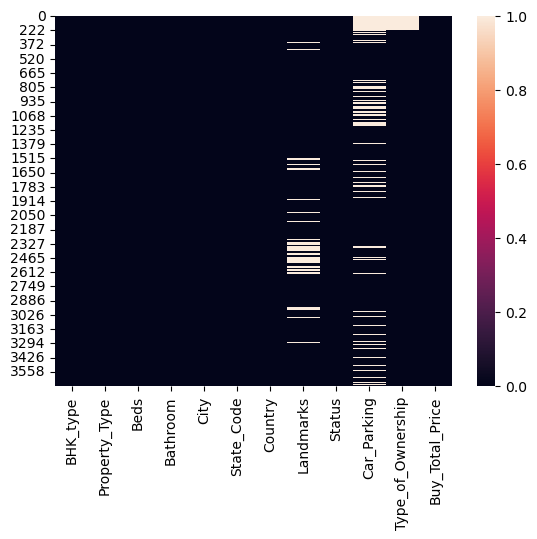

In [47]:
sns.heatmap(df.isnull())

In [48]:
df.isnull().sum()

BHK_type               0
Property_Type         13
Beds                   0
Bathroom               0
City                   0
State_Code             0
Country                0
Landmarks            345
Status                 0
Car_Parking          650
Type_of_Ownership    128
Buy_Total_Price        0
dtype: int64

In [49]:
df['Landmarks'].fillna(value=df['Landmarks'].mode()[0], inplace= True)

In [50]:
df['Property_Type'].fillna(value=df['Property_Type'].mode()[0], inplace= True)

In [51]:
df['Car_Parking'].fillna(value=df['Car_Parking'].mode()[0], inplace= True)

In [52]:
df.isnull().sum()

BHK_type               0
Property_Type          0
Beds                   0
Bathroom               0
City                   0
State_Code             0
Country                0
Landmarks              0
Status                 0
Car_Parking            0
Type_of_Ownership    128
Buy_Total_Price        0
dtype: int64

<Axes: >

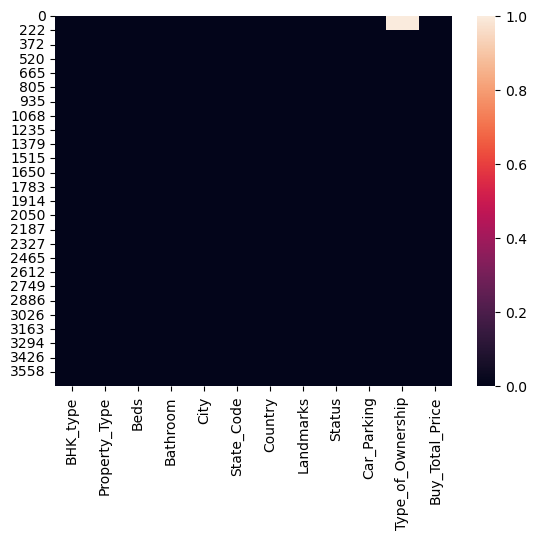

In [53]:
sns.heatmap(df.isnull())

In the dataset, there are no null values present.

In [54]:
df['Buy_Total_Price'].value_counts()

Buy_Total_Price
6000000.0     127
5000000.0     111
6500000.0     100
4000000.0      99
15000000.0     92
             ... 
1450000.0       1
7279000.0       1
6713000.0       1
7268000.0       1
17200000.0      1
Name: count, Length: 352, dtype: int64

In [55]:
df.duplicated().sum()

980

In [56]:
df = df.drop_duplicates()

In [57]:
df.duplicated().sum()

0

In [58]:
df.reset_index(drop=True, inplace=True)

In [59]:
df

BHK_type        Property_Type  Beds  Bathroom       City State_Code  \
0            3                Condo     3       2.0    Chicago         IL   
1            4                Condo     4       3.0    Chicago         IL   
2            2                Condo     2       2.0    Chicago         IL   
3            3                Condo     3       2.0    Chicago         IL   
4            3                Condo     3       1.0    Chicago         IL   
...        ...                  ...   ...       ...        ...        ...   
2368         3    Independent House     3       1.0  Faridabad         HR   
2369         1    Independent House     1       2.0  Faridabad         HR   
2370         3  Standalone Building     3       2.0  Faridabad         HR   
2371         3  Standalone Building     3       2.0  Faridabad         HR   
2372         1                   Sb     1       2.0  Faridabad         HR   

            Country                  Landmarks       Status   Car_Parking  \
0     United States         CHI - Logan Square       Active  Bike and Car   
1     United States             CHI - Avondale       Active  Bike and Car   
2     United States         CHI - Lincoln Park       Active  Bike and Car   
3     United States         CHI - Logan Square       Active  Bike and Car   
4     United States         CHI - North Center       Active  Bike and Car   
...             ...                        ...          ...           ...   
2368          India       Crown Interiorz Mall  Immediately           Car   
2369          India       Crown Interiorz Mall  Immediately  Bike and Car   
2370          India  Anupama Sweets Restaurant  Immediately  Bike and Car   
2371          India            Raheja Navodaya  Immediately  Bike and Car   
2372          India            Raheja Navodaya  Immediately          Bike   

     Type_of_Ownership  Buy_Total_Price  
0                  NaN       43139280.0  
1                  NaN       49863688.0  
2                  NaN       32001200.0  
3                  NaN       49872000.0  
4                  NaN       23689200.0  
...                ...              ...  
2368        Self Owned        8000000.0  
2369        Self Owned        3500000.0  
2370        Self Owned        5500000.0  
2371        Self Owned        6500000.0  
2372        Self Owned        4000000.0  

[2373 rows x 12 columns]

# 3. Data Visualization

# 1.Univariate Analysis-

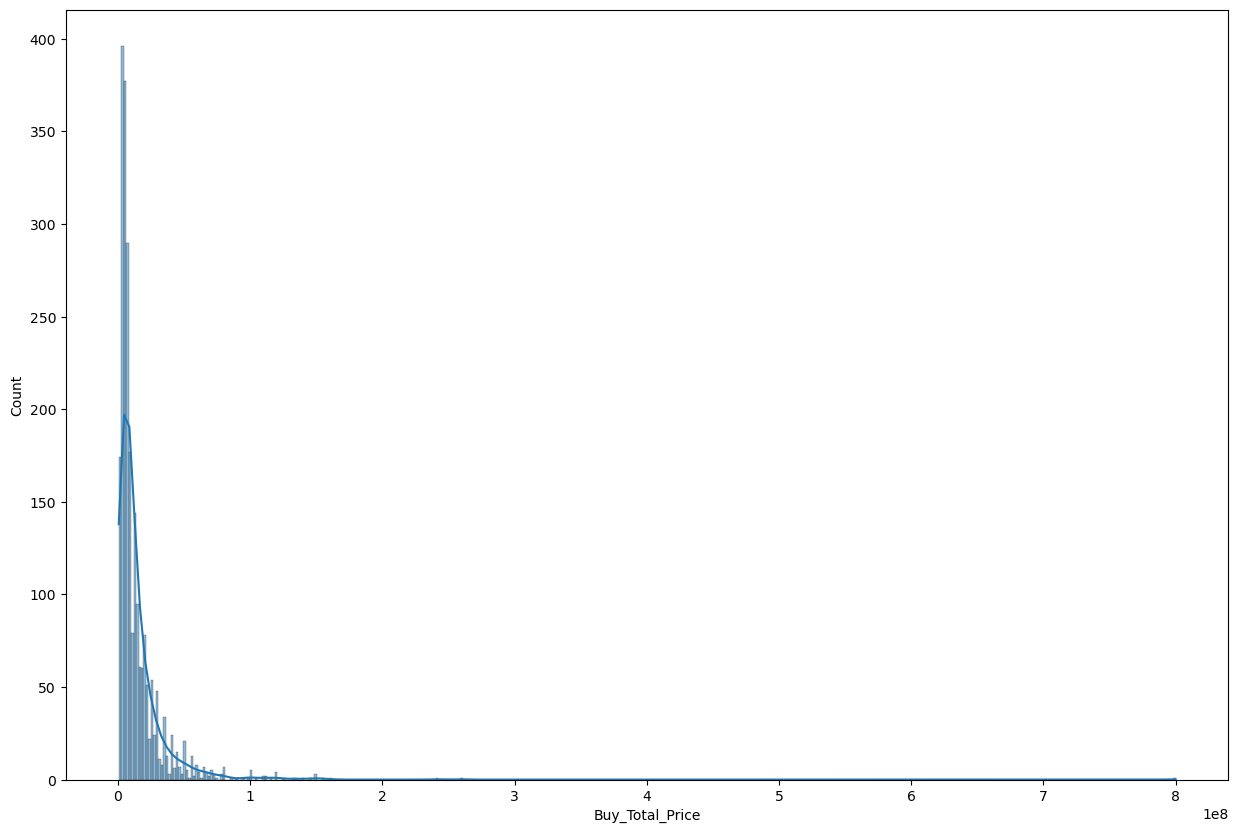

In [60]:
plt.figure(figsize=(15, 10))
sns.histplot(df['Buy_Total_Price'], kde=True)
plt.show()

Most prices fall within the range of 0 to 1 crore, although there are also outliers within this range.

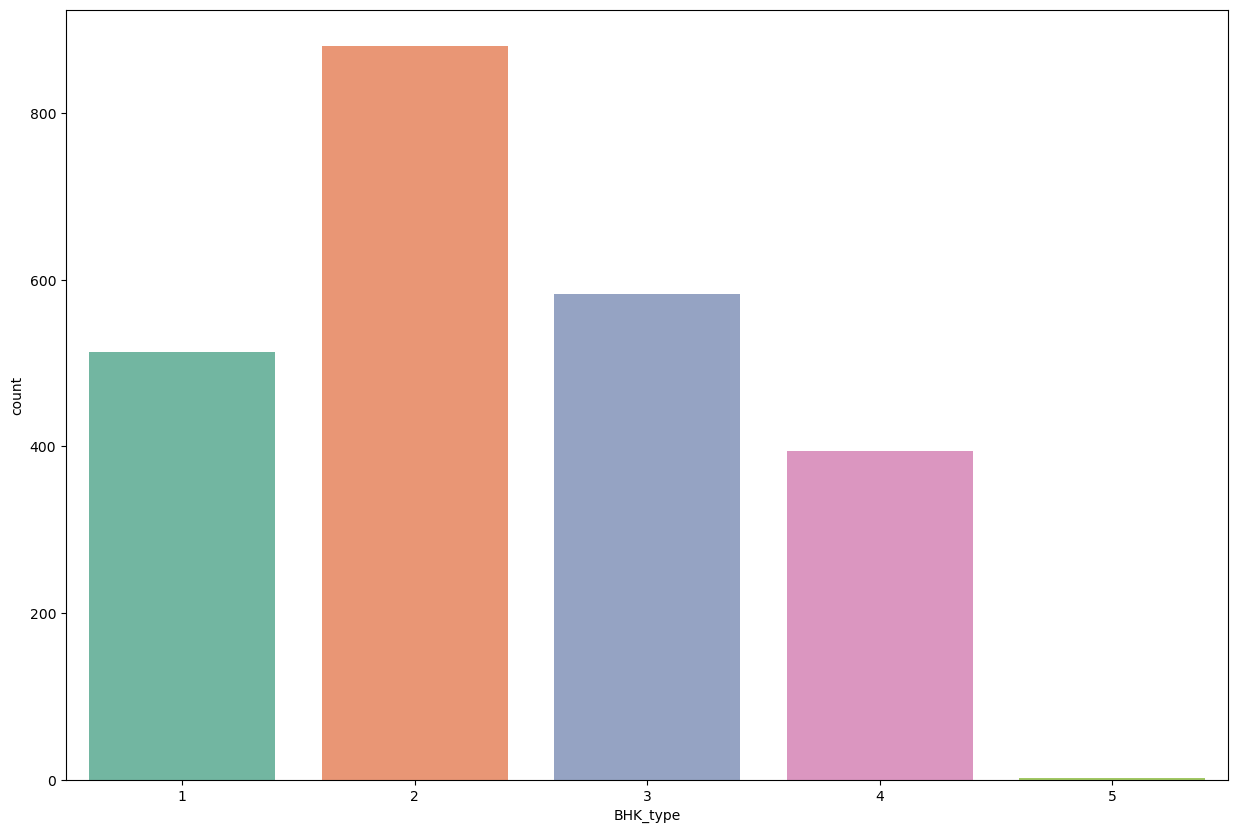

In [61]:
plt.figure(figsize=(15, 10))
sns.countplot(x='BHK_type', data=df, palette='Set2')
plt.show()

Here, it's clear that most properties are of the 2 BHK type.

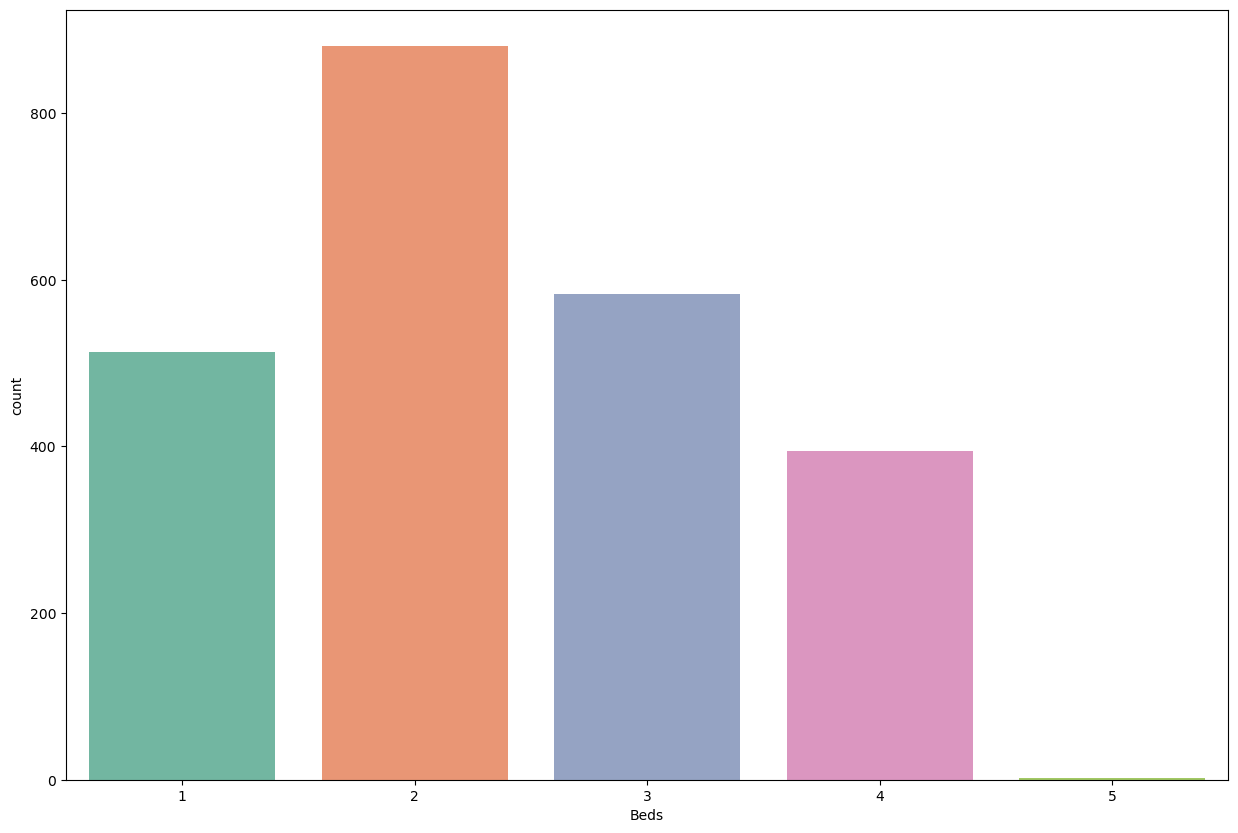

In [62]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Beds', data=df, palette='Set2')
plt.show()

Here, it's clear that most properties has 2 Beds .

Since BHK_type and Beds contain the same data, we will drop the Beds column.

In [63]:
df.drop('Beds', axis=1, inplace=True)

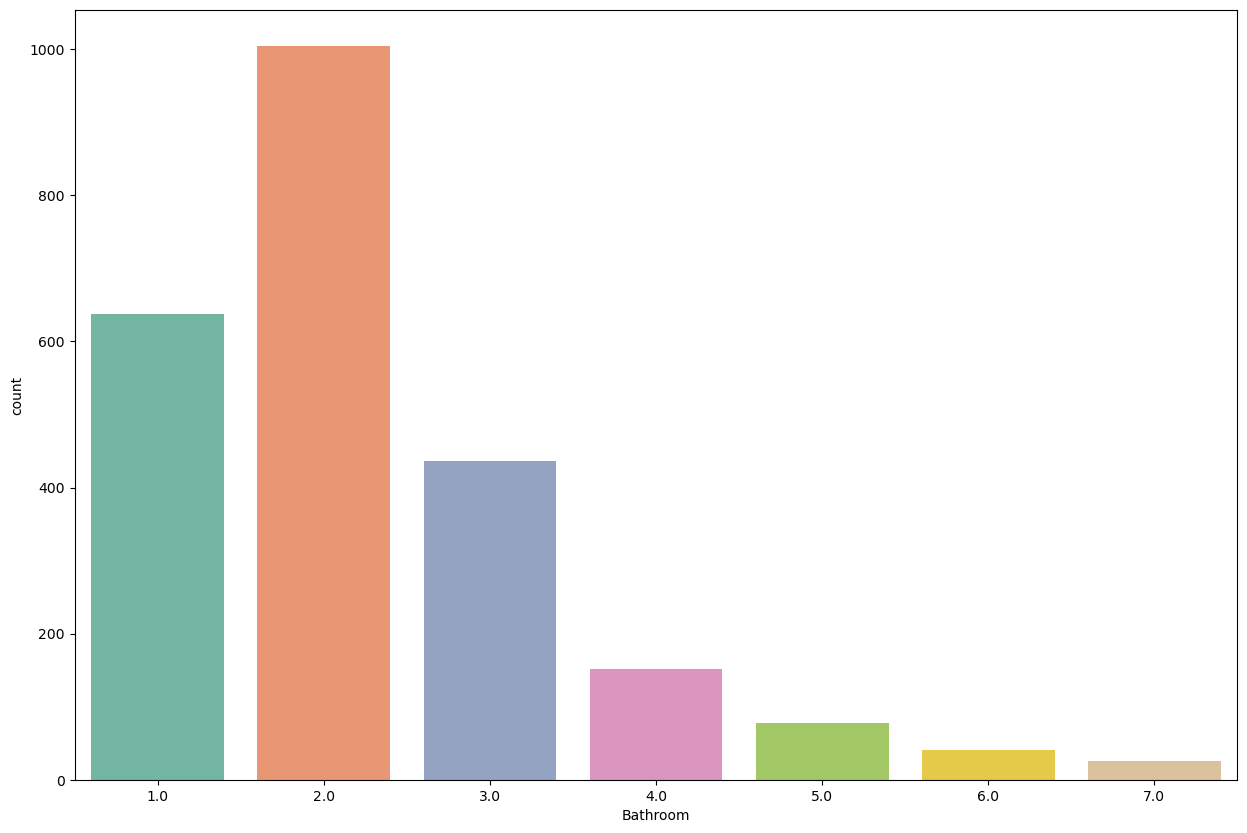

In [64]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Bathroom', data=df, palette='Set2')
plt.show()

Here, it's clear that most properties has 2 Bathroom .

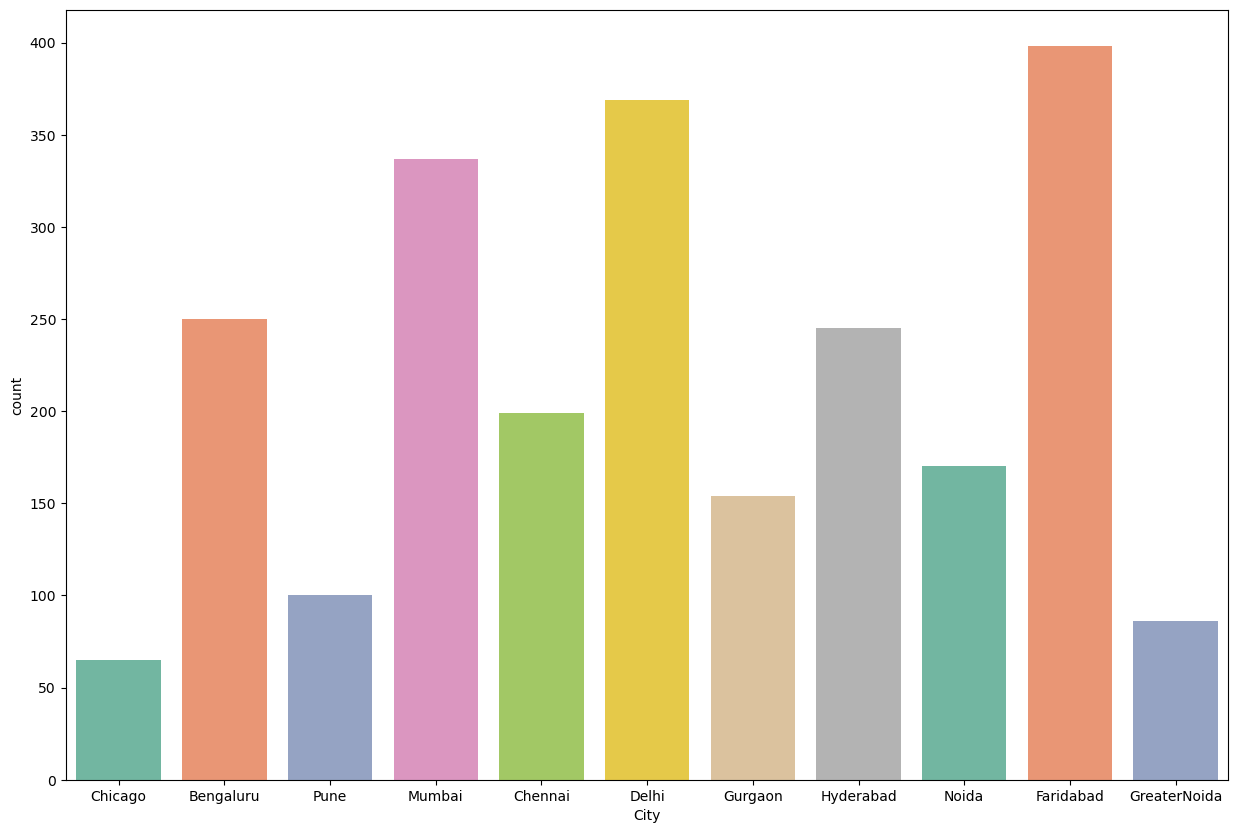

In [65]:
plt.figure(figsize=(15, 10))
sns.countplot(x='City', data=df, palette='Set2')
plt.show()

Faridabad has the highest number of records, followed by Delhi and Mumbai in comparison to other cities.

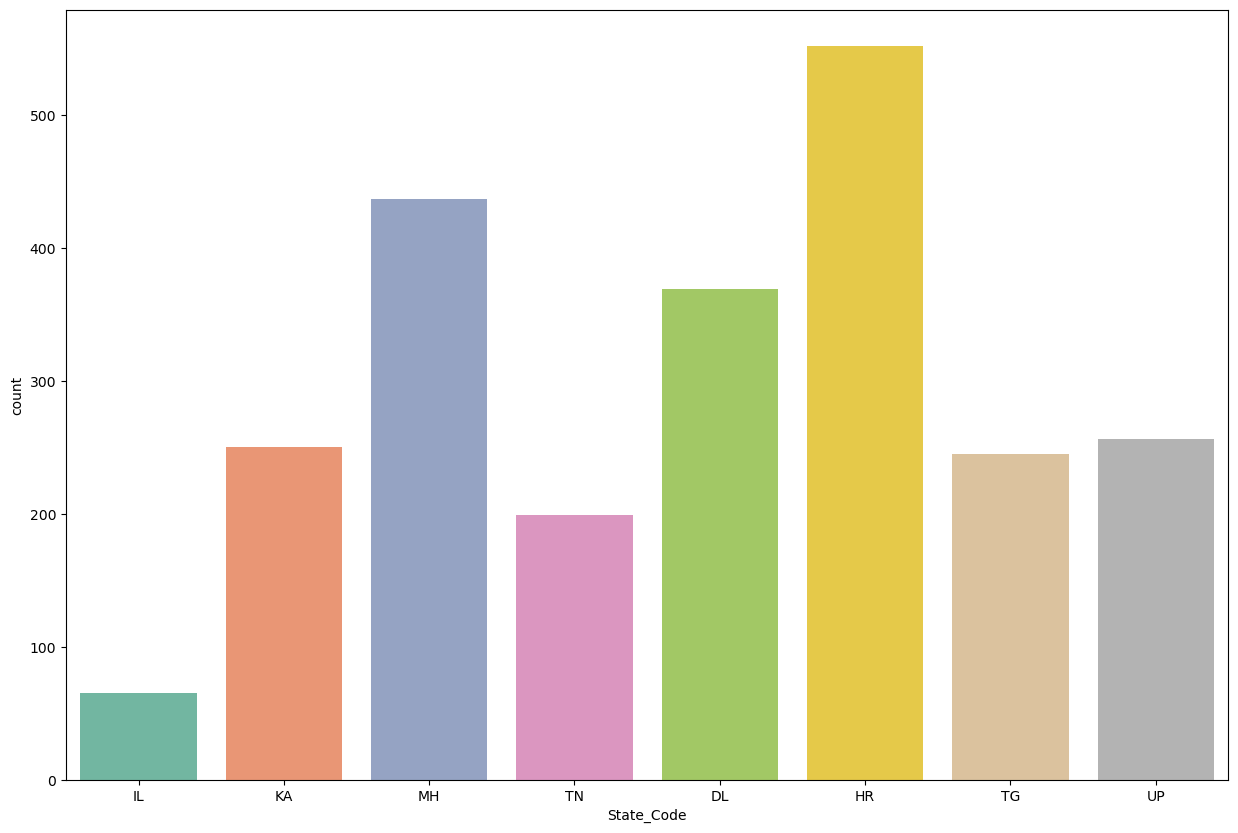

In [66]:
plt.figure(figsize=(15, 10))
sns.countplot(x='State_Code', data=df, palette='Set2')
plt.show()

HR has the highest number of records, followed by MH and DL in comparison to other State.

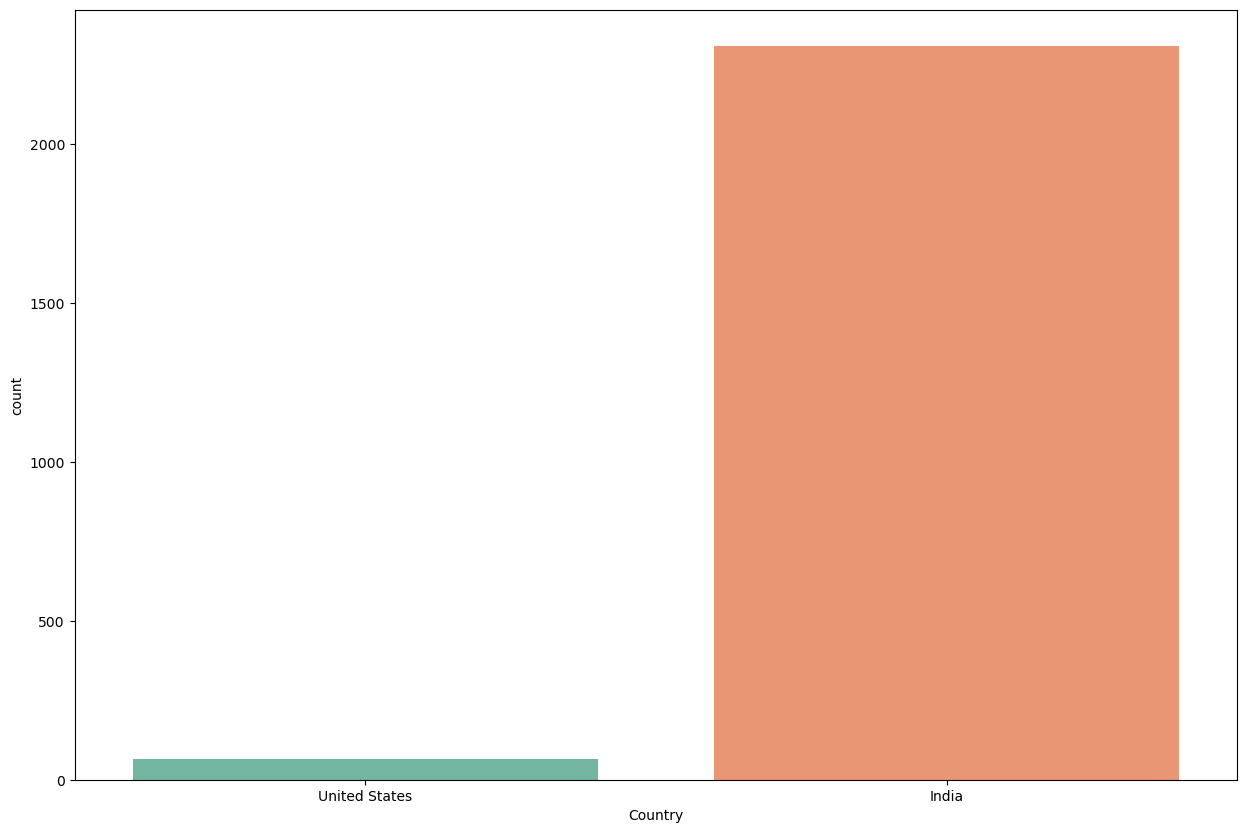

In [67]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Country', data=df, palette='Set2')
plt.show()

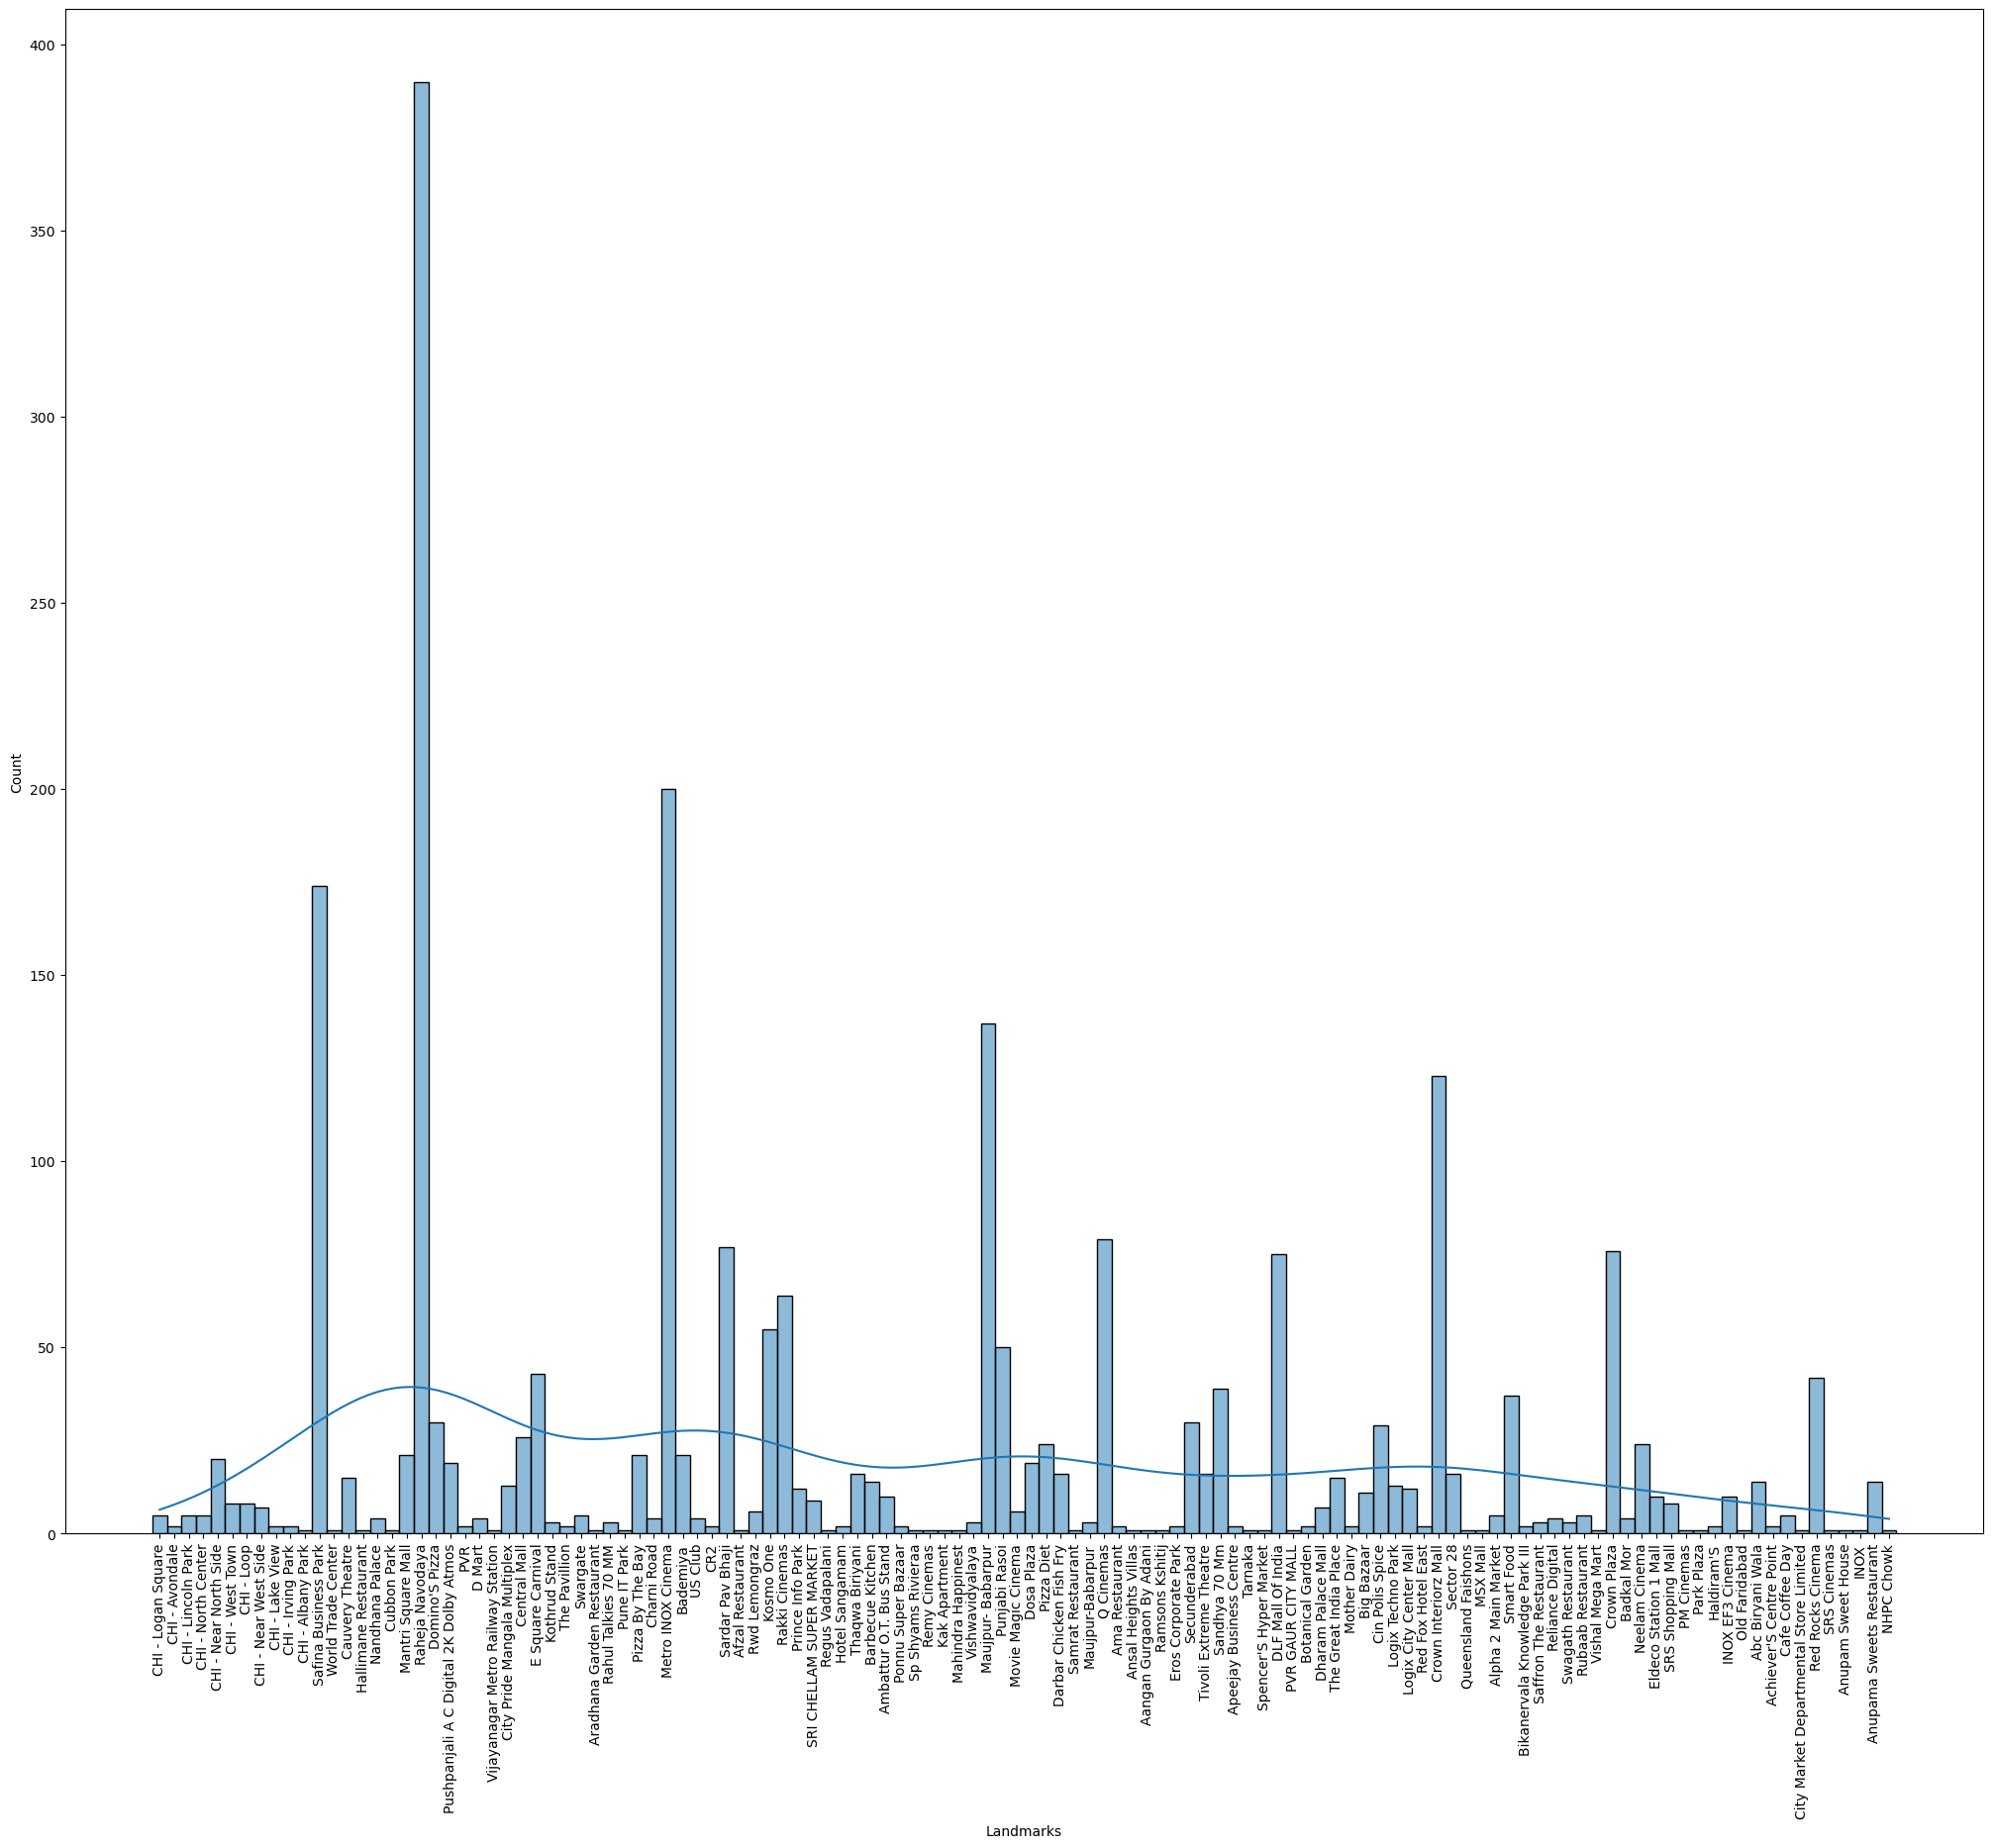

In [68]:
plt.figure(figsize=(25, 20))
sns.histplot(df['Landmarks'], kde=True)
plt.xticks(rotation=90)
plt.show()

Raheja Navodaya has the highest number of landmarks.

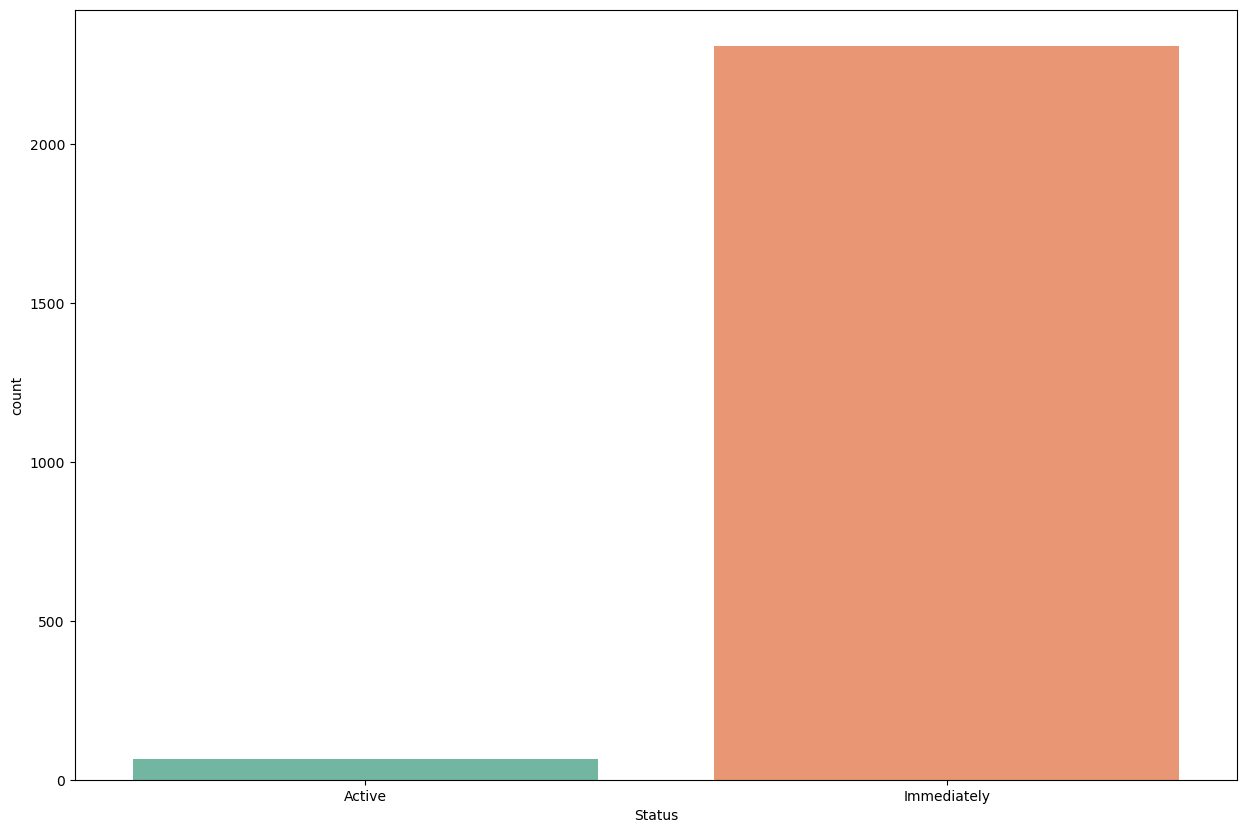

In [69]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Status', data=df, palette='Set2')
plt.show()

In [70]:
df['Status'].value_counts()

Status
Immediately    2308
Active           65
Name: count, dtype: int64

Since the 'Status' column exclusively contains records for "Immediately" possession of property, it does not provide any additional valuable information for our predictions. Therefore, we will drop it.

In [71]:
df.drop('Status', axis=1, inplace=True)

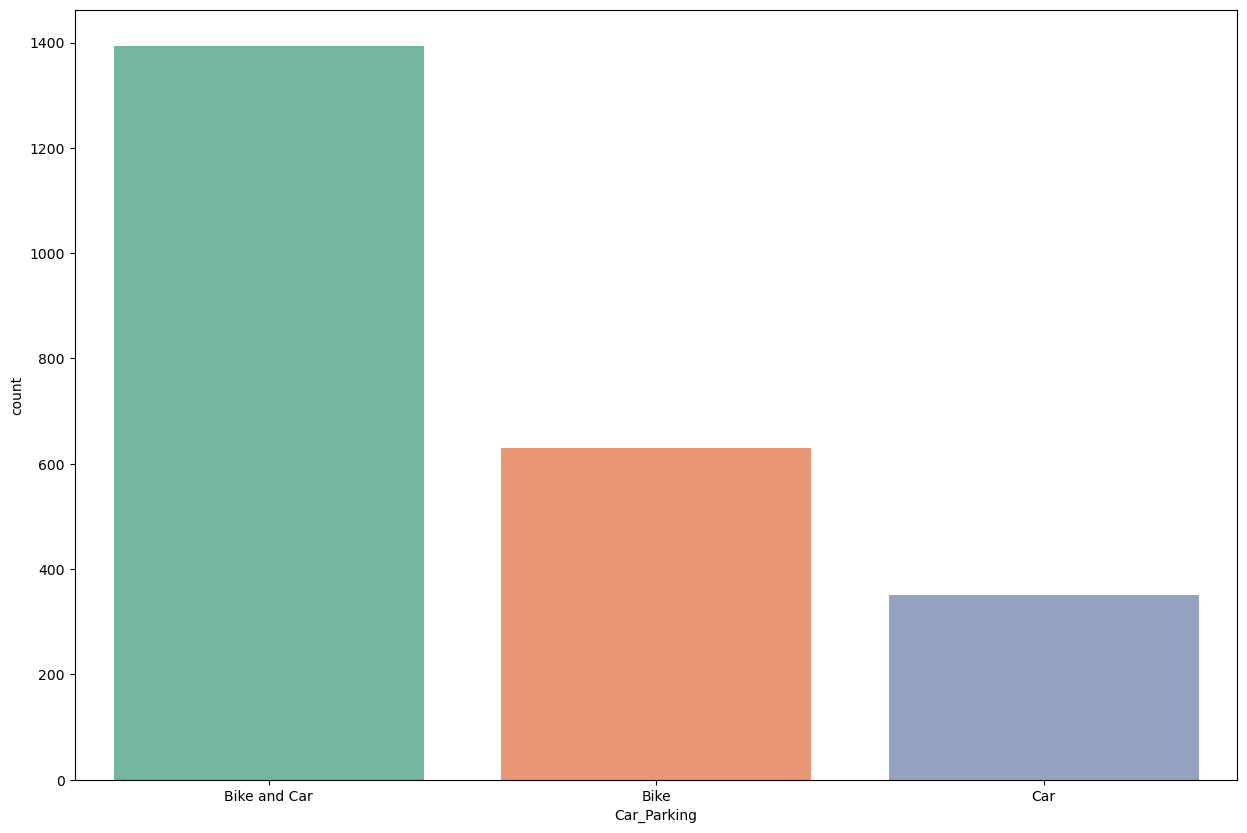

In [72]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Car_Parking', data=df, palette='Set2')
plt.show()

The 'Parking' column has the highest number of records for 'Bike and Car' .

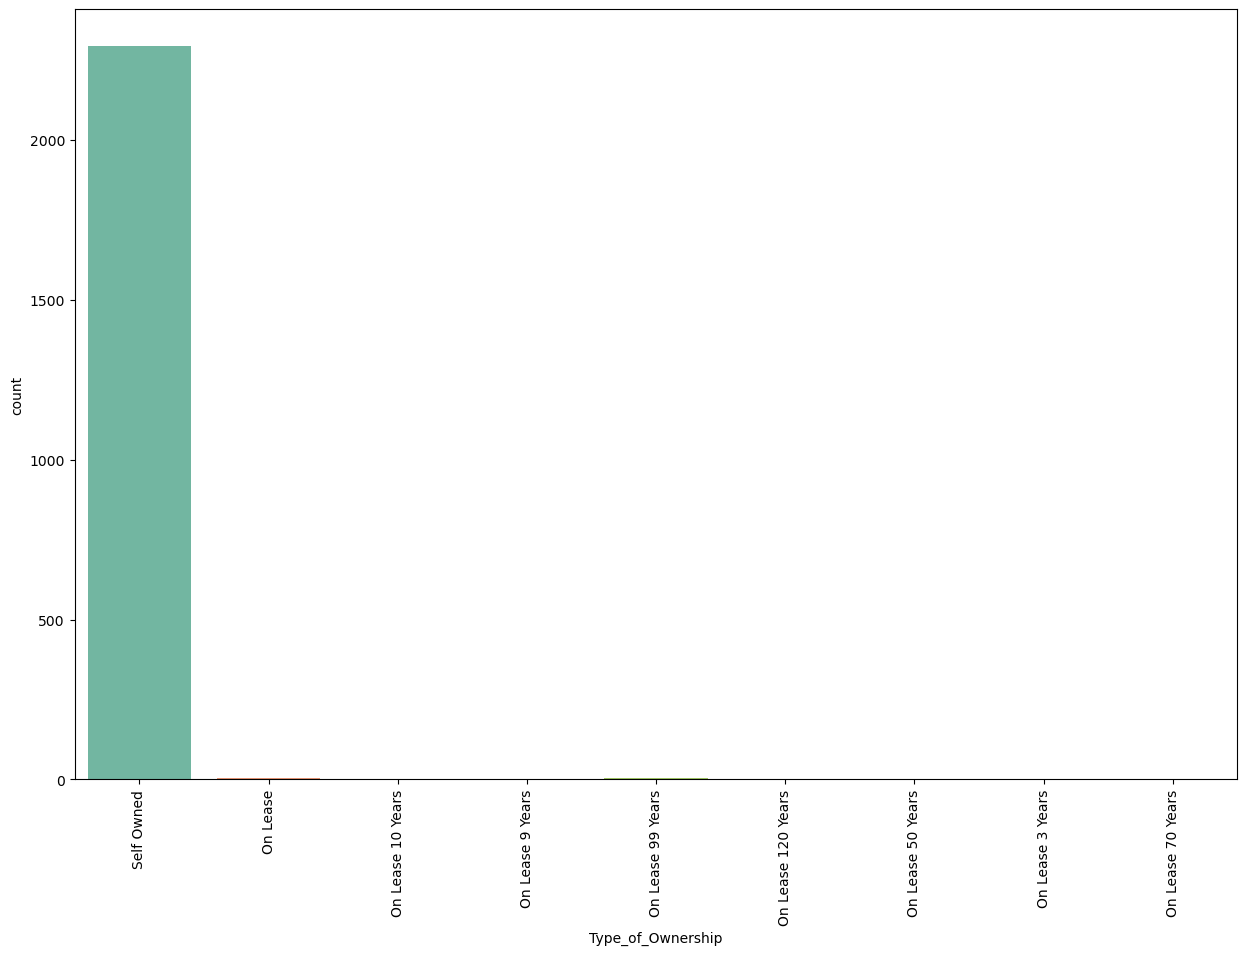

In [73]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Type_of_Ownership', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [74]:
df['Type_of_Ownership'].value_counts()

Type_of_Ownership
Self Owned            2294
On Lease                 4
On Lease 99 Years        4
On Lease 10 Years        1
On Lease 9 Years         1
On Lease 120 Years       1
On Lease 50 Years        1
On Lease 3 Years         1
On Lease 70 Years        1
Name: count, dtype: int64

almost allrecords in the Type_of_Ownership column are Self Owned, so we will drop this column

In [75]:
df.drop('Type_of_Ownership', axis=1, inplace=True)

# 2.Bivariate Analysis-

<Figure size 1000x800 with 0 Axes>

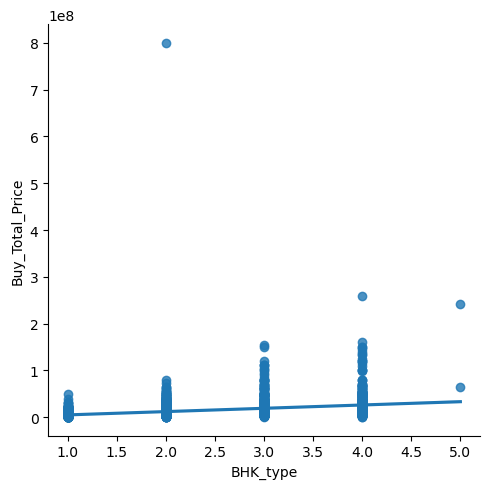

In [76]:
plt.figure(figsize=(10, 8))
sns.lmplot(x='BHK_type', y='Buy_Total_Price', data=df)

As the number of BHK types increases, there is also a noticeable increase in the Buy_Total_Price.

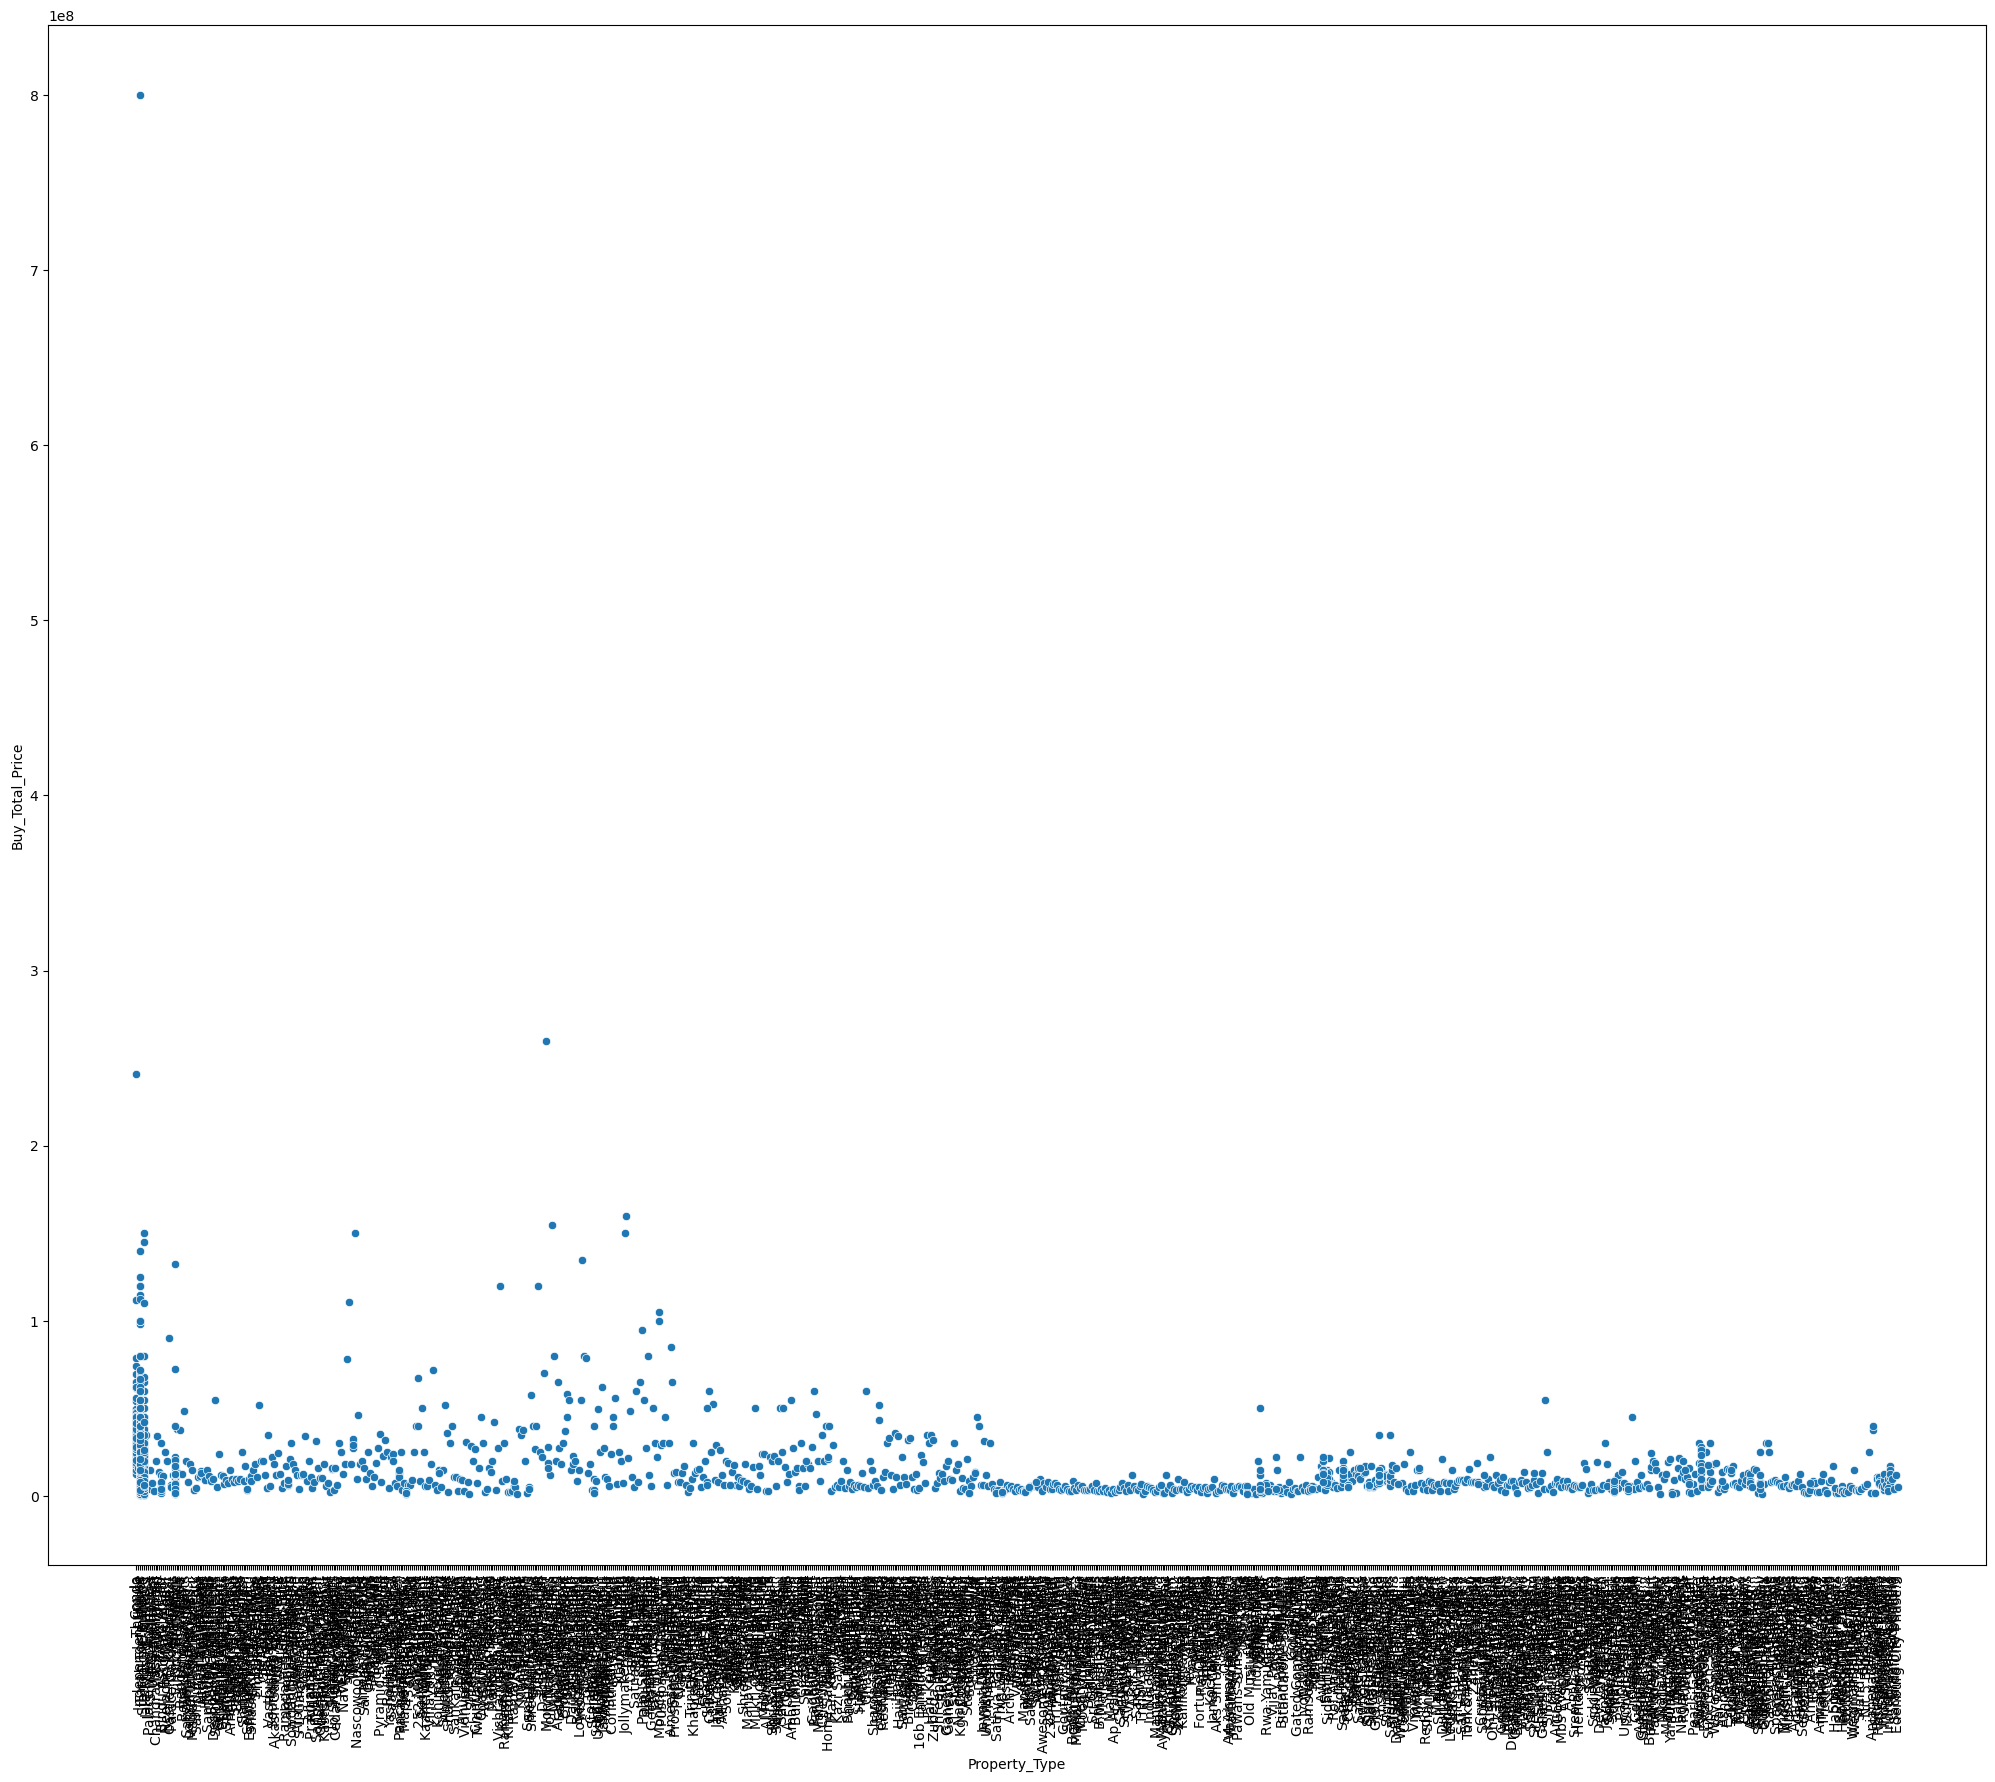

In [77]:
plt.figure(figsize=(25, 20))
sns.scatterplot(x='Property_Type', y='Buy_Total_Price', data=df)
plt.xticks(rotation=90)
plt.show()

There isn't a strong observed relationship between Property_Type and Buy_Total_Price.

<Figure size 1000x800 with 0 Axes>

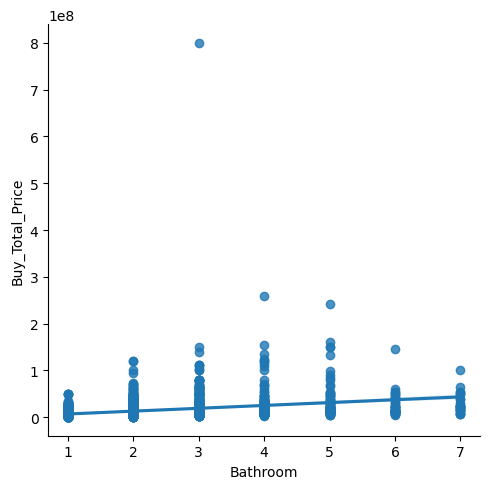

In [78]:
plt.figure(figsize=(10, 8))
sns.lmplot(x='Bathroom', y='Buy_Total_Price', data=df)

As the number of Bathroom increases, there is also a noticeable increase in the Buy_Total_Price.


<Axes: xlabel='City', ylabel='Buy_Total_Price'>

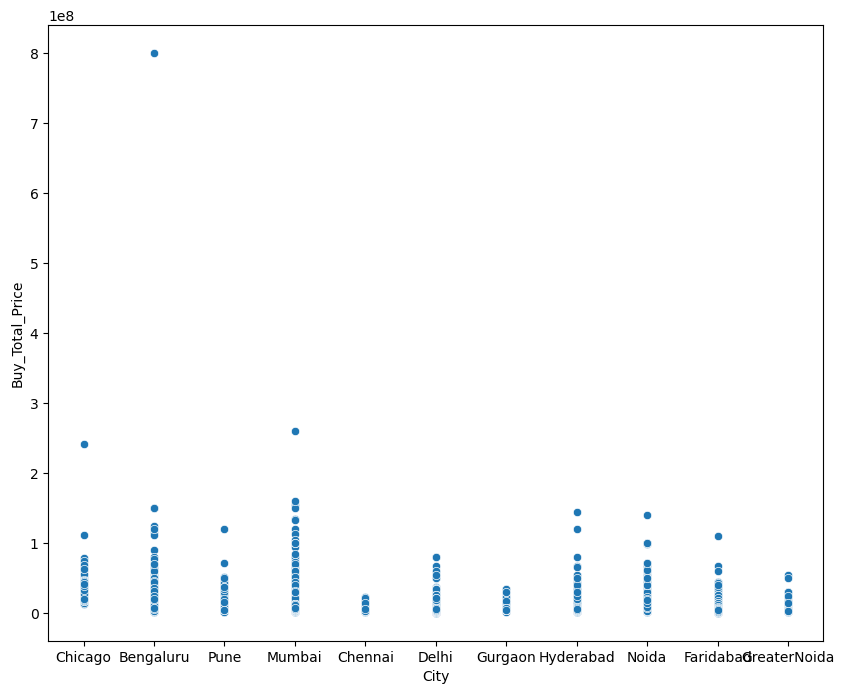

In [79]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='City', y='Buy_Total_Price', data=df)

The property prices in Mumbai, Bengaluru, and Hyderabad are higher compared to other cities.

<Axes: xlabel='State_Code', ylabel='Buy_Total_Price'>

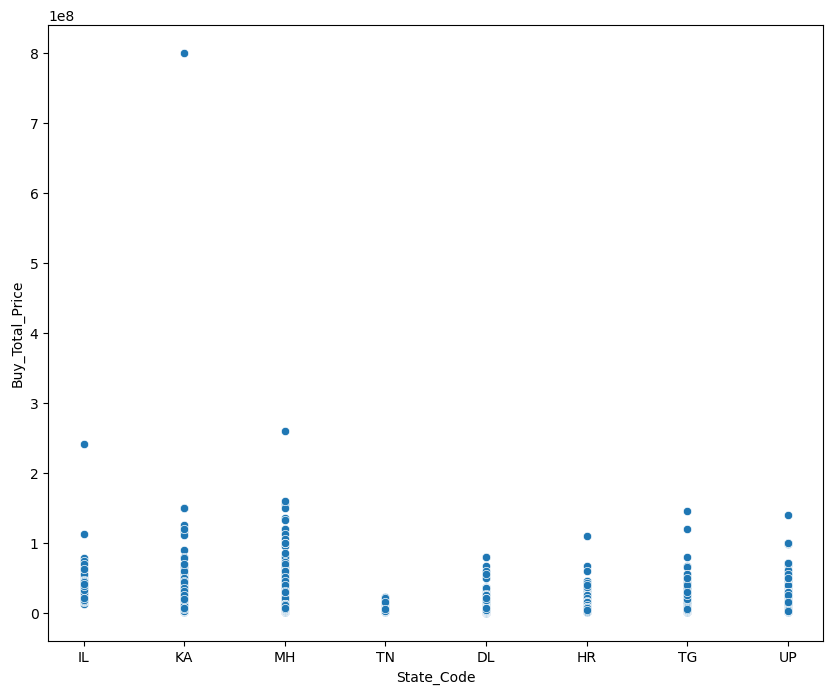

In [80]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='State_Code', y='Buy_Total_Price', data=df)

Property prices in Maharashtra state are higher than those in other states.

<Axes: xlabel='State_Code', ylabel='Buy_Total_Price'>

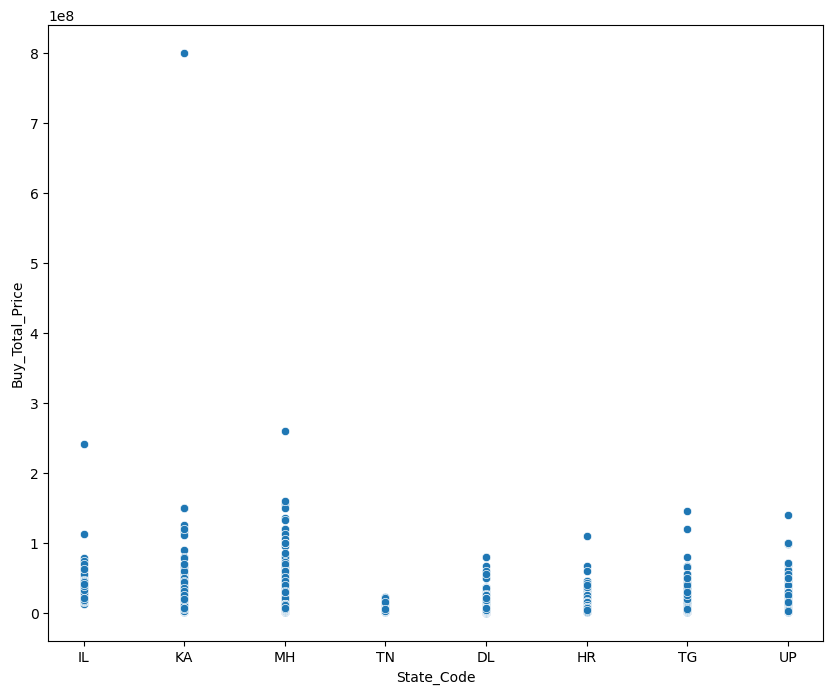

In [81]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='State_Code', y='Buy_Total_Price', data=df)

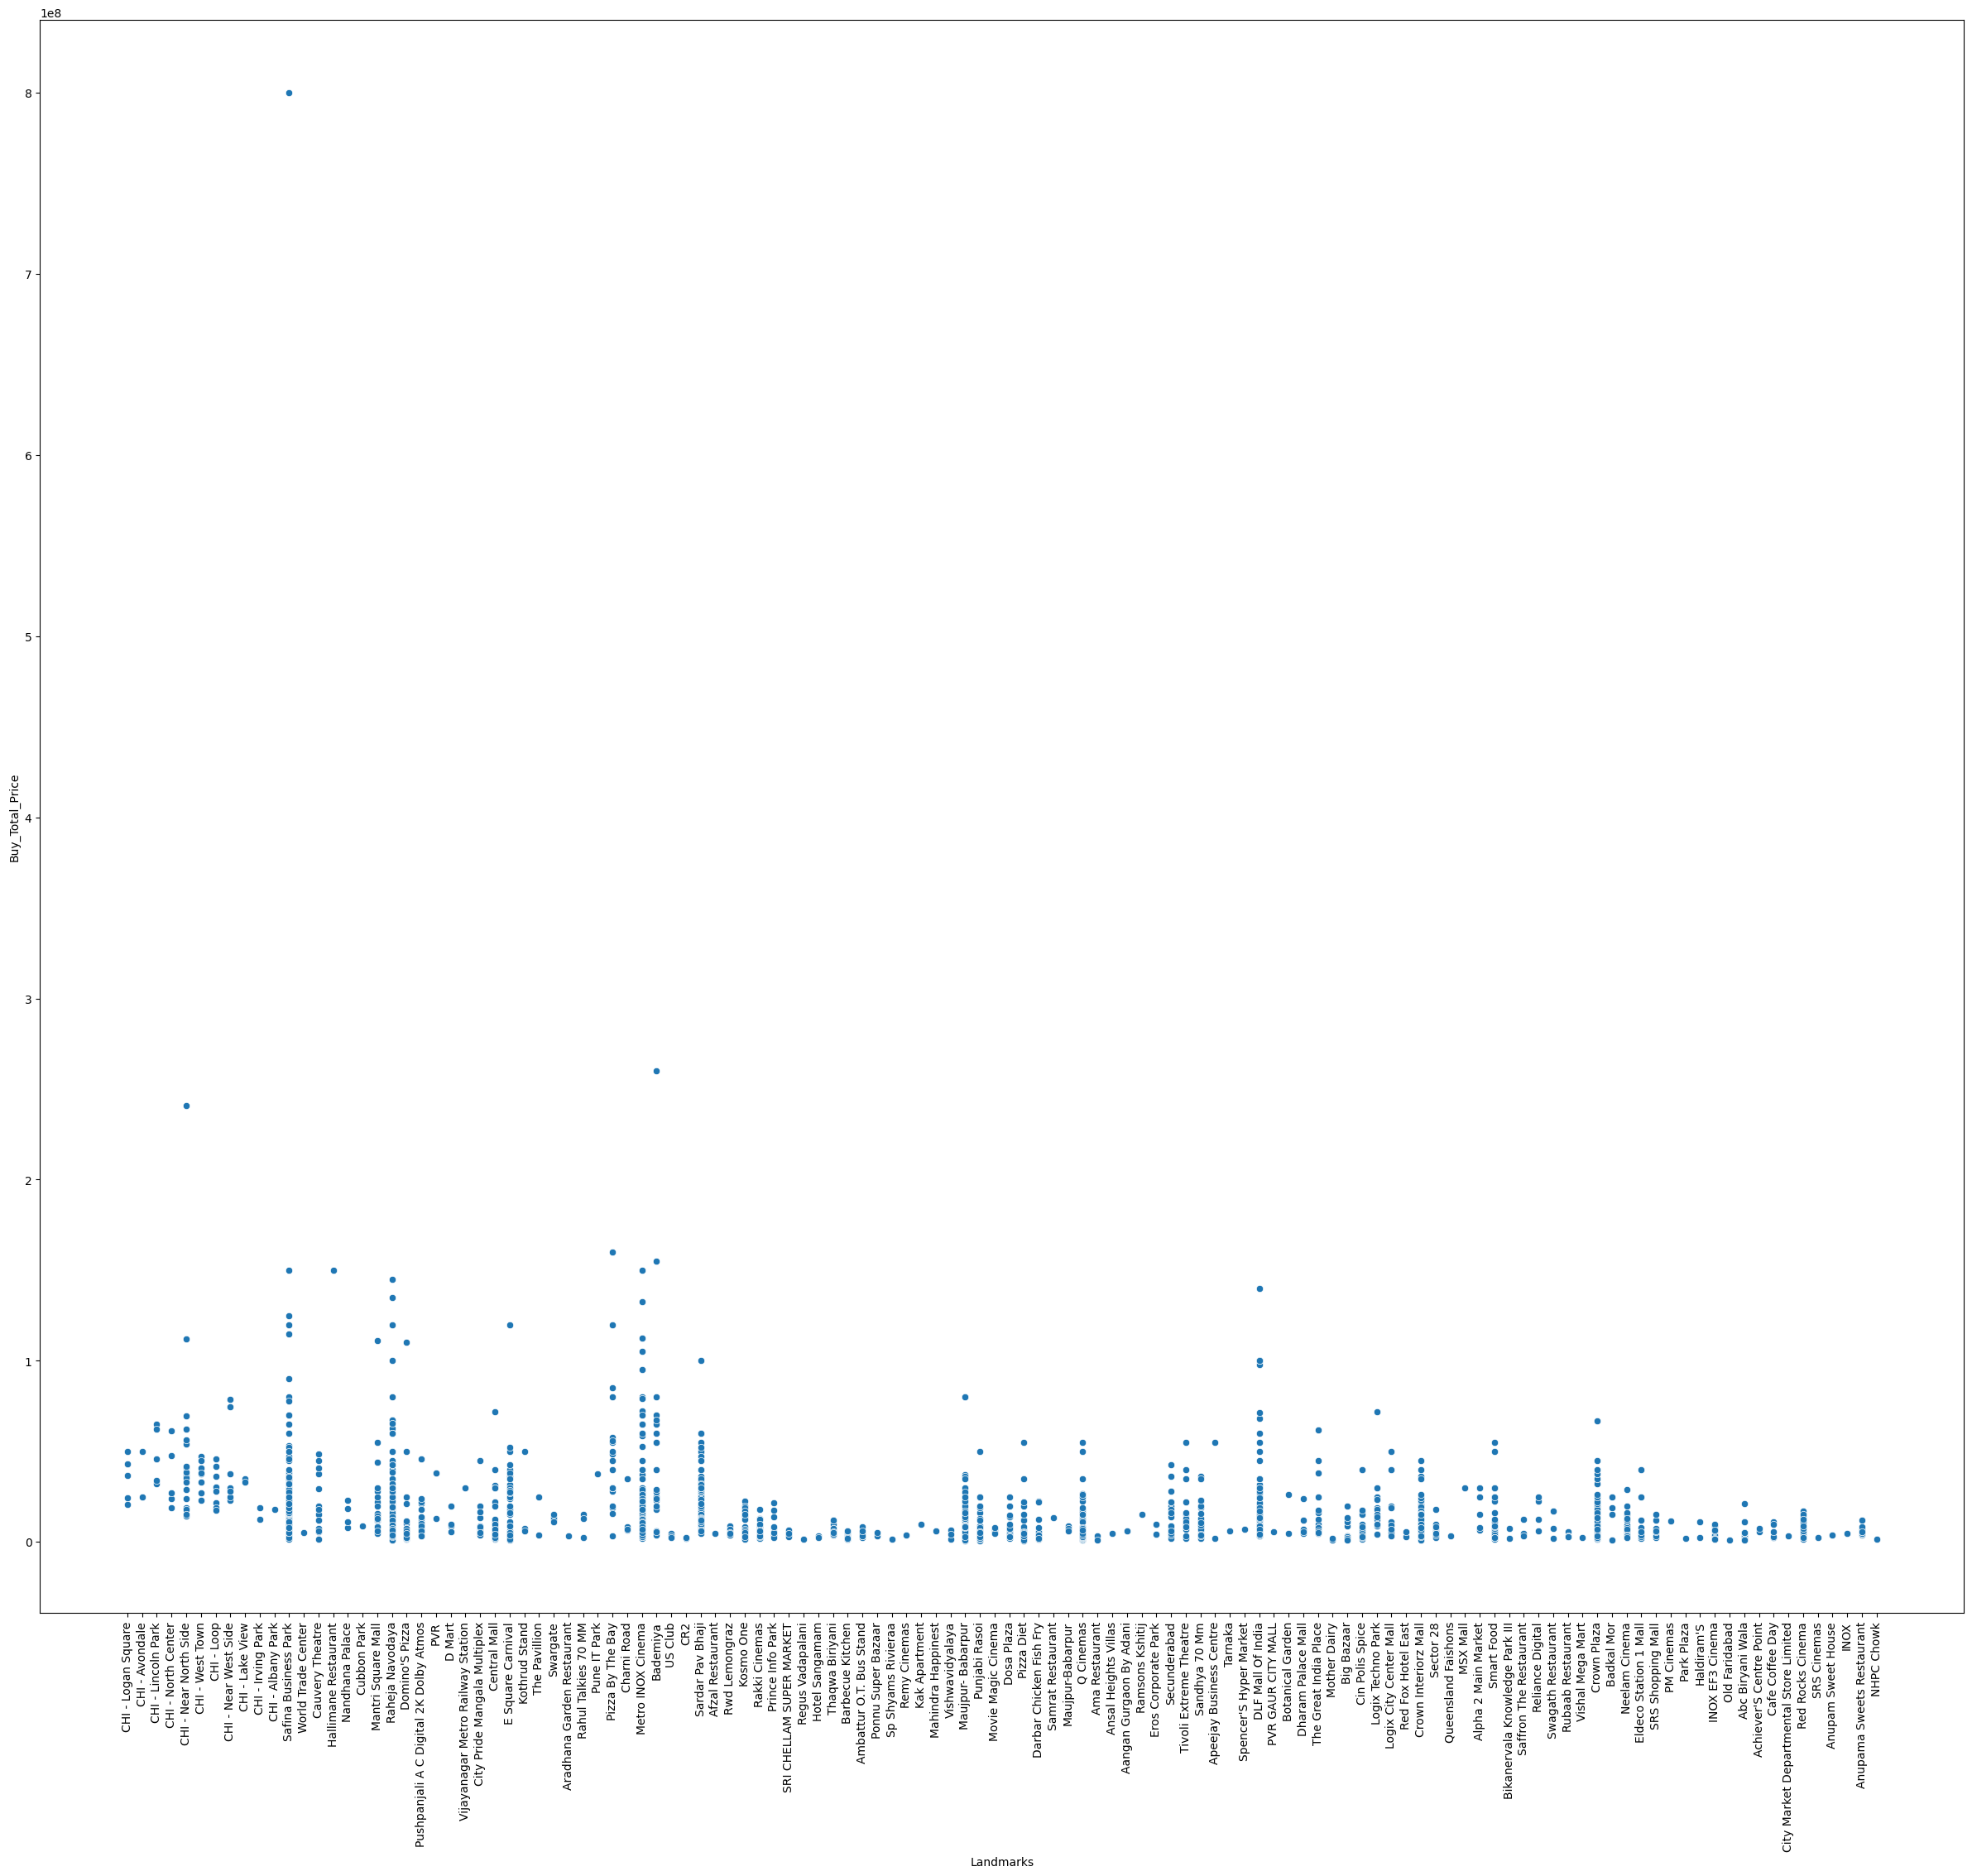

In [82]:
plt.figure(figsize=(30, 25))
sns.scatterplot(x='Landmarks', y='Buy_Total_Price', data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Car_Parking', ylabel='Buy_Total_Price'>

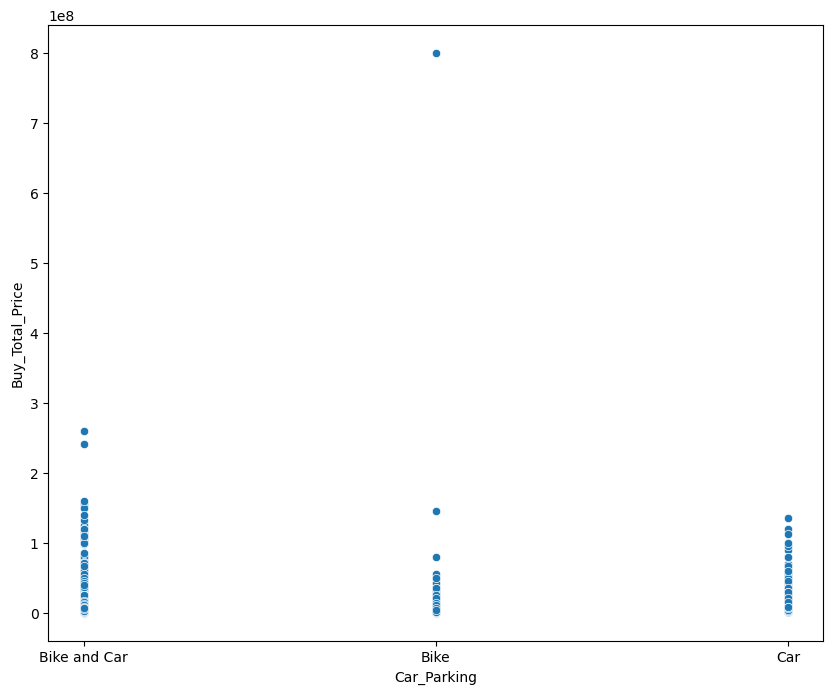

In [83]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Car_Parking', y='Buy_Total_Price', data=df)

Properties with parking for both a bike and a car command a higher price than those with only single parking.

# 3.Multivariate analysis-

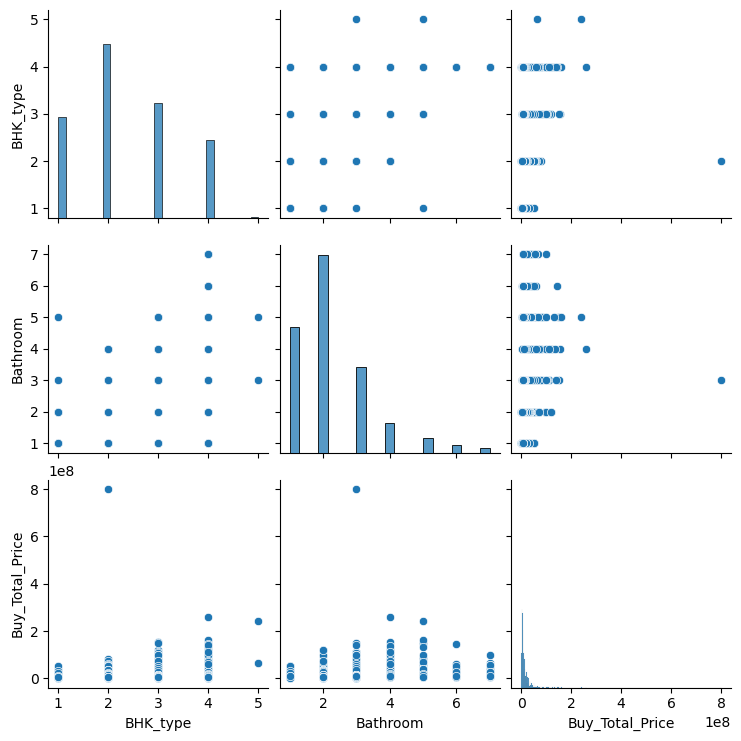

In [84]:
sns.pairplot(df)

In [85]:
num_col = []

for i in df.columns:
    if df[i].dtype == 'float64' or df[i].dtype == 'int64':
        num_col.append(i)


In [86]:
num_col

['BHK_type', 'Bathroom', 'Buy_Total_Price']

In [87]:
cat_col=[]

for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)

In [88]:
cat_col

['Property_Type', 'City', 'State_Code', 'Country', 'Landmarks', 'Car_Parking']

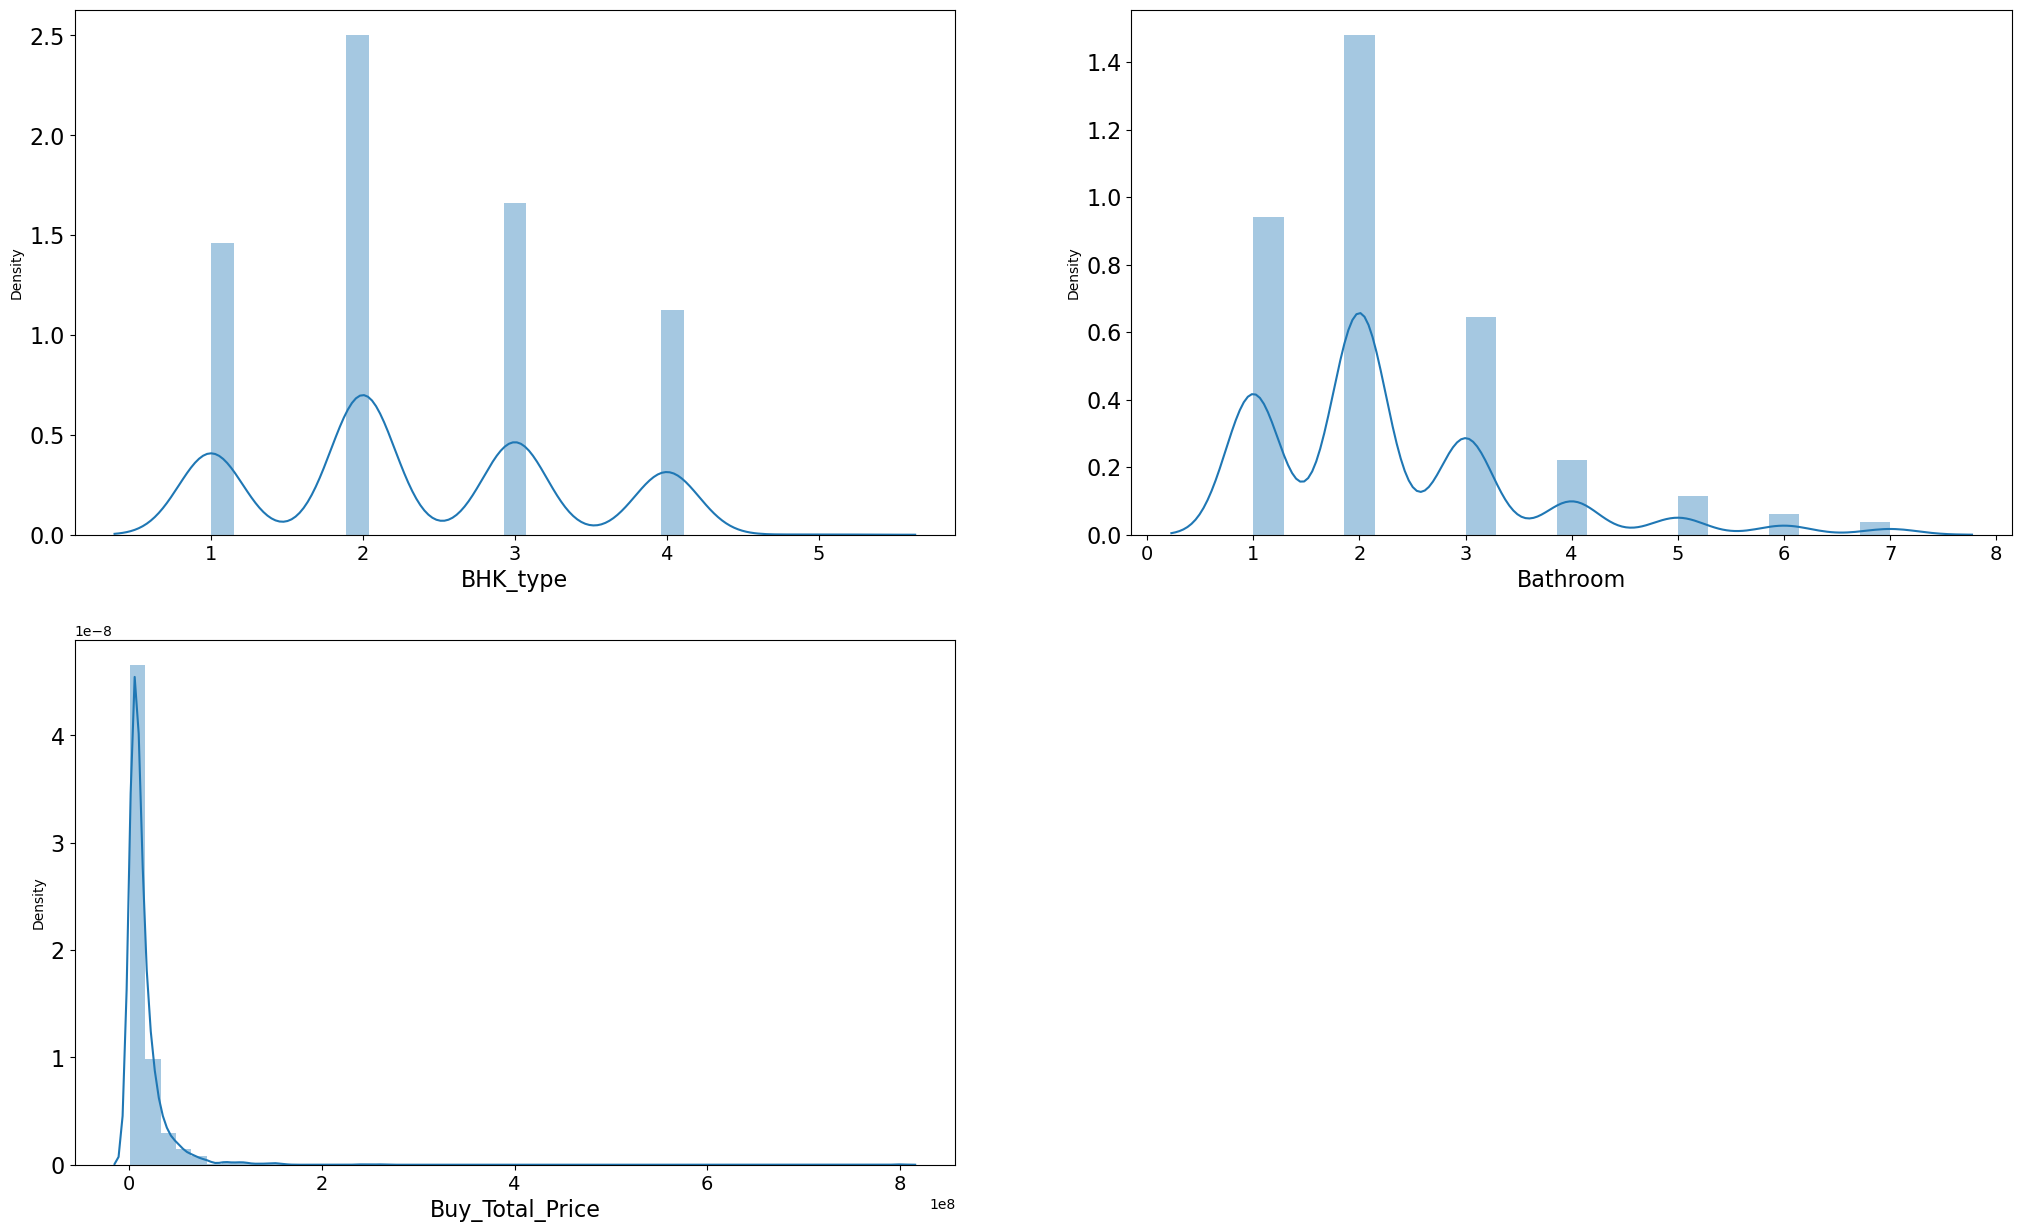

In [89]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<10:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()   

In [90]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numeric_columns].skew()
print(skewness)

BHK_type            0.237598
Bathroom            1.436987
Buy_Total_Price    14.950724
dtype: float64


We are only concerned with addressing skewness in the `Buy_Total_Price` column, as the other columns are categorical.

# Approach_SKEW-I:- Cube root method to remove skewness

In [91]:
columns_to_transform = ['Buy_Total_Price']
df[columns_to_transform] = df[columns_to_transform].apply(np.cbrt)

In [92]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numeric_columns].skew()
print(skewness)

BHK_type           0.237598
Bathroom           1.436987
Buy_Total_Price    1.529864
dtype: float64


# Approach_SKEW-II:-Skewness removal through Power transformer-

In [93]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

features = ['Buy_Total_Price']
x = PowerTransformer(method='yeo-johnson') 

df[features] = pd.DataFrame(x.fit_transform(df[features].values))

In [94]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numeric_columns].skew()
print(skewness)

BHK_type           0.237598
Bathroom           1.436987
Buy_Total_Price    0.011012
dtype: float64


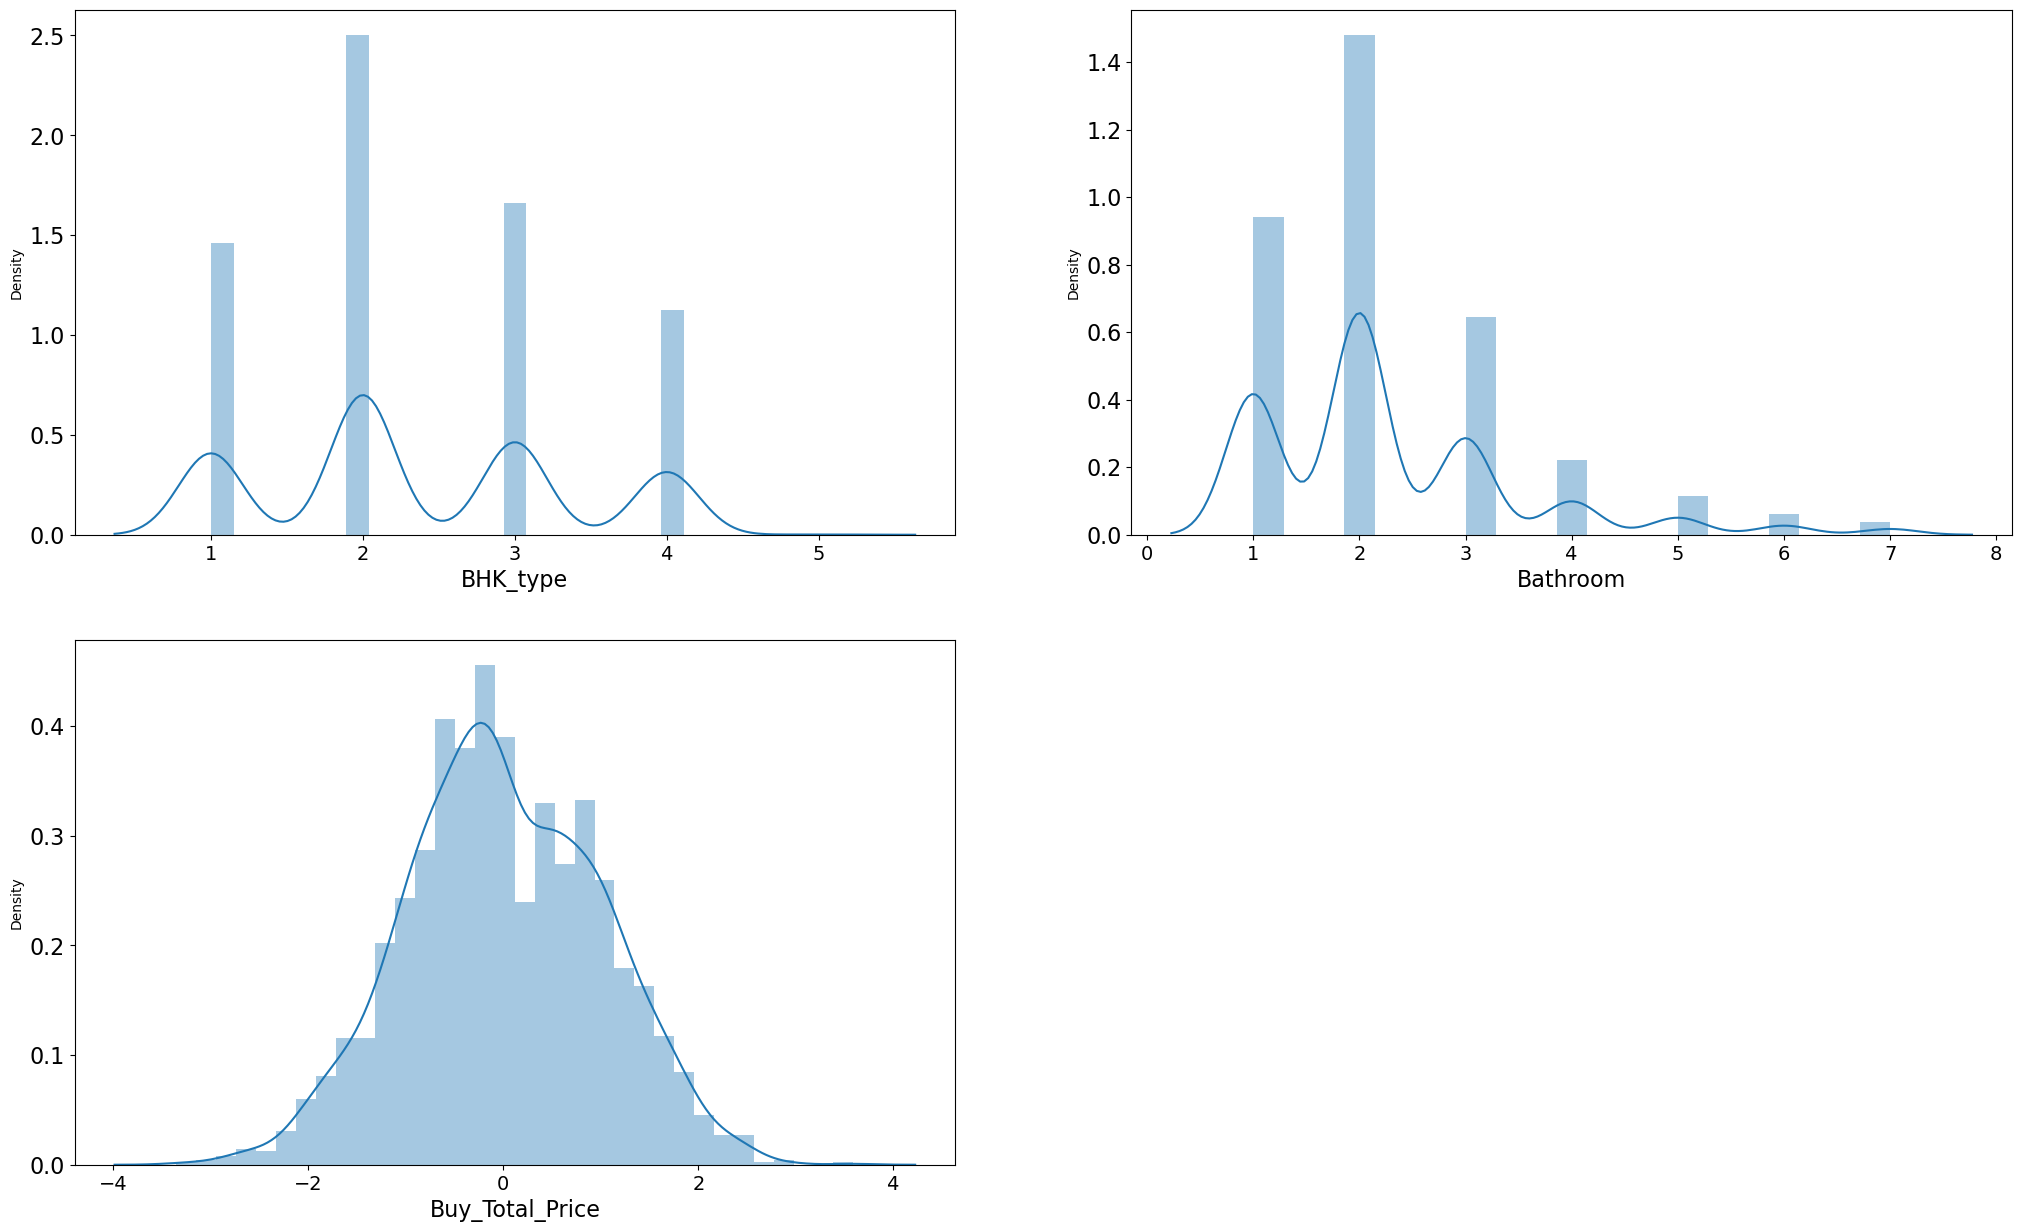

In [95]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<10:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()   

With the implementation of the power transformer method, the skewness has been effectively eliminated.

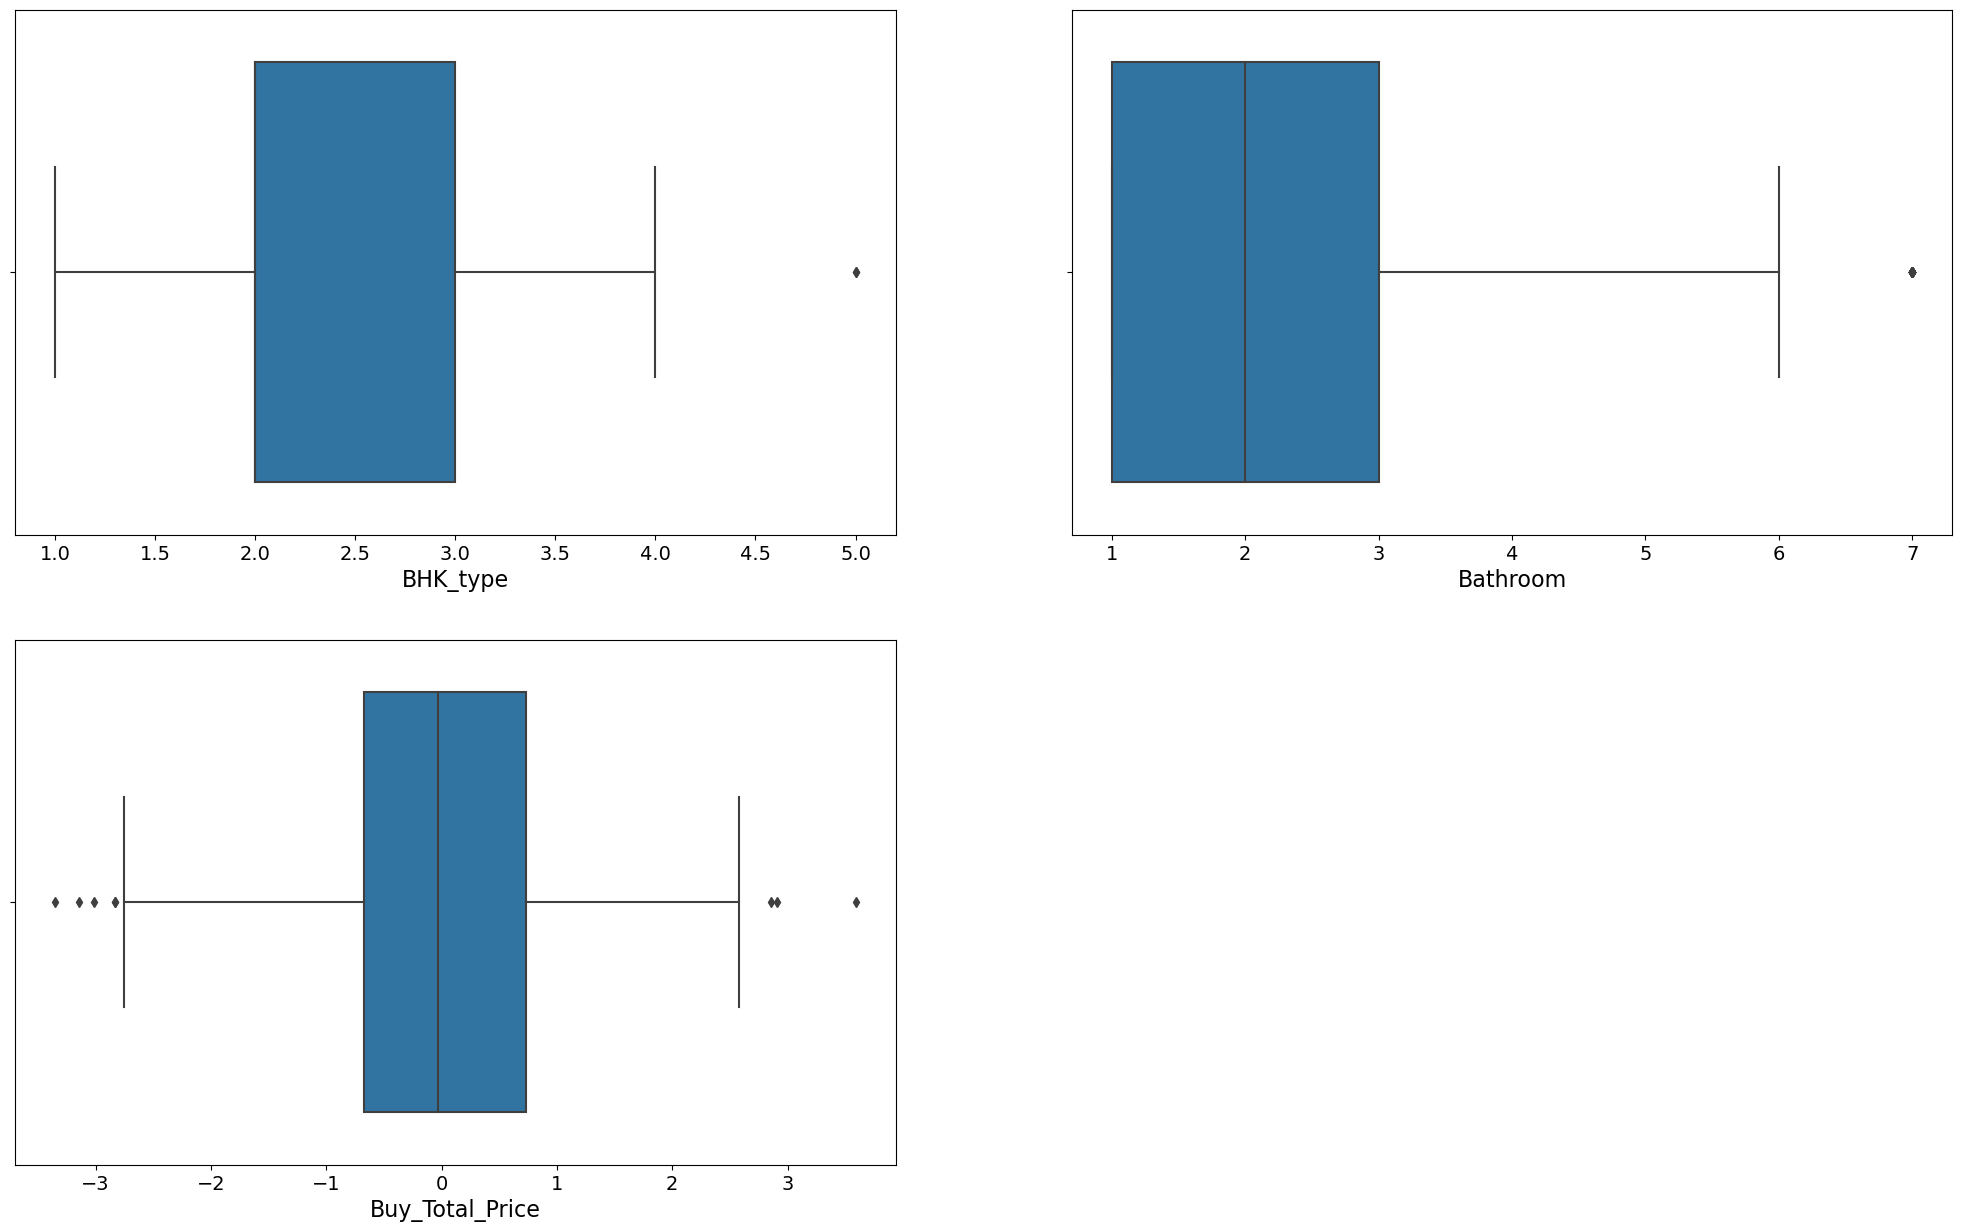

In [96]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<=10:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()   

# Removing outliers using the IQR method.

In [97]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate quartiles
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)

# Calculate interquartile range (IQR)
IQR = q3 - q1

# Calculate upper and lower bounds for outliers
# upper_bound = q3 + (1.5 * IQR)
# lower_bound = q1 - (1.5 * IQR)

In [98]:
df.columns

Index(['BHK_type', 'Property_Type', 'Bathroom', 'City', 'State_Code',
       'Country', 'Landmarks', 'Car_Parking', 'Buy_Total_Price'],
      dtype='object')

In [99]:
high_Buy_Total_Price=(q3['Buy_Total_Price']+(1.5*IQR['Buy_Total_Price']))


index=np.where(df['Buy_Total_Price']> high_Buy_Total_Price)

df=df.drop(df.index[index])

In [100]:
Buy_Total_Price_low = q1['Buy_Total_Price'] - (1.5 * IQR['Buy_Total_Price'])

index = np.where(df['Buy_Total_Price'] < Buy_Total_Price_low)


df = df.drop(df.index[index])


In [101]:
Bathroom_high=(q3['Bathroom']+(1.5*IQR['Bathroom']))


index=np.where(df['Bathroom']> Bathroom_high)

df=df.drop(df.index[index])

In [102]:
df.reset_index()

index  BHK_type        Property_Type  Bathroom       City State_Code  \
0         0         3                Condo       2.0    Chicago         IL   
1         1         4                Condo       3.0    Chicago         IL   
2         2         2                Condo       2.0    Chicago         IL   
3         3         3                Condo       2.0    Chicago         IL   
4         4         3                Condo       1.0    Chicago         IL   
...     ...       ...                  ...       ...        ...        ...   
2334   2368         3    Independent House       1.0  Faridabad         HR   
2335   2369         1    Independent House       2.0  Faridabad         HR   
2336   2370         3  Standalone Building       2.0  Faridabad         HR   
2337   2371         3  Standalone Building       2.0  Faridabad         HR   
2338   2372         1                   Sb       2.0  Faridabad         HR   

            Country                  Landmarks   Car_Parking  Buy_Total_Price  
0     United States         CHI - Logan Square  Bike and Car         1.569363  
1     United States             CHI - Avondale  Bike and Car         1.690249  
2     United States         CHI - Lincoln Park  Bike and Car         1.312253  
3     United States         CHI - Logan Square  Bike and Car         1.690387  
4     United States         CHI - North Center  Bike and Car         1.042251  
...             ...                        ...           ...              ...  
2334          India       Crown Interiorz Mall           Car        -0.032307  
2335          India       Crown Interiorz Mall  Bike and Car        -0.966623  
2336          India  Anupama Sweets Restaurant  Bike and Car        -0.442538  
2337          India            Raheja Navodaya  Bike and Car        -0.257000  
2338          India            Raheja Navodaya          Bike        -0.808362  

[2339 rows x 10 columns]

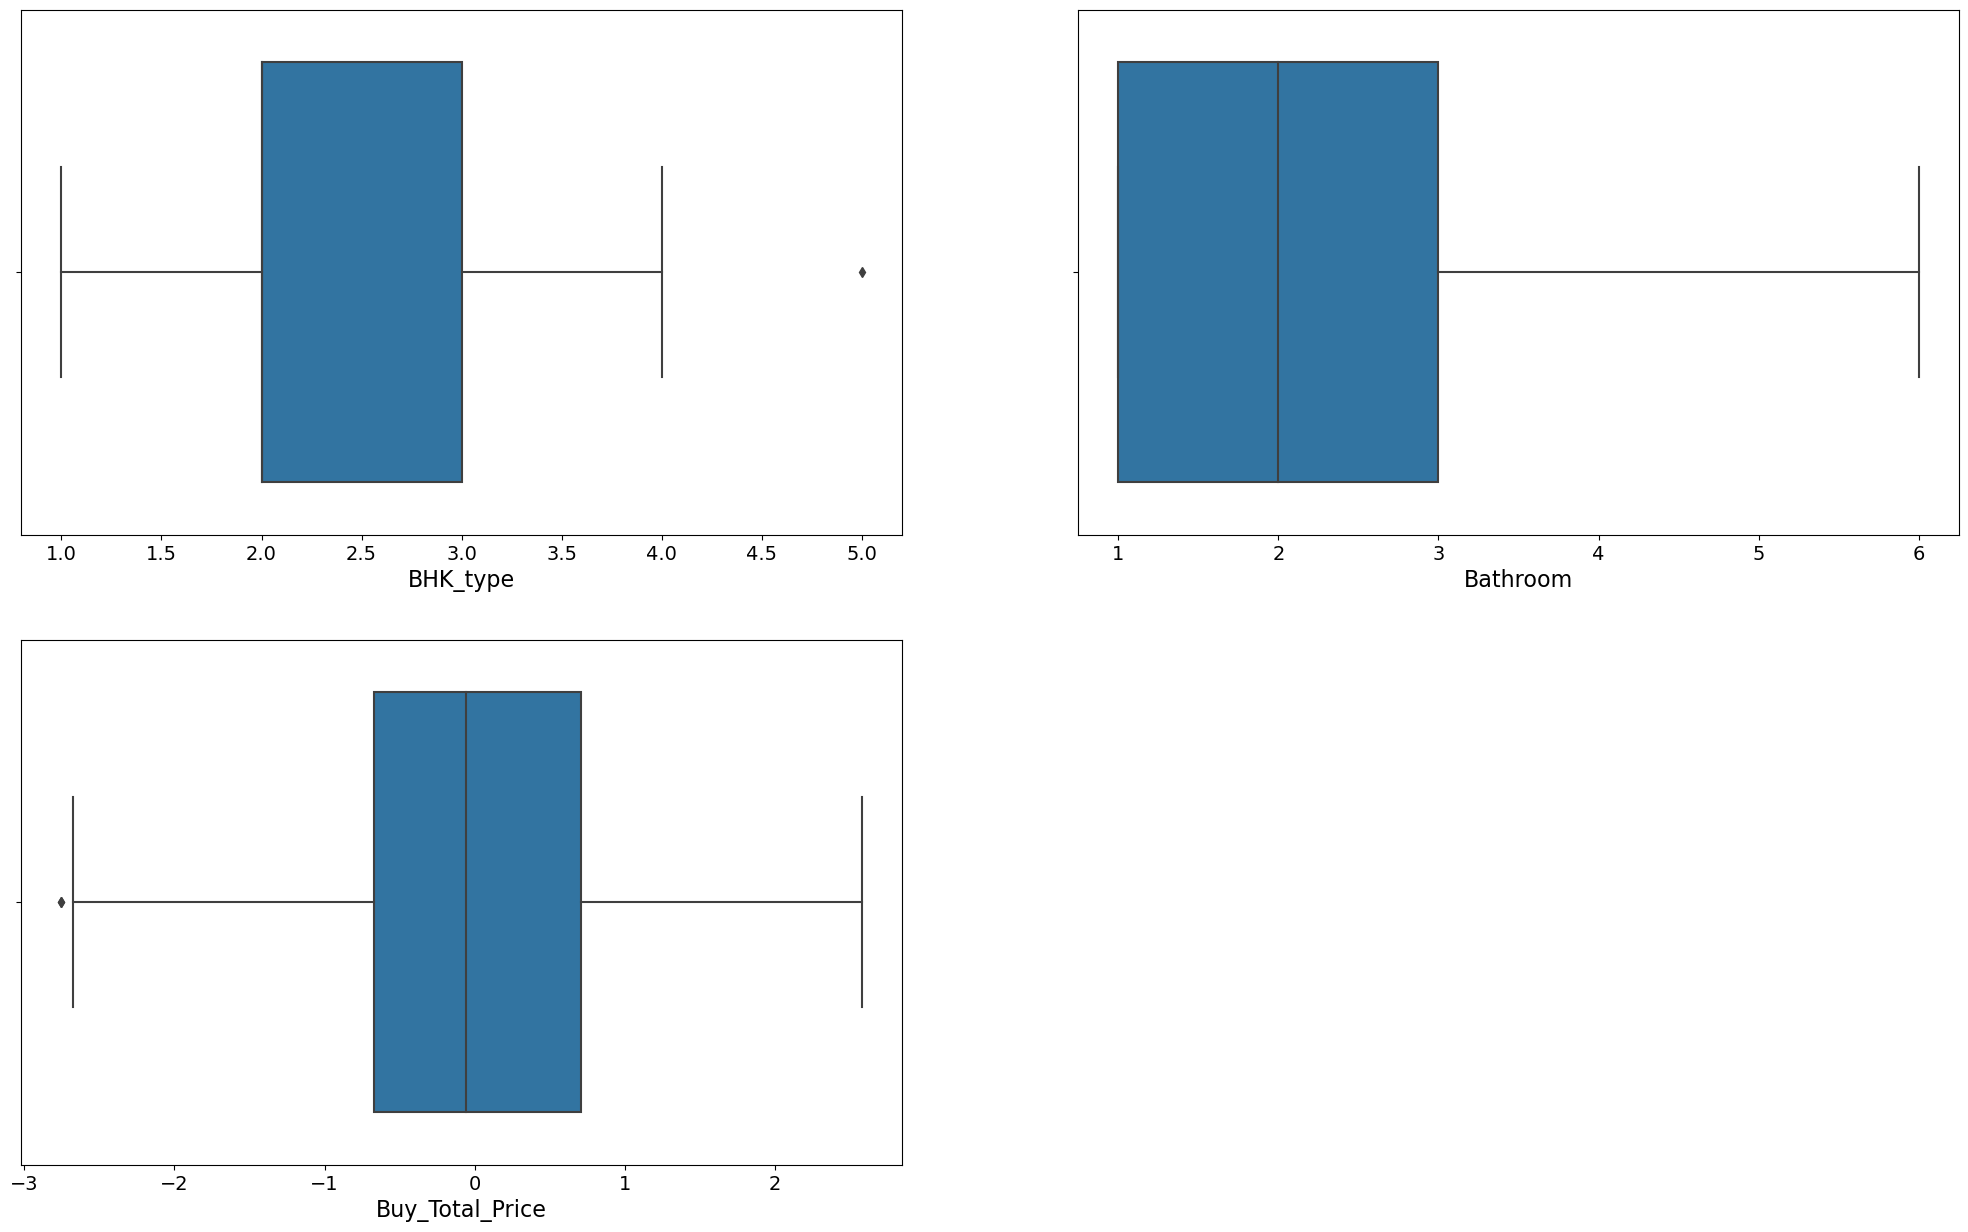

In [103]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<=10:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()   

We have successfully removed outliers using the Interquartile Range (IQR) method with minimal loss of data.

In [104]:
df

BHK_type        Property_Type  Bathroom       City State_Code  \
0            3                Condo       2.0    Chicago         IL   
1            4                Condo       3.0    Chicago         IL   
2            2                Condo       2.0    Chicago         IL   
3            3                Condo       2.0    Chicago         IL   
4            3                Condo       1.0    Chicago         IL   
...        ...                  ...       ...        ...        ...   
2368         3    Independent House       1.0  Faridabad         HR   
2369         1    Independent House       2.0  Faridabad         HR   
2370         3  Standalone Building       2.0  Faridabad         HR   
2371         3  Standalone Building       2.0  Faridabad         HR   
2372         1                   Sb       2.0  Faridabad         HR   

            Country                  Landmarks   Car_Parking  Buy_Total_Price  
0     United States         CHI - Logan Square  Bike and Car         1.569363  
1     United States             CHI - Avondale  Bike and Car         1.690249  
2     United States         CHI - Lincoln Park  Bike and Car         1.312253  
3     United States         CHI - Logan Square  Bike and Car         1.690387  
4     United States         CHI - North Center  Bike and Car         1.042251  
...             ...                        ...           ...              ...  
2368          India       Crown Interiorz Mall           Car        -0.032307  
2369          India       Crown Interiorz Mall  Bike and Car        -0.966623  
2370          India  Anupama Sweets Restaurant  Bike and Car        -0.442538  
2371          India            Raheja Navodaya  Bike and Car        -0.257000  
2372          India            Raheja Navodaya          Bike        -0.808362  

[2339 rows x 9 columns]

In [105]:
df.reset_index(drop=True, inplace=True)

In [106]:
df

BHK_type        Property_Type  Bathroom       City State_Code  \
0            3                Condo       2.0    Chicago         IL   
1            4                Condo       3.0    Chicago         IL   
2            2                Condo       2.0    Chicago         IL   
3            3                Condo       2.0    Chicago         IL   
4            3                Condo       1.0    Chicago         IL   
...        ...                  ...       ...        ...        ...   
2334         3    Independent House       1.0  Faridabad         HR   
2335         1    Independent House       2.0  Faridabad         HR   
2336         3  Standalone Building       2.0  Faridabad         HR   
2337         3  Standalone Building       2.0  Faridabad         HR   
2338         1                   Sb       2.0  Faridabad         HR   

            Country                  Landmarks   Car_Parking  Buy_Total_Price  
0     United States         CHI - Logan Square  Bike and Car         1.569363  
1     United States             CHI - Avondale  Bike and Car         1.690249  
2     United States         CHI - Lincoln Park  Bike and Car         1.312253  
3     United States         CHI - Logan Square  Bike and Car         1.690387  
4     United States         CHI - North Center  Bike and Car         1.042251  
...             ...                        ...           ...              ...  
2334          India       Crown Interiorz Mall           Car        -0.032307  
2335          India       Crown Interiorz Mall  Bike and Car        -0.966623  
2336          India  Anupama Sweets Restaurant  Bike and Car        -0.442538  
2337          India            Raheja Navodaya  Bike and Car        -0.257000  
2338          India            Raheja Navodaya          Bike        -0.808362  

[2339 rows x 9 columns]

In [107]:
df.isnull().sum()

BHK_type           0
Property_Type      0
Bathroom           0
City               0
State_Code         0
Country            0
Landmarks          0
Car_Parking        0
Buy_Total_Price    0
dtype: int64

In [110]:
df

BHK_type        Property_Type  Bathroom       City State_Code  \
0            3                Condo       2.0    Chicago         IL   
1            4                Condo       3.0    Chicago         IL   
2            2                Condo       2.0    Chicago         IL   
3            3                Condo       2.0    Chicago         IL   
4            3                Condo       1.0    Chicago         IL   
...        ...                  ...       ...        ...        ...   
2334         3    Independent House       1.0  Faridabad         HR   
2335         1    Independent House       2.0  Faridabad         HR   
2336         3  Standalone Building       2.0  Faridabad         HR   
2337         3  Standalone Building       2.0  Faridabad         HR   
2338         1                   Sb       2.0  Faridabad         HR   

            Country                  Landmarks   Car_Parking  Buy_Total_Price  
0     United States         CHI - Logan Square  Bike and Car         1.569363  
1     United States             CHI - Avondale  Bike and Car         1.690249  
2     United States         CHI - Lincoln Park  Bike and Car         1.312253  
3     United States         CHI - Logan Square  Bike and Car         1.690387  
4     United States         CHI - North Center  Bike and Car         1.042251  
...             ...                        ...           ...              ...  
2334          India       Crown Interiorz Mall           Car        -0.032307  
2335          India       Crown Interiorz Mall  Bike and Car        -0.966623  
2336          India  Anupama Sweets Restaurant  Bike and Car        -0.442538  
2337          India            Raheja Navodaya  Bike and Car        -0.257000  
2338          India            Raheja Navodaya          Bike        -0.808362  

[2339 rows x 9 columns]

# Encoding of object data

In [112]:
cat_col

['Property_Type', 'City', 'State_Code', 'Country', 'Landmarks', 'Car_Parking']

In [113]:
df['Property_Type'].value_counts()

Property_Type
Independent House         631
Standalone Building       378
Condo                      64
Apartment                  56
Supertech Eco Villa...     20
                         ... 
Karimji Building            1
Gandhinivas Chs             1
House In A Building         1
Mohammad Building           1
Edenburg City Phase...      1
Name: count, Length: 920, dtype: int64

Almost all are unique, so we will drop it.

In [114]:
df = df.drop(columns=['Property_Type'])

In [115]:
df['City'].value_counts()

City
Faridabad       394
Delhi           365
Mumbai          336
Bengaluru       243
Hyderabad       235
Chennai         198
Noida           167
Gurgaon         154
Pune            100
GreaterNoida     83
Chicago          64
Name: count, dtype: int64

In [116]:
df['State_Code'].value_counts()

State_Code
HR    548
MH    436
DL    365
UP    250
KA    243
TG    235
TN    198
IL     64
Name: count, dtype: int64

In [117]:
df['Landmarks'].value_counts()

Landmarks
Raheja Navodaya               386
Metro INOX Cinema             200
Safina Business Park          168
Maujpur- Babarpur             136
Crown Interiorz Mall          120
                             ... 
Tarnaka                         1
Spencer'S Hyper Market          1
Aradhana Garden Restaurant      1
Pune IT Park                    1
NHPC Chowk                      1
Name: count, Length: 120, dtype: int64

In [118]:
df = df.drop(columns=['Landmarks'])

In [119]:
df['Car_Parking'].value_counts()

Car_Parking
Bike and Car    1372
Bike             620
Car              347
Name: count, dtype: int64

In [121]:
df['Country'].value_counts()

Country
India            2275
United States      64
Name: count, dtype: int64

# Encode the target variable using a label encoder.

In [122]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['State_Code']=le.fit_transform(df['State_Code'])

In [123]:
df['Car_Parking']=le.fit_transform(df['Car_Parking'])

In [124]:
df['City']=le.fit_transform(df['City'])

In [125]:
df['Country']=le.fit_transform(df['Country'])

In [126]:
df

BHK_type  Bathroom  City  State_Code  Country  Car_Parking  \
0            3       2.0     2           2        1            1   
1            4       3.0     2           2        1            1   
2            2       2.0     2           2        1            1   
3            3       2.0     2           2        1            1   
4            3       1.0     2           2        1            1   
...        ...       ...   ...         ...      ...          ...   
2334         3       1.0     4           1        0            2   
2335         1       2.0     4           1        0            1   
2336         3       2.0     4           1        0            1   
2337         3       2.0     4           1        0            1   
2338         1       2.0     4           1        0            0   

      Buy_Total_Price  
0            1.569363  
1            1.690249  
2            1.312253  
3            1.690387  
4            1.042251  
...               ...  
2334        -0.032307  
2335        -0.966623  
2336        -0.442538  
2337        -0.257000  
2338        -0.808362  

[2339 rows x 7 columns]

In [127]:
df.columns

Index(['BHK_type', 'Bathroom', 'City', 'State_Code', 'Country', 'Car_Parking',
       'Buy_Total_Price'],
      dtype='object')

In [128]:
df.dtypes

BHK_type             int64
Bathroom           float64
City                 int32
State_Code           int32
Country              int32
Car_Parking          int32
Buy_Total_Price    float64
dtype: object

The object data has been encoded successfully.

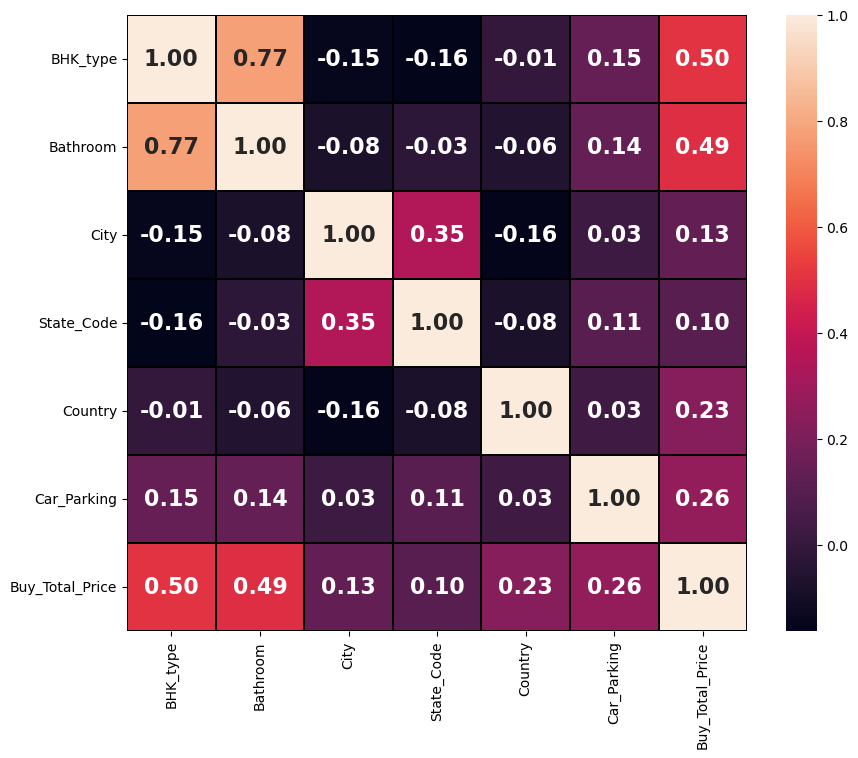

In [129]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='black',linewidth=0.2,annot_kws={'fontsize': 16,'fontweight': 'bold'})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show() 

In [130]:
df.corr()['Buy_Total_Price'].sort_values(ascending=False).to_frame()

Buy_Total_Price
Buy_Total_Price         1.000000
BHK_type                0.503963
Bathroom                0.488188
Car_Parking             0.264807
Country                 0.230447
City                    0.133204
State_Code              0.102521

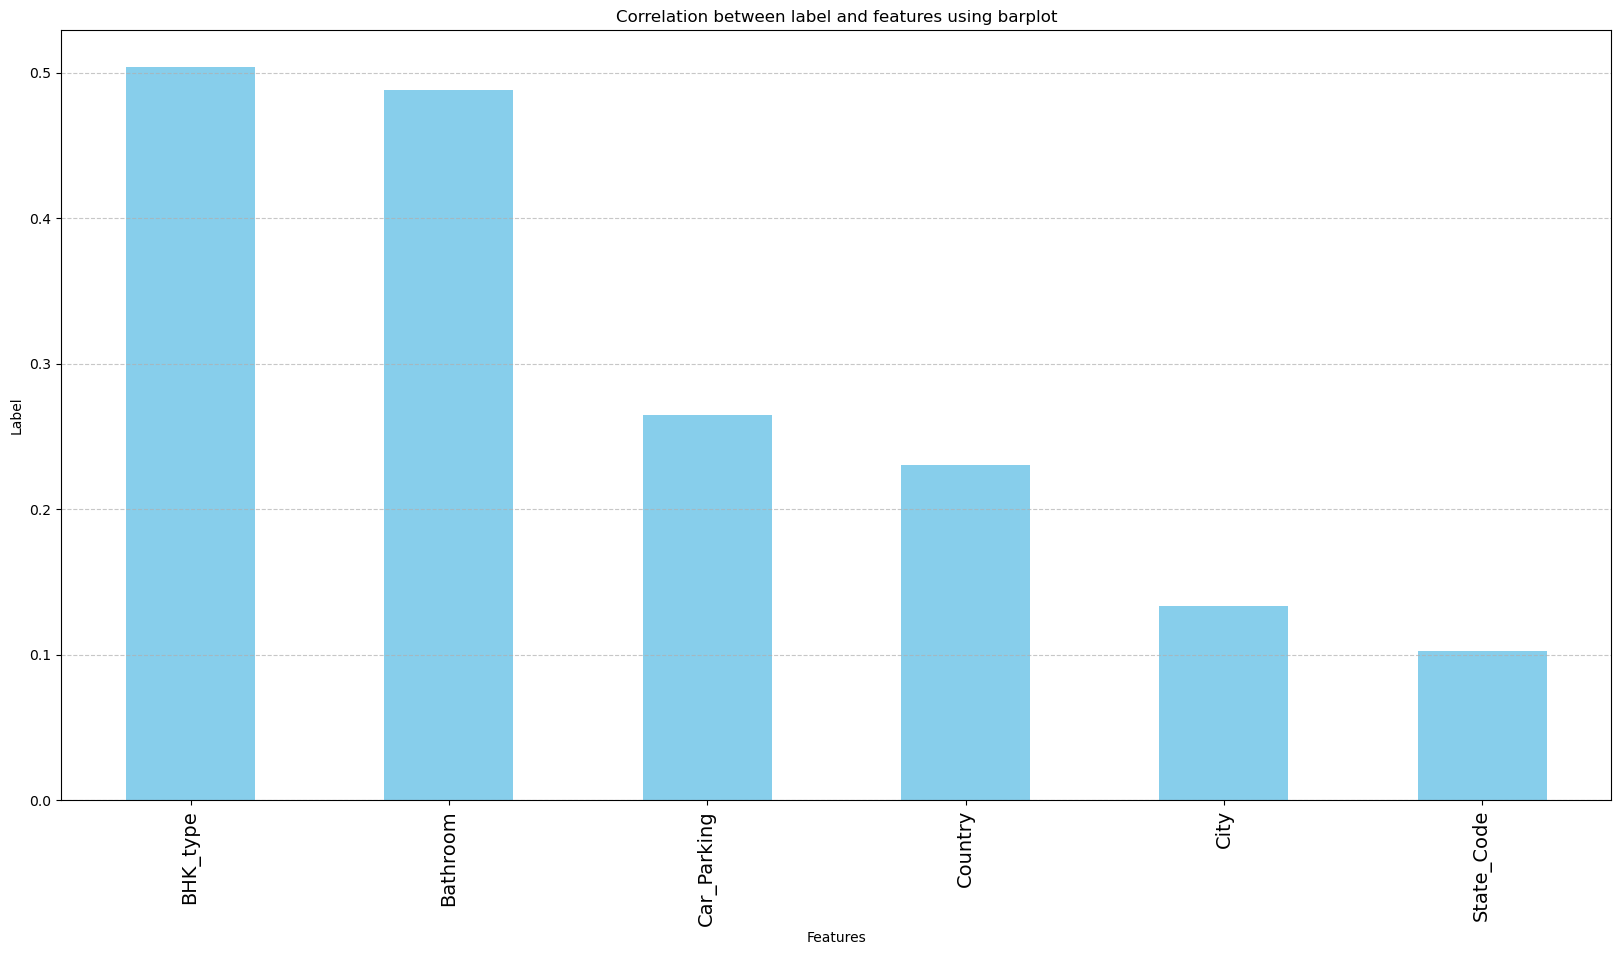

In [131]:
plt.figure(figsize=(20,10))
df.corr()['Buy_Total_Price'].sort_values(ascending=False).drop(['Buy_Total_Price']).plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Label')
plt.xticks(fontsize=14)
plt.title('Correlation between label and features using barplot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Model I: Including all features.

# Preparing Data for Machine Learning

# Splitting

Choose the dependent(label)and independent variables

In [132]:
X = df.drop('Buy_Total_Price', axis=1)
Y = df['Buy_Total_Price']

In [133]:
X

BHK_type  Bathroom  City  State_Code  Country  Car_Parking
0            3       2.0     2           2        1            1
1            4       3.0     2           2        1            1
2            2       2.0     2           2        1            1
3            3       2.0     2           2        1            1
4            3       1.0     2           2        1            1
...        ...       ...   ...         ...      ...          ...
2334         3       1.0     4           1        0            2
2335         1       2.0     4           1        0            1
2336         3       2.0     4           1        0            1
2337         3       2.0     4           1        0            1
2338         1       2.0     4           1        0            0

[2339 rows x 6 columns]

In [134]:
Y

0       1.569363
1       1.690249
2       1.312253
3       1.690387
4       1.042251
          ...   
2334   -0.032307
2335   -0.966623
2336   -0.442538
2337   -0.257000
2338   -0.808362
Name: Buy_Total_Price, Length: 2339, dtype: float64

# Feature Scaling

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

BHK_type  Bathroom      City  State_Code   Country  Car_Parking
0     0.660540 -0.190352 -0.930005   -0.474605  5.962120     0.184591
1     1.671667  0.707294 -0.930005   -0.474605  5.962120     0.184591
2    -0.350588 -0.190352 -0.930005   -0.474605  5.962120     0.184591
3     0.660540 -0.190352 -0.930005   -0.474605  5.962120     0.184591
4     0.660540 -1.087998 -0.930005   -0.474605  5.962120     0.184591
...        ...       ...       ...         ...       ...          ...
2334  0.660540 -1.087998 -0.260069   -0.904210 -0.167726     1.766122
2335 -1.361715 -0.190352 -0.260069   -0.904210 -0.167726     0.184591
2336  0.660540 -0.190352 -0.260069   -0.904210 -0.167726     0.184591
2337  0.660540 -0.190352 -0.260069   -0.904210 -0.167726     0.184591
2338 -1.361715 -0.190352 -0.260069   -0.904210 -0.167726    -1.396940

[2339 rows x 6 columns]

To address potential bias stemming from variations in decimal places across feature columns, I've opted to standardize all the features using the Standard Scaler method. This technique ensures that all feature columns have comparable scales, which can enhance the performance and stability of my model.

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [137]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

VIF Values     Features
0    2.660123     BHK_type
1    2.571367     Bathroom
2    1.172682         City
3    1.199732   State_Code
4    1.033917      Country
5    1.043464  Car_Parking

In [138]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.4875409882054469 at random state 78


In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models

In [140]:
# Model Building-1

In [141]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
print()
def evaluate_regression(model, X, Y):
    print('Model Name:',model)
    # Splitting data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting y_test
    pred = model.predict(X_test)
    
    # Predicting y_train
    train = model.predict(X_train)
    
    
    # R-squared Score
    r2 = r2_score(Y_test, pred)
    print("R-squared Score:", r2)
    
    #R-squared Score on training data
    r3 = r2_score(Y_train, train)
    print("R-squared Score on training data:", r3*100)
    
    # Mean Absolute Error
    mae = mean_absolute_error(Y_test, pred)
    print("Mean Absolute Error:", mae)
    
    # Mean Squared Error
    mse = mean_squared_error(Y_test, pred)
    print("Mean Squared Error:", mse)
    
    # Root Mean Squared Error
    rmse =np.sqrt(mean_squared_error(Y_test, pred))
    print("Root Mean Squared Error:", rmse)
    
    
    
    # Cross Validation Score
    cv_score = cross_val_score(model, X, Y, cv=5, scoring='r2') 
    print("\nCross Validation Score:", cv_score)
    print("Cross Validation Score Mean:", cv_score.mean())
    
    # Result of accuracy minus cv scores
    result = r2 - cv_score.mean()
    print("R-squared Score - Cross Validation Score is", result*100)


In [142]:
# Linear Regression
LR = LinearRegression()
evaluate_regression(LR,X, Y)

Model Name: LinearRegression()
R-squared Score: 0.5250232836174182
R-squared Score on training data: 40.635609919753165
Mean Absolute Error: 0.5498921046223443
Mean Squared Error: 0.5018875399128679
Root Mean Squared Error: 0.7084402161882596

Cross Validation Score: [-0.92566042 -0.05335802  0.42397744  0.13700311  0.23024705]
Cross Validation Score Mean: -0.03755816791955502
R-squared Score - Cross Validation Score is 56.25814515369733


In [143]:
# Ridge Regressor
RDG = Ridge()
evaluate_regression(RDG,X, Y)

Model Name: Ridge()
R-squared Score: 0.5249990797161526
R-squared Score on training data: 40.635600125069615
Mean Absolute Error: 0.5498908071994381
Mean Squared Error: 0.501913115138018
Root Mean Squared Error: 0.7084582663347347

Cross Validation Score: [-0.92458096 -0.05301835  0.42385171  0.13763079  0.23020506]
Cross Validation Score Mean: -0.037182351458379156
R-squared Score - Cross Validation Score is 56.21814311745317


In [144]:
# Lasso Regressor
LS = Lasso()
evaluate_regression(LS,X, Y)

Model Name: Lasso()
R-squared Score: -0.009695563766408233
R-squared Score on training data: 0.0
Mean Absolute Error: 0.8394334108462315
Mean Squared Error: 1.0669020292596438
Root Mean Squared Error: 1.0329094971291743

Cross Validation Score: [-5.79895538e-01 -2.27210952e-05 -2.51154404e-01 -4.26341507e-02
 -2.65091261e-01]
Cross Validation Score Mean: -0.2277596150425169
R-squared Score - Cross Validation Score is 21.806405127610866


In [145]:
# Decision Tree Regression
DT = DecisionTreeRegressor()
evaluate_regression(DT,X, Y)

Model Name: DecisionTreeRegressor()
R-squared Score: 0.5947983242909816
R-squared Score on training data: 67.31668306807754
Mean Absolute Error: 0.4927881212999754
Mean Squared Error: 0.42815924481309725
Root Mean Squared Error: 0.6543387844328786

Cross Validation Score: [-0.36607405  0.42351645  0.45402927 -0.22139878  0.00975306]
Cross Validation Score Mean: 0.059965190819808264
R-squared Score - Cross Validation Score is 53.48331334711733


In [146]:
# Random Forest Regression
RFR = RandomForestRegressor()
evaluate_regression(RFR,X, Y)

Model Name: RandomForestRegressor()
R-squared Score: 0.6253965690572518
R-squared Score on training data: 66.91328026993195
Mean Absolute Error: 0.4811780980160552
Mean Squared Error: 0.3958273909311787
Root Mean Squared Error: 0.629148147045812

Cross Validation Score: [-0.30485823  0.50775479  0.47413417  0.18617557  0.24649466]
Cross Validation Score Mean: 0.22194018939193977
R-squared Score - Cross Validation Score is 40.34563796653121


In [147]:
# Extra Tree Regression
ETR = ExtraTreesRegressor()
evaluate_regression(ETR,X, Y)

Model Name: ExtraTreesRegressor()
R-squared Score: 0.6023012578603852
R-squared Score on training data: 67.31668306807754
Mean Absolute Error: 0.4881182371761862
Mean Squared Error: 0.42023121646687284
Root Mean Squared Error: 0.6482524326733166

Cross Validation Score: [-0.20043827  0.48029737  0.47125788  0.20251722  0.23473339]
Cross Validation Score Mean: 0.2376735174763196
R-squared Score - Cross Validation Score is 36.462774038406565


In [148]:
# ADA Boost Regressor
ABR = AdaBoostRegressor()
evaluate_regression(ABR,X, Y)

Model Name: AdaBoostRegressor()
R-squared Score: 0.5653625417998975
R-squared Score on training data: 48.229147689460575
Mean Absolute Error: 0.5430173087192413
Mean Squared Error: 0.45926277462899
Root Mean Squared Error: 0.6776892906258664

Cross Validation Score: [-0.12684459  0.17921527  0.38792794  0.31378873  0.24424177]
Cross Validation Score Mean: 0.19966582409253872
R-squared Score - Cross Validation Score is 36.56967177073588


In [149]:
# GradientBoostingRegressor
GBR = GradientBoostingRegressor()
evaluate_regression(GBR,X, Y)

Model Name: GradientBoostingRegressor()
R-squared Score: 0.6651018453119165
R-squared Score on training data: 62.55725585120315
Mean Absolute Error: 0.45140857399696777
Mean Squared Error: 0.35387252717957673
Root Mean Squared Error: 0.594871857780797

Cross Validation Score: [-0.26815517  0.59068194  0.50535885  0.2766053   0.39326691]
Cross Validation Score Mean: 0.29955156661297566
R-squared Score - Cross Validation Score is 36.55502786989408


In [150]:
# XGBRegressor
XGBR = XGBRegressor()
evaluate_regression(XGBR,X, Y)

Model Name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R-squared Score: 0.5935225337434922
R-squared Score on training data: 67.28027600347838
Mean Absolute Error: 0.4921097716243125
Mean Squared Error: 0.4295073180075058
Root Mean Squared Error: 0.6553680782640438

Cross Validation Score: [-0.3

The Gradient Boosting Regressor appears to be the best model among all the evaluated models for this dataset. It has the highest R-squared score, indicating a better fit to the data compared to other models. Additionally, it has the lowest MAE and RMSE, suggesting better accuracy in predicting the target variable.

# Hyper parameter tuning on the best ML Model

In [151]:
# Choosing the Gradient Boosting Regressor as best model
param_grid = {
    'n_estimators': [100, 200,],
    'learning_rate': [0.01, 0.1, 0.2,],
    'max_depth': [3,5,7],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2,],

}


In [152]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=GBR, param_grid=param_grid, cv=5)

In [153]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [100, 200]})

In [154]:
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 100}

In [179]:
final_model_1 = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=15,
    n_estimators=100
)

In [180]:
final_model_1.fit(X_train, Y_train)

GradientBoostingRegressor(min_samples_leaf=2, min_samples_split=15)

In [181]:
pred = final_model_1.predict(X_test)

In [182]:
mse = mean_squared_error(Y_test, pred)

In [183]:
print("Mean Squared Error:", mse)

Mean Squared Error: 0.35858948937609525


In [184]:
r2_score(Y_test,pred)

0.6606378029971938

# Saving the model

In [186]:
import joblib

filename = "Capstone_1.pkl"
joblib.dump(final_model_1, filename)

['Capstone_1.pkl']

In [187]:
model=joblib.load("Capstone_1.pkl")

prediction=model.predict(X_test)
prediction

array([-0.3904127 ,  0.10273565, -0.8488476 , -0.3904127 , -0.76501723,
       -0.15771889,  0.11588242,  0.63377891, -0.19708327, -0.76501723,
       -0.51864796, -0.02681028,  0.50559007, -0.60176537, -1.30780397,
       -0.51864796, -0.76501723, -0.58232965,  0.60785931, -0.05047293,
       -0.86061261,  0.06857135, -1.30780397, -0.74214668,  0.69579296,
        0.57667176, -1.01320479, -0.31212068,  0.85775795,  0.26558529,
       -0.6114509 ,  0.97091723,  0.93269385, -0.11110346, -1.30780397,
       -0.8829435 ,  1.20495624, -0.41435125, -0.6114509 ,  0.02152506,
        1.88805161, -0.17902718, -0.12442584,  0.02920697,  1.22455845,
        1.22455845, -0.51864796,  0.95826685, -0.3231469 ,  0.26558529,
        1.0090282 , -1.28183021,  0.26558529, -0.4439898 ,  0.50559007,
        0.69579296,  0.67649052,  1.20495624, -0.35583596, -0.6114509 ,
        0.22562174,  0.17739381, -0.3231469 , -1.30780397,  0.41928223,
        1.11486799,  0.02152506,  1.67106255,  0.61460476,  0.85

In [188]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df.head()

Predicted  Original
0  -0.390413 -0.442538
1   0.102736  0.609660
2  -0.848848 -0.932991
3  -0.390413 -0.671174
4  -0.765017 -0.550338

-------

----

# 2.Carpet area of properties.

-----

------

In [61]:
df=df5

In [62]:
df

BHK_type        Property_Type  Beds  Bathroom Balcony       City  \
0            3                Condo     3       2.0       1    Chicago   
1            4                Condo     4       3.0     NaN    Chicago   
2            2                Condo     2       2.0     NaN    Chicago   
6            3                Condo     3       2.0       1    Chicago   
7            3                Condo     3       1.0     NaN    Chicago   
...        ...                  ...   ...       ...     ...        ...   
3684         3    Independent House     3       1.0     1.0  Faridabad   
3685         1    Independent House     1       2.0     1.0  Faridabad   
3686         3  Standalone Building     3       2.0     2.0  Faridabad   
3687         3  Standalone Building     3       2.0     NaN  Faridabad   
3688         1                   Sb     1       2.0     NaN  Faridabad   

     State_Code        Country                  Landmarks Carpet_area  \
0            IL  United States         CHI - Logan Square       1,500   
1            IL  United States             CHI - Avondale         NaN   
2            IL  United States         CHI - Lincoln Park       1,300   
6            IL  United States         CHI - Logan Square         NaN   
7            IL  United States         CHI - North Center         NaN   
...         ...            ...                        ...         ...   
3684         HR          India       Crown Interiorz Mall         NaN   
3685         HR          India       Crown Interiorz Mall         NaN   
3686         HR          India  Anupama Sweets Restaurant         NaN   
3687         HR          India                        NaN         NaN   
3688         HR          India                        NaN       540.0   

           Status Floor  Year_Built Price_per_square_feet Furnished_Status  \
0          Active   NaN      2004.0                   346              NaN   
1          Active   NaN      2015.0                   NaN              NaN   
2          Active   NaN      1988.0                   296              NaN   
6          Active   NaN      2019.0                   NaN              NaN   
7          Active   NaN         NaN                   NaN              NaN   
...           ...   ...         ...                   ...              ...   
3684  Immediately   NaN         NaN                   NaN              NaN   
3685  Immediately   NaN         NaN                   NaN              NaN   
3686  Immediately   NaN         NaN                   NaN              NaN   
3687  Immediately   NaN         NaN                   NaN              NaN   
3688  Immediately   1/2         NaN                   NaN              NaN   

     Facing   Car_Parking Type_of_Ownership  Buy_Total_Price  
0       NaN           NaN               NaN       43139280.0  
1       NaN           NaN               NaN       49863688.0  
2       NaN           NaN               NaN       32001200.0  
6       NaN           NaN               NaN       49872000.0  
7       NaN           NaN               NaN       23689200.0  
...     ...           ...               ...              ...  
3684    NaN           Car        Self Owned        8000000.0  
3685    NaN           NaN        Self Owned        3500000.0  
3686    NaN  Bike and Car        Self Owned        5500000.0  
3687    NaN  Bike and Car        Self Owned        6500000.0  
3688  North          Bike        Self Owned        4000000.0  

[3353 rows x 19 columns]

We will remove the rows that have missing values in our target variable.

In [63]:
df = df.dropna(subset=['Carpet_area'])

In [64]:
df.reset_index(drop=True, inplace=True)

In [65]:
df

BHK_type           Property_Type  Beds  Bathroom Balcony       City  \
0           3                   Condo     3       2.0       1    Chicago   
1           2                   Condo     2       2.0     NaN    Chicago   
2           2                   Condo     2       2.0     NaN    Chicago   
3           5                   Condo     5       3.0     NaN    Chicago   
4           4                   Condo     4       4.0     NaN    Chicago   
..        ...                     ...   ...       ...     ...        ...   
860         4        Hamilton Heights     4       3.0     2.0  Faridabad   
861         4                      Sb     4       3.0     2.0  Faridabad   
862         3     Standalone Building     3       2.0     NaN  Faridabad   
863         2  Edenburg City Phase...     2       2.0     2.0  Faridabad   
864         1                      Sb     1       2.0     NaN  Faridabad   

    State_Code        Country                  Landmarks Carpet_area  \
0           IL  United States         CHI - Logan Square       1,500   
1           IL  United States         CHI - Lincoln Park       1,300   
2           IL  United States      CHI - Near North Side       1,350   
3           IL  United States         CHI - Lincoln Park       3,174   
4           IL  United States      CHI - Near North Side       2,400   
..         ...            ...                        ...         ...   
860         HR          India       Crown Interiorz Mall      2100.0   
861         HR          India  Anupama Sweets Restaurant      1900.0   
862         HR          India  Anupama Sweets Restaurant       105.0   
863         HR          India                        NaN      1020.0   
864         HR          India                        NaN       540.0   

          Status  Floor  Year_Built Price_per_square_feet Furnished_Status  \
0         Active    NaN      2004.0                   346              NaN   
1         Active    NaN      1988.0                   296              NaN   
2         Active    NaN      2003.0                   326              NaN   
3         Active    NaN         NaN                   246              NaN   
4         Active    NaN      1962.0                   271              NaN   
..           ...    ...         ...                   ...              ...   
860  Immediately  10/16         NaN                   NaN             Semi   
861  Immediately    2/2         NaN                   NaN  Fully Furnished   
862  Immediately    0/3         NaN                   NaN             Semi   
863  Immediately    2/3         NaN                   NaN             Semi   
864  Immediately    1/2         NaN                   NaN              NaN   

    Facing   Car_Parking Type_of_Ownership  Buy_Total_Price  
0      NaN           NaN               NaN       43139280.0  
1      NaN           NaN               NaN       32001200.0  
2      NaN           NaN               NaN       36572800.0  
3      NaN           NaN               NaN       64833184.0  
4      NaN           NaN               NaN       54028000.0  
..     ...           ...               ...              ...  
860  North           Car        Self Owned       14000000.0  
861   East           Car        Self Owned        7800000.0  
862   East  Bike and Car        Self Owned        4600000.0  
863   East  Bike and Car        Self Owned        5000000.0  
864  North          Bike        Self Owned        4000000.0  

[865 rows x 19 columns]

In [66]:
df.head()#first 5 rows

BHK_type Property_Type  Beds  Bathroom Balcony     City State_Code  \
0         3         Condo     3       2.0       1  Chicago         IL   
1         2         Condo     2       2.0     NaN  Chicago         IL   
2         2         Condo     2       2.0     NaN  Chicago         IL   
3         5         Condo     5       3.0     NaN  Chicago         IL   
4         4         Condo     4       4.0     NaN  Chicago         IL   

         Country              Landmarks Carpet_area  Status Floor  Year_Built  \
0  United States     CHI - Logan Square       1,500  Active   NaN      2004.0   
1  United States     CHI - Lincoln Park       1,300  Active   NaN      1988.0   
2  United States  CHI - Near North Side       1,350  Active   NaN      2003.0   
3  United States     CHI - Lincoln Park       3,174  Active   NaN         NaN   
4  United States  CHI - Near North Side       2,400  Active   NaN      1962.0   

  Price_per_square_feet Furnished_Status Facing Car_Parking Type_of_Ownership  \
0                   346              NaN    NaN         NaN               NaN   
1                   296              NaN    NaN         NaN               NaN   
2                   326              NaN    NaN         NaN               NaN   
3                   246              NaN    NaN         NaN               NaN   
4                   271              NaN    NaN         NaN               NaN   

   Buy_Total_Price  
0       43139280.0  
1       32001200.0  
2       36572800.0  
3       64833184.0  
4       54028000.0

In [67]:
df.tail()#last 5 rows

BHK_type           Property_Type  Beds  Bathroom Balcony       City  \
860         4        Hamilton Heights     4       3.0     2.0  Faridabad   
861         4                      Sb     4       3.0     2.0  Faridabad   
862         3     Standalone Building     3       2.0     NaN  Faridabad   
863         2  Edenburg City Phase...     2       2.0     2.0  Faridabad   
864         1                      Sb     1       2.0     NaN  Faridabad   

    State_Code Country                  Landmarks Carpet_area       Status  \
860         HR   India       Crown Interiorz Mall      2100.0  Immediately   
861         HR   India  Anupama Sweets Restaurant      1900.0  Immediately   
862         HR   India  Anupama Sweets Restaurant       105.0  Immediately   
863         HR   India                        NaN      1020.0  Immediately   
864         HR   India                        NaN       540.0  Immediately   

     Floor  Year_Built Price_per_square_feet Furnished_Status Facing  \
860  10/16         NaN                   NaN             Semi  North   
861    2/2         NaN                   NaN  Fully Furnished   East   
862    0/3         NaN                   NaN             Semi   East   
863    2/3         NaN                   NaN             Semi   East   
864    1/2         NaN                   NaN              NaN  North   

      Car_Parking Type_of_Ownership  Buy_Total_Price  
860           Car        Self Owned       14000000.0  
861           Car        Self Owned        7800000.0  
862  Bike and Car        Self Owned        4600000.0  
863  Bike and Car        Self Owned        5000000.0  
864          Bike        Self Owned        4000000.0

# Exploratory Data Analysis (EDA)

In [68]:
df.shape

(865, 19)

The dataset consists of 865 rows and 19 columns, which include both features and labels.

In [69]:
df.columns

Index(['BHK_type', 'Property_Type', 'Beds', 'Bathroom', 'Balcony', 'City',
       'State_Code', 'Country', 'Landmarks', 'Carpet_area', 'Status', 'Floor',
       'Year_Built', 'Price_per_square_feet', 'Furnished_Status', 'Facing',
       'Car_Parking', 'Type_of_Ownership', 'Buy_Total_Price'],
      dtype='object')

In [70]:
df.dtypes

BHK_type                   int64
Property_Type             object
Beds                       int64
Bathroom                 float64
Balcony                   object
City                      object
State_Code                object
Country                   object
Landmarks                 object
Carpet_area               object
Status                    object
Floor                     object
Year_Built               float64
Price_per_square_feet     object
Furnished_Status          object
Facing                    object
Car_Parking               object
Type_of_Ownership         object
Buy_Total_Price          float64
dtype: object

All features contains int64,float64 and object data.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BHK_type               865 non-null    int64  
 1   Property_Type          863 non-null    object 
 2   Beds                   865 non-null    int64  
 3   Bathroom               865 non-null    float64
 4   Balcony                579 non-null    object 
 5   City                   865 non-null    object 
 6   State_Code             865 non-null    object 
 7   Country                865 non-null    object 
 8   Landmarks              794 non-null    object 
 9   Carpet_area            865 non-null    object 
 10  Status                 865 non-null    object 
 11  Floor                  789 non-null    object 
 12  Year_Built             50 non-null     float64
 13  Price_per_square_feet  76 non-null     object 
 14  Furnished_Status       555 non-null    object 
 15  Facing

In [72]:
df.duplicated().sum()

231

In [73]:
df = df.drop_duplicates()

In [75]:
df.duplicated().sum()

0

In the dataset, there are no duplicate values present.

In [ ]:
df.isin([' ','NA','?']).sum().any()

Dataset doesn’t contain Any duplicate entry, whitespace, ‘NA’, or ‘-’.

In [77]:
# checking the number of unique values in each column
df.nunique().to_frame("no.of unique values")

no.of unique values
BHK_type                                 5
Property_Type                          422
Beds                                     5
Bathroom                                 7
Balcony                                  6
City                                    11
State_Code                               8
Country                                  2
Landmarks                               80
Carpet_area                            297
Status                                   2
Floor                                  133
Year_Built                              22
Price_per_square_feet                   35
Furnished_Status                         2
Facing                                   8
Car_Parking                              3
Type_of_Ownership                        5
Buy_Total_Price                        216

In [78]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('/n')

BHK_type
2    243
3    166
1    139
4     84
5      2
Name: count, dtype: int64
/n
Property_Type
Independent House         95
Condo                     39
Standalone Building       15
Apartment                 10
Signature Global Ro...     5
                          ..
Allharakha Building...     1
Al Karim Manzil            1
131 Sarang Street, ...     1
Chirabazar Sanjivin...     1
Edenburg City Phase...     1
Name: count, Length: 422, dtype: int64
/n
Beds
2    243
3    166
1    139
4     84
5      2
Name: count, dtype: int64
/n
Bathroom
2.0    276
1.0    157
3.0    134
4.0     33
5.0     22
6.0      8
7.0      4
Name: count, dtype: int64
/n
Balcony
1.0    198
2.0    114
3.0     73
4.0     18
1       11
5.0      8
Name: count, dtype: int64
/n
City
Mumbai          144
Chennai          76
Bengaluru        68
Faridabad        56
Delhi            54
Hyderabad        52
Noida            46
Gurgaon          44
Chicago          39
Pune             34
GreaterNoida     21
Name: count, dtype: 

In [79]:
df.isnull().sum()

BHK_type                   0
Property_Type              1
Beds                       0
Bathroom                   0
Balcony                  212
City                       0
State_Code                 0
Country                    0
Landmarks                 53
Carpet_area                0
Status                     0
Floor                     39
Year_Built               608
Price_per_square_feet    595
Furnished_Status         213
Facing                    97
Car_Parking              130
Type_of_Ownership         39
Buy_Total_Price            0
dtype: int64

We have identified several columns where more than half of the total records contain missing values. We will proceed to drop these columns, namely: Year_Built, Furnished_Status,Price_per_square_feet,Balcony,.

In [80]:
df.drop([ 'Year_Built','Balcony', 'Furnished_Status','Price_per_square_feet'], axis=1, inplace=True)

In [82]:
df.columns

Index(['BHK_type', 'Property_Type', 'Beds', 'Bathroom', 'City', 'State_Code',
       'Country', 'Landmarks', 'Carpet_area', 'Status', 'Floor', 'Facing',
       'Car_Parking', 'Type_of_Ownership', 'Buy_Total_Price'],
      dtype='object')

In [84]:
df.isnull().sum()

BHK_type               0
Property_Type          1
Beds                   0
Bathroom               0
City                   0
State_Code             0
Country                0
Landmarks             53
Carpet_area            0
Status                 0
Floor                 39
Facing                97
Car_Parking          130
Type_of_Ownership     39
Buy_Total_Price        0
dtype: int64

In [85]:
df.isnull().sum().sum()

359

<Axes: >

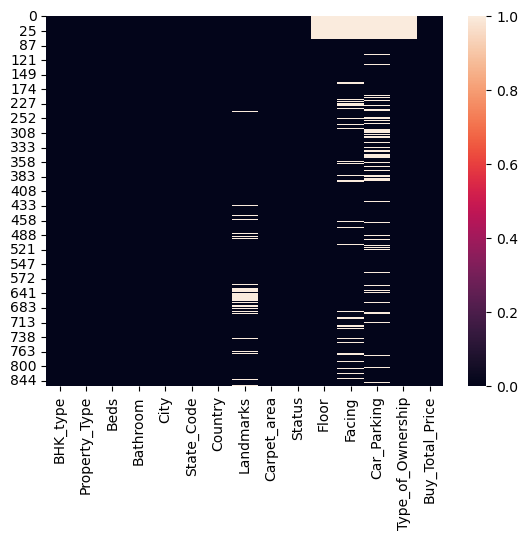

In [86]:
sns.heatmap(df.isnull())

In [87]:
df.isnull().sum()

BHK_type               0
Property_Type          1
Beds                   0
Bathroom               0
City                   0
State_Code             0
Country                0
Landmarks             53
Carpet_area            0
Status                 0
Floor                 39
Facing                97
Car_Parking          130
Type_of_Ownership     39
Buy_Total_Price        0
dtype: int64

In [88]:
df['Landmarks'].fillna(value=df['Landmarks'].mode()[0], inplace= True)

In [89]:
df['Property_Type'].fillna(value=df['Property_Type'].mode()[0], inplace= True)

In [90]:
df['Car_Parking'].fillna(value=df['Car_Parking'].mode()[0], inplace= True)

In [91]:
df['Type_of_Ownership'].fillna(value=df['Type_of_Ownership'].mode()[0], inplace= True)

In [96]:
df['Floor'].fillna(value=df['Floor'].mode()[0], inplace= True)

In [93]:
df['Facing'].fillna(value=df['Facing'].mode()[0], inplace= True)

In [98]:
df.isnull().sum()

BHK_type             0
Property_Type        0
Beds                 0
Bathroom             0
City                 0
State_Code           0
Country              0
Landmarks            0
Carpet_area          0
Status               0
Floor                0
Facing               0
Car_Parking          0
Type_of_Ownership    0
Buy_Total_Price      0
dtype: int64

<Axes: >

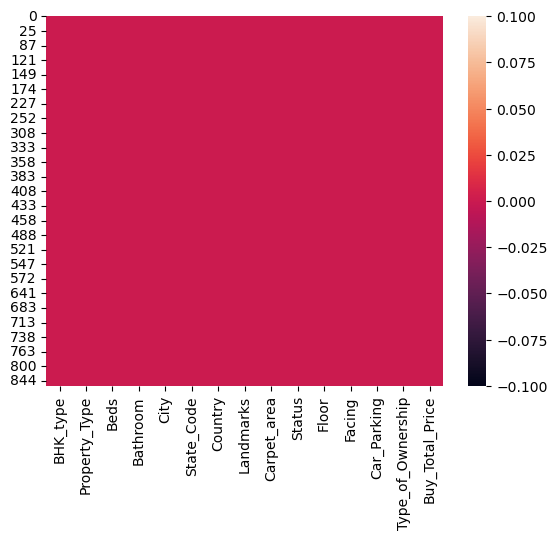

In [99]:
sns.heatmap(df.isnull())

In the dataset, there are no null values present.

In [101]:
df['Carpet_area'].value_counts()

Carpet_area
800.0     19
900.0     16
1500.0    14
750.0     13
1800.0    13
          ..
1058.0     1
327.0      1
349.0      1
610.0      1
105.0      1
Name: count, Length: 297, dtype: int64

In [102]:
df

BHK_type           Property_Type  Beds  Bathroom       City State_Code  \
0           3                   Condo     3       2.0    Chicago         IL   
1           2                   Condo     2       2.0    Chicago         IL   
2           2                   Condo     2       2.0    Chicago         IL   
3           5                   Condo     5       3.0    Chicago         IL   
4           4                   Condo     4       4.0    Chicago         IL   
..        ...                     ...   ...       ...        ...        ...   
852         1     Standalone Building     1       1.0  Faridabad         HR   
861         4                      Sb     4       3.0  Faridabad         HR   
862         3     Standalone Building     3       2.0  Faridabad         HR   
863         2  Edenburg City Phase...     2       2.0  Faridabad         HR   
864         1                      Sb     1       2.0  Faridabad         HR   

           Country                  Landmarks Carpet_area       Status Floor  \
0    United States         CHI - Logan Square       1,500       Active   2/2   
1    United States         CHI - Lincoln Park       1,300       Active   2/2   
2    United States      CHI - Near North Side       1,350       Active   2/2   
3    United States         CHI - Lincoln Park       3,174       Active   2/2   
4    United States      CHI - Near North Side       2,400       Active   2/2   
..             ...                        ...         ...          ...   ...   
852          India       Crown Interiorz Mall       300.0  Immediately   1/2   
861          India  Anupama Sweets Restaurant      1900.0  Immediately   2/2   
862          India  Anupama Sweets Restaurant       105.0  Immediately   0/3   
863          India          Metro INOX Cinema      1020.0  Immediately   2/3   
864          India          Metro INOX Cinema       540.0  Immediately   1/2   

    Facing   Car_Parking Type_of_Ownership  Buy_Total_Price  
0     East  Bike and Car        Self Owned       43139280.0  
1     East  Bike and Car        Self Owned       32001200.0  
2     East  Bike and Car        Self Owned       36572800.0  
3     East  Bike and Car        Self Owned       64833184.0  
4     East  Bike and Car        Self Owned       54028000.0  
..     ...           ...               ...              ...  
852  South  Bike and Car        Self Owned        1050000.0  
861   East           Car        Self Owned        7800000.0  
862   East  Bike and Car        Self Owned        4600000.0  
863   East  Bike and Car        Self Owned        5000000.0  
864  North          Bike        Self Owned        4000000.0  

[634 rows x 15 columns]

# 3. Data Visualization

# 1.Univariate Analysis-

In [103]:
df.columns

Index(['BHK_type', 'Property_Type', 'Beds', 'Bathroom', 'City', 'State_Code',
       'Country', 'Landmarks', 'Carpet_area', 'Status', 'Floor', 'Facing',
       'Car_Parking', 'Type_of_Ownership', 'Buy_Total_Price'],
      dtype='object')

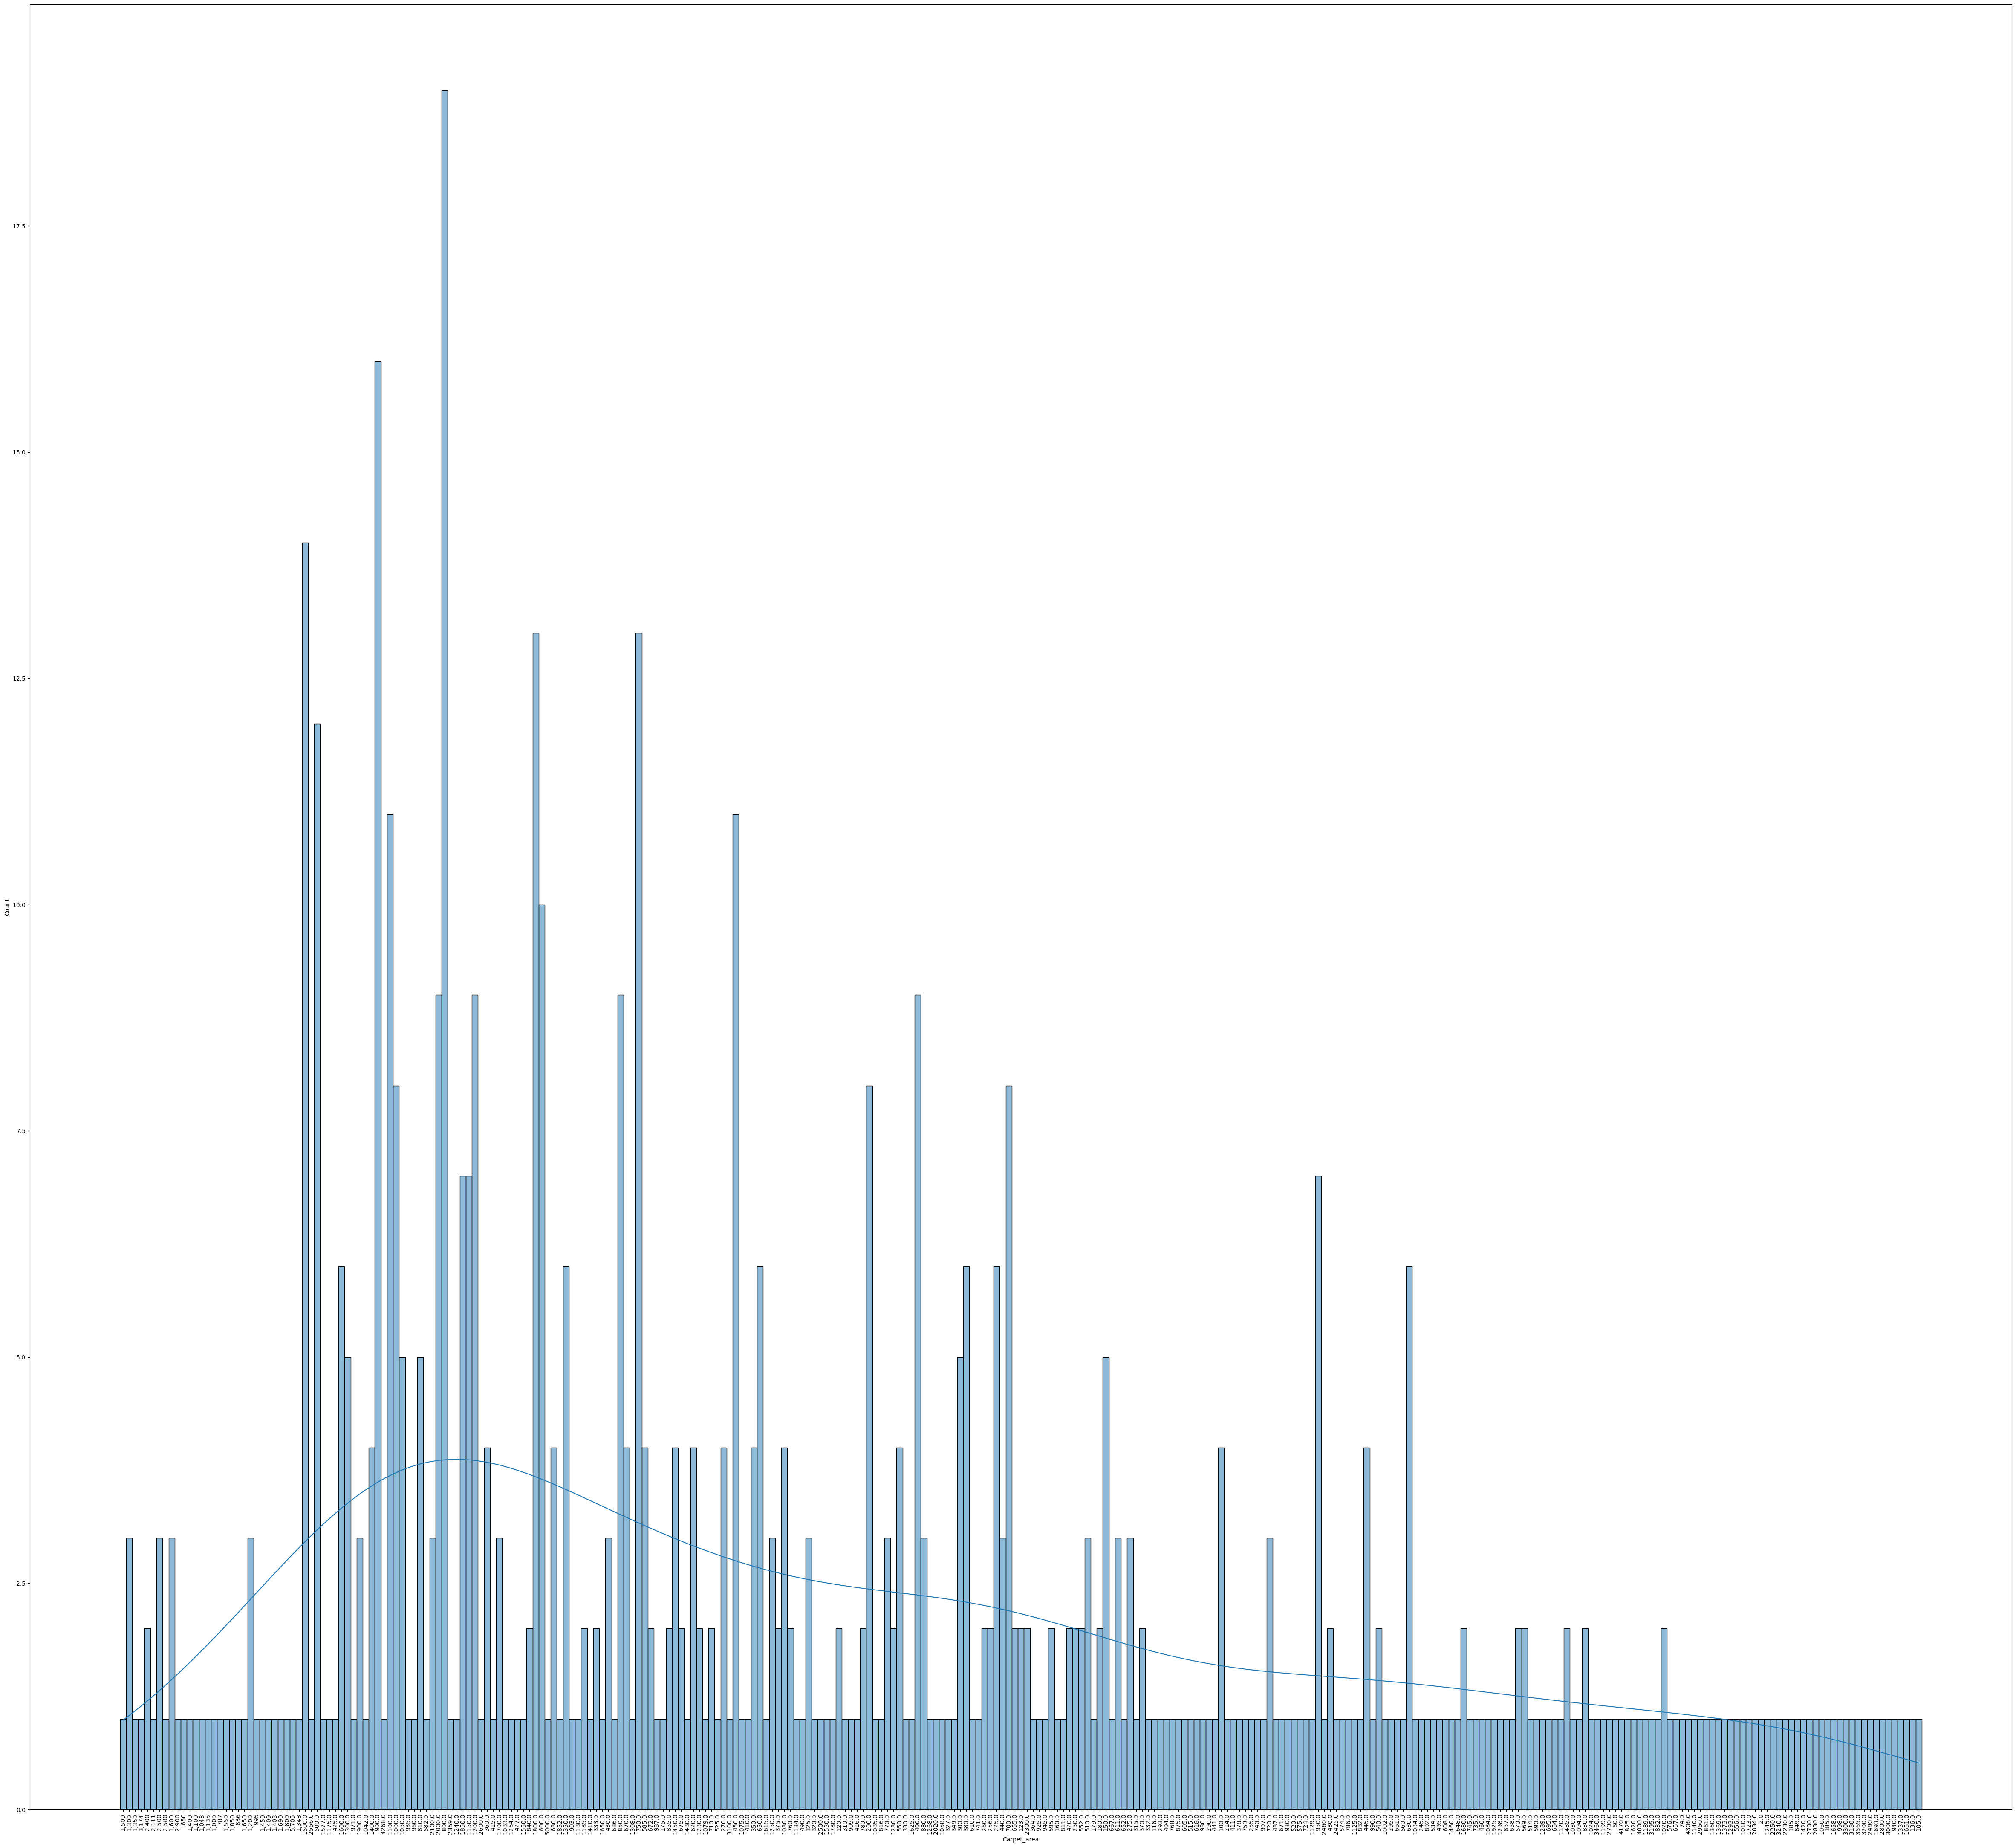

In [128]:
plt.figure(figsize=(60, 55))
sns.histplot(df['Carpet_area'], kde=True)
plt.xticks(rotation=90)
plt.show()

Most of the records fall between 600 sq.ft and 1600 sq.ft.

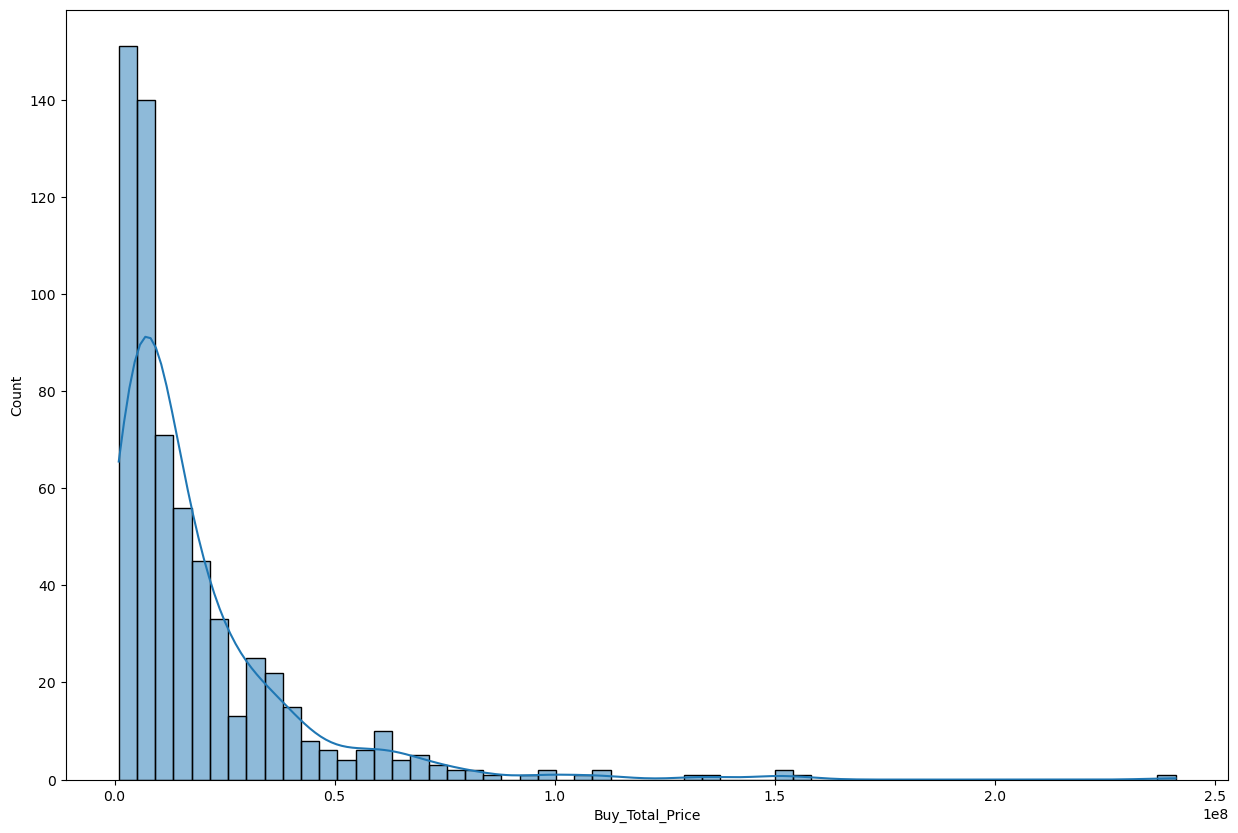

In [123]:
plt.figure(figsize=(15, 10))
sns.histplot(df['Buy_Total_Price'], kde=True)
plt.show()

Most prices fall within the range of 0 to 1 crore, although there are also outliers within this range.

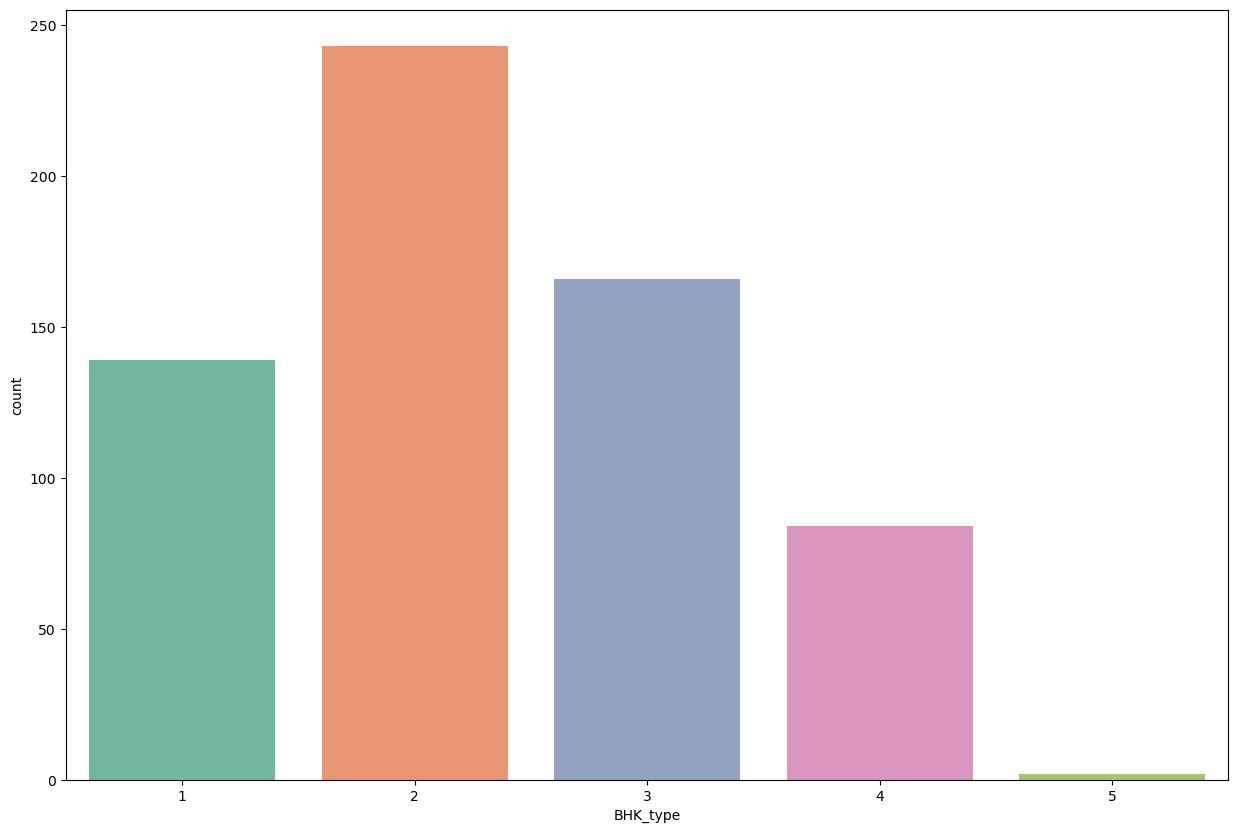

In [105]:
plt.figure(figsize=(15, 10))
sns.countplot(x='BHK_type', data=df, palette='Set2')
plt.show()

 Here, it's clear that most properties are of the 2 BHK type.

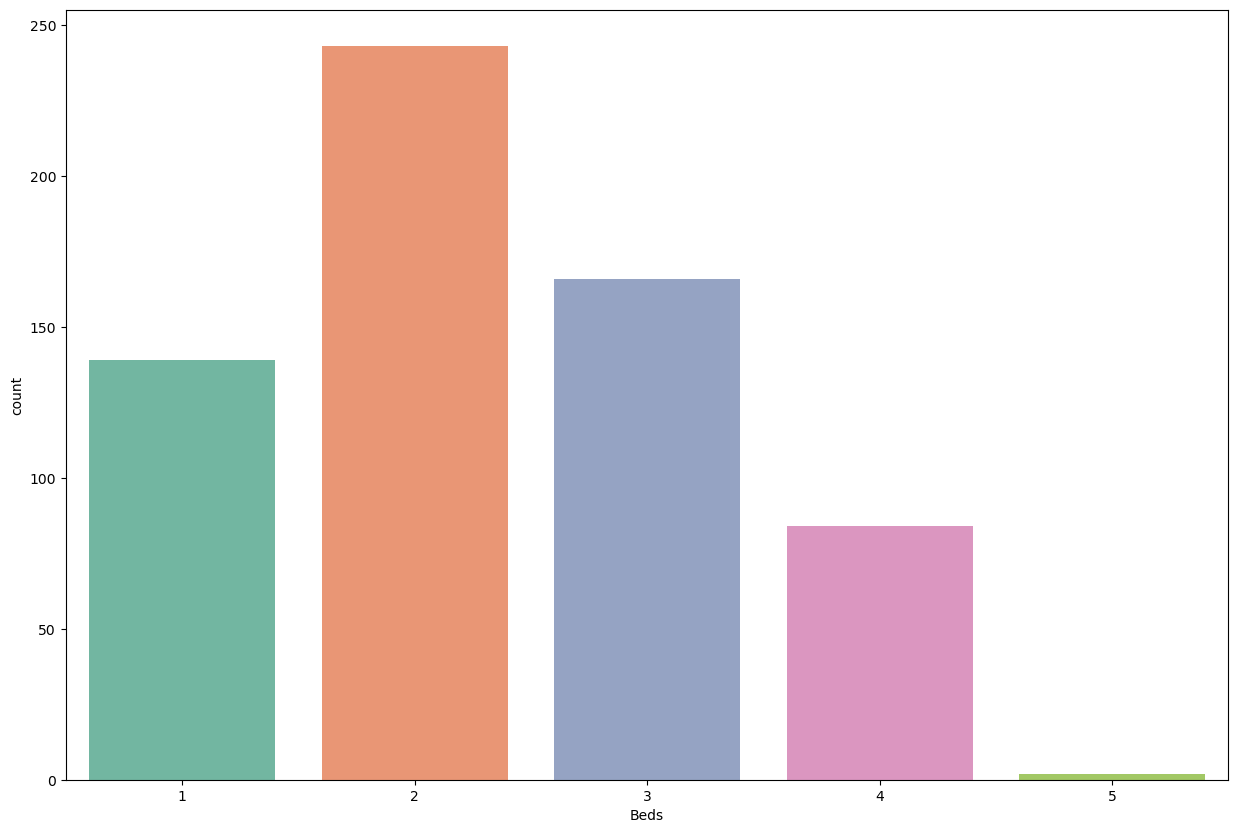

In [108]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Beds', data=df, palette='Set2')
plt.show()

Here, it's clear that most properties has 2 Beds .

Since BHK_type and Beds contain the same data, we will drop the Beds column.

In [113]:
df.drop('Beds', axis=1, inplace=True)

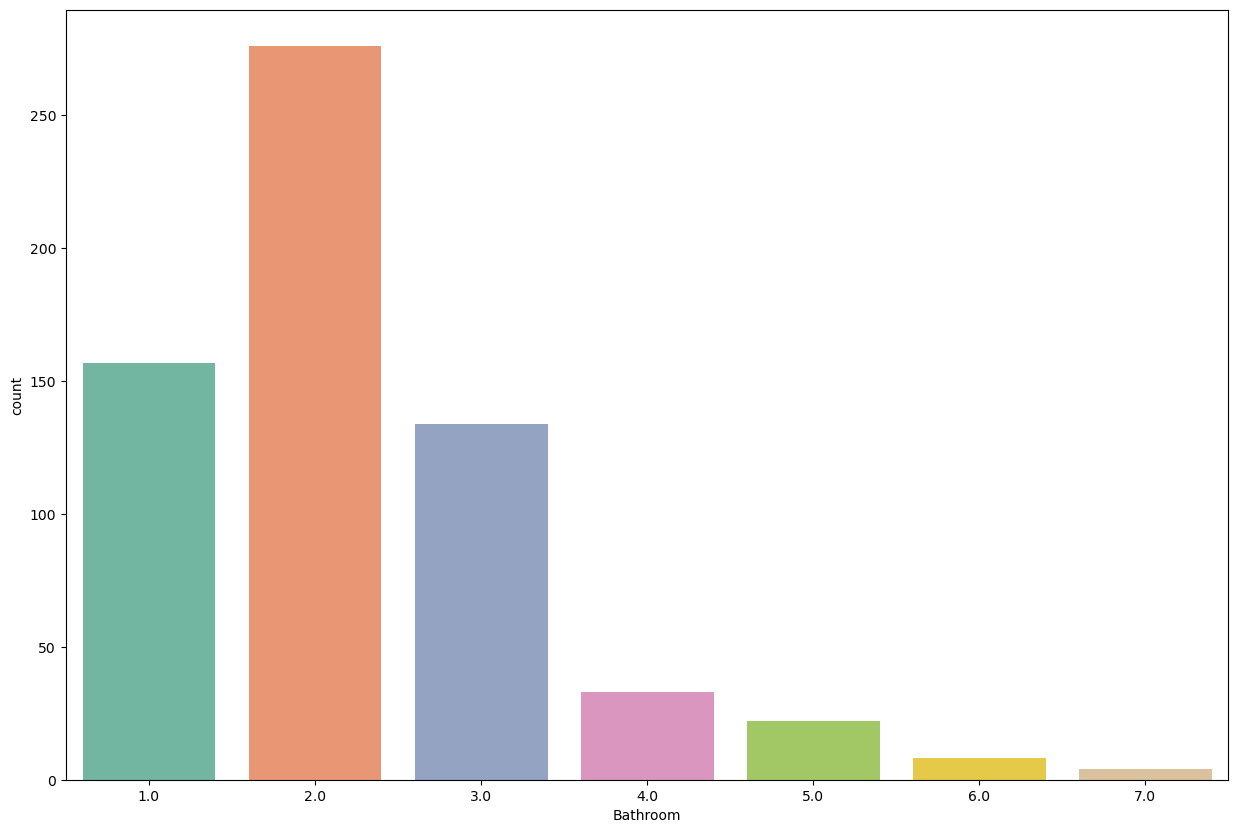

In [109]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Bathroom', data=df, palette='Set2')
plt.show()

Here, it's clear that most properties has 2 Bathroom .

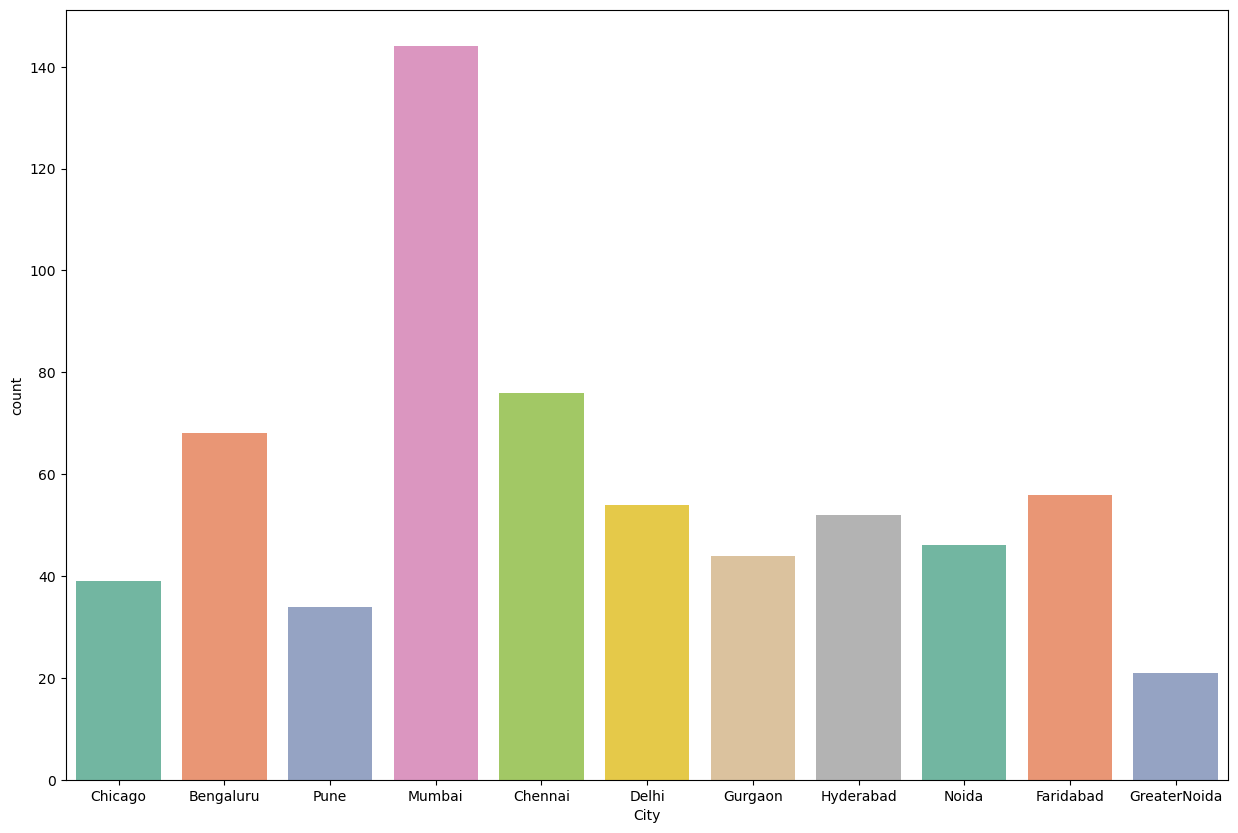

In [110]:
plt.figure(figsize=(15, 10))
sns.countplot(x='City', data=df, palette='Set2')
plt.show()

Mumbai has the highest number of records, followed by Chennai and Bengaluru in comparison to other cities.

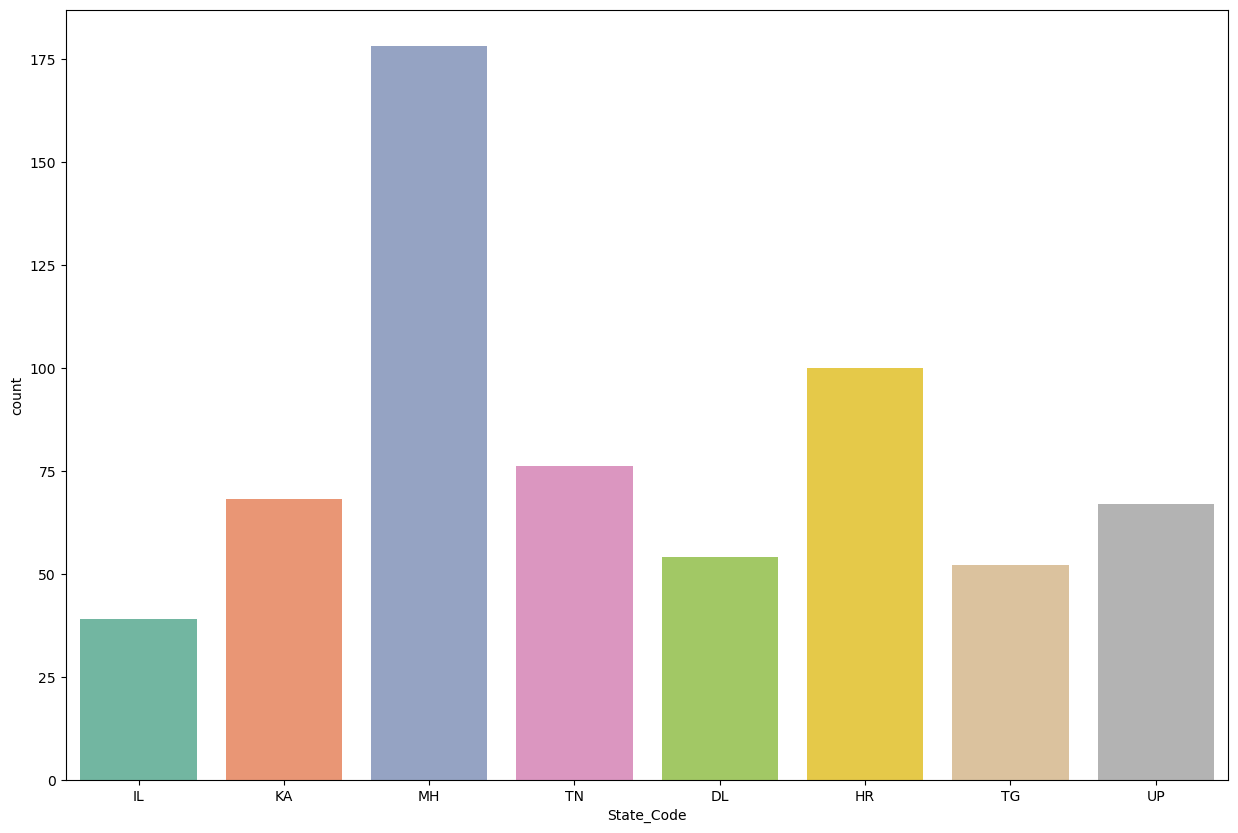

In [111]:
plt.figure(figsize=(15, 10))
sns.countplot(x='State_Code', data=df, palette='Set2')
plt.show()

MH has the highest number of records, followed by HR and TN in comparison to other State.

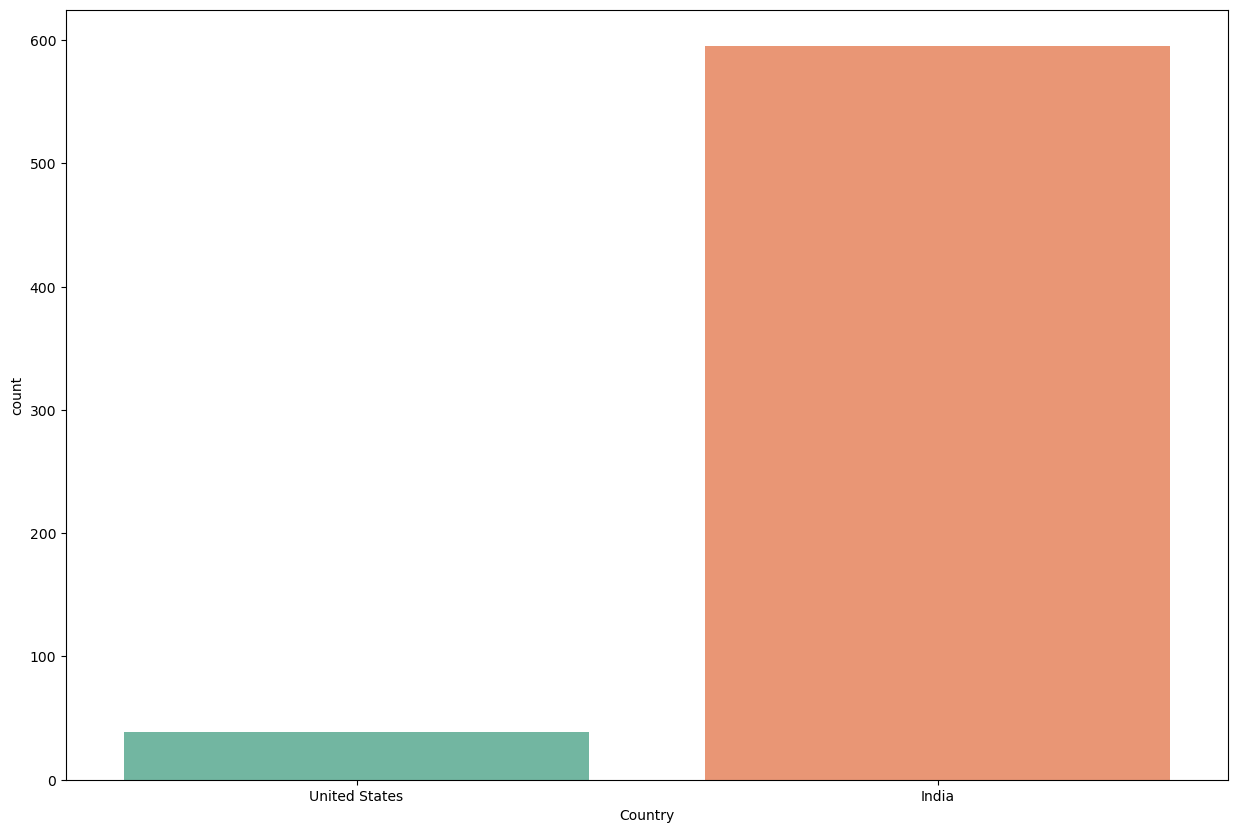

In [112]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Country', data=df, palette='Set2')
plt.show()

India has the highest number of records.

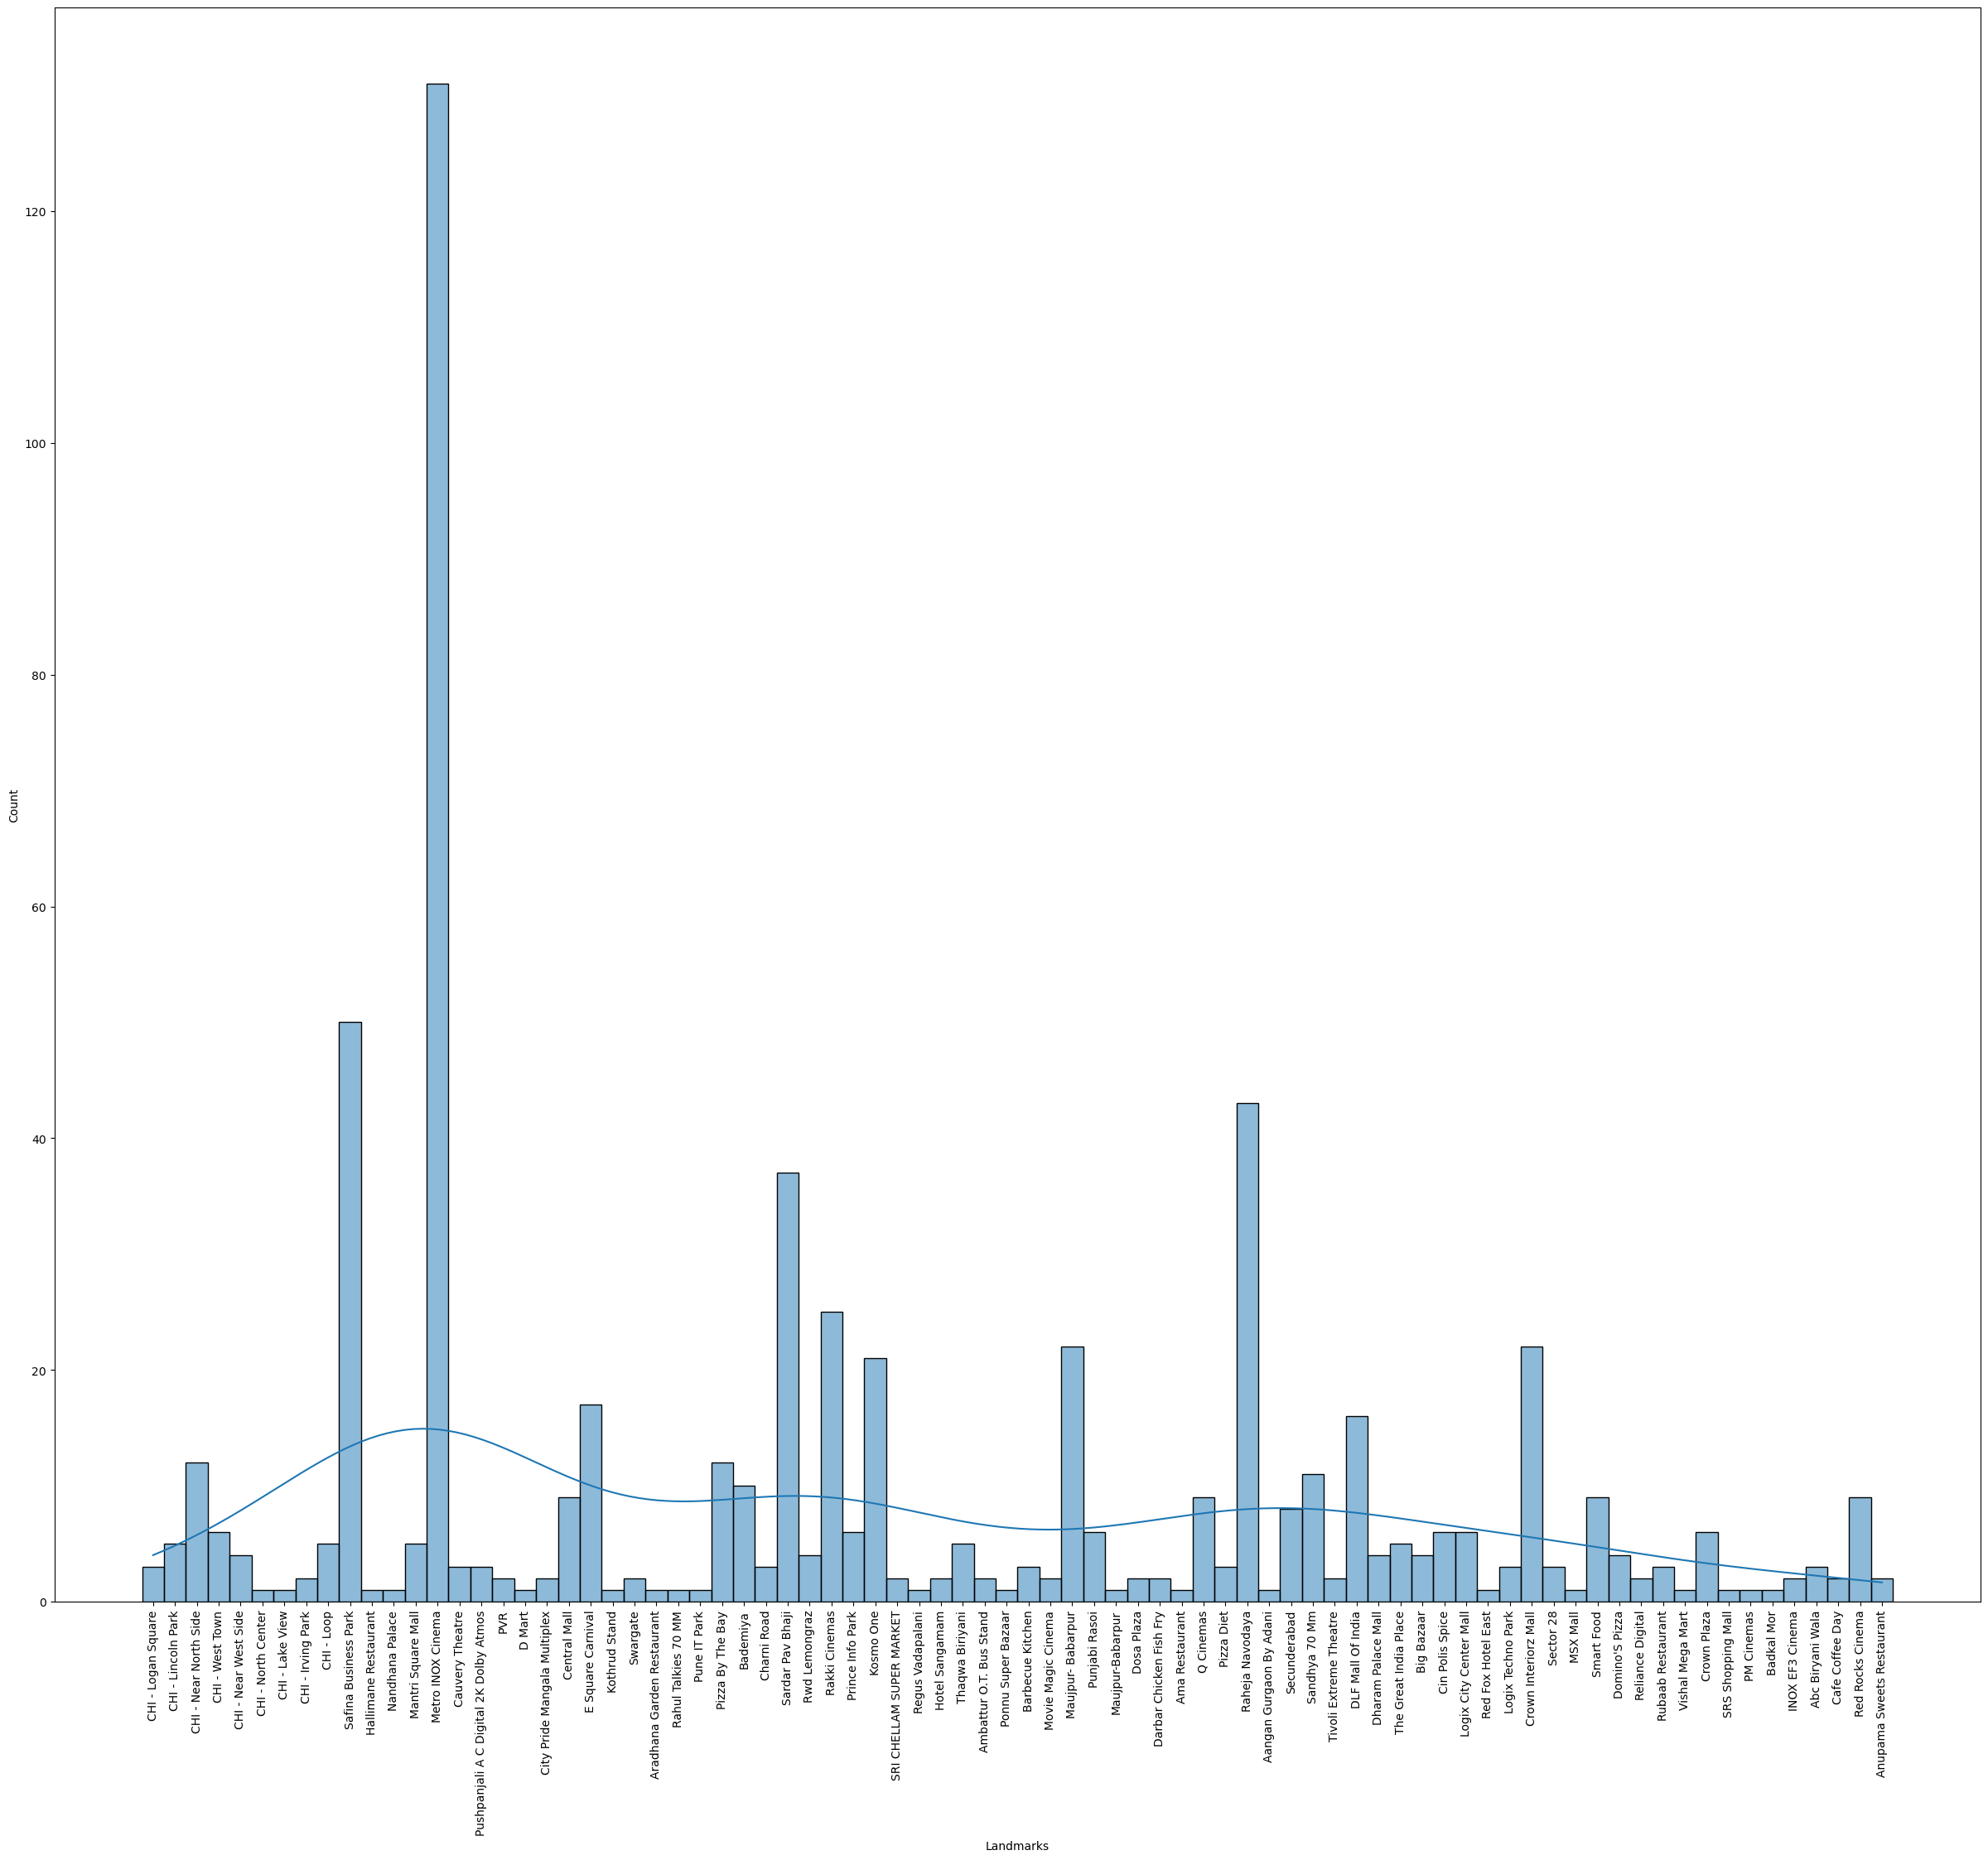

In [115]:
plt.figure(figsize=(30, 25))
sns.histplot(df['Landmarks'], kde=True)
plt.xticks(rotation=90)
plt.show()

Metro Inox Cinema  has the highest number of landmarks.

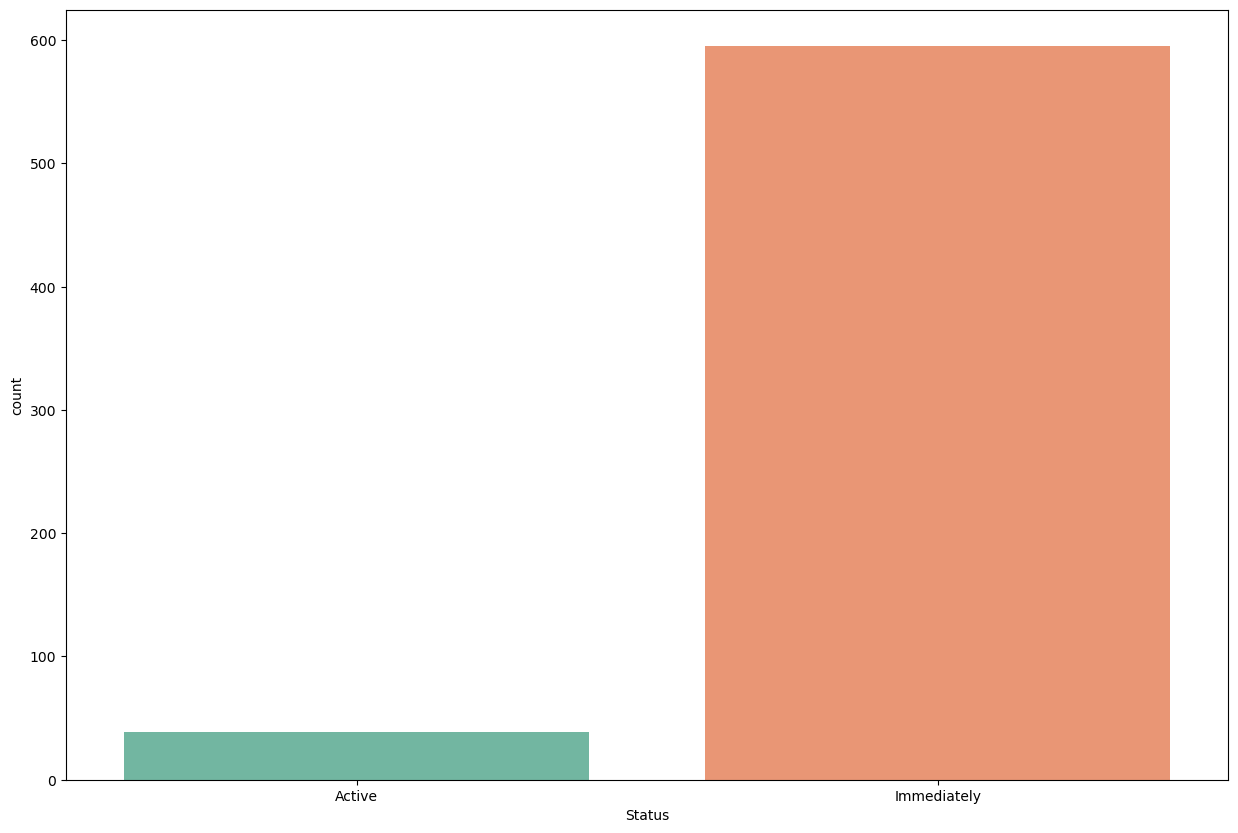

In [116]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Status', data=df, palette='Set2')
plt.show()

Imidiately has highest number of records.

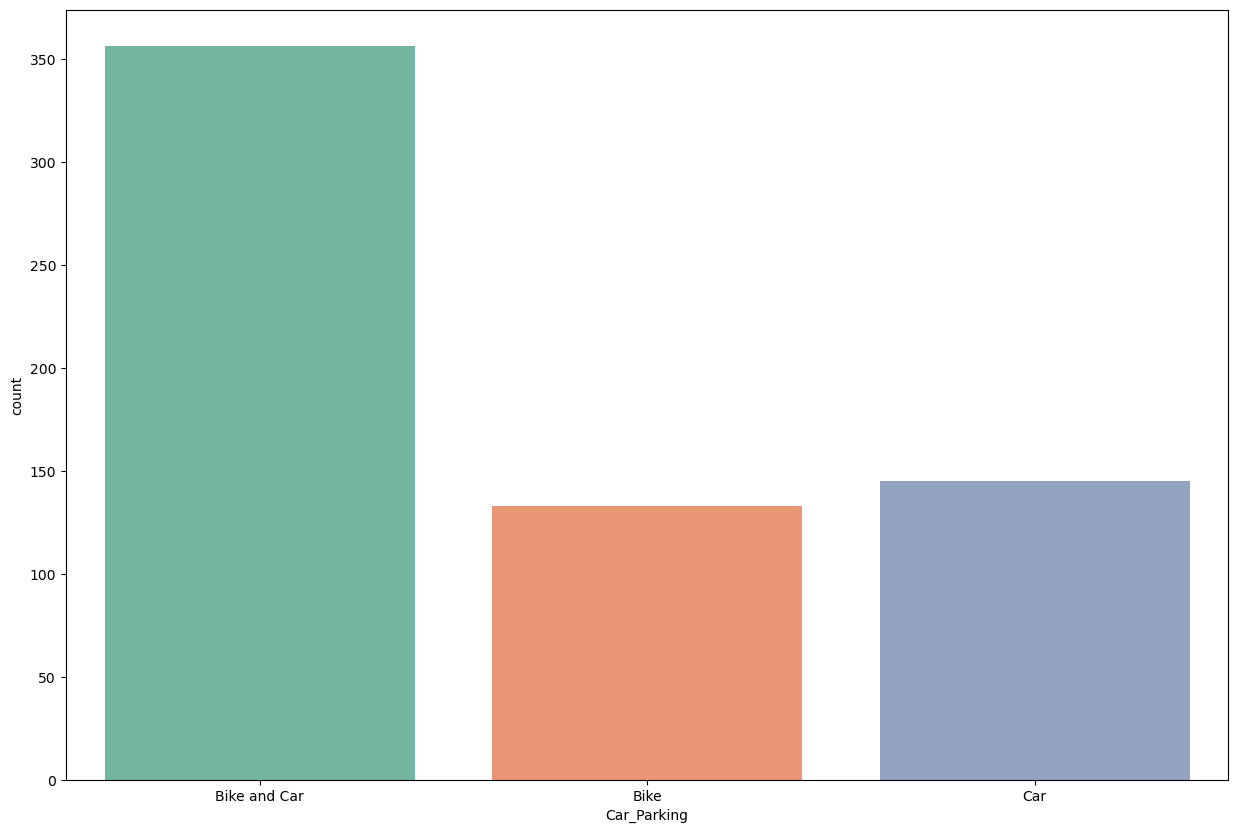

In [117]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Car_Parking', data=df, palette='Set2')
plt.show()

The 'Parking' column has the highest number of records for 'Bike and Car'

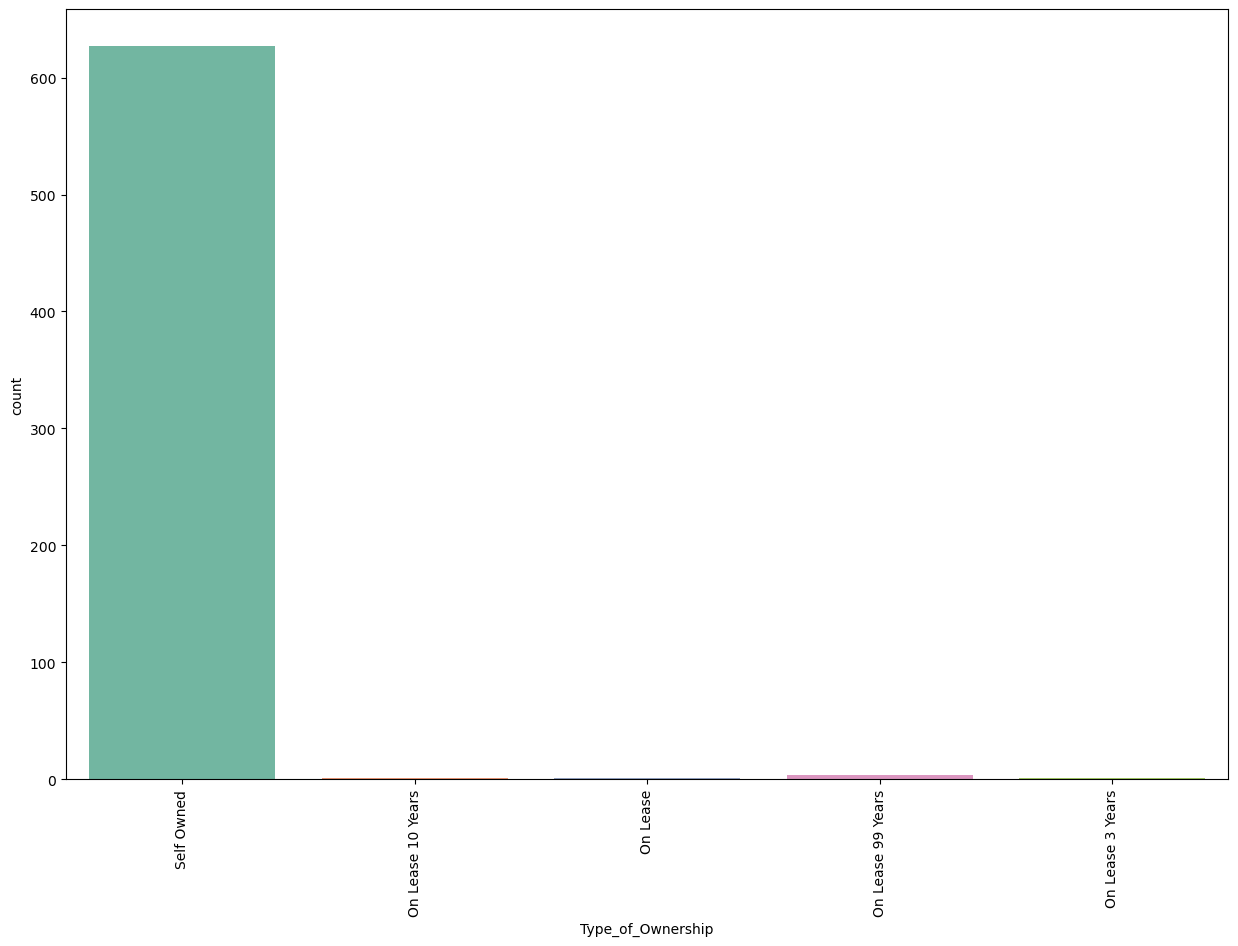

In [118]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Type_of_Ownership', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [119]:
df['Type_of_Ownership'].value_counts()

Type_of_Ownership
Self Owned           627
On Lease 99 Years      4
On Lease 10 Years      1
On Lease               1
On Lease 3 Years       1
Name: count, dtype: int64

almost records in the Type_of_Ownership column are Self Owned, so we will drop this column.

In [120]:
df.drop('Type_of_Ownership', axis=1, inplace=True)

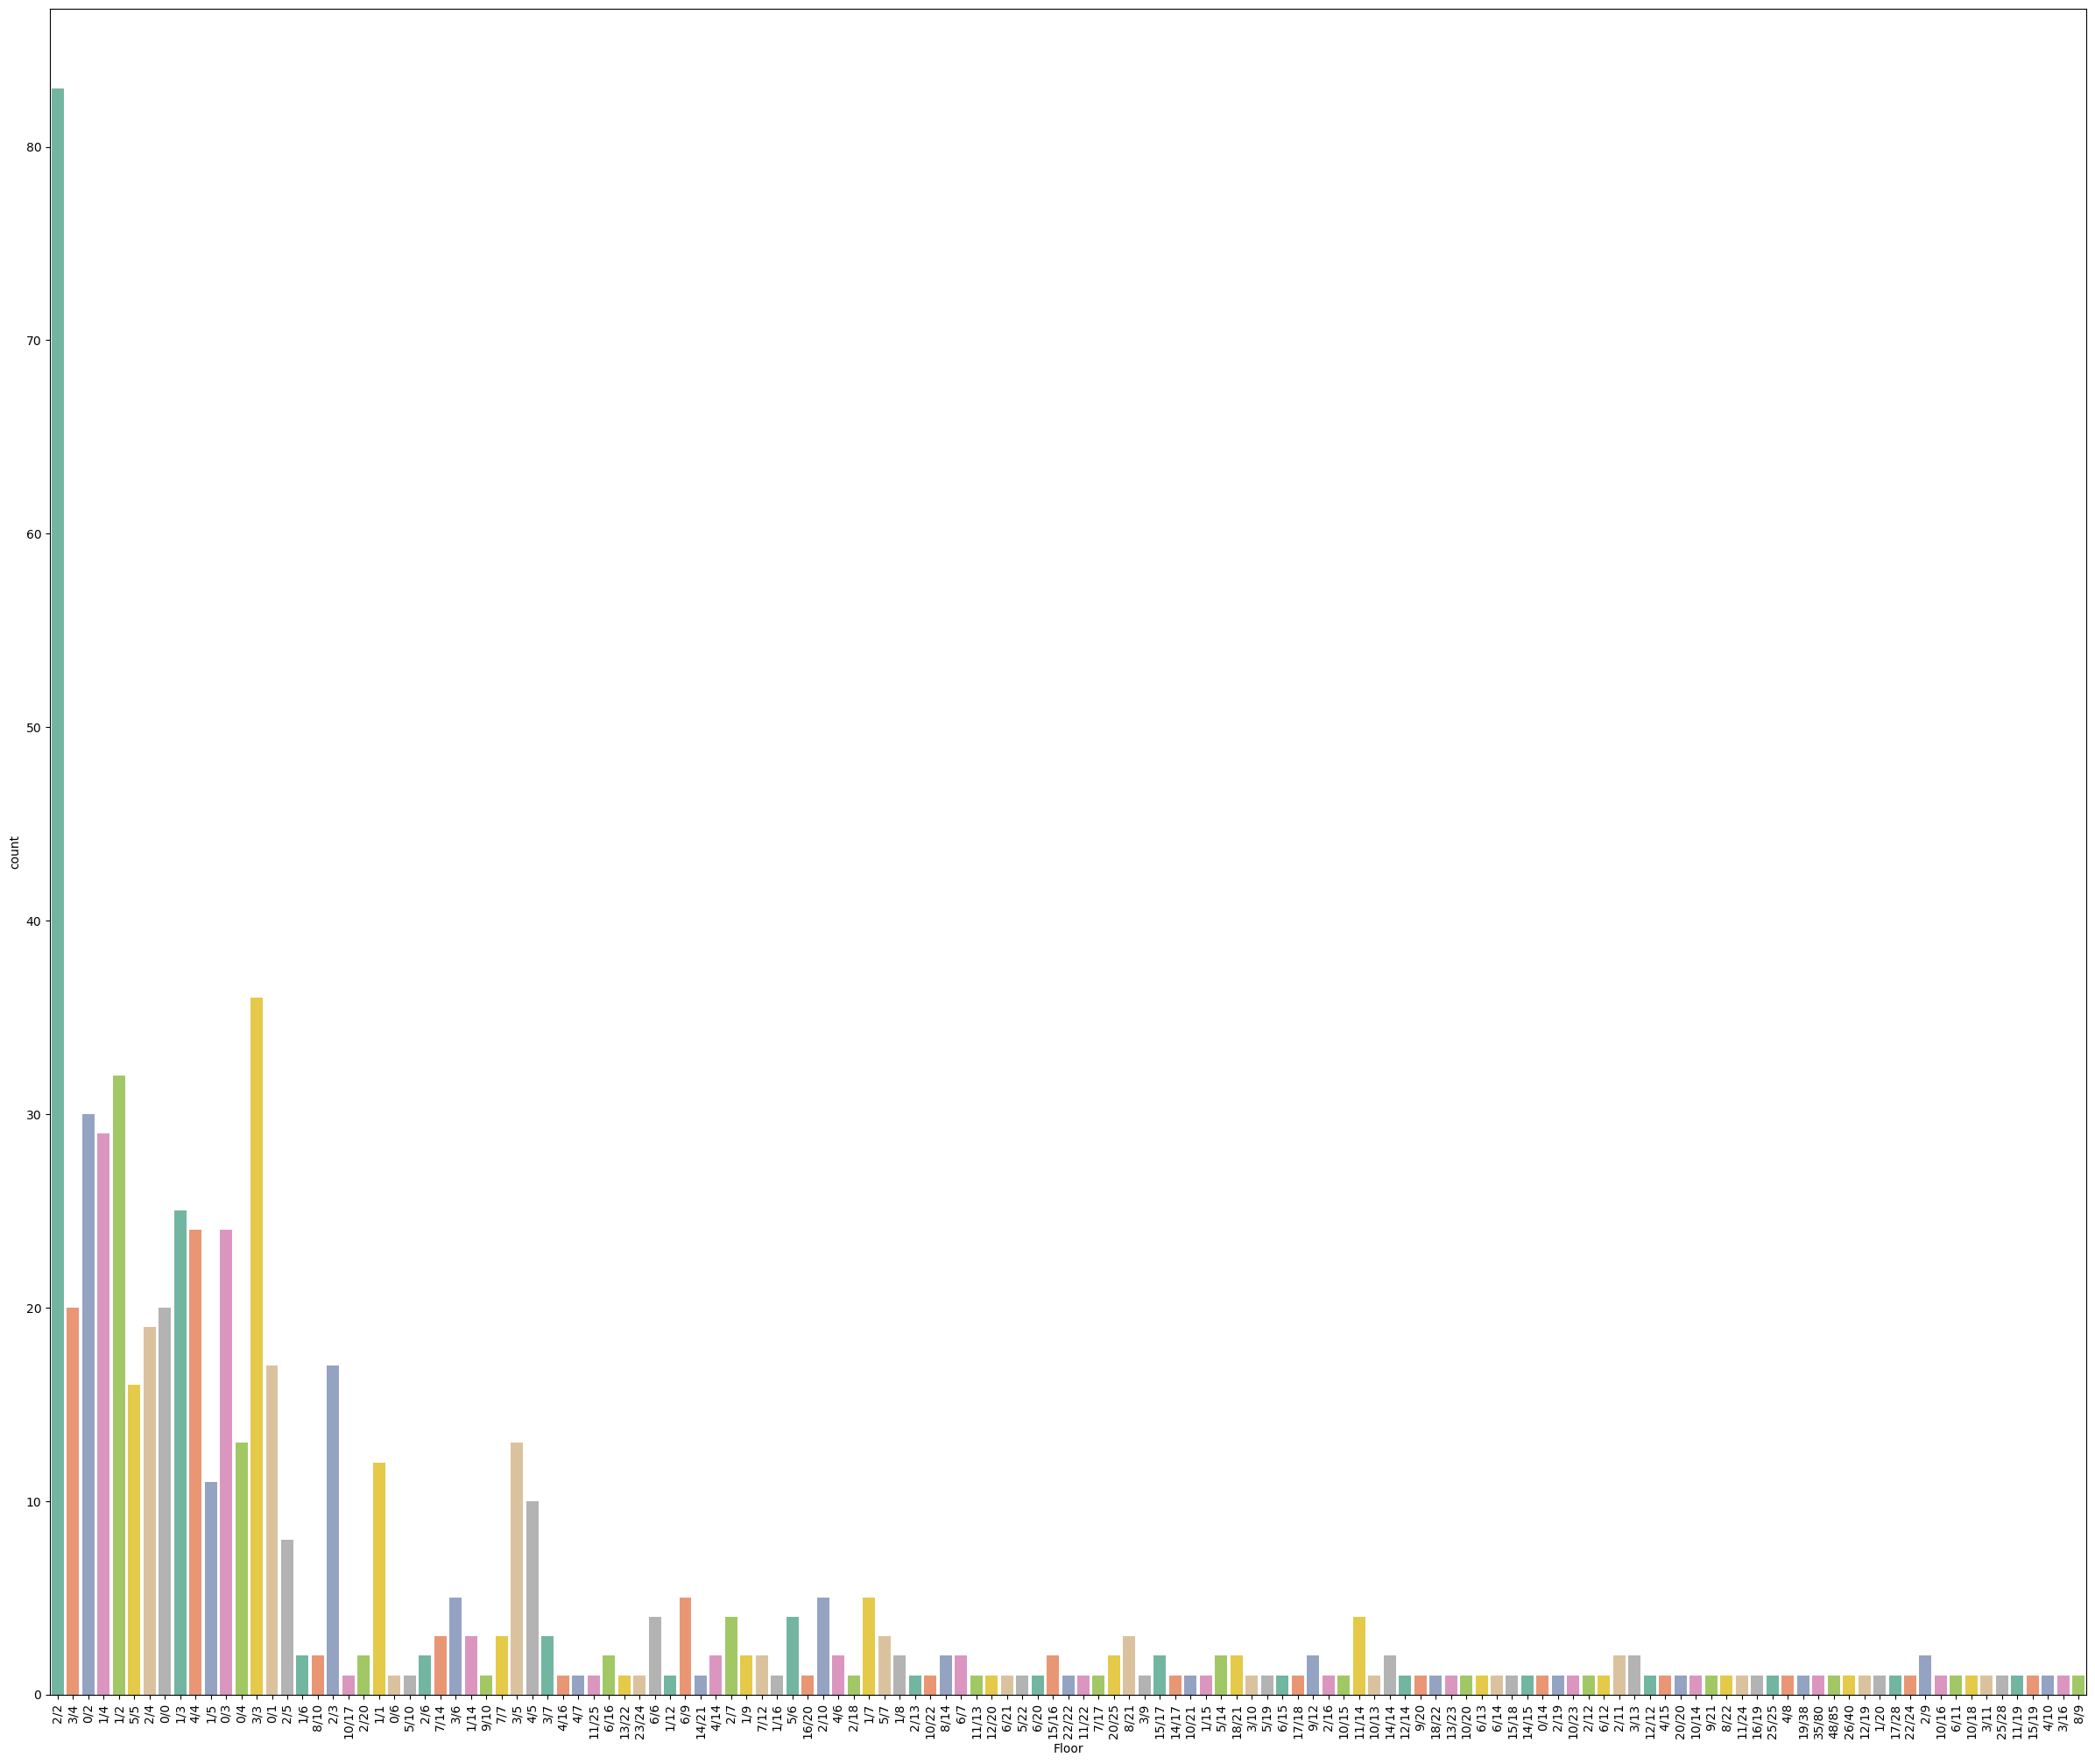

In [134]:
plt.figure(figsize=(30, 25))
sns.countplot(x='Floor', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.show()

Most of the records for floor are between 0/1 and 2/5 floors.

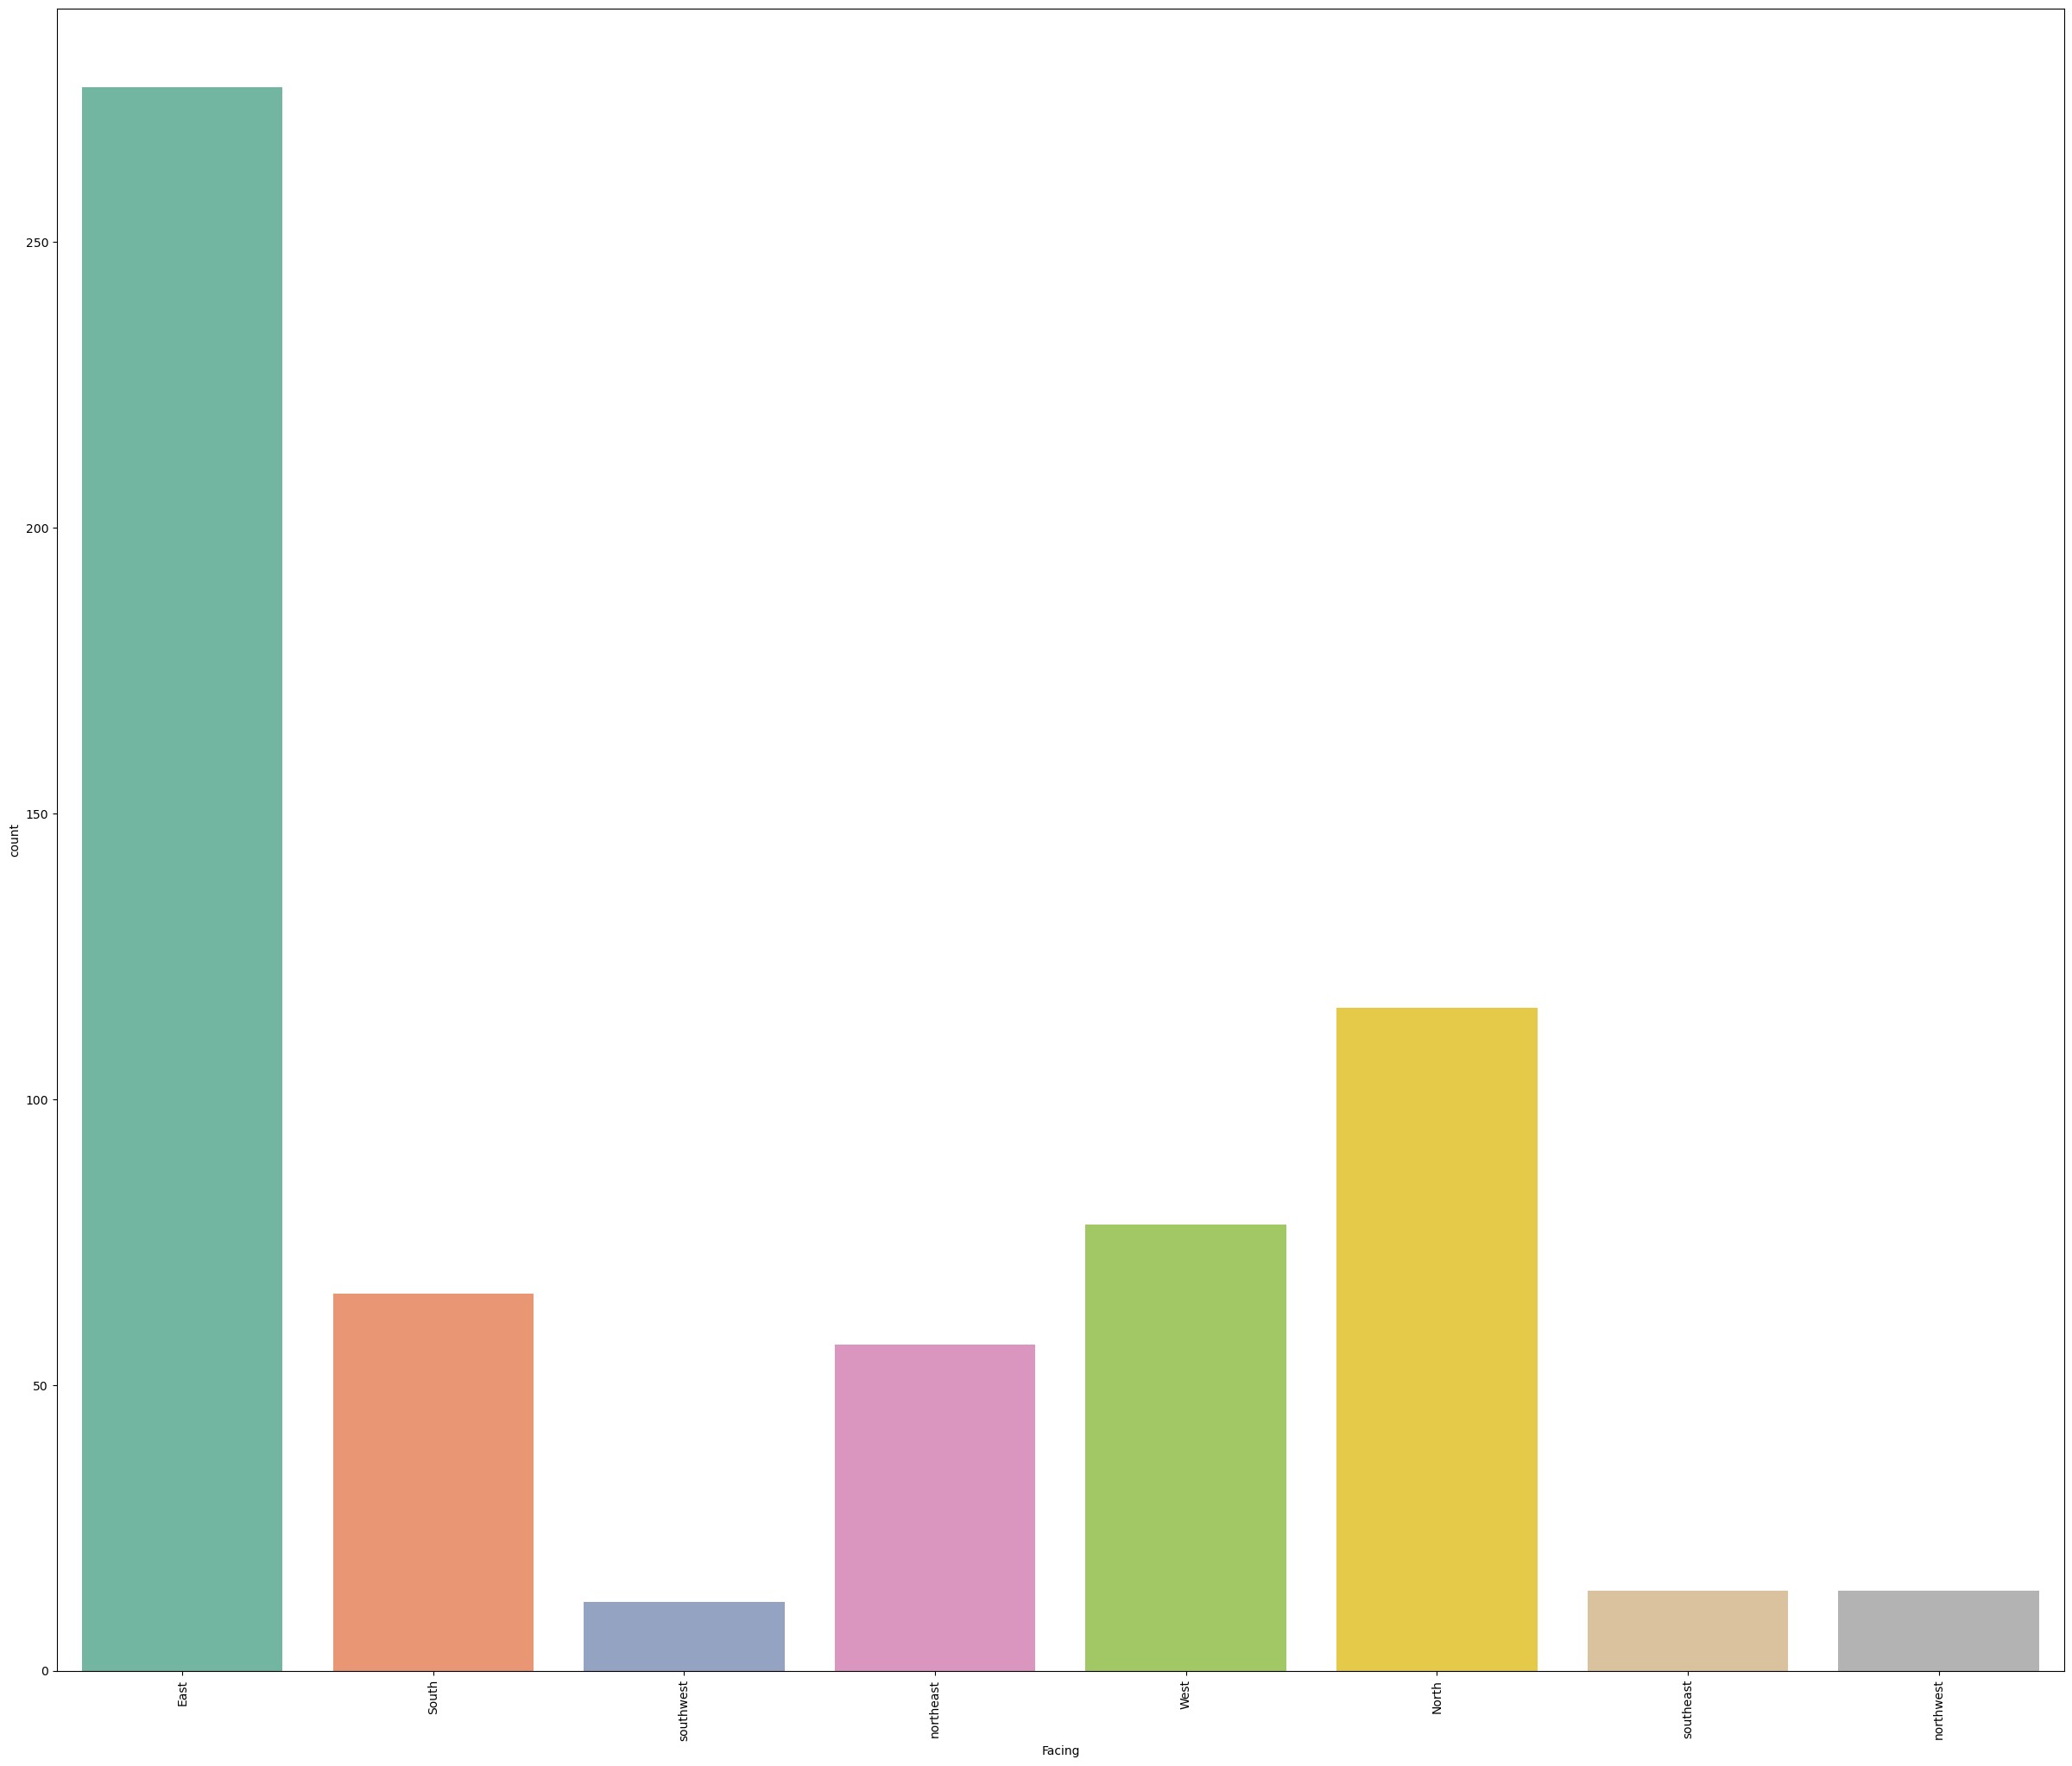

In [135]:
plt.figure(figsize=(30, 25))
sns.countplot(x='Facing', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.show()

Properties facing east have the highest number of records.

# 2.Bivariate Analysis-

In [136]:
df.columns

Index(['BHK_type', 'Property_Type', 'Bathroom', 'City', 'State_Code',
       'Country', 'Landmarks', 'Carpet_area', 'Status', 'Floor', 'Facing',
       'Car_Parking', 'Buy_Total_Price'],
      dtype='object')

<Axes: xlabel='BHK_type', ylabel='Carpet_area'>

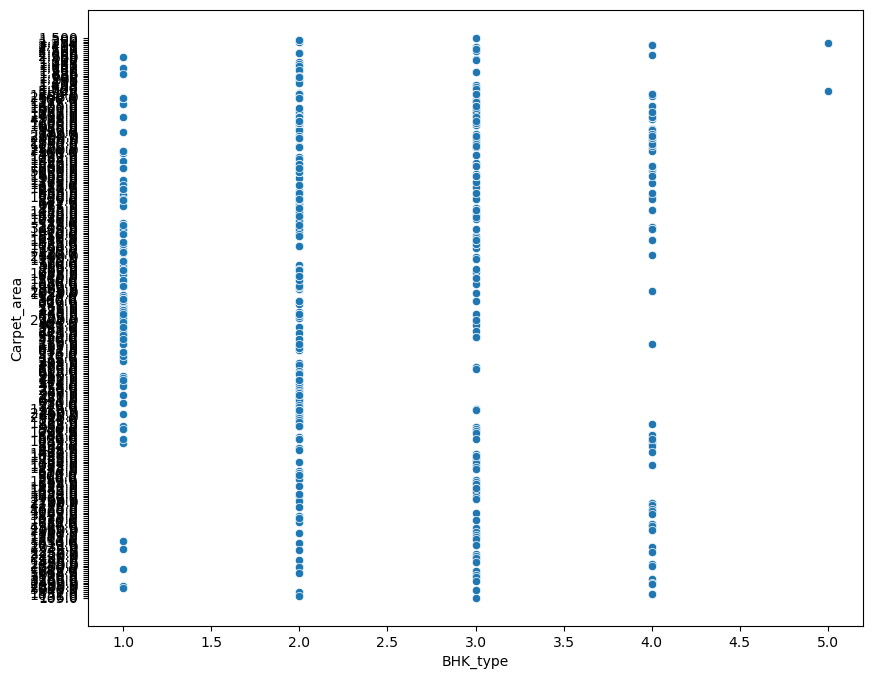

In [138]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='BHK_type', y='Carpet_area', data=df)

As the number of BHK types increases, there is also a noticeable increase in the Carpet_area.

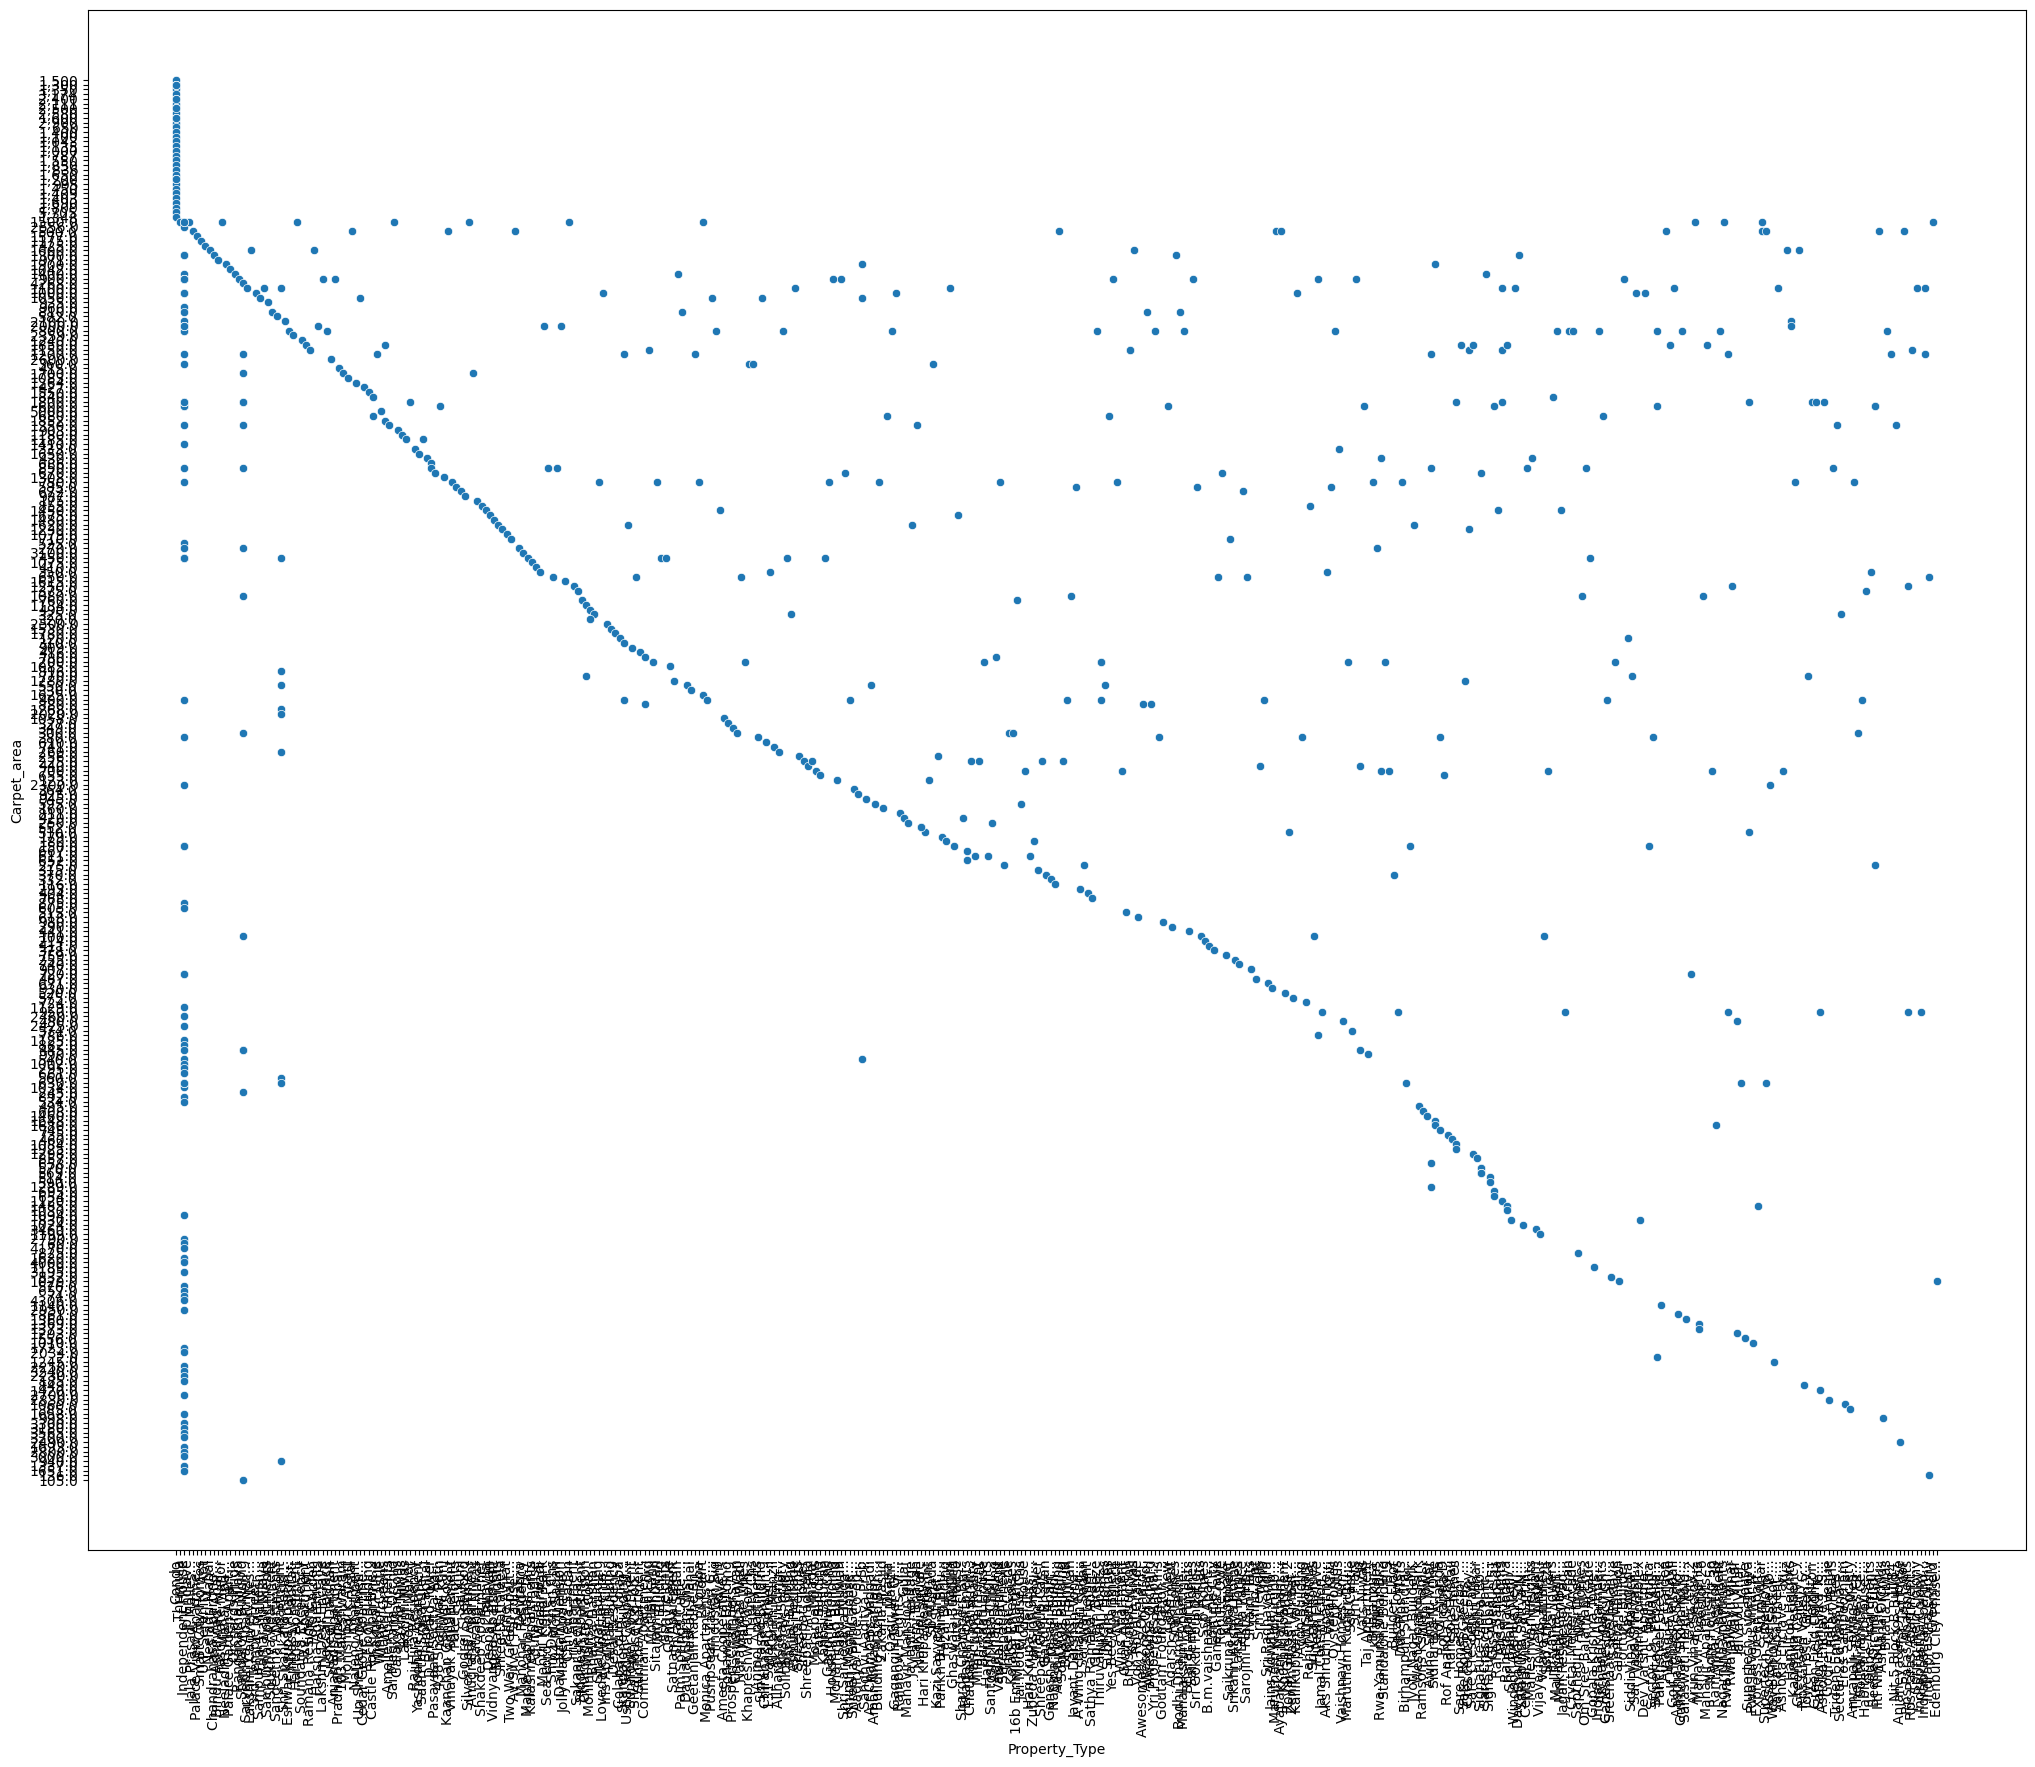

In [139]:
plt.figure(figsize=(25, 20))
sns.scatterplot(x='Property_Type', y='Carpet_area', data=df)
plt.xticks(rotation=90)
plt.show()

There negative relationship between Property_Type and Carpet_area.

<Axes: xlabel='Bathroom', ylabel='Carpet_area'>

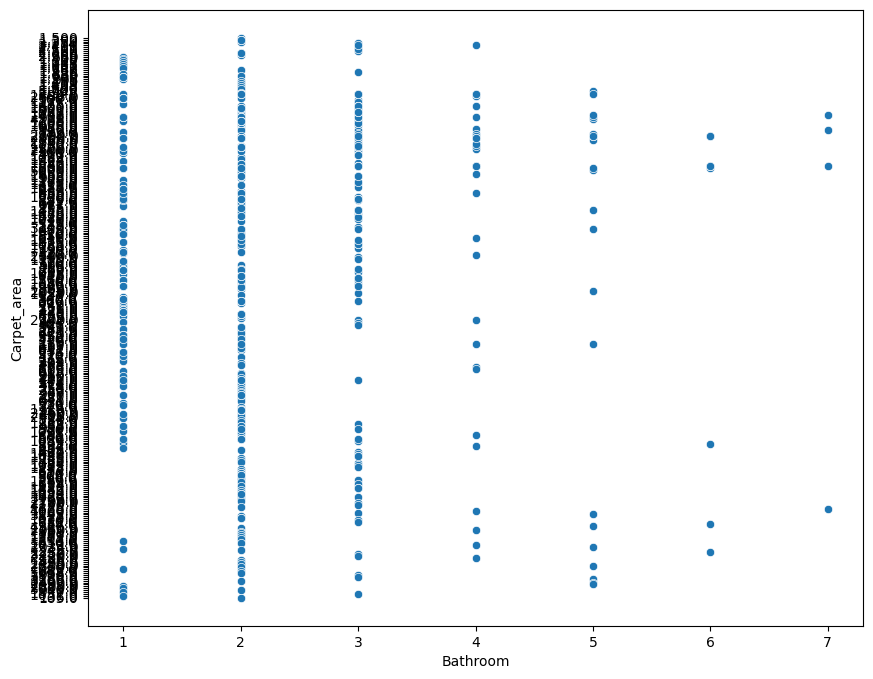

In [149]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Bathroom', y='Carpet_area', data=df)

As the number of Bathroom increases, there is also a noticeable increase in the Carpet_area.

<Axes: xlabel='City', ylabel='Carpet_area'>

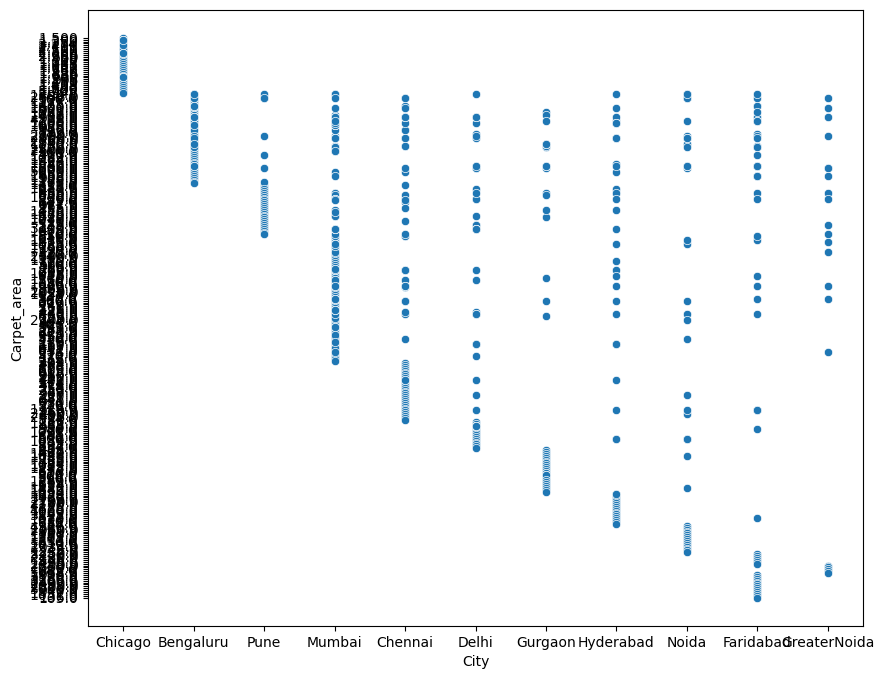

In [150]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='City', y='Carpet_area', data=df)

A negative correlation has been identified between City and Carpet_area.

<Axes: xlabel='State_Code', ylabel='Carpet_area'>

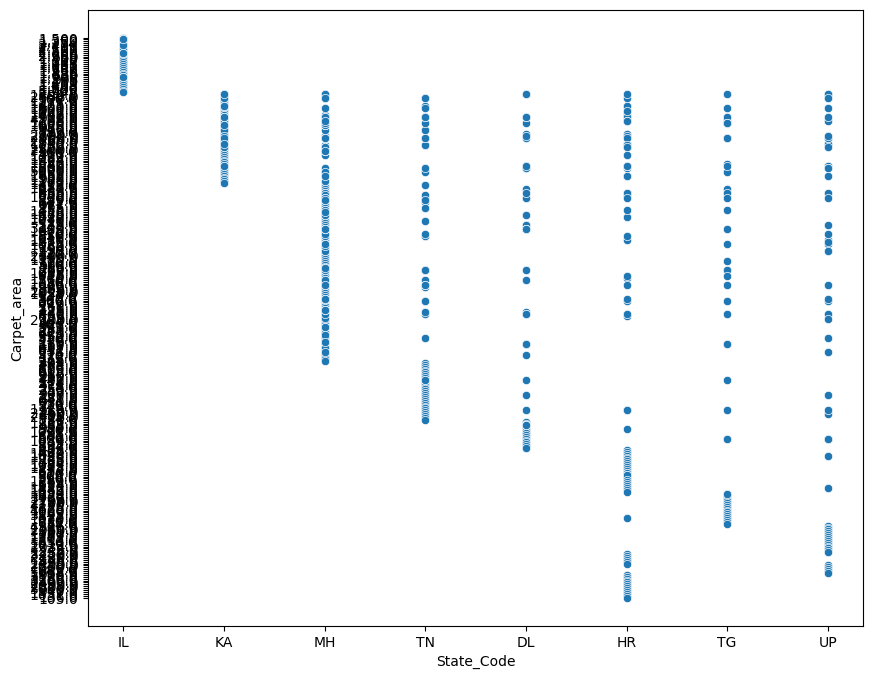

In [151]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='State_Code', y='Carpet_area', data=df)

A negative correlation has been identified between State_Code and Carpet_area.

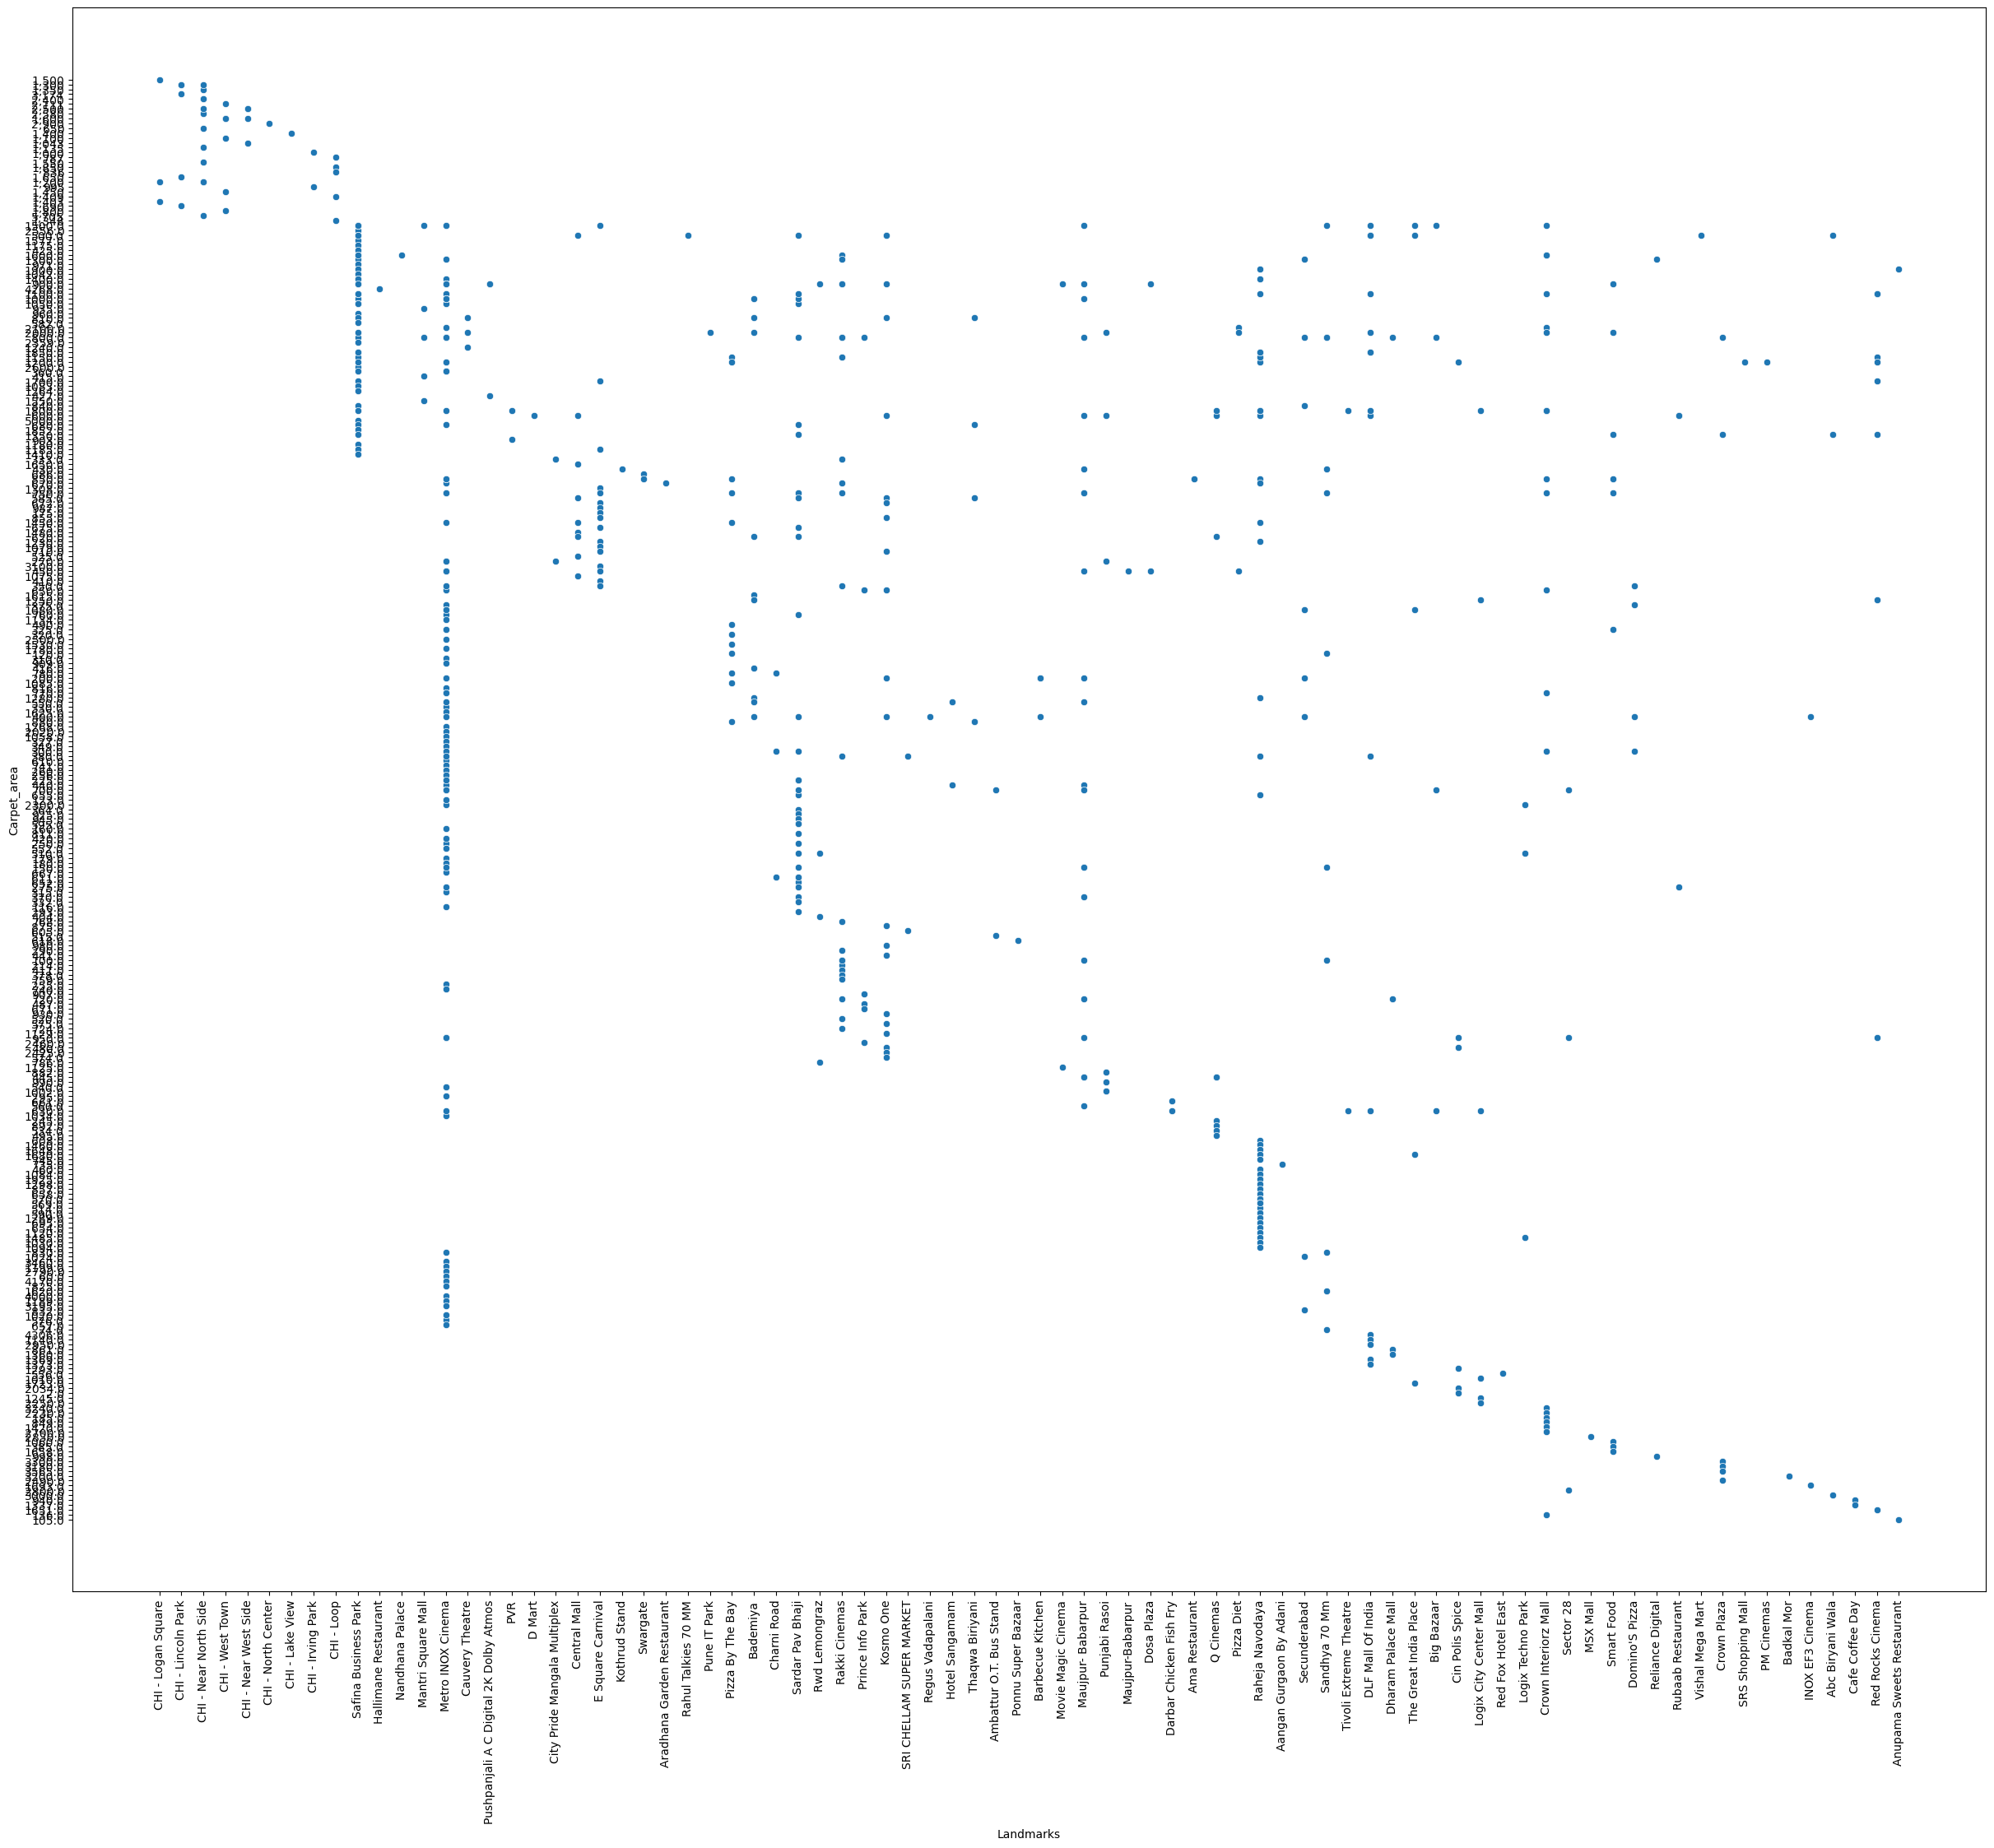

In [153]:
plt.figure(figsize=(30, 25))
sns.scatterplot(x='Landmarks', y='Carpet_area', data=df)
plt.xticks(rotation=90)
plt.show()

A negative correlation has been identified between Landmarks and Carpet_area

<Axes: xlabel='Car_Parking', ylabel='Carpet_area'>

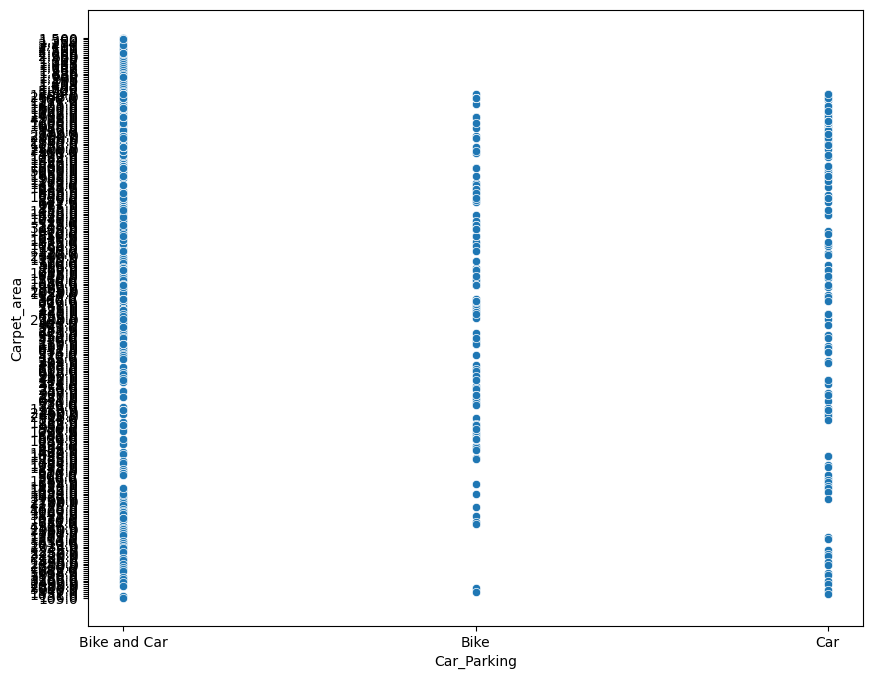

In [155]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Car_Parking', y='Carpet_area', data=df)

A positive correlation has been identified between Car_Parking and Carpet_area

# 3.Multivariate analysis-

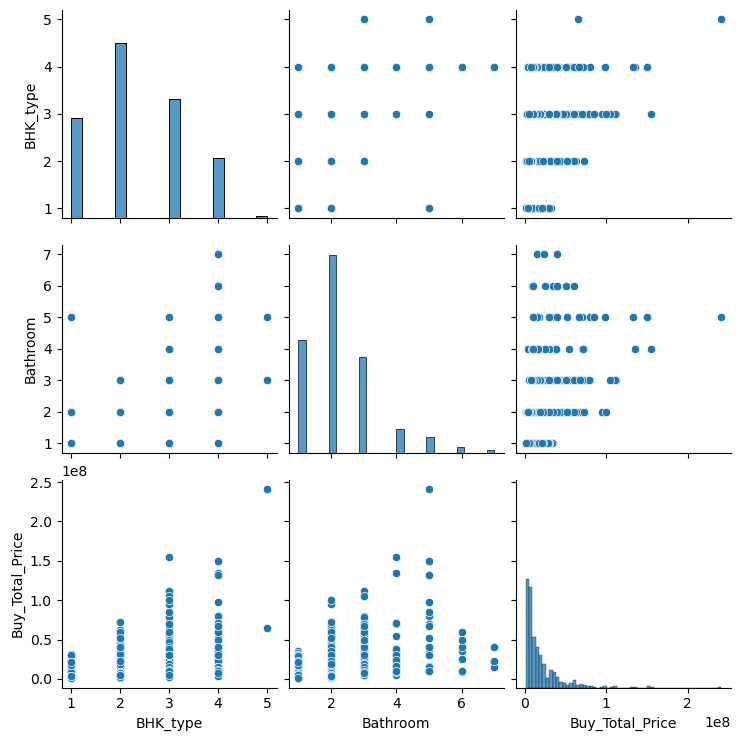

In [157]:
sns.pairplot(df)

In [158]:
num_col = []

for i in df.columns:
    if df[i].dtype == 'float64' or df[i].dtype == 'int64':
        num_col.append(i)

In [159]:
num_col

['BHK_type', 'Bathroom', 'Buy_Total_Price']

In [160]:
cat_col=[]

for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)

In [161]:
cat_col

['Property_Type',
 'City',
 'State_Code',
 'Country',
 'Landmarks',
 'Carpet_area',
 'Status',
 'Floor',
 'Facing',
 'Car_Parking']

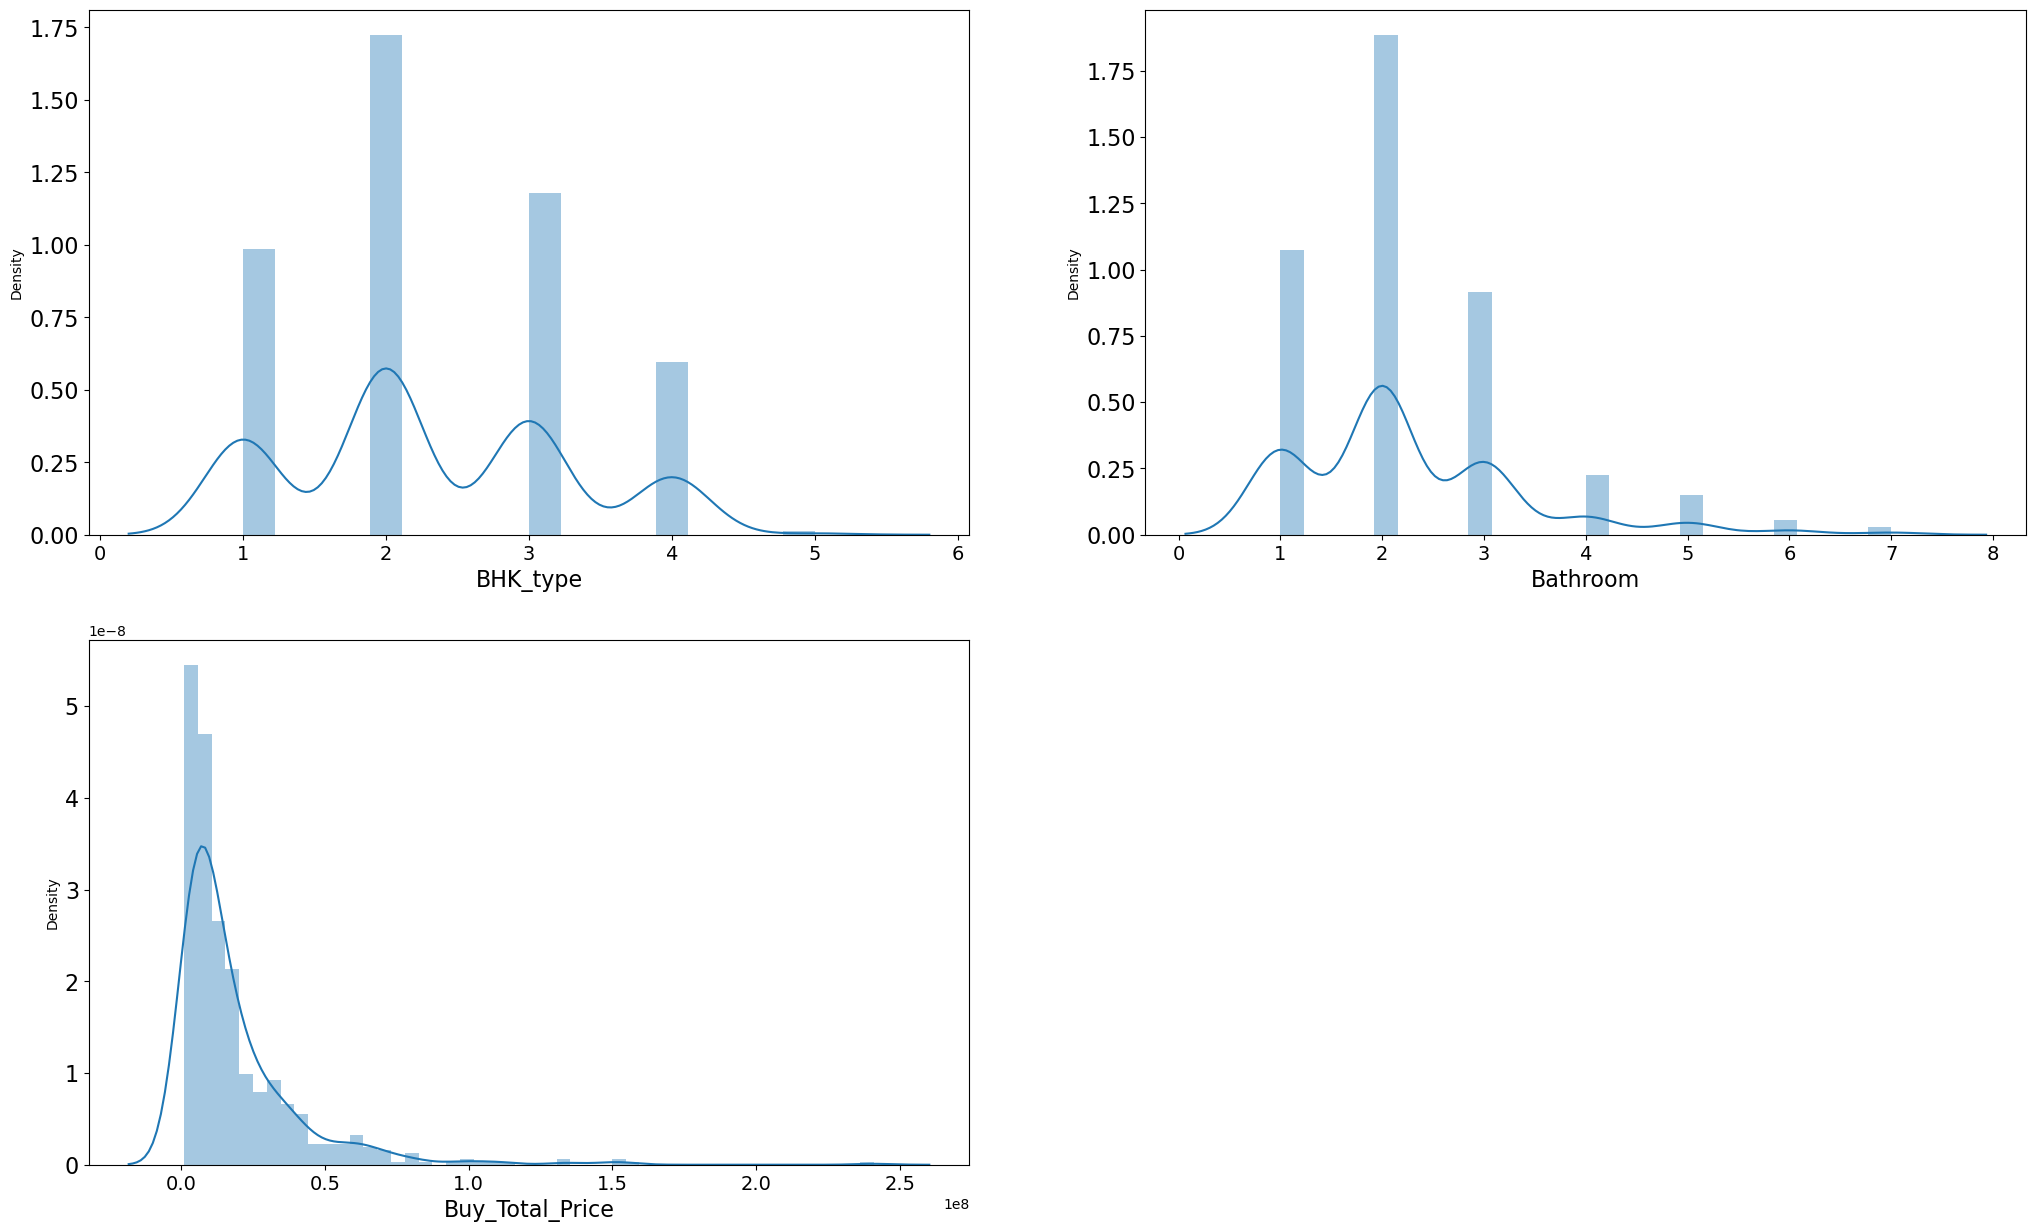

In [162]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<10:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()   

In [163]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numeric_columns].skew()
print(skewness)

BHK_type           0.289564
Bathroom           1.341435
Buy_Total_Price    3.571463
dtype: float64


We are only concerned with addressing skewness in the Buy_Total_Price column, as the other columns are categorical.

# Approach_SKEW-I:- Cube root method to remove skewness

In [164]:
columns_to_transform = ['Buy_Total_Price']
df[columns_to_transform] = df[columns_to_transform].apply(np.cbrt)

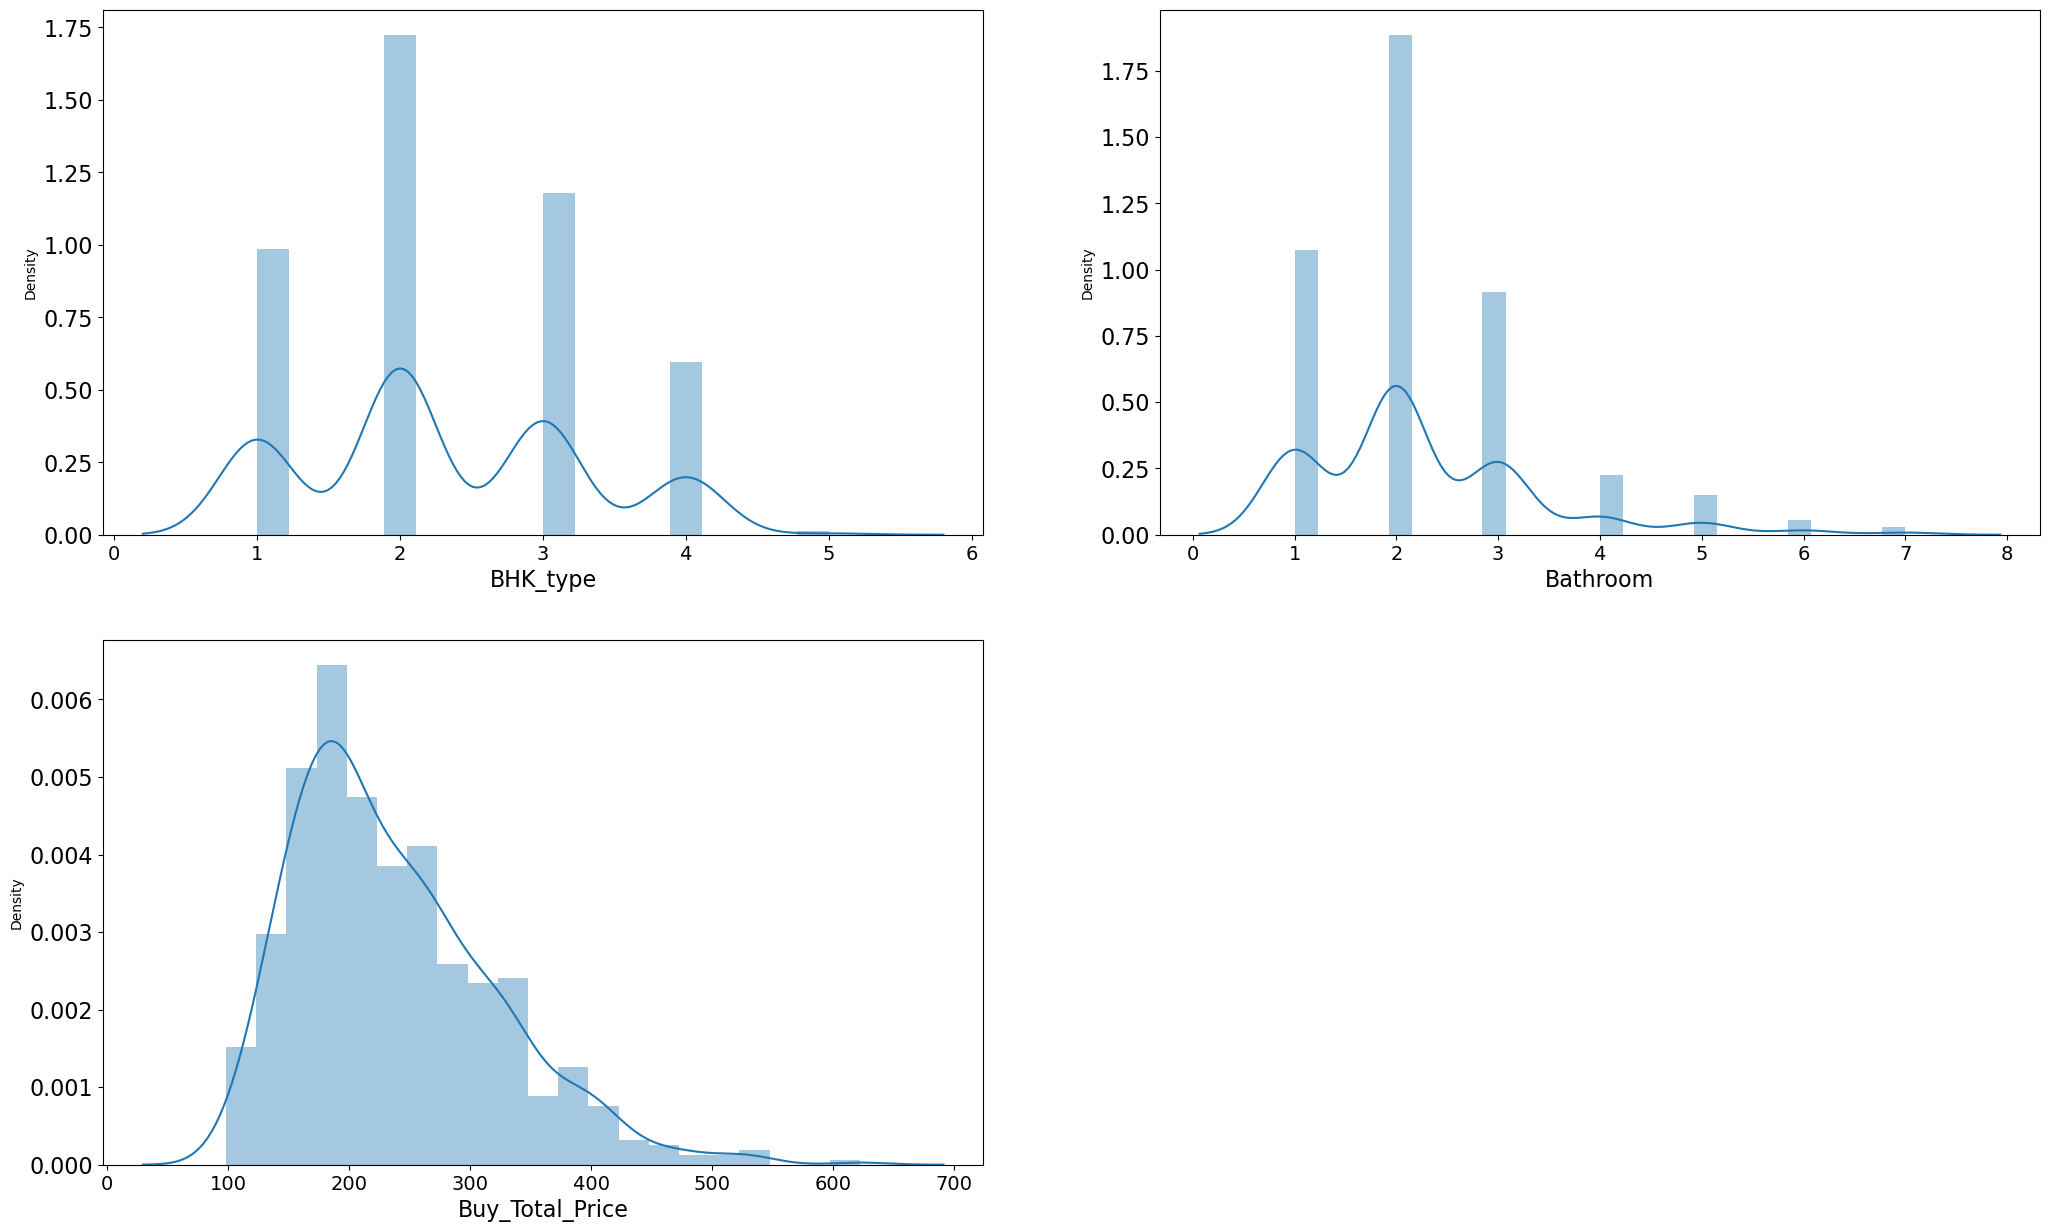

In [166]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<10:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()   

# Outliers

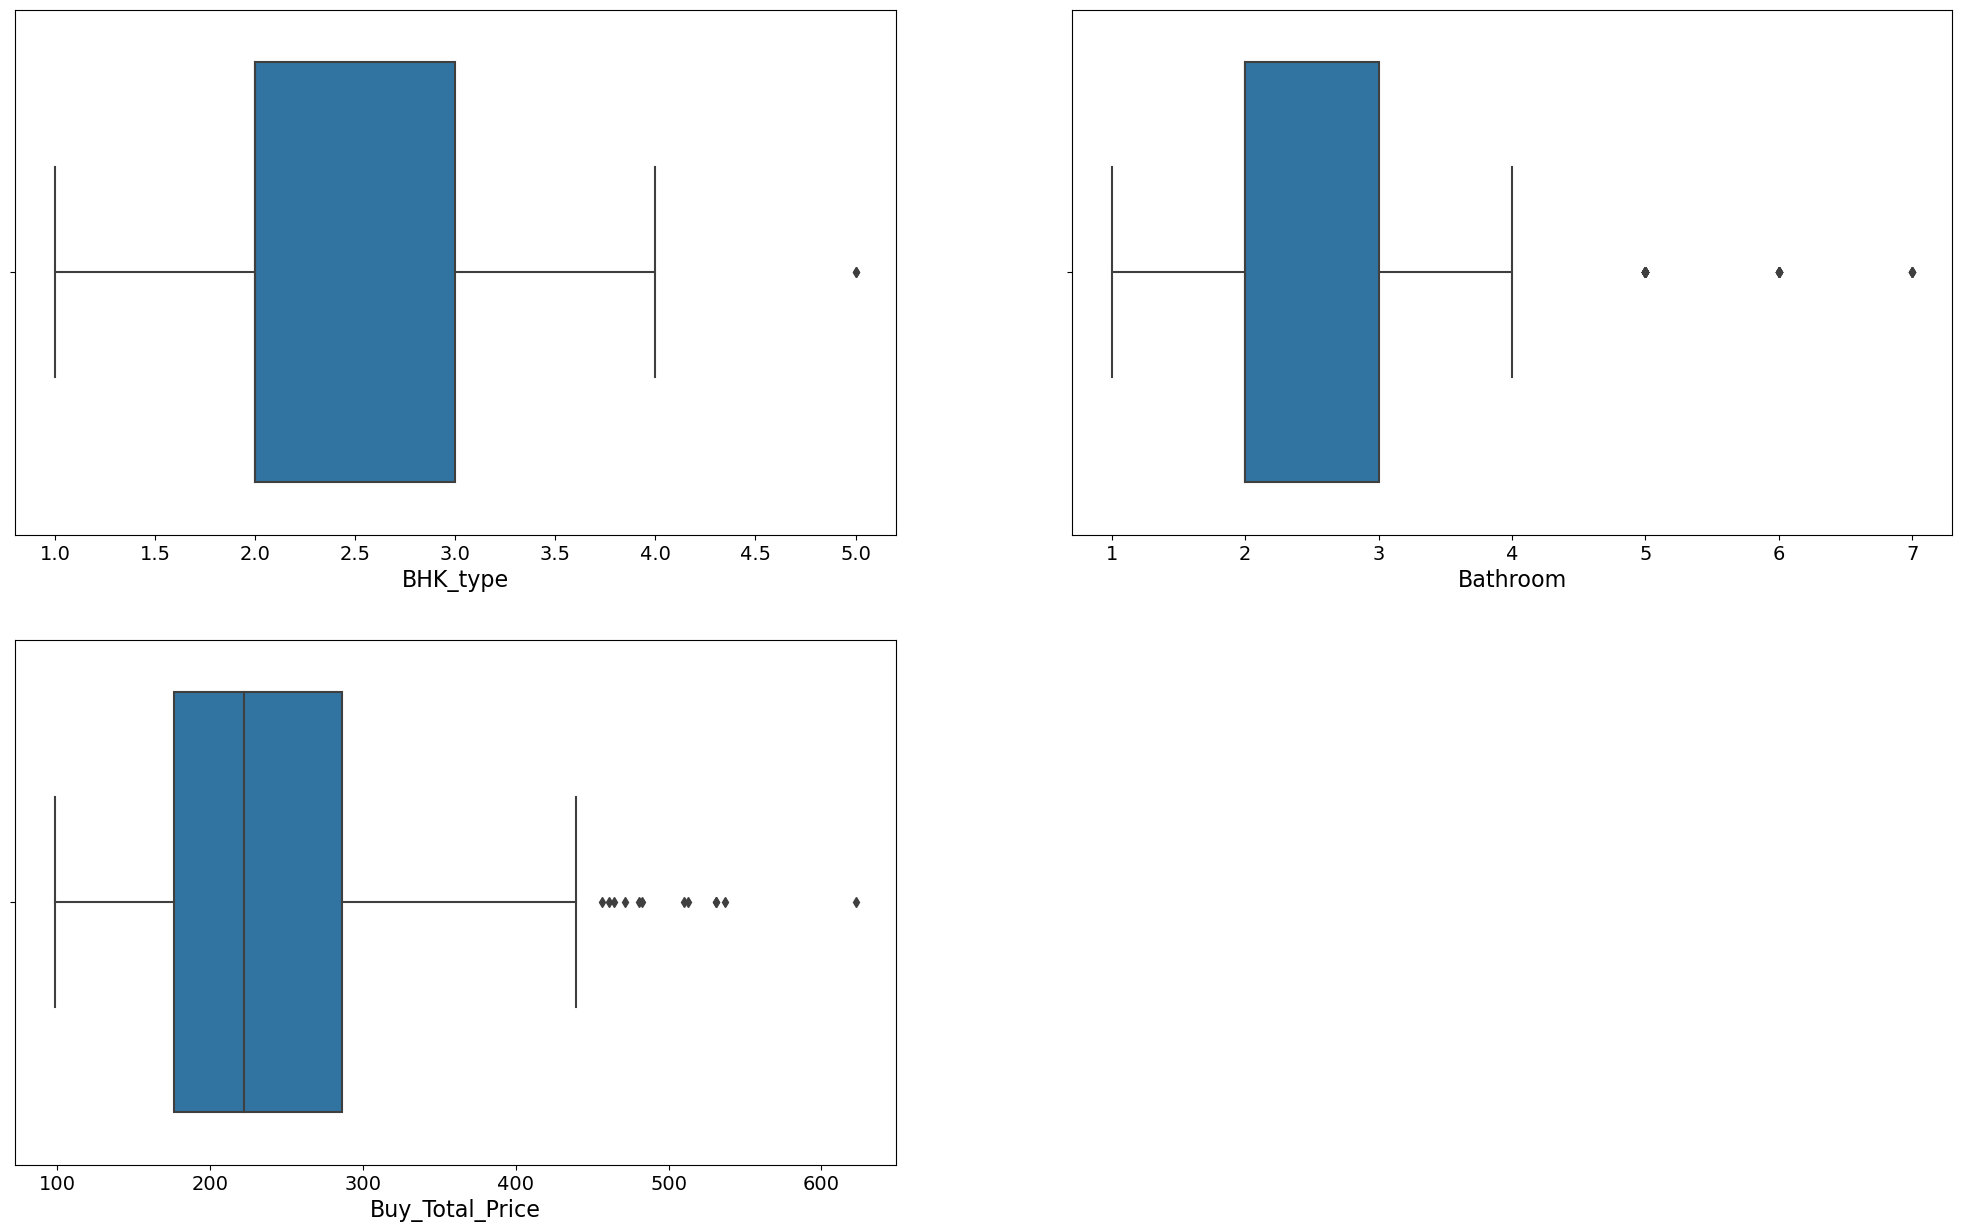

In [167]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<=10:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()   

# Removing outliers using the IQR method.

In [171]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate quartiles
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)

# Calculate interquartile range (IQR)
IQR = q3 - q1

# Calculate upper and lower bounds for outliers
# upper_bound = q3 + (1.5 * IQR)
# lower_bound = q1 - (1.5 * IQR)

In [172]:
high_Buy_Total_Price=(q3['Buy_Total_Price']+(1.5*IQR['Buy_Total_Price']))


index=np.where(df['Buy_Total_Price']> high_Buy_Total_Price)

df=df.drop(df.index[index])

In [173]:
Buy_Total_Price_low = q1['Buy_Total_Price'] - (1.5 * IQR['Buy_Total_Price'])

index = np.where(df['Buy_Total_Price'] < Buy_Total_Price_low)


df = df.drop(df.index[index])

In [174]:
Bathroom_high=(q3['Bathroom']+(1.5*IQR['Bathroom']))


index=np.where(df['Bathroom']> Bathroom_high)

df=df.drop(df.index[index])

In [175]:
df.reset_index()

index  BHK_type           Property_Type  Bathroom       City State_Code  \
0        0         3                   Condo       2.0    Chicago         IL   
1        1         2                   Condo       2.0    Chicago         IL   
2        2         2                   Condo       2.0    Chicago         IL   
3        3         5                   Condo       3.0    Chicago         IL   
4        4         4                   Condo       4.0    Chicago         IL   
..     ...       ...                     ...       ...        ...        ...   
588    852         1     Standalone Building       1.0  Faridabad         HR   
589    861         4                      Sb       3.0  Faridabad         HR   
590    862         3     Standalone Building       2.0  Faridabad         HR   
591    863         2  Edenburg City Phase...       2.0  Faridabad         HR   
592    864         1                      Sb       2.0  Faridabad         HR   

           Country                  Landmarks Carpet_area       Status Floor  \
0    United States         CHI - Logan Square       1,500       Active   2/2   
1    United States         CHI - Lincoln Park       1,300       Active   2/2   
2    United States      CHI - Near North Side       1,350       Active   2/2   
3    United States         CHI - Lincoln Park       3,174       Active   2/2   
4    United States      CHI - Near North Side       2,400       Active   2/2   
..             ...                        ...         ...          ...   ...   
588          India       Crown Interiorz Mall       300.0  Immediately   1/2   
589          India  Anupama Sweets Restaurant      1900.0  Immediately   2/2   
590          India  Anupama Sweets Restaurant       105.0  Immediately   0/3   
591          India          Metro INOX Cinema      1020.0  Immediately   2/3   
592          India          Metro INOX Cinema       540.0  Immediately   1/2   

    Facing   Car_Parking  Buy_Total_Price  
0     East  Bike and Car       350.717657  
1     East  Bike and Car       317.484179  
2     East  Bike and Car       331.934762  
3     East  Bike and Car       401.728322  
4     East  Bike and Car       378.041633  
..     ...           ...              ...  
588  South  Bike and Car       101.639636  
589   East           Car       198.319248  
590   East  Bike and Car       166.310350  
591   East  Bike and Car       170.997595  
592  North          Bike       158.740105  

[593 rows x 14 columns]

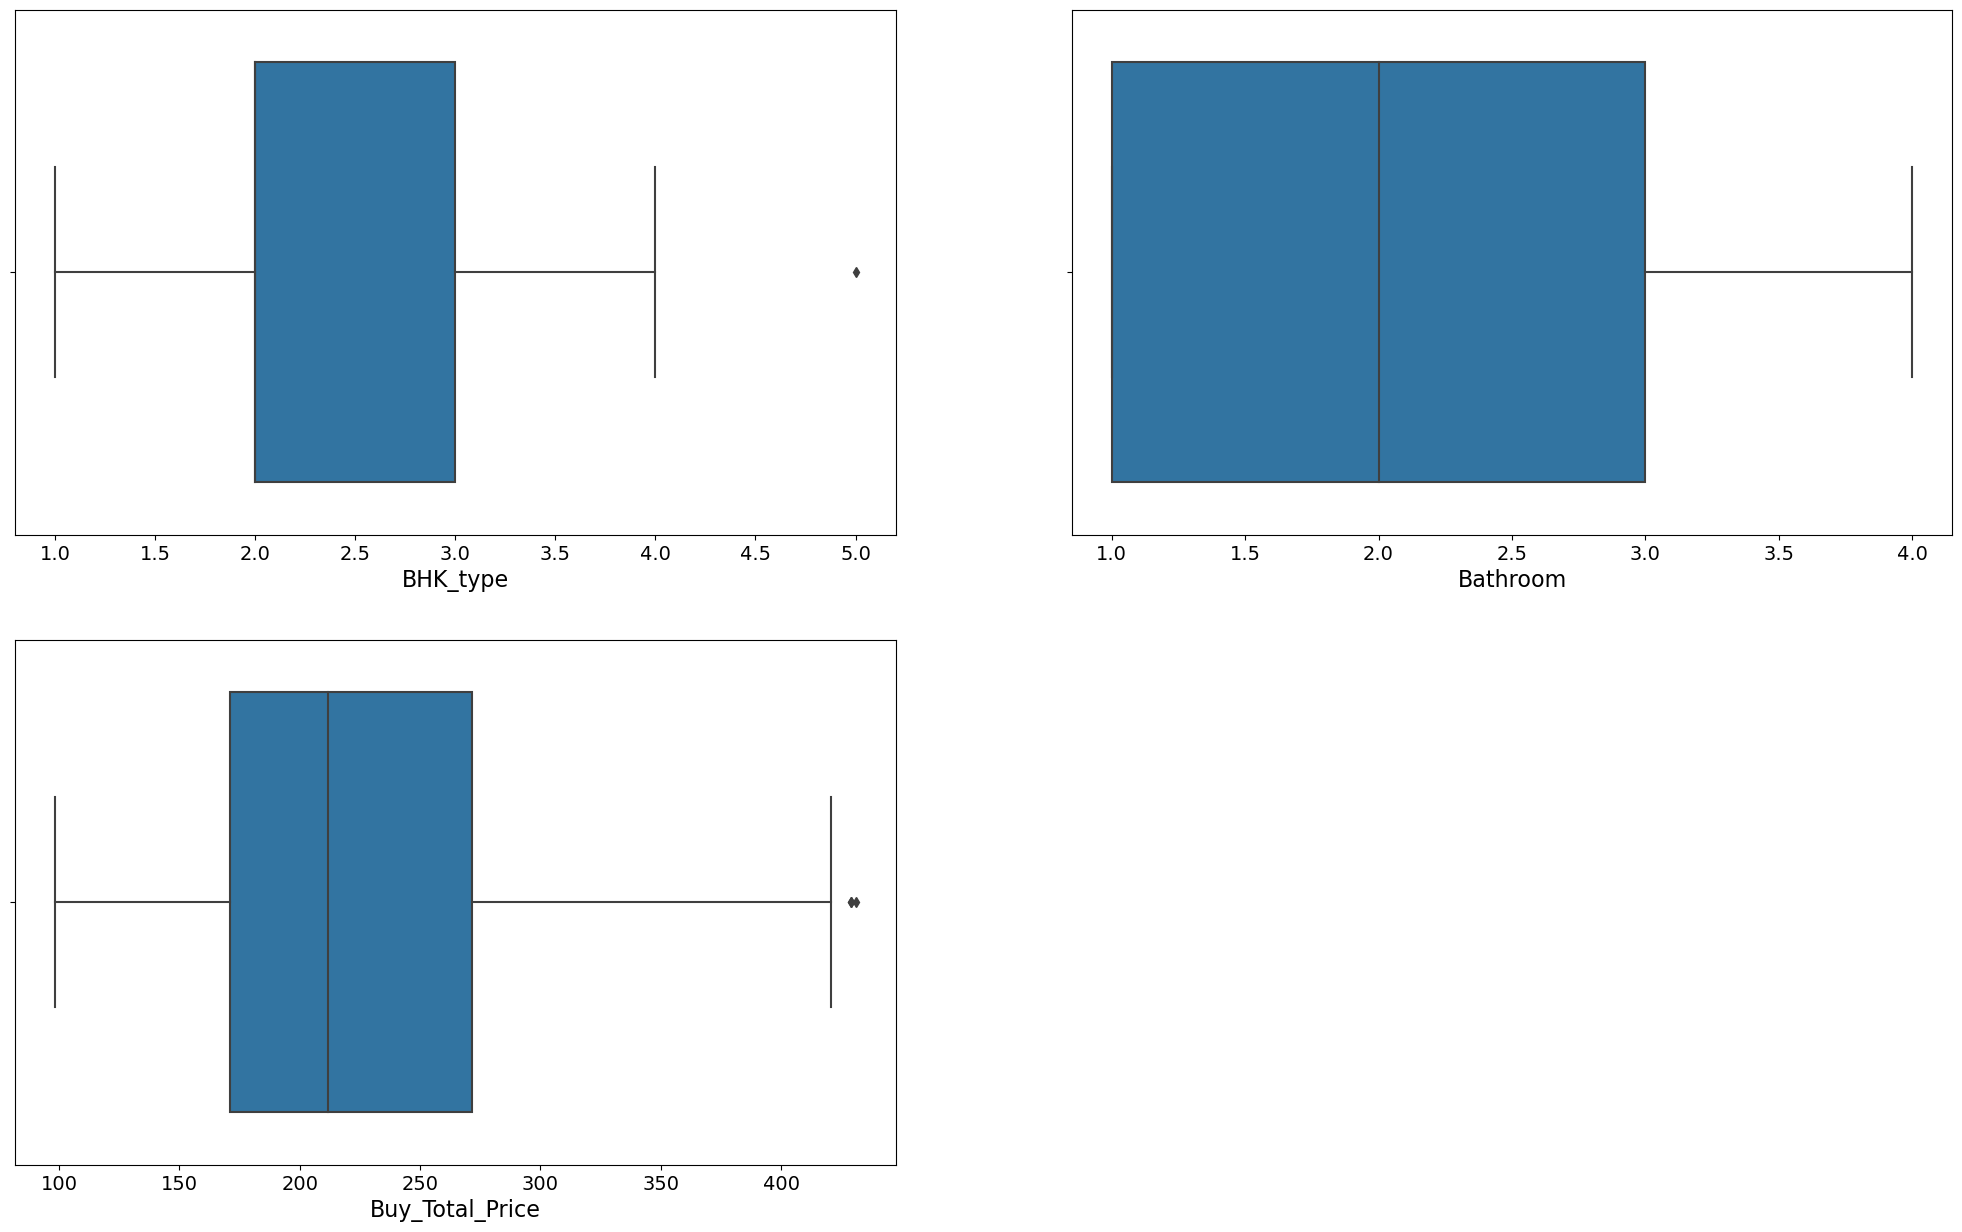

In [176]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<=10:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()   

We have successfully removed outliers using the Interquartile Range (IQR) method with minimal loss of data.

In [177]:
df

BHK_type           Property_Type  Bathroom       City State_Code  \
0           3                   Condo       2.0    Chicago         IL   
1           2                   Condo       2.0    Chicago         IL   
2           2                   Condo       2.0    Chicago         IL   
3           5                   Condo       3.0    Chicago         IL   
4           4                   Condo       4.0    Chicago         IL   
..        ...                     ...       ...        ...        ...   
852         1     Standalone Building       1.0  Faridabad         HR   
861         4                      Sb       3.0  Faridabad         HR   
862         3     Standalone Building       2.0  Faridabad         HR   
863         2  Edenburg City Phase...       2.0  Faridabad         HR   
864         1                      Sb       2.0  Faridabad         HR   

           Country                  Landmarks Carpet_area       Status Floor  \
0    United States         CHI - Logan Square       1,500       Active   2/2   
1    United States         CHI - Lincoln Park       1,300       Active   2/2   
2    United States      CHI - Near North Side       1,350       Active   2/2   
3    United States         CHI - Lincoln Park       3,174       Active   2/2   
4    United States      CHI - Near North Side       2,400       Active   2/2   
..             ...                        ...         ...          ...   ...   
852          India       Crown Interiorz Mall       300.0  Immediately   1/2   
861          India  Anupama Sweets Restaurant      1900.0  Immediately   2/2   
862          India  Anupama Sweets Restaurant       105.0  Immediately   0/3   
863          India          Metro INOX Cinema      1020.0  Immediately   2/3   
864          India          Metro INOX Cinema       540.0  Immediately   1/2   

    Facing   Car_Parking  Buy_Total_Price  
0     East  Bike and Car       350.717657  
1     East  Bike and Car       317.484179  
2     East  Bike and Car       331.934762  
3     East  Bike and Car       401.728322  
4     East  Bike and Car       378.041633  
..     ...           ...              ...  
852  South  Bike and Car       101.639636  
861   East           Car       198.319248  
862   East  Bike and Car       166.310350  
863   East  Bike and Car       170.997595  
864  North          Bike       158.740105  

[593 rows x 13 columns]

In [178]:
df.reset_index(drop=True, inplace=True)

In [179]:
df

BHK_type           Property_Type  Bathroom       City State_Code  \
0           3                   Condo       2.0    Chicago         IL   
1           2                   Condo       2.0    Chicago         IL   
2           2                   Condo       2.0    Chicago         IL   
3           5                   Condo       3.0    Chicago         IL   
4           4                   Condo       4.0    Chicago         IL   
..        ...                     ...       ...        ...        ...   
588         1     Standalone Building       1.0  Faridabad         HR   
589         4                      Sb       3.0  Faridabad         HR   
590         3     Standalone Building       2.0  Faridabad         HR   
591         2  Edenburg City Phase...       2.0  Faridabad         HR   
592         1                      Sb       2.0  Faridabad         HR   

           Country                  Landmarks Carpet_area       Status Floor  \
0    United States         CHI - Logan Square       1,500       Active   2/2   
1    United States         CHI - Lincoln Park       1,300       Active   2/2   
2    United States      CHI - Near North Side       1,350       Active   2/2   
3    United States         CHI - Lincoln Park       3,174       Active   2/2   
4    United States      CHI - Near North Side       2,400       Active   2/2   
..             ...                        ...         ...          ...   ...   
588          India       Crown Interiorz Mall       300.0  Immediately   1/2   
589          India  Anupama Sweets Restaurant      1900.0  Immediately   2/2   
590          India  Anupama Sweets Restaurant       105.0  Immediately   0/3   
591          India          Metro INOX Cinema      1020.0  Immediately   2/3   
592          India          Metro INOX Cinema       540.0  Immediately   1/2   

    Facing   Car_Parking  Buy_Total_Price  
0     East  Bike and Car       350.717657  
1     East  Bike and Car       317.484179  
2     East  Bike and Car       331.934762  
3     East  Bike and Car       401.728322  
4     East  Bike and Car       378.041633  
..     ...           ...              ...  
588  South  Bike and Car       101.639636  
589   East           Car       198.319248  
590   East  Bike and Car       166.310350  
591   East  Bike and Car       170.997595  
592  North          Bike       158.740105  

[593 rows x 13 columns]

In [182]:
df.isnull().sum()

BHK_type           0
Property_Type      0
Bathroom           0
City               0
State_Code         0
Country            0
Landmarks          0
Carpet_area        0
Status             0
Floor              0
Facing             0
Car_Parking        0
Buy_Total_Price    0
dtype: int64

# Encoding of object data

In [183]:
cat_col

['Property_Type',
 'City',
 'State_Code',
 'Country',
 'Landmarks',
 'Carpet_area',
 'Status',
 'Floor',
 'Facing',
 'Car_Parking']

In [ ]:
df['Carpet_area'] = pd.to_numeric(df['Carpet_area'], errors='coerce')

In [186]:
df['Property_Type'].value_counts()

Property_Type
Independent House         75
Condo                     37
Standalone Building       14
Apartment                  9
Signature Global Ro...     5
                          ..
Sheetal Heights            1
Asmita Heritage            1
Parijat Building           1
Solitaire Chs, Girg...     1
Edenburg City Phase...     1
Name: count, Length: 408, dtype: int64

Since each record is almost unique, we will drop it.

In [217]:
df = df.drop(columns=['Property_Type'])

In [187]:
df['City'].value_counts()

City
Mumbai          135
Chennai          76
Bengaluru        59
Faridabad        52
Delhi            49
Hyderabad        47
Gurgaon          43
Noida            41
Chicago          37
Pune             34
GreaterNoida     20
Name: count, dtype: int64

In [188]:
df['State_Code'].value_counts()

State_Code
MH    169
HR     95
TN     76
UP     61
KA     59
DL     49
TG     47
IL     37
Name: count, dtype: int64

In [189]:
df['Country'].value_counts()

Country
India            556
United States     37
Name: count, dtype: int64

In [190]:
df['Landmarks'].value_counts()

Landmarks
Metro INOX Cinema             123
Safina Business Park           47
Raheja Navodaya                42
Sardar Pav Bhaji               37
Rakki Cinemas                  25
                             ... 
Aangan Gurgaon By Adani         1
Aradhana Garden Restaurant      1
Rahul Talkies 70 MM             1
Pune IT Park                    1
Red Fox Hotel East              1
Name: count, Length: 77, dtype: int64

In [211]:
df = df.drop(columns=['Landmarks'])

In [219]:
df['Carpet_area'].value_counts()

Carpet_area
800.0     19
900.0     15
750.0     13
1500.0    12
500.0     12
          ..
315.0      1
332.0      1
116.0      1
293.0      1
105.0      1
Name: count, Length: 251, dtype: int64

In [192]:
df['Status'].value_counts()

Status
Immediately    556
Active          37
Name: count, dtype: int64

In [193]:
df['Floor'].value_counts()

Floor
2/2      74
3/3      34
1/2      32
1/4      29
1/3      25
         ..
11/22     1
22/22     1
1/8       1
6/20      1
8/9       1
Name: count, Length: 130, dtype: int64

In [194]:
df['Facing'].value_counts()

Facing
East         260
North        113
West          72
South         58
northeast     53
southeast     13
northwest     13
southwest     11
Name: count, dtype: int64

In [207]:
df['Floor'].value_counts()

Floor
62     74
82     34
12     32
15     29
14     25
       ..
33      1
72      1
19      1
112     1
125     1
Name: count, Length: 130, dtype: int64

In [ ]:
State_Code,Country

# Encode the object using a label encoder.

In [198]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Car_Parking']=le.fit_transform(df['Car_Parking'])

In [199]:
df['Facing']=le.fit_transform(df['Facing'])

In [200]:
df['Status']=le.fit_transform(df['Status'])

In [201]:
df['City']=le.fit_transform(df['City'])

In [202]:
df['State_Code']=le.fit_transform(df['State_Code'])

In [203]:
df['Country']=le.fit_transform(df['Country'])

In [205]:
df['Floor']=le.fit_transform(df['Floor'])

In [206]:
df

BHK_type           Property_Type  Bathroom  City  State_Code  Country  \
0           3                   Condo       2.0     2           2        1   
1           2                   Condo       2.0     2           2        1   
2           2                   Condo       2.0     2           2        1   
3           5                   Condo       3.0     2           2        1   
4           4                   Condo       4.0     2           2        1   
..        ...                     ...       ...   ...         ...      ...   
588         1     Standalone Building       1.0     4           1        0   
589         4                      Sb       3.0     4           1        0   
590         3     Standalone Building       2.0     4           1        0   
591         2  Edenburg City Phase...       2.0     4           1        0   
592         1                      Sb       2.0     4           1        0   

                     Landmarks Carpet_area  Status  Floor  Facing  \
0           CHI - Logan Square       1,500       0     62       0   
1           CHI - Lincoln Park       1,300       0     62       0   
2        CHI - Near North Side       1,350       0     62       0   
3           CHI - Lincoln Park       3,174       0     62       0   
4        CHI - Near North Side       2,400       0     62       0   
..                         ...         ...     ...    ...     ...   
588       Crown Interiorz Mall       300.0       1     12       2   
589  Anupama Sweets Restaurant      1900.0       1     62       0   
590  Anupama Sweets Restaurant       105.0       1      4       0   
591          Metro INOX Cinema      1020.0       1     64       0   
592          Metro INOX Cinema       540.0       1     12       1   

     Car_Parking  Buy_Total_Price  
0              1       350.717657  
1              1       317.484179  
2              1       331.934762  
3              1       401.728322  
4              1       378.041633  
..           ...              ...  
588            1       101.639636  
589            2       198.319248  
590            1       166.310350  
591            1       170.997595  
592            0       158.740105  

[593 rows x 13 columns]

In [218]:
df.dtypes

BHK_type             int64
Bathroom           float64
City                 int32
State_Code           int32
Country              int32
Carpet_area        float64
Status               int32
Floor                int32
Facing               int32
Car_Parking          int32
Buy_Total_Price    float64
dtype: object

In [209]:
df['Carpet_area'] = pd.to_numeric(df['Carpet_area'], errors='coerce')

In [220]:
df.dtypes

BHK_type             int64
Bathroom           float64
City                 int32
State_Code           int32
Country              int32
Carpet_area        float64
Status               int32
Floor                int32
Facing               int32
Car_Parking          int32
Buy_Total_Price    float64
dtype: object

In [221]:
df

BHK_type  Bathroom  City  State_Code  Country  Carpet_area  Status  \
0           3       2.0     2           2        1          NaN       0   
1           2       2.0     2           2        1          NaN       0   
2           2       2.0     2           2        1          NaN       0   
3           5       3.0     2           2        1          NaN       0   
4           4       4.0     2           2        1          NaN       0   
..        ...       ...   ...         ...      ...          ...     ...   
588         1       1.0     4           1        0        300.0       1   
589         4       3.0     4           1        0       1900.0       1   
590         3       2.0     4           1        0        105.0       1   
591         2       2.0     4           1        0       1020.0       1   
592         1       2.0     4           1        0        540.0       1   

     Floor  Facing  Car_Parking  Buy_Total_Price  
0       62       0            1       350.717657  
1       62       0            1       317.484179  
2       62       0            1       331.934762  
3       62       0            1       401.728322  
4       62       0            1       378.041633  
..     ...     ...          ...              ...  
588     12       2            1       101.639636  
589     62       0            2       198.319248  
590      4       0            1       166.310350  
591     64       0            1       170.997595  
592     12       1            0       158.740105  

[593 rows x 11 columns]

In [222]:
df = df.dropna(subset=['Carpet_area'])

In [223]:
df

BHK_type  Bathroom  City  State_Code  Country  Carpet_area  Status  \
11          1       1.0     2           2        1        650.0       0   
19          1       1.0     2           2        1        787.0       0   
23          1       1.0     2           2        1        836.0       0   
27          2       1.0     2           2        1        995.0       0   
37          4       3.0     0           3        0       1500.0       1   
..        ...       ...   ...         ...      ...          ...     ...   
588         1       1.0     4           1        0        300.0       1   
589         4       3.0     4           1        0       1900.0       1   
590         3       2.0     4           1        0        105.0       1   
591         2       2.0     4           1        0       1020.0       1   
592         1       2.0     4           1        0        540.0       1   

     Floor  Facing  Car_Parking  Buy_Total_Price  
11      62       0            1       241.712794  
19      62       0            1       265.437748  
23      62       0            1       259.402969  
27      62       0            1       265.398418  
37      83       2            0       251.984210  
..     ...     ...          ...              ...  
588     12       2            1       101.639636  
589     62       0            2       198.319248  
590      4       0            1       166.310350  
591     64       0            1       170.997595  
592     12       1            0       158.740105  

[560 rows x 11 columns]

In [224]:
df.isnull().sum()

BHK_type           0
Bathroom           0
City               0
State_Code         0
Country            0
Carpet_area        0
Status             0
Floor              0
Facing             0
Car_Parking        0
Buy_Total_Price    0
dtype: int64

In [225]:
df.columns

Index(['BHK_type', 'Bathroom', 'City', 'State_Code', 'Country', 'Carpet_area',
       'Status', 'Floor', 'Facing', 'Car_Parking', 'Buy_Total_Price'],
      dtype='object')

In [226]:
df.dtypes

BHK_type             int64
Bathroom           float64
City                 int32
State_Code           int32
Country              int32
Carpet_area        float64
Status               int32
Floor                int32
Facing               int32
Car_Parking          int32
Buy_Total_Price    float64
dtype: object

The object data has been encoded successfully.

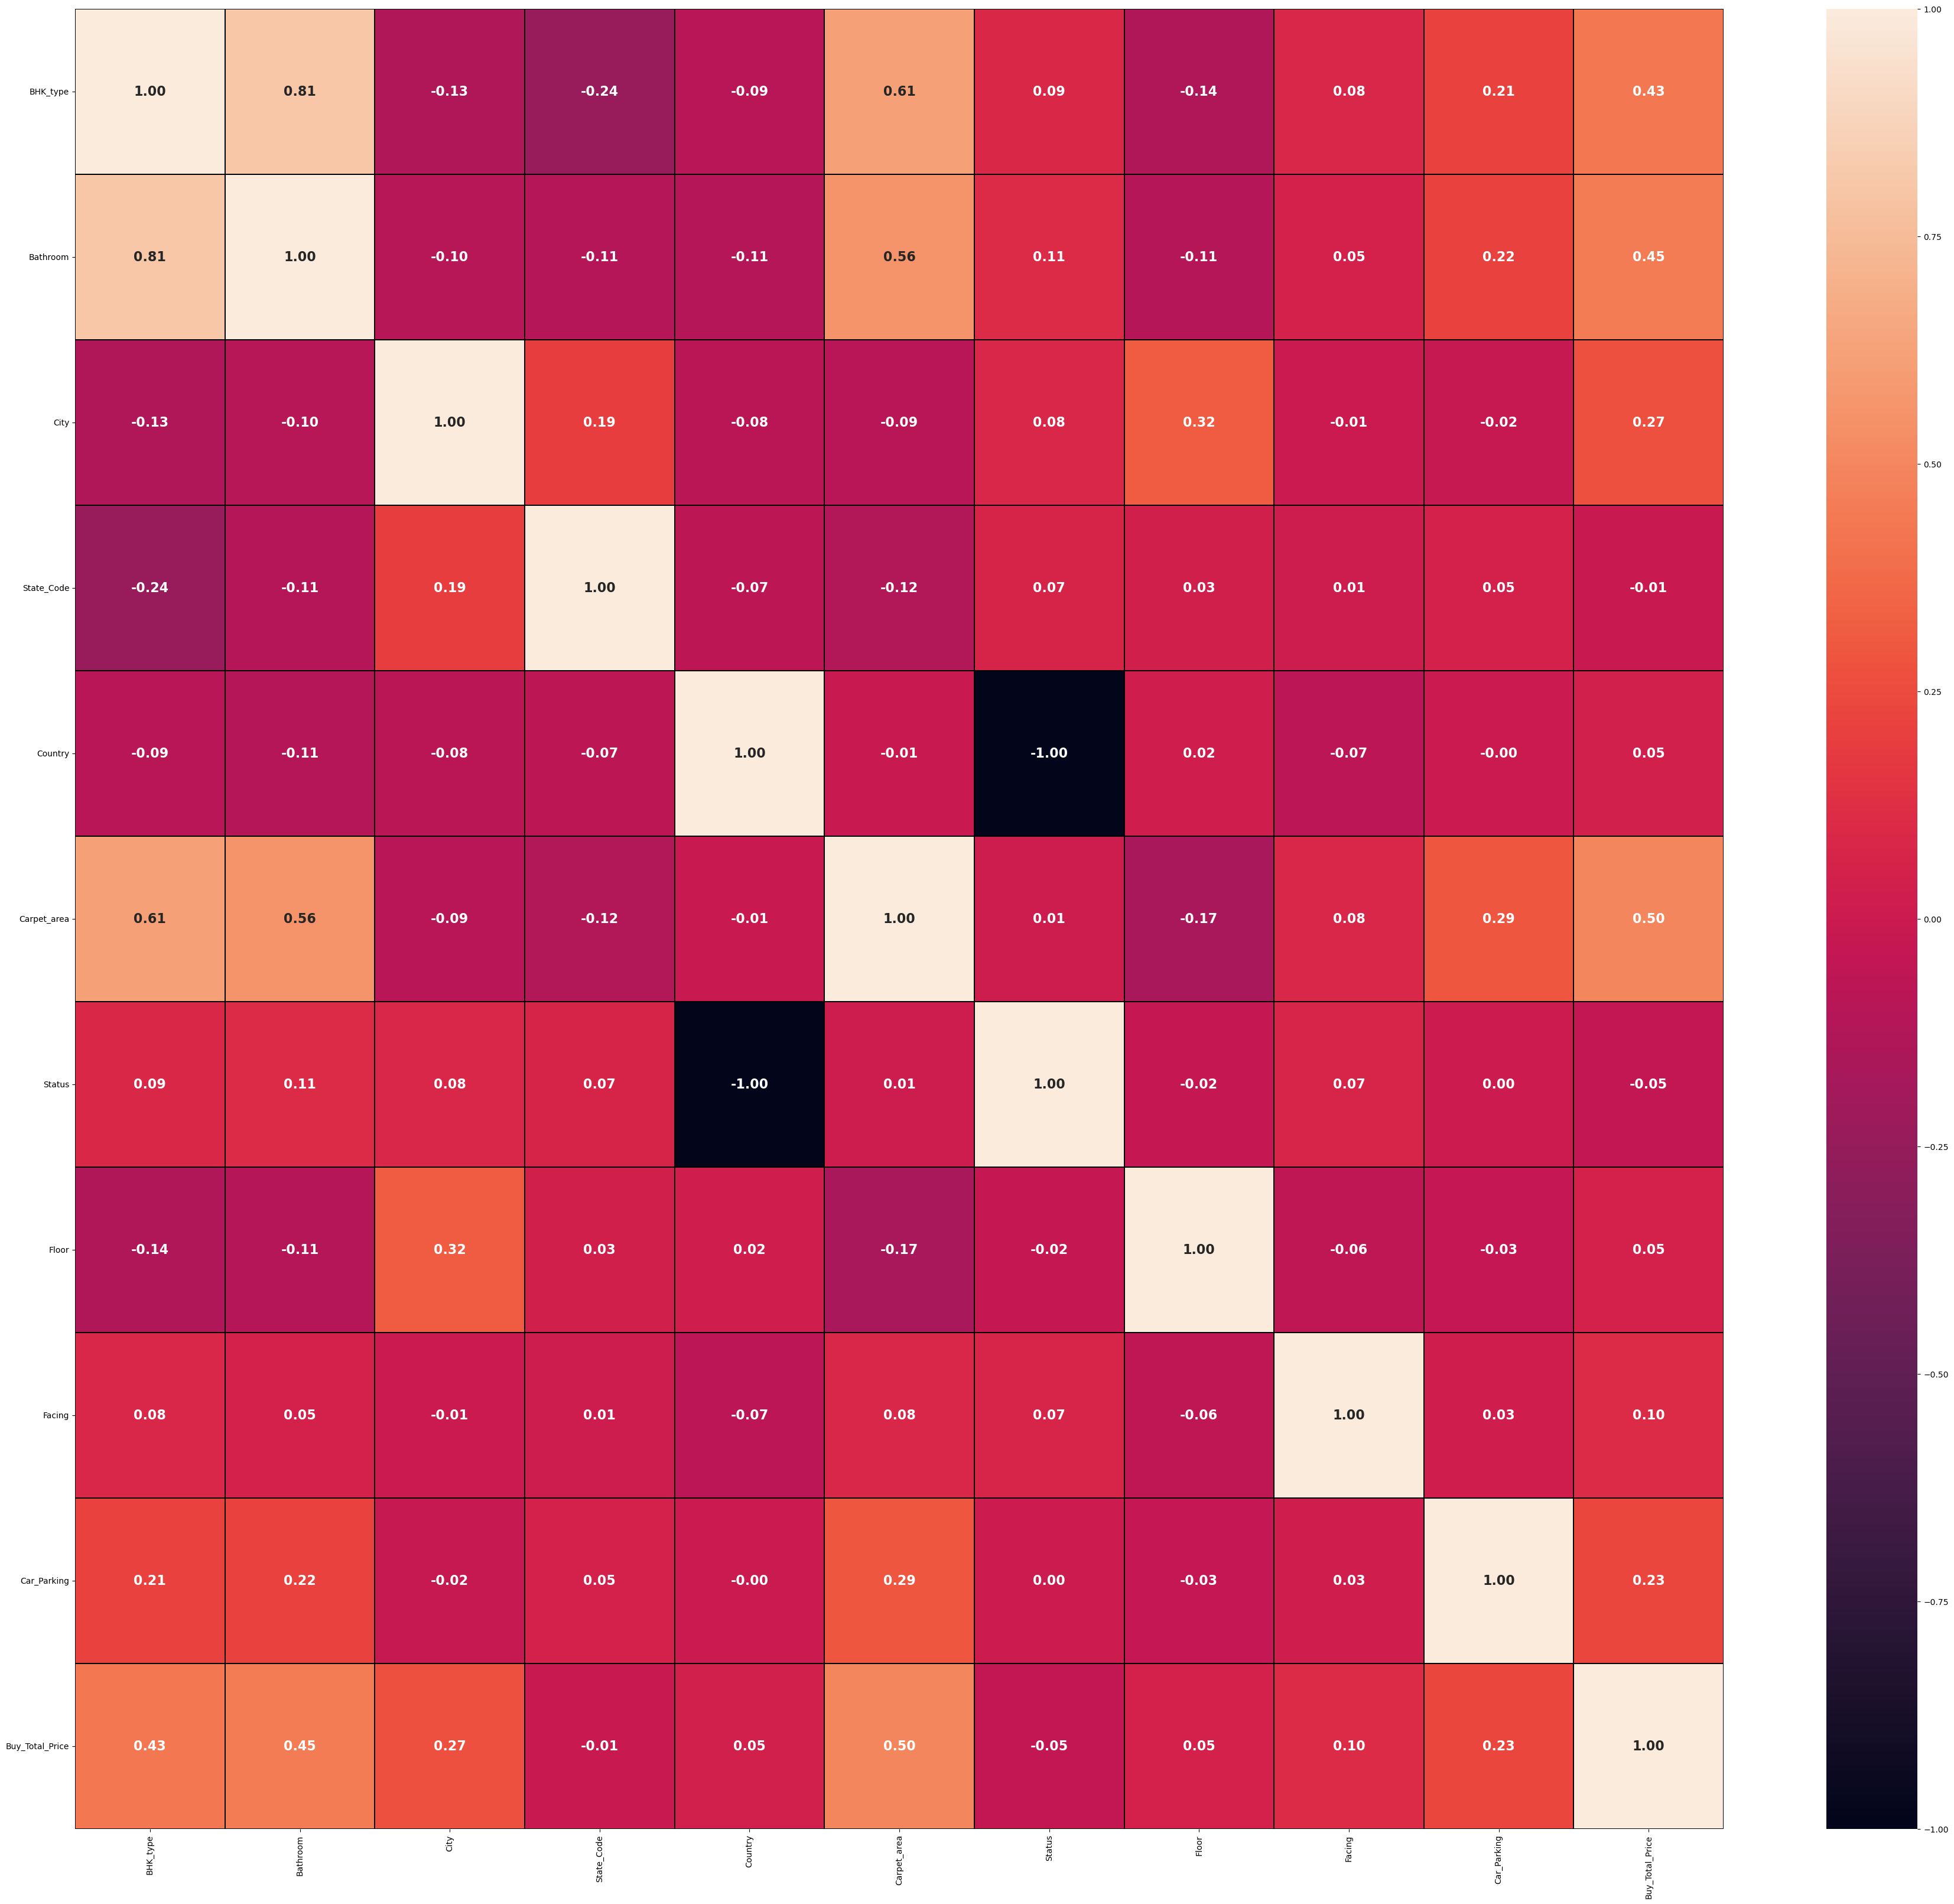

In [228]:
plt.figure(figsize=(45,40))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='black',linewidth=0.2,annot_kws={'fontsize': 16,'fontweight': 'bold'})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [231]:
df = df.drop(columns=['Status'])

In [229]:
df.corr()['Carpet_area'].sort_values(ascending=False).to_frame()

Carpet_area
Carpet_area         1.000000
BHK_type            0.611549
Bathroom            0.561882
Buy_Total_Price     0.496874
Car_Parking         0.289290
Facing              0.084743
Status              0.012012
Country            -0.012012
City               -0.092701
State_Code         -0.122117
Floor              -0.165164

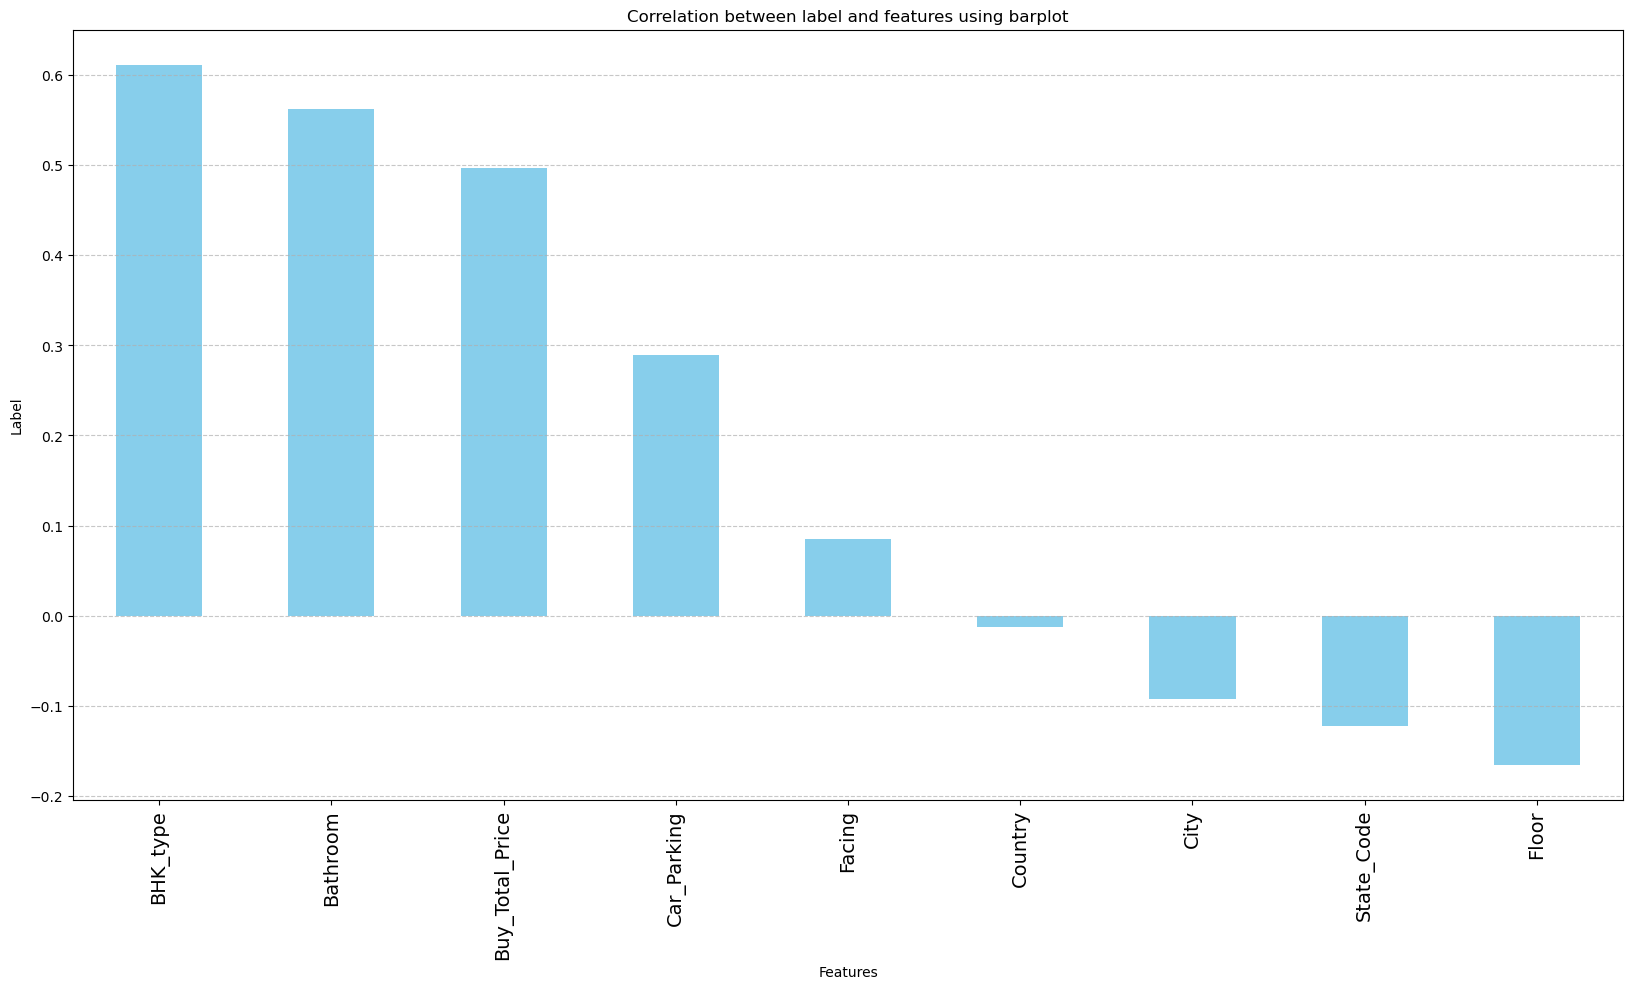

In [233]:
plt.figure(figsize=(20,10))
df.corr()['Carpet_area'].sort_values(ascending=False).drop(['Carpet_area']).plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Label')
plt.xticks(fontsize=14)
plt.title('Correlation between label and features using barplot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Model I: Including all features.

# Preparing Data for Machine Learning

# Splitting

Choose the dependent(label)and independent variables

In [234]:
X = df.drop('Carpet_area', axis=1)
Y = df['Carpet_area']

In [235]:
X

BHK_type  Bathroom  City  State_Code  Country  Floor  Facing  \
11          1       1.0     2           2        1     62       0   
19          1       1.0     2           2        1     62       0   
23          1       1.0     2           2        1     62       0   
27          2       1.0     2           2        1     62       0   
37          4       3.0     0           3        0     83       2   
..        ...       ...   ...         ...      ...    ...     ...   
588         1       1.0     4           1        0     12       2   
589         4       3.0     4           1        0     62       0   
590         3       2.0     4           1        0      4       0   
591         2       2.0     4           1        0     64       0   
592         1       2.0     4           1        0     12       1   

     Car_Parking  Buy_Total_Price  
11             1       241.712794  
19             1       265.437748  
23             1       259.402969  
27             1       265.398418  
37             0       251.984210  
..           ...              ...  
588            1       101.639636  
589            2       198.319248  
590            1       166.310350  
591            1       170.997595  
592            0       158.740105  

[560 rows x 9 columns]

In [236]:
Y

11      650.0
19      787.0
23      836.0
27      995.0
37     1500.0
        ...  
588     300.0
589    1900.0
590     105.0
591    1020.0
592     540.0
Name: Carpet_area, Length: 560, dtype: float64

# Feature Scaling

In [237]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

BHK_type  Bathroom      City  State_Code    Country     Floor    Facing  \
0   -1.314472 -1.271858 -0.987234   -0.796028  11.789826  0.288231 -0.873621   
1   -1.314472 -1.271858 -0.987234   -0.796028  11.789826  0.288231 -0.873621   
2   -1.314472 -1.271858 -0.987234   -0.796028  11.789826  0.288231 -0.873621   
3   -0.212519 -1.271858 -0.987234   -0.796028  11.789826  0.288231 -0.873621   
4    1.991385  1.122228 -1.603223   -0.328758  -0.084819  0.832569  0.242064   
..        ...       ...       ...         ...        ...       ...       ...   
555 -1.314472 -1.271858 -0.371244   -1.263298  -0.084819 -1.007812  0.242064   
556  1.991385  1.122228 -0.371244   -1.263298  -0.084819  0.288231 -0.873621   
557  0.889433 -0.074815 -0.371244   -1.263298  -0.084819 -1.215179 -0.873621   
558 -0.212519 -0.074815 -0.371244   -1.263298  -0.084819  0.340072 -0.873621   
559 -1.314472 -0.074815 -0.371244   -1.263298  -0.084819 -1.007812 -0.315779   

     Car_Parking  Buy_Total_Price  
0      -0.015490         0.294200  
1      -0.015490         0.638873  
2      -0.015490         0.551200  
3      -0.015490         0.638301  
4      -1.461191         0.443422  
..           ...              ...  
555    -0.015490        -1.740764  
556     1.430212        -0.336216  
557    -0.015490        -0.801237  
558    -0.015490        -0.733141  
559    -1.461191        -0.911216  

[560 rows x 9 columns]

o address potential bias stemming from variations in decimal places across feature columns, I've opted to standardize all the features using the Standard Scaler method. This technique ensures that all feature columns have comparable scales, which can enhance the performance and stability of my model.

# Assessing multicollinearity among features.

In [239]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [240]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

VIF Values         Features
0    3.203560         BHK_type
1    3.053466         Bathroom
2    1.347215             City
3    1.131675       State_Code
4    1.059741          Country
5    1.131042            Floor
6    1.023969           Facing
7    1.088099      Car_Parking
8    1.564248  Buy_Total_Price

In [241]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.6159749514925634 at random state 140


In [243]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models

# Model Building-1

In [244]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
print()
def evaluate_regression(model, X, Y):
    print('Model Name:',model)
    # Splitting data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting y_test
    pred = model.predict(X_test)
    
    # Predicting y_train
    train = model.predict(X_train)
    
    
    # R-squared Score
    r2 = r2_score(Y_test, pred)
    print("R-squared Score:", r2)
    
    #R-squared Score on training data
    r3 = r2_score(Y_train, train)
    print("R-squared Score on training data:", r3*100)
    
    # Mean Absolute Error
    mae = mean_absolute_error(Y_test, pred)
    print("Mean Absolute Error:", mae)
    
    # Mean Squared Error
    mse = mean_squared_error(Y_test, pred)
    print("Mean Squared Error:", mse)
    
    # Root Mean Squared Error
    rmse =np.sqrt(mean_squared_error(Y_test, pred))
    print("Root Mean Squared Error:", rmse)
    
    
    
    # Cross Validation Score
    cv_score = cross_val_score(model, X, Y, cv=5, scoring='r2') 
    print("\nCross Validation Score:", cv_score)
    print("Cross Validation Score Mean:", cv_score.mean())
    
    # Result of accuracy minus cv scores
    result = r2 - cv_score.mean()
    print("R-squared Score - Cross Validation Score is", result*100)


In [245]:
# Linear Regression
LR = LinearRegression()
evaluate_regression(LR,X, Y)

Model Name: LinearRegression()
R-squared Score: 0.6622181261683244
R-squared Score on training data: 43.90613919209626
Mean Absolute Error: 231.04051113422722
Mean Squared Error: 100004.2943813342
Root Mean Squared Error: 316.2345559570209

Cross Validation Score: [ 0.63181371 -1.64641018  0.05173197  0.33542062  0.24476089]
Cross Validation Score Mean: -0.07653659849237585
R-squared Score - Cross Validation Score is 73.87547246607002


In [246]:
# Ridge Regressor
RDG = Ridge()
evaluate_regression(RDG,X, Y)

Model Name: Ridge()
R-squared Score: 0.6623801282128668
R-squared Score on training data: 43.90599405304888
Mean Absolute Error: 230.94824099986747
Mean Squared Error: 99956.3317717098
Root Mean Squared Error: 316.158712946061

Cross Validation Score: [ 0.63223331 -1.63529321  0.05246414  0.33537373  0.24455549]
Cross Validation Score Mean: -0.07413330986757749
R-squared Score - Cross Validation Score is 73.65134380804443


In [247]:
# Lasso Regressor
LS = Lasso()
evaluate_regression(LS,X, Y)

Model Name: Lasso()
R-squared Score: 0.6633603487958941
R-squared Score on training data: 43.904234185224475
Mean Absolute Error: 230.3906260203165
Mean Squared Error: 99666.12594558971
Root Mean Squared Error: 315.6994234166254

Cross Validation Score: [ 0.63247665 -1.64124221  0.05998493  0.33586928  0.24387846]
Cross Validation Score Mean: -0.07380657760121874
R-squared Score - Cross Validation Score is 73.71669263971128


In [248]:
# Decision Tree Regression
DT = DecisionTreeRegressor()
evaluate_regression(DT,X, Y)

Model Name: DecisionTreeRegressor()
R-squared Score: 0.35922381661802827
R-squared Score on training data: 99.99618192098119
Mean Absolute Error: 287.5
Mean Squared Error: 189709.32142857142
Root Mean Squared Error: 435.55633553947007

Cross Validation Score: [-0.27945181  0.0625109   0.16392487  0.35063667 -0.2315807 ]
Cross Validation Score Mean: 0.013207985022644175
R-squared Score - Cross Validation Score is 34.60158315953841


In [249]:
# Random Forest Regression
RFR = RandomForestRegressor()
evaluate_regression(RFR,X, Y)

Model Name: RandomForestRegressor()
R-squared Score: 0.7213592747071227
R-squared Score on training data: 94.38870583312952
Mean Absolute Error: 201.4140089285714
Mean Squared Error: 82494.8621509018
Root Mean Squared Error: 287.2191883403715

Cross Validation Score: [0.38689903 0.21743217 0.26286955 0.42754705 0.33180362]
Cross Validation Score Mean: 0.32531028207898494
R-squared Score - Cross Validation Score is 39.604899262813774


In [250]:
# Extra Tree Regression
ETR = ExtraTreesRegressor()
evaluate_regression(ETR,X, Y)

Model Name: ExtraTreesRegressor()
R-squared Score: 0.7648908518767289
R-squared Score on training data: 99.99618192098119
Mean Absolute Error: 195.93008928571427
Mean Squared Error: 69606.82701517857
Root Mean Squared Error: 263.83105771530876

Cross Validation Score: [0.48652681 0.25180074 0.09963609 0.42438656 0.29230446]
Cross Validation Score Mean: 0.31093093242327036
R-squared Score - Cross Validation Score is 45.395991945345855


In [251]:
# ADA Boost Regressor
ABR = AdaBoostRegressor()
evaluate_regression(ABR,X, Y)

Model Name: AdaBoostRegressor()
R-squared Score: 0.6809459554995667
R-squared Score on training data: 71.27465268039434
Mean Absolute Error: 247.46711140472016
Mean Squared Error: 94459.70036176812
Root Mean Squared Error: 307.34296862262545

Cross Validation Score: [ 0.45322736 -0.89235116  0.14539887  0.3417202   0.13600445]
Cross Validation Score Mean: 0.03679994312221204
R-squared Score - Cross Validation Score is 64.41460123773547


In [252]:
# GradientBoostingRegressor
GBR = GradientBoostingRegressor()
evaluate_regression(GBR,X, Y)

Model Name: GradientBoostingRegressor()
R-squared Score: 0.6273009967850433
R-squared Score on training data: 88.51514448572844
Mean Absolute Error: 228.93928732799031
Mean Squared Error: 110341.9209868899
Root Mean Squared Error: 332.1775443748266

Cross Validation Score: [0.52080968 0.49243541 0.31770752 0.40056023 0.28924197]
Cross Validation Score Mean: 0.40415096413826984
R-squared Score - Cross Validation Score is 22.31500326467734


In [253]:
# XGBRegressor
XGBR = XGBRegressor()
evaluate_regression(XGBR,X, Y)

Model Name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R-squared Score: 0.6772070594990177
R-squared Score on training data: 99.9509911028736
Mean Absolute Error: 212.73729010990687
Mean Squared Error: 95566.6444735366
Root Mean Squared Error: 309.13855222785884

Cross Validation Score: [0.30595

I'm selecting Extra Tree Regressor the best model because it exhibits the smallest disparity between the test accuracy and cross-validation score. Moreover, both the train and test accuracies are promising and closely aligned.

# Hyper parameter tuning on the best ML Model

In [255]:
# Choosing the Extra Tree  Regressor as best model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [256]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=ETR, param_grid=param_grid, cv=5)

In [257]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [258]:
best_params = grid_search.best_params_
best_params

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [259]:
final_model_1 = ExtraTreesRegressor(max_depth=20,
                                    min_samples_leaf=1,
                                    min_samples_split=10,
                                    n_estimators=100)

In [260]:
final_model_1.fit(X_train, Y_train)

ExtraTreesRegressor(max_depth=20, min_samples_split=10)

In [261]:
pred = final_model_1.predict(X_test)

In [262]:
mse = mean_squared_error(Y_test, pred)

In [263]:
print("Mean Squared Error:", mse)

Mean Squared Error: 74614.18877251878


In [264]:
r2_score(Y_test,pred)

0.7479776178220207

# Saving the model

In [265]:
filename = "Capstone_2.pkl"
joblib.dump(final_model_1, filename)

['Capstone_2.pkl']

In [270]:
model=joblib.load("Capstone_2.pkl")
prediction=model.predict(X_test)
prediction

array([1525.42727381, 1510.65703968, 1585.72757143, 1647.82701587,
        643.2997619 , 1520.55688095,  435.45178571, 1503.15857937,
        755.17133333, 1037.39389286, 1156.60827381,  662.95563095,
       1159.41549603,  812.57971429, 2069.60057937, 1575.73975794,
        556.0382381 ,  806.13949603,  893.64529762, 1428.48260317,
        519.86178968,  282.49263889,  475.56834127, 1491.51561905,
        845.42439286,  964.41120238, 1226.05389683,  443.01079762,
       1624.19916667,  738.56034127, 1414.05903175,  564.78782937,
        756.47291667, 1104.27934921,  290.49308333,  939.50668254,
        518.4640754 , 1715.76386111,  815.25025   ,  842.6726627 ,
        690.96653175,  217.26009921, 1502.60278175, 1457.1337381 ,
        801.01331349,  953.81242857,  766.10621032,  802.54860317,
       1469.0198254 ,  623.26243651,  736.07645635,  793.71809524,
        199.38902381,  689.59795635,  754.86617857,  711.75097222,
        580.28795238, 1230.09898413,  636.07453175,  480.79326

In [272]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a


In [273]:
df.head()

Predicted  Original
0  1525.427274    1280.0
1  1510.657040    1780.0
2  1585.727571    1850.0
3  1647.827016    1150.0
4   643.299762     333.0

-----

----

# 3.Property type.

------

-----

In [282]:
df=df5

In [283]:
df

BHK_type        Property_Type  Beds  Bathroom Balcony       City  \
0            3                Condo     3       2.0       1    Chicago   
1            4                Condo     4       3.0     NaN    Chicago   
2            2                Condo     2       2.0     NaN    Chicago   
6            3                Condo     3       2.0       1    Chicago   
7            3                Condo     3       1.0     NaN    Chicago   
...        ...                  ...   ...       ...     ...        ...   
3684         3    Independent House     3       1.0     1.0  Faridabad   
3685         1    Independent House     1       2.0     1.0  Faridabad   
3686         3  Standalone Building     3       2.0     2.0  Faridabad   
3687         3  Standalone Building     3       2.0     NaN  Faridabad   
3688         1                   Sb     1       2.0     NaN  Faridabad   

     State_Code        Country                  Landmarks Carpet_area  \
0            IL  United States         CHI - Logan Square       1,500   
1            IL  United States             CHI - Avondale         NaN   
2            IL  United States         CHI - Lincoln Park       1,300   
6            IL  United States         CHI - Logan Square         NaN   
7            IL  United States         CHI - North Center         NaN   
...         ...            ...                        ...         ...   
3684         HR          India       Crown Interiorz Mall         NaN   
3685         HR          India       Crown Interiorz Mall         NaN   
3686         HR          India  Anupama Sweets Restaurant         NaN   
3687         HR          India                        NaN         NaN   
3688         HR          India                        NaN       540.0   

           Status Floor  Year_Built Price_per_square_feet Furnished_Status  \
0          Active   NaN      2004.0                   346              NaN   
1          Active   NaN      2015.0                   NaN              NaN   
2          Active   NaN      1988.0                   296              NaN   
6          Active   NaN      2019.0                   NaN              NaN   
7          Active   NaN         NaN                   NaN              NaN   
...           ...   ...         ...                   ...              ...   
3684  Immediately   NaN         NaN                   NaN              NaN   
3685  Immediately   NaN         NaN                   NaN              NaN   
3686  Immediately   NaN         NaN                   NaN              NaN   
3687  Immediately   NaN         NaN                   NaN              NaN   
3688  Immediately   1/2         NaN                   NaN              NaN   

     Facing   Car_Parking Type_of_Ownership  Buy_Total_Price  
0       NaN           NaN               NaN       43139280.0  
1       NaN           NaN               NaN       49863688.0  
2       NaN           NaN               NaN       32001200.0  
6       NaN           NaN               NaN       49872000.0  
7       NaN           NaN               NaN       23689200.0  
...     ...           ...               ...              ...  
3684    NaN           Car        Self Owned        8000000.0  
3685    NaN           NaN        Self Owned        3500000.0  
3686    NaN  Bike and Car        Self Owned        5500000.0  
3687    NaN  Bike and Car        Self Owned        6500000.0  
3688  North          Bike        Self Owned        4000000.0  

[3353 rows x 19 columns]

We will remove the rows that have missing values in our target variable.

In [284]:
df = df.dropna(subset=['Property_Type'])

In [285]:
df

BHK_type        Property_Type  Beds  Bathroom Balcony       City  \
0            3                Condo     3       2.0       1    Chicago   
1            4                Condo     4       3.0     NaN    Chicago   
2            2                Condo     2       2.0     NaN    Chicago   
6            3                Condo     3       2.0       1    Chicago   
7            3                Condo     3       1.0     NaN    Chicago   
...        ...                  ...   ...       ...     ...        ...   
3684         3    Independent House     3       1.0     1.0  Faridabad   
3685         1    Independent House     1       2.0     1.0  Faridabad   
3686         3  Standalone Building     3       2.0     2.0  Faridabad   
3687         3  Standalone Building     3       2.0     NaN  Faridabad   
3688         1                   Sb     1       2.0     NaN  Faridabad   

     State_Code        Country                  Landmarks Carpet_area  \
0            IL  United States         CHI - Logan Square       1,500   
1            IL  United States             CHI - Avondale         NaN   
2            IL  United States         CHI - Lincoln Park       1,300   
6            IL  United States         CHI - Logan Square         NaN   
7            IL  United States         CHI - North Center         NaN   
...         ...            ...                        ...         ...   
3684         HR          India       Crown Interiorz Mall         NaN   
3685         HR          India       Crown Interiorz Mall         NaN   
3686         HR          India  Anupama Sweets Restaurant         NaN   
3687         HR          India                        NaN         NaN   
3688         HR          India                        NaN       540.0   

           Status Floor  Year_Built Price_per_square_feet Furnished_Status  \
0          Active   NaN      2004.0                   346              NaN   
1          Active   NaN      2015.0                   NaN              NaN   
2          Active   NaN      1988.0                   296              NaN   
6          Active   NaN      2019.0                   NaN              NaN   
7          Active   NaN         NaN                   NaN              NaN   
...           ...   ...         ...                   ...              ...   
3684  Immediately   NaN         NaN                   NaN              NaN   
3685  Immediately   NaN         NaN                   NaN              NaN   
3686  Immediately   NaN         NaN                   NaN              NaN   
3687  Immediately   NaN         NaN                   NaN              NaN   
3688  Immediately   1/2         NaN                   NaN              NaN   

     Facing   Car_Parking Type_of_Ownership  Buy_Total_Price  
0       NaN           NaN               NaN       43139280.0  
1       NaN           NaN               NaN       49863688.0  
2       NaN           NaN               NaN       32001200.0  
6       NaN           NaN               NaN       49872000.0  
7       NaN           NaN               NaN       23689200.0  
...     ...           ...               ...              ...  
3684    NaN           Car        Self Owned        8000000.0  
3685    NaN           NaN        Self Owned        3500000.0  
3686    NaN  Bike and Car        Self Owned        5500000.0  
3687    NaN  Bike and Car        Self Owned        6500000.0  
3688  North          Bike        Self Owned        4000000.0  

[3340 rows x 19 columns]

In [286]:
df.reset_index(drop=True, inplace=True)

In [287]:
df

BHK_type        Property_Type  Beds  Bathroom Balcony       City  \
0            3                Condo     3       2.0       1    Chicago   
1            4                Condo     4       3.0     NaN    Chicago   
2            2                Condo     2       2.0     NaN    Chicago   
3            3                Condo     3       2.0       1    Chicago   
4            3                Condo     3       1.0     NaN    Chicago   
...        ...                  ...   ...       ...     ...        ...   
3335         3    Independent House     3       1.0     1.0  Faridabad   
3336         1    Independent House     1       2.0     1.0  Faridabad   
3337         3  Standalone Building     3       2.0     2.0  Faridabad   
3338         3  Standalone Building     3       2.0     NaN  Faridabad   
3339         1                   Sb     1       2.0     NaN  Faridabad   

     State_Code        Country                  Landmarks Carpet_area  \
0            IL  United States         CHI - Logan Square       1,500   
1            IL  United States             CHI - Avondale         NaN   
2            IL  United States         CHI - Lincoln Park       1,300   
3            IL  United States         CHI - Logan Square         NaN   
4            IL  United States         CHI - North Center         NaN   
...         ...            ...                        ...         ...   
3335         HR          India       Crown Interiorz Mall         NaN   
3336         HR          India       Crown Interiorz Mall         NaN   
3337         HR          India  Anupama Sweets Restaurant         NaN   
3338         HR          India                        NaN         NaN   
3339         HR          India                        NaN       540.0   

           Status Floor  Year_Built Price_per_square_feet Furnished_Status  \
0          Active   NaN      2004.0                   346              NaN   
1          Active   NaN      2015.0                   NaN              NaN   
2          Active   NaN      1988.0                   296              NaN   
3          Active   NaN      2019.0                   NaN              NaN   
4          Active   NaN         NaN                   NaN              NaN   
...           ...   ...         ...                   ...              ...   
3335  Immediately   NaN         NaN                   NaN              NaN   
3336  Immediately   NaN         NaN                   NaN              NaN   
3337  Immediately   NaN         NaN                   NaN              NaN   
3338  Immediately   NaN         NaN                   NaN              NaN   
3339  Immediately   1/2         NaN                   NaN              NaN   

     Facing   Car_Parking Type_of_Ownership  Buy_Total_Price  
0       NaN           NaN               NaN       43139280.0  
1       NaN           NaN               NaN       49863688.0  
2       NaN           NaN               NaN       32001200.0  
3       NaN           NaN               NaN       49872000.0  
4       NaN           NaN               NaN       23689200.0  
...     ...           ...               ...              ...  
3335    NaN           Car        Self Owned        8000000.0  
3336    NaN           NaN        Self Owned        3500000.0  
3337    NaN  Bike and Car        Self Owned        5500000.0  
3338    NaN  Bike and Car        Self Owned        6500000.0  
3339  North          Bike        Self Owned        4000000.0  

[3340 rows x 19 columns]

In [290]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [291]:
df['Property_Type'].value_counts()

Property_Type
Independent House         898
Standalone Building       555
Condo                     128
Apartment                  83
Supertech Eco Villa...     29
Raheja Navodaya            28
Sare Homes                 26
Sidhartha Ncr One          24
Gls Avenue 51              22
Signature Global Ro...     22
Awho Shanti Vihar          20
Ansal Heights              20
Saffron Kanishka To...     18
Supertech Upcountry...     16
Builder Floor              16
Ramsons Kshitij            14
Sb                         13
Supertech Supernova        13
Maple Aapla Ghar Ta...     12
Sidhartha Ncr Greens       12
Rof Ananda                 12
Supertech Upcountry        11
Signature Global Th...     10
D Emerald Tower            10
Crescent Parc - Roy...     10
Ap                         10
Ajnara Le Garden            8
Ramsons Kshitij Ram...      8
Indraprastha Apartm...      7
Sare Crescent Parc          6
Mohini Mansion Cola...      6
Ashoka Enclave              6
Thiruvalluvar Apart...    

In [294]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

We will select only the top records that contain the highest number of entries because the other records are almost unique and have fewer entries, which could create class imbalance.

In [292]:
df= df[df['Property_Type'].isin(['Independent House', 'Standalone Building', 'Condo', 'Apartment'])]

In [295]:
df

BHK_type        Property_Type  Beds  Bathroom Balcony       City  \
0            3                Condo     3       2.0       1    Chicago   
1            4                Condo     4       3.0     NaN    Chicago   
2            2                Condo     2       2.0     NaN    Chicago   
3            3                Condo     3       2.0       1    Chicago   
4            3                Condo     3       1.0     NaN    Chicago   
...        ...                  ...   ...       ...     ...        ...   
3333         4  Standalone Building     4       5.0     NaN  Faridabad   
3335         3    Independent House     3       1.0     1.0  Faridabad   
3336         1    Independent House     1       2.0     1.0  Faridabad   
3337         3  Standalone Building     3       2.0     2.0  Faridabad   
3338         3  Standalone Building     3       2.0     NaN  Faridabad   

     State_Code        Country                  Landmarks Carpet_area  \
0            IL  United States         CHI - Logan Square       1,500   
1            IL  United States             CHI - Avondale         NaN   
2            IL  United States         CHI - Lincoln Park       1,300   
3            IL  United States         CHI - Logan Square         NaN   
4            IL  United States         CHI - North Center         NaN   
...         ...            ...                        ...         ...   
3333         HR          India                        NaN         NaN   
3335         HR          India       Crown Interiorz Mall         NaN   
3336         HR          India       Crown Interiorz Mall         NaN   
3337         HR          India  Anupama Sweets Restaurant         NaN   
3338         HR          India                        NaN         NaN   

           Status Floor  Year_Built Price_per_square_feet Furnished_Status  \
0          Active   NaN      2004.0                   346              NaN   
1          Active   NaN      2015.0                   NaN              NaN   
2          Active   NaN      1988.0                   296              NaN   
3          Active   NaN      2019.0                   NaN              NaN   
4          Active   NaN         NaN                   NaN              NaN   
...           ...   ...         ...                   ...              ...   
3333  Immediately   NaN         NaN                   NaN              NaN   
3335  Immediately   NaN         NaN                   NaN              NaN   
3336  Immediately   NaN         NaN                   NaN              NaN   
3337  Immediately   NaN         NaN                   NaN              NaN   
3338  Immediately   NaN         NaN                   NaN              NaN   

     Facing   Car_Parking Type_of_Ownership  Buy_Total_Price  
0       NaN           NaN               NaN       43139280.0  
1       NaN           NaN               NaN       49863688.0  
2       NaN           NaN               NaN       32001200.0  
3       NaN           NaN               NaN       49872000.0  
4       NaN           NaN               NaN       23689200.0  
...     ...           ...               ...              ...  
3333    NaN           NaN        Self Owned        6500000.0  
3335    NaN           Car        Self Owned        8000000.0  
3336    NaN           NaN        Self Owned        3500000.0  
3337    NaN  Bike and Car        Self Owned        5500000.0  
3338    NaN  Bike and Car        Self Owned        6500000.0  

[1664 rows x 19 columns]

In [296]:
df.reset_index(drop=True, inplace=True)

In [297]:
df

BHK_type        Property_Type  Beds  Bathroom Balcony       City  \
0            3                Condo     3       2.0       1    Chicago   
1            4                Condo     4       3.0     NaN    Chicago   
2            2                Condo     2       2.0     NaN    Chicago   
3            3                Condo     3       2.0       1    Chicago   
4            3                Condo     3       1.0     NaN    Chicago   
...        ...                  ...   ...       ...     ...        ...   
1659         4  Standalone Building     4       5.0     NaN  Faridabad   
1660         3    Independent House     3       1.0     1.0  Faridabad   
1661         1    Independent House     1       2.0     1.0  Faridabad   
1662         3  Standalone Building     3       2.0     2.0  Faridabad   
1663         3  Standalone Building     3       2.0     NaN  Faridabad   

     State_Code        Country                  Landmarks Carpet_area  \
0            IL  United States         CHI - Logan Square       1,500   
1            IL  United States             CHI - Avondale         NaN   
2            IL  United States         CHI - Lincoln Park       1,300   
3            IL  United States         CHI - Logan Square         NaN   
4            IL  United States         CHI - North Center         NaN   
...         ...            ...                        ...         ...   
1659         HR          India                        NaN         NaN   
1660         HR          India       Crown Interiorz Mall         NaN   
1661         HR          India       Crown Interiorz Mall         NaN   
1662         HR          India  Anupama Sweets Restaurant         NaN   
1663         HR          India                        NaN         NaN   

           Status Floor  Year_Built Price_per_square_feet Furnished_Status  \
0          Active   NaN      2004.0                   346              NaN   
1          Active   NaN      2015.0                   NaN              NaN   
2          Active   NaN      1988.0                   296              NaN   
3          Active   NaN      2019.0                   NaN              NaN   
4          Active   NaN         NaN                   NaN              NaN   
...           ...   ...         ...                   ...              ...   
1659  Immediately   NaN         NaN                   NaN              NaN   
1660  Immediately   NaN         NaN                   NaN              NaN   
1661  Immediately   NaN         NaN                   NaN              NaN   
1662  Immediately   NaN         NaN                   NaN              NaN   
1663  Immediately   NaN         NaN                   NaN              NaN   

     Facing   Car_Parking Type_of_Ownership  Buy_Total_Price  
0       NaN           NaN               NaN       43139280.0  
1       NaN           NaN               NaN       49863688.0  
2       NaN           NaN               NaN       32001200.0  
3       NaN           NaN               NaN       49872000.0  
4       NaN           NaN               NaN       23689200.0  
...     ...           ...               ...              ...  
1659    NaN           NaN        Self Owned        6500000.0  
1660    NaN           Car        Self Owned        8000000.0  
1661    NaN           NaN        Self Owned        3500000.0  
1662    NaN  Bike and Car        Self Owned        5500000.0  
1663    NaN  Bike and Car        Self Owned        6500000.0  

[1664 rows x 19 columns]

In [298]:
df.head()#first 5 rows

BHK_type Property_Type  Beds  Bathroom Balcony     City State_Code  \
0         3         Condo     3       2.0       1  Chicago         IL   
1         4         Condo     4       3.0     NaN  Chicago         IL   
2         2         Condo     2       2.0     NaN  Chicago         IL   
3         3         Condo     3       2.0       1  Chicago         IL   
4         3         Condo     3       1.0     NaN  Chicago         IL   

         Country           Landmarks Carpet_area  Status Floor  Year_Built  \
0  United States  CHI - Logan Square       1,500  Active   NaN      2004.0   
1  United States      CHI - Avondale         NaN  Active   NaN      2015.0   
2  United States  CHI - Lincoln Park       1,300  Active   NaN      1988.0   
3  United States  CHI - Logan Square         NaN  Active   NaN      2019.0   
4  United States  CHI - North Center         NaN  Active   NaN         NaN   

  Price_per_square_feet Furnished_Status Facing Car_Parking Type_of_Ownership  \
0                   346              NaN    NaN         NaN               NaN   
1                   NaN              NaN    NaN         NaN               NaN   
2                   296              NaN    NaN         NaN               NaN   
3                   NaN              NaN    NaN         NaN               NaN   
4                   NaN              NaN    NaN         NaN               NaN   

   Buy_Total_Price  
0       43139280.0  
1       49863688.0  
2       32001200.0  
3       49872000.0  
4       23689200.0

In [299]:
df.tail()#last 5 rows

BHK_type        Property_Type  Beds  Bathroom Balcony       City  \
1659         4  Standalone Building     4       5.0     NaN  Faridabad   
1660         3    Independent House     3       1.0     1.0  Faridabad   
1661         1    Independent House     1       2.0     1.0  Faridabad   
1662         3  Standalone Building     3       2.0     2.0  Faridabad   
1663         3  Standalone Building     3       2.0     NaN  Faridabad   

     State_Code Country                  Landmarks Carpet_area       Status  \
1659         HR   India                        NaN         NaN  Immediately   
1660         HR   India       Crown Interiorz Mall         NaN  Immediately   
1661         HR   India       Crown Interiorz Mall         NaN  Immediately   
1662         HR   India  Anupama Sweets Restaurant         NaN  Immediately   
1663         HR   India                        NaN         NaN  Immediately   

     Floor  Year_Built Price_per_square_feet Furnished_Status Facing  \
1659   NaN         NaN                   NaN              NaN    NaN   
1660   NaN         NaN                   NaN              NaN    NaN   
1661   NaN         NaN                   NaN              NaN    NaN   
1662   NaN         NaN                   NaN              NaN    NaN   
1663   NaN         NaN                   NaN              NaN    NaN   

       Car_Parking Type_of_Ownership  Buy_Total_Price  
1659           NaN        Self Owned        6500000.0  
1660           Car        Self Owned        8000000.0  
1661           NaN        Self Owned        3500000.0  
1662  Bike and Car        Self Owned        5500000.0  
1663  Bike and Car        Self Owned        6500000.0

# Exploratory Data Analysis (EDA)

In [300]:
df.shape

(1664, 19)

The dataset consists of 1664 rows and 19 columns, which include both features and labels.

In [302]:
df.dtypes

BHK_type                   int64
Property_Type             object
Beds                       int64
Bathroom                 float64
Balcony                   object
City                      object
State_Code                object
Country                   object
Landmarks                 object
Carpet_area               object
Status                    object
Floor                     object
Year_Built               float64
Price_per_square_feet     object
Furnished_Status          object
Facing                    object
Car_Parking               object
Type_of_Ownership         object
Buy_Total_Price          float64
dtype: object

All features contains int64,float64 and object data.

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BHK_type               1664 non-null   int64  
 1   Property_Type          1664 non-null   object 
 2   Beds                   1664 non-null   int64  
 3   Bathroom               1664 non-null   float64
 4   Balcony                609 non-null    object 
 5   City                   1664 non-null   object 
 6   State_Code             1664 non-null   object 
 7   Country                1664 non-null   object 
 8   Landmarks              1479 non-null   object 
 9   Carpet_area            234 non-null    object 
 10  Status                 1664 non-null   object 
 11  Floor                  178 non-null    object 
 12  Year_Built             94 non-null     float64
 13  Price_per_square_feet  76 non-null     object 
 14  Furnished_Status       104 non-null    object 
 15  Faci

In [304]:
df.duplicated().sum()

496

In [305]:
df = df.drop_duplicates()

In [306]:
df.duplicated().sum()

0

In the dataset, there are no duplicate values present.

In [308]:
df.isin([' ','NA','?']).sum().any()

False

In [309]:
# checking the number of unique values in each column
df.nunique().to_frame("no.of unique values")

no.of unique values
BHK_type                                 5
Property_Type                            4
Beds                                     5
Bathroom                                 7
Balcony                                  8
City                                    11
State_Code                               8
Country                                  2
Landmarks                               96
Carpet_area                            116
Status                                   2
Floor                                   20
Year_Built                              35
Price_per_square_feet                   35
Furnished_Status                         2
Facing                                   8
Car_Parking                              3
Type_of_Ownership                        3
Buy_Total_Price                        247

In [310]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('/n')

BHK_type
2    372
4    308
3    251
1    235
5      2
Name: count, dtype: int64
/n
Property_Type
Independent House      651
Standalone Building    395
Condo                   65
Apartment               57
Name: count, dtype: int64
/n
Beds
2    372
4    308
3    251
1    235
5      2
Name: count, dtype: int64
/n
Bathroom
2.0    407
1.0    351
3.0    191
4.0    107
5.0     47
6.0     40
7.0     25
Name: count, dtype: int64
/n
Balcony
1.0    240
2.0    130
3.0     34
1       19
4.0     12
5.0      3
6.0      2
8.0      1
Name: count, dtype: int64
/n
City
Delhi           324
Faridabad       310
Hyderabad       129
Bengaluru       109
Mumbai           82
Chicago          65
Noida            55
Chennai          54
GreaterNoida     17
Pune             13
Gurgaon          10
Name: count, dtype: int64
/n
State_Code
DL    324
HR    320
TG    129
KA    109
MH     95
UP     72
IL     65
TN     54
Name: count, dtype: int64
/n
Country
India            1103
United States      65
Name: count, dtype: i

In [312]:
df.shape

(1168, 19)

In [311]:
df.isnull().sum()

BHK_type                    0
Property_Type               0
Beds                        0
Bathroom                    0
Balcony                   727
City                        0
State_Code                  0
Country                     0
Landmarks                 128
Carpet_area              1009
Status                      0
Floor                    1032
Year_Built               1120
Price_per_square_feet    1129
Furnished_Status         1087
Facing                   1038
Car_Parking               304
Type_of_Ownership          65
Buy_Total_Price             0
dtype: int64

We have identified several columns where more than half of the total records contain missing values. We will proceed to drop these columns, namely: Balcony,Carpet_area,Year_Built,Floor,Facing, Furnished_Status,Price_per_square_feet,Balcony,.

In [313]:
df.drop([ 'Carpet_area','Year_Built','Balcony', 'Floor','Facing','Furnished_Status','Price_per_square_feet'], axis=1, inplace=True)

In [316]:
df.columns

Index(['BHK_type', 'Property_Type', 'Beds', 'Bathroom', 'City', 'State_Code',
       'Country', 'Landmarks', 'Status', 'Car_Parking', 'Type_of_Ownership',
       'Buy_Total_Price'],
      dtype='object')

In [317]:
df.isnull().sum()

BHK_type               0
Property_Type          0
Beds                   0
Bathroom               0
City                   0
State_Code             0
Country                0
Landmarks            128
Status                 0
Car_Parking          304
Type_of_Ownership     65
Buy_Total_Price        0
dtype: int64

In [319]:
df.isnull().sum().sum()

497

<Axes: >

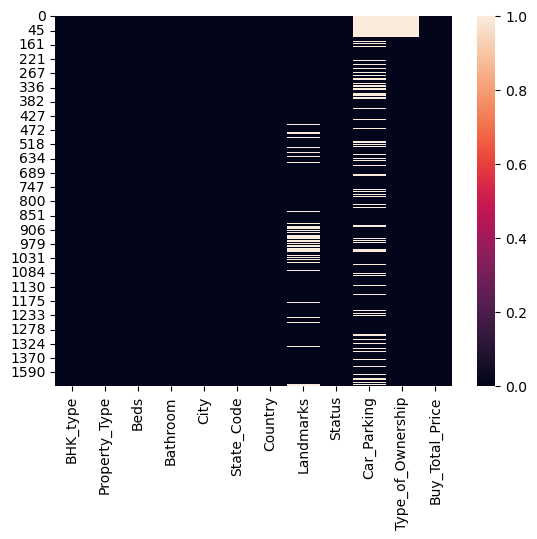

In [320]:
sns.heatmap(df.isnull())

In [321]:
df.isnull().sum()

BHK_type               0
Property_Type          0
Beds                   0
Bathroom               0
City                   0
State_Code             0
Country                0
Landmarks            128
Status                 0
Car_Parking          304
Type_of_Ownership     65
Buy_Total_Price        0
dtype: int64

In [322]:
df['Landmarks'].fillna(value=df['Landmarks'].mode()[0], inplace= True)

In [323]:
df['Car_Parking'].fillna(value=df['Car_Parking'].mode()[0], inplace= True)

In [324]:
df['Type_of_Ownership'].fillna(value=df['Type_of_Ownership'].mode()[0], inplace= True)

In [325]:
df.isnull().sum()

BHK_type             0
Property_Type        0
Beds                 0
Bathroom             0
City                 0
State_Code           0
Country              0
Landmarks            0
Status               0
Car_Parking          0
Type_of_Ownership    0
Buy_Total_Price      0
dtype: int64

<Axes: >

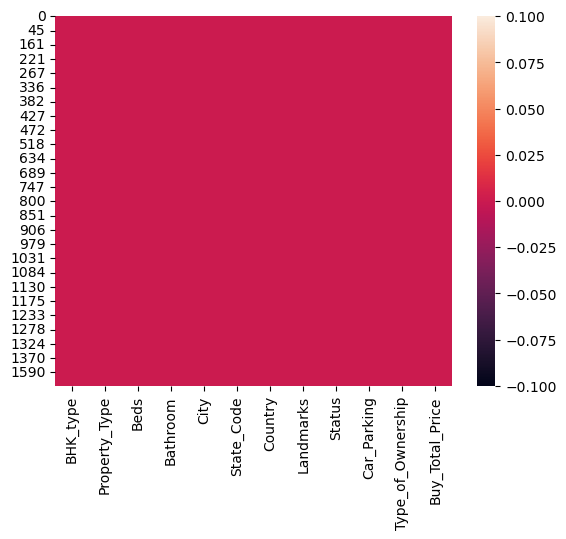

In [326]:
sns.heatmap(df.isnull())

In the dataset, there are no null values present.

In [327]:
df['Property_Type'].value_counts()

Property_Type
Independent House      651
Standalone Building    395
Condo                   65
Apartment               57
Name: count, dtype: int64

In [329]:
df.reset_index(drop=True, inplace=True)

In [330]:
df

BHK_type        Property_Type  Beds  Bathroom       City State_Code  \
0            3                Condo     3       2.0    Chicago         IL   
1            4                Condo     4       3.0    Chicago         IL   
2            2                Condo     2       2.0    Chicago         IL   
3            3                Condo     3       2.0    Chicago         IL   
4            3                Condo     3       1.0    Chicago         IL   
...        ...                  ...   ...       ...        ...        ...   
1163         4  Standalone Building     4       5.0  Faridabad         HR   
1164         3    Independent House     3       1.0  Faridabad         HR   
1165         1    Independent House     1       2.0  Faridabad         HR   
1166         3  Standalone Building     3       2.0  Faridabad         HR   
1167         3  Standalone Building     3       2.0  Faridabad         HR   

            Country                  Landmarks       Status   Car_Parking  \
0     United States         CHI - Logan Square       Active          Bike   
1     United States             CHI - Avondale       Active          Bike   
2     United States         CHI - Lincoln Park       Active          Bike   
3     United States         CHI - Logan Square       Active          Bike   
4     United States         CHI - North Center       Active          Bike   
...             ...                        ...          ...           ...   
1163          India          Maujpur- Babarpur  Immediately          Bike   
1164          India       Crown Interiorz Mall  Immediately           Car   
1165          India       Crown Interiorz Mall  Immediately          Bike   
1166          India  Anupama Sweets Restaurant  Immediately  Bike and Car   
1167          India          Maujpur- Babarpur  Immediately  Bike and Car   

     Type_of_Ownership  Buy_Total_Price  
0           Self Owned       43139280.0  
1           Self Owned       49863688.0  
2           Self Owned       32001200.0  
3           Self Owned       49872000.0  
4           Self Owned       23689200.0  
...                ...              ...  
1163        Self Owned        6500000.0  
1164        Self Owned        8000000.0  
1165        Self Owned        3500000.0  
1166        Self Owned        5500000.0  
1167        Self Owned        6500000.0  

[1168 rows x 12 columns]

# 3. Data Visualization

# 1.Univariate Analysis-

In [331]:
df.columns

Index(['BHK_type', 'Property_Type', 'Beds', 'Bathroom', 'City', 'State_Code',
       'Country', 'Landmarks', 'Status', 'Car_Parking', 'Type_of_Ownership',
       'Buy_Total_Price'],
      dtype='object')

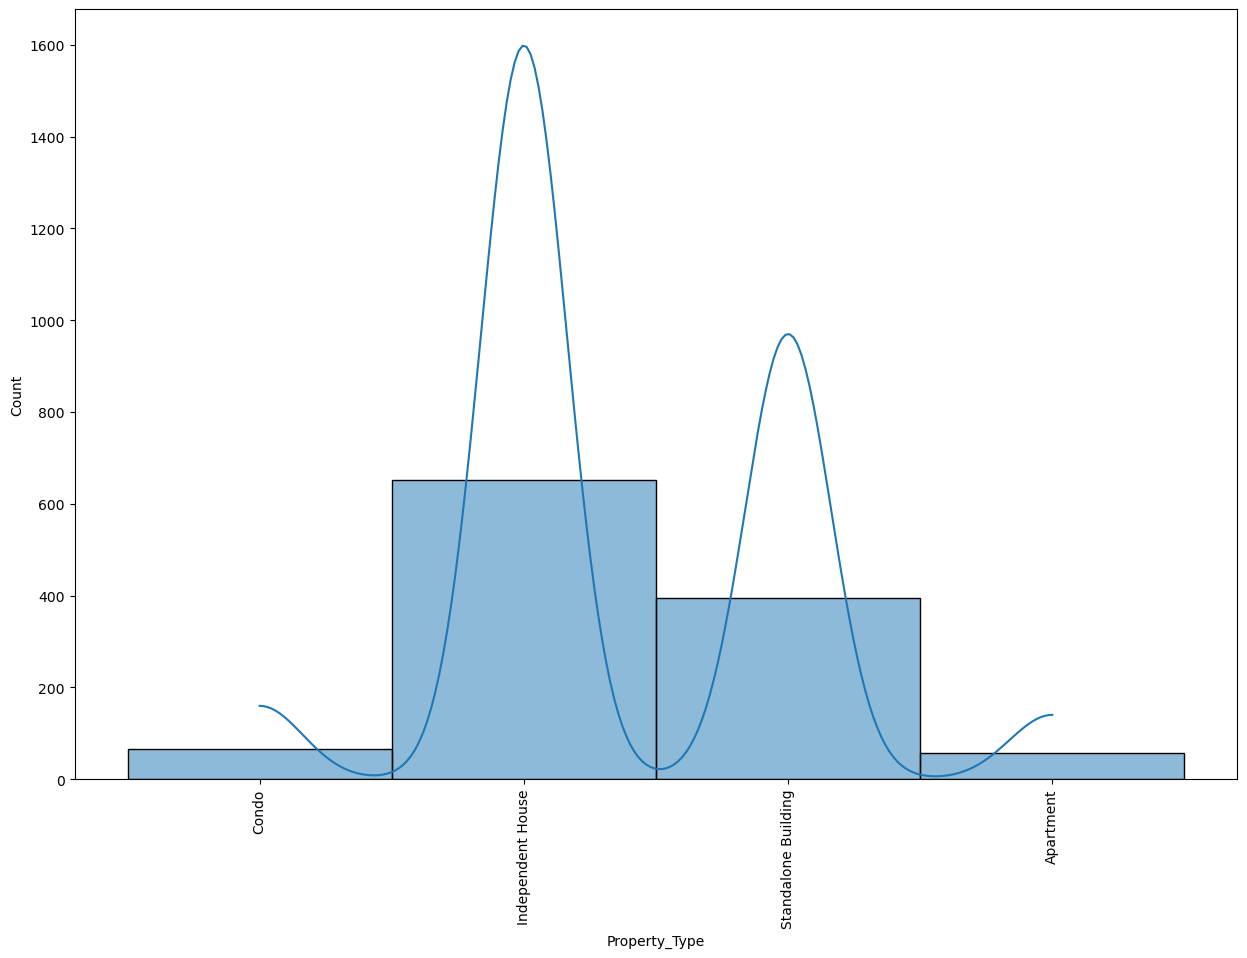

In [333]:
plt.figure(figsize=(15, 10))
sns.histplot(df['Property_Type'], kde=True)
plt.xticks(rotation=90)
plt.show()

Independent houses have the highest number of properties compared to others.

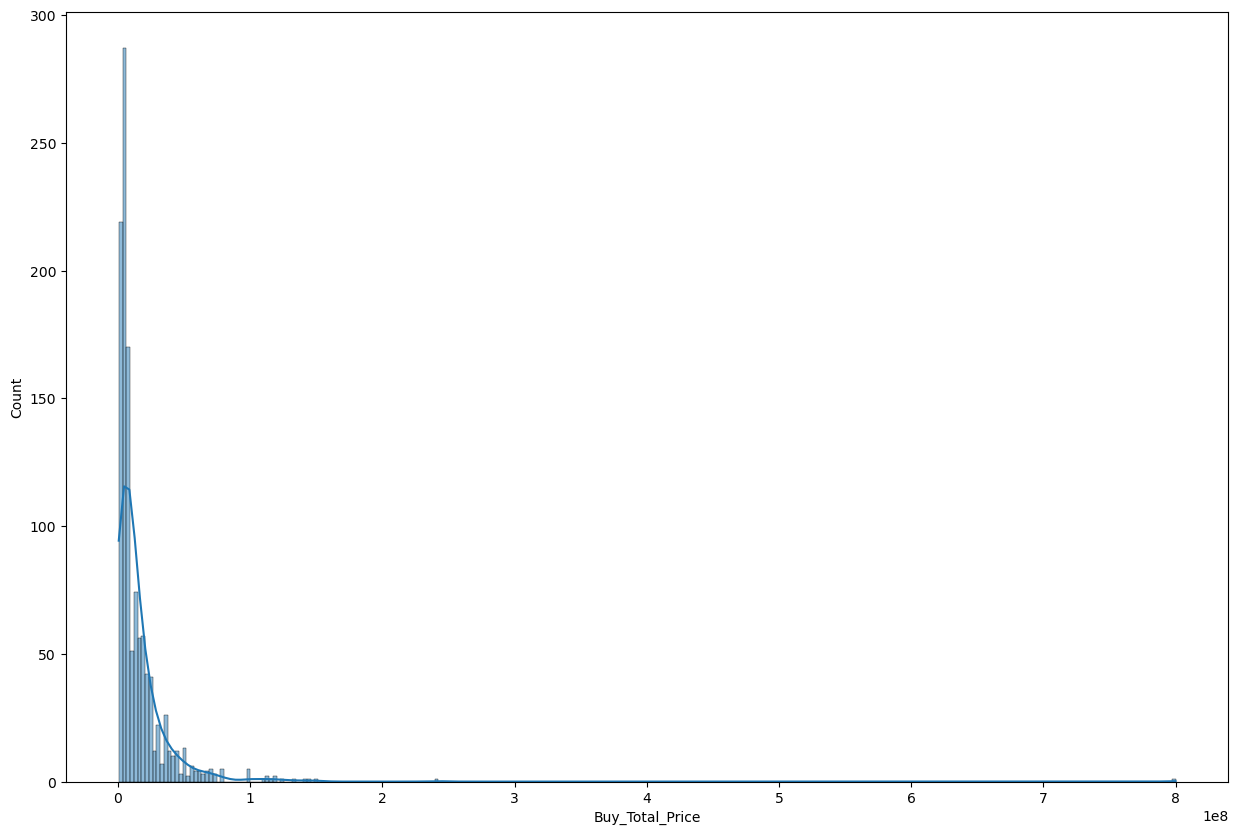

In [334]:
plt.figure(figsize=(15, 10))
sns.histplot(df['Buy_Total_Price'], kde=True)
plt.show()

Most prices fall within the range of 0 to 1 crore, although there are also outliers within this range.

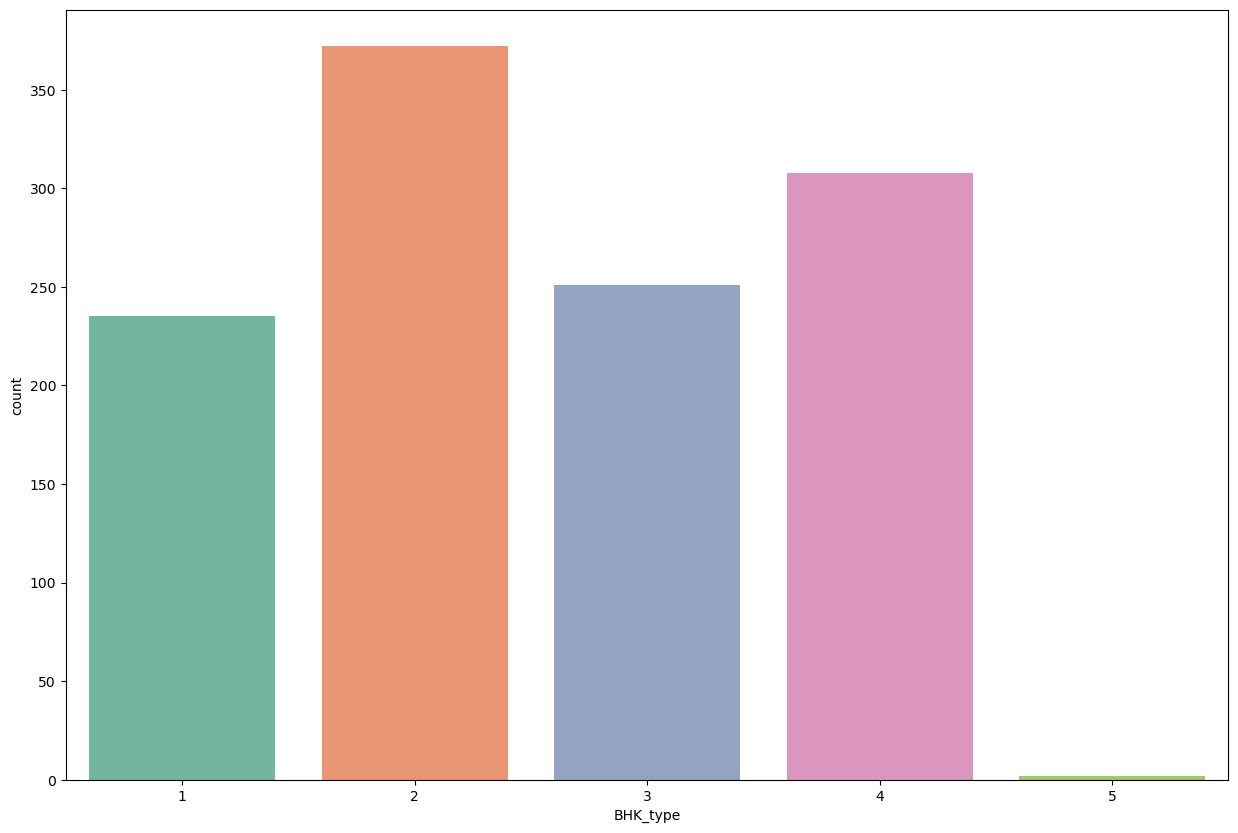

In [335]:
plt.figure(figsize=(15, 10))
sns.countplot(x='BHK_type', data=df, palette='Set2')
plt.show()

Here, it's clear that most properties are of the 2 BHK type.

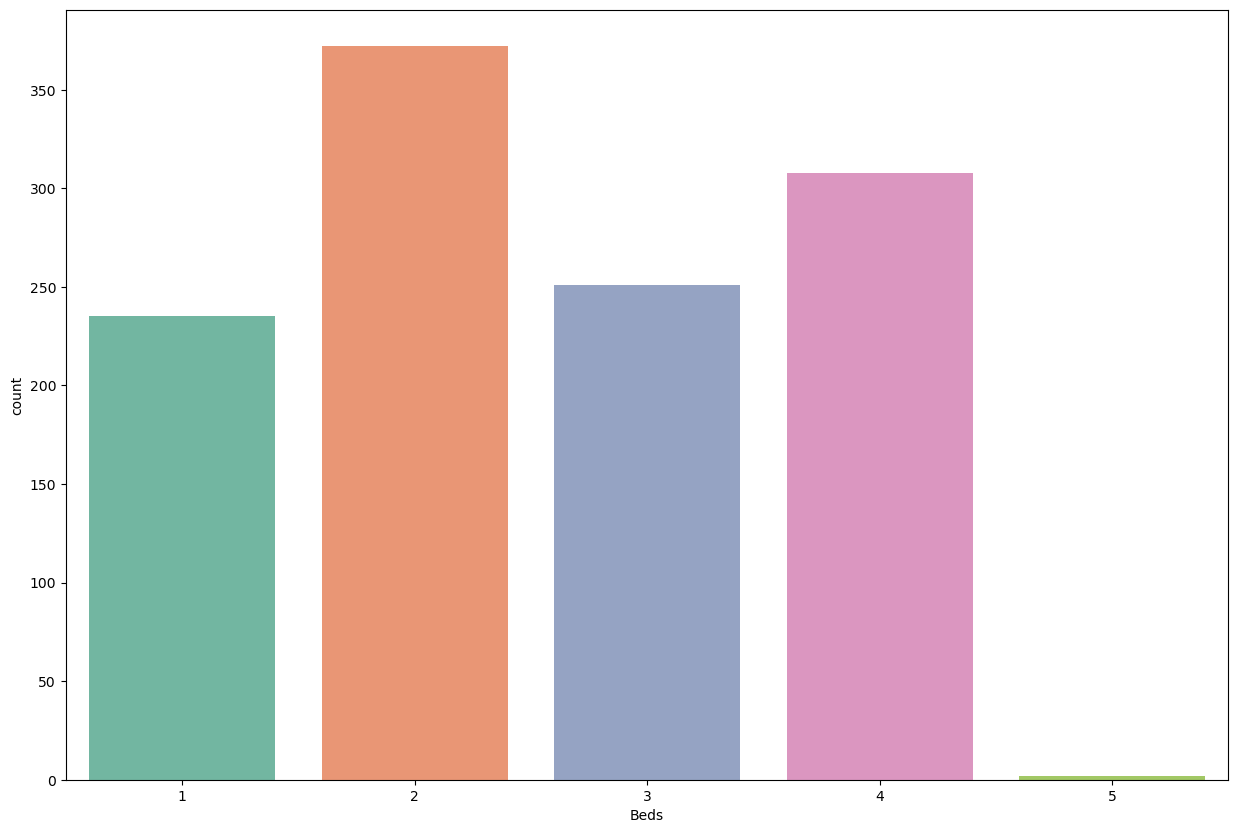

In [336]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Beds', data=df, palette='Set2')
plt.show()

Here, it's clear that most properties has 2 Beds .

Since BHK_type and Beds contain the same data, we will drop the Beds column.

In [337]:
df.drop('Beds', axis=1, inplace=True)

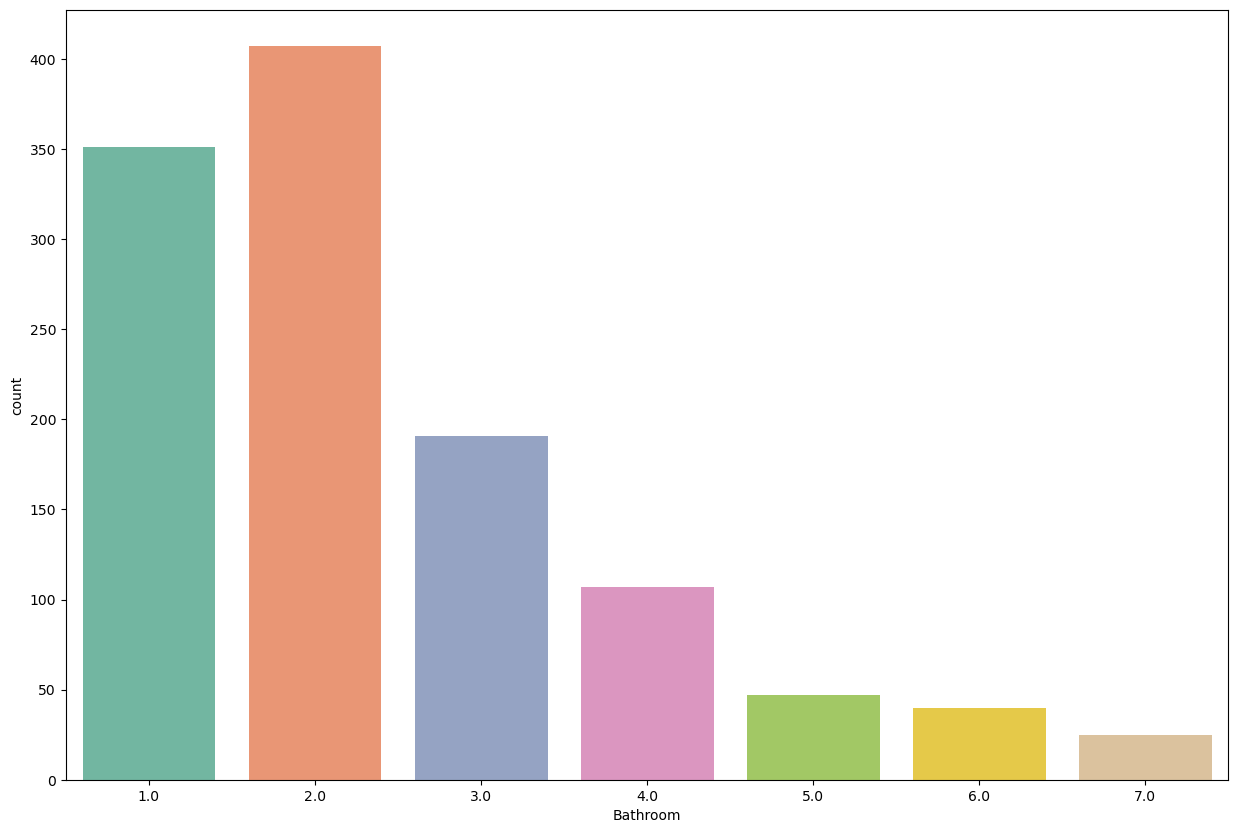

In [338]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Bathroom', data=df, palette='Set2')
plt.show()

Here, it's clear that most properties has 2 Bathroom .

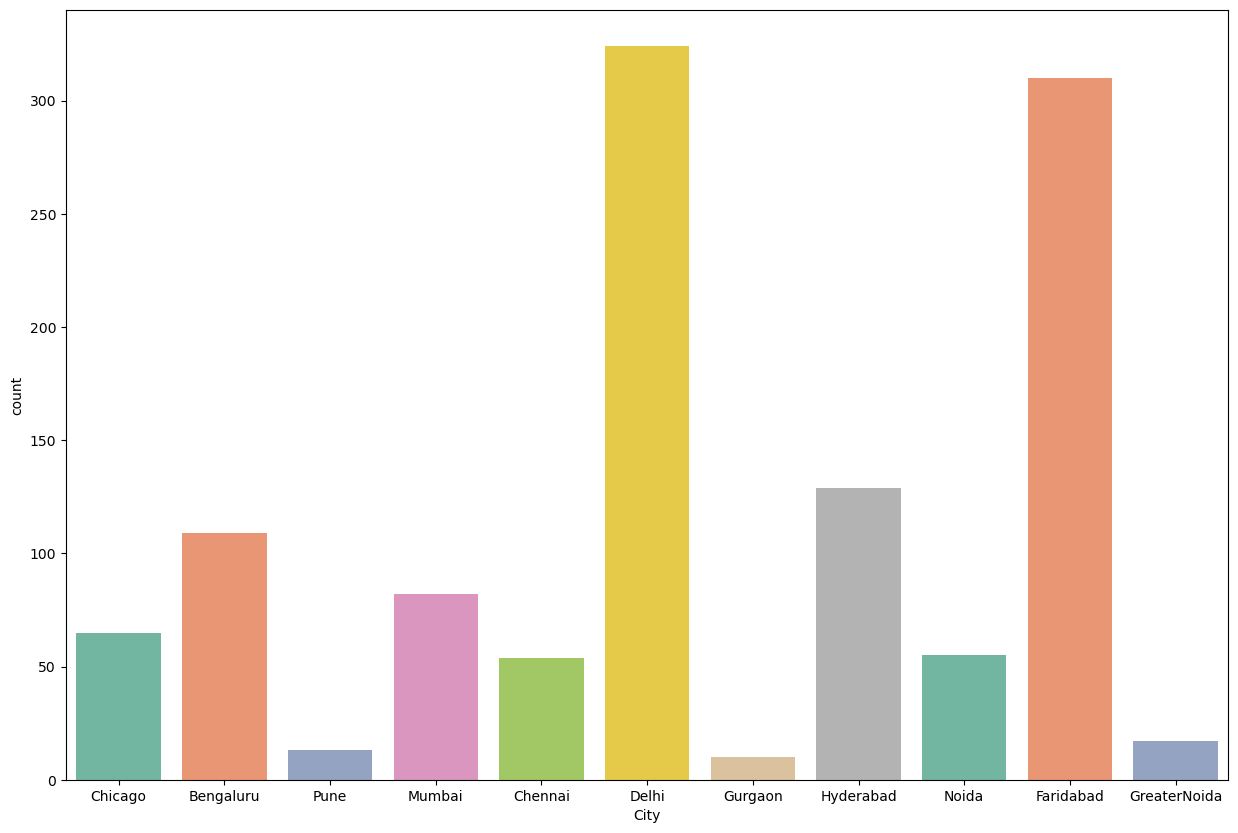

In [340]:
plt.figure(figsize=(15, 10))
sns.countplot(x='City', data=df, palette='Set2')
plt.show()

Delhi has the highest number of records, followed by Faridabad and Bengaluru in comparison to other cities.

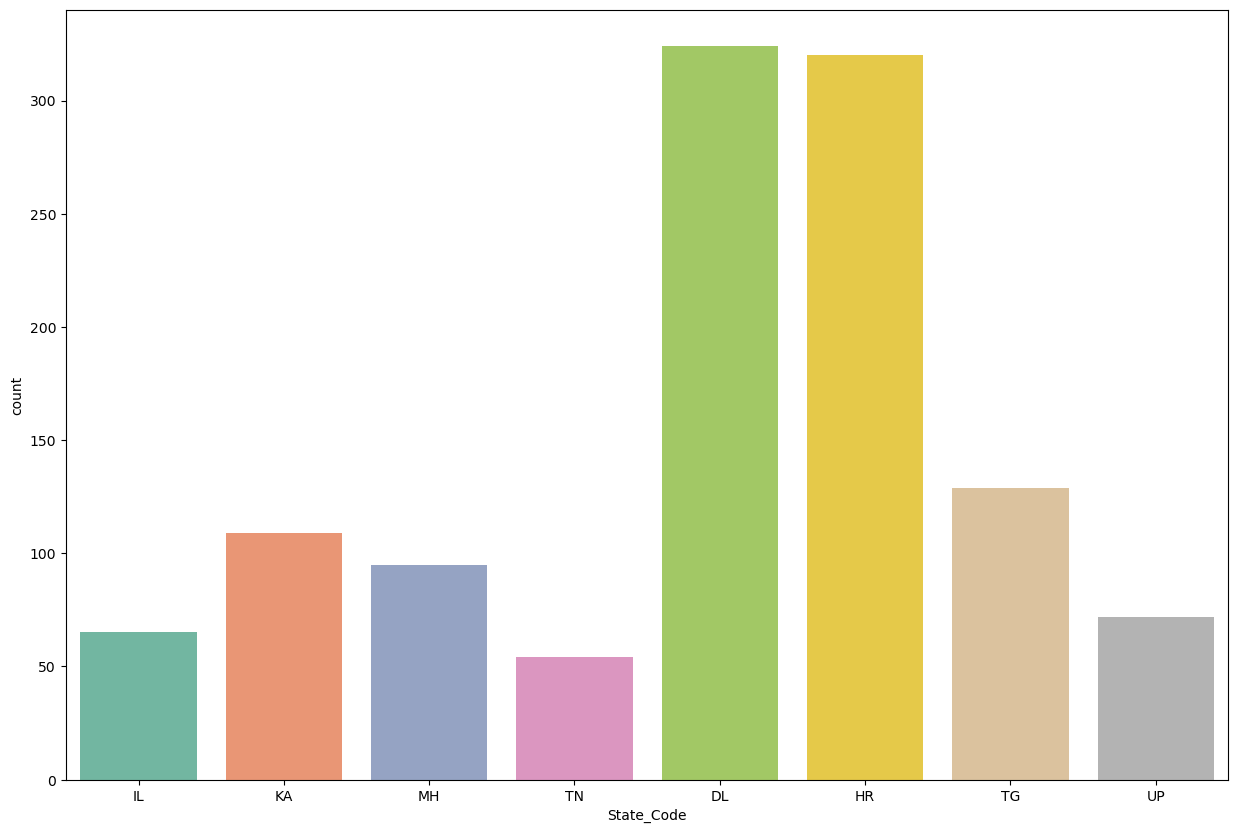

In [341]:
plt.figure(figsize=(15, 10))
sns.countplot(x='State_Code', data=df, palette='Set2')
plt.show()

DL has the highest number of records, followed by HR and TG in comparison to other State.

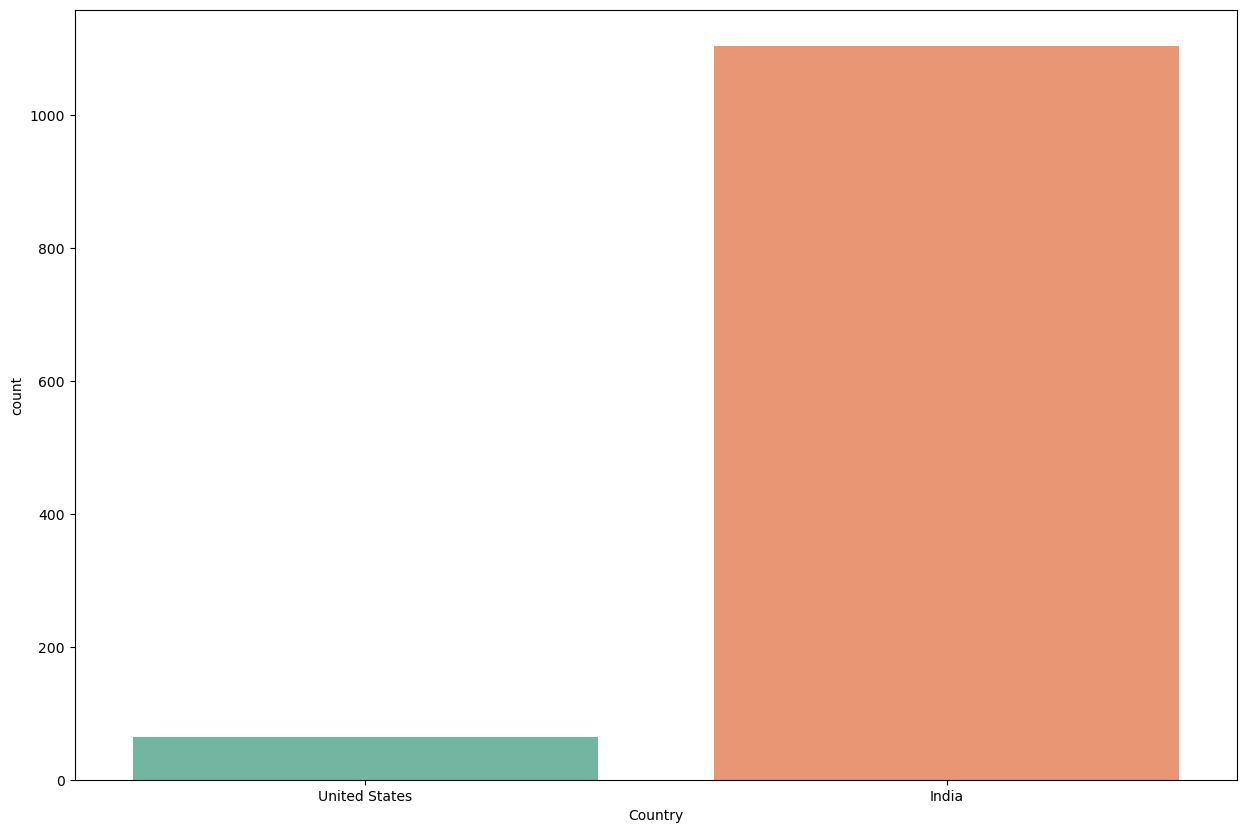

In [342]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Country', data=df, palette='Set2')
plt.show()

India has the highest number of records.

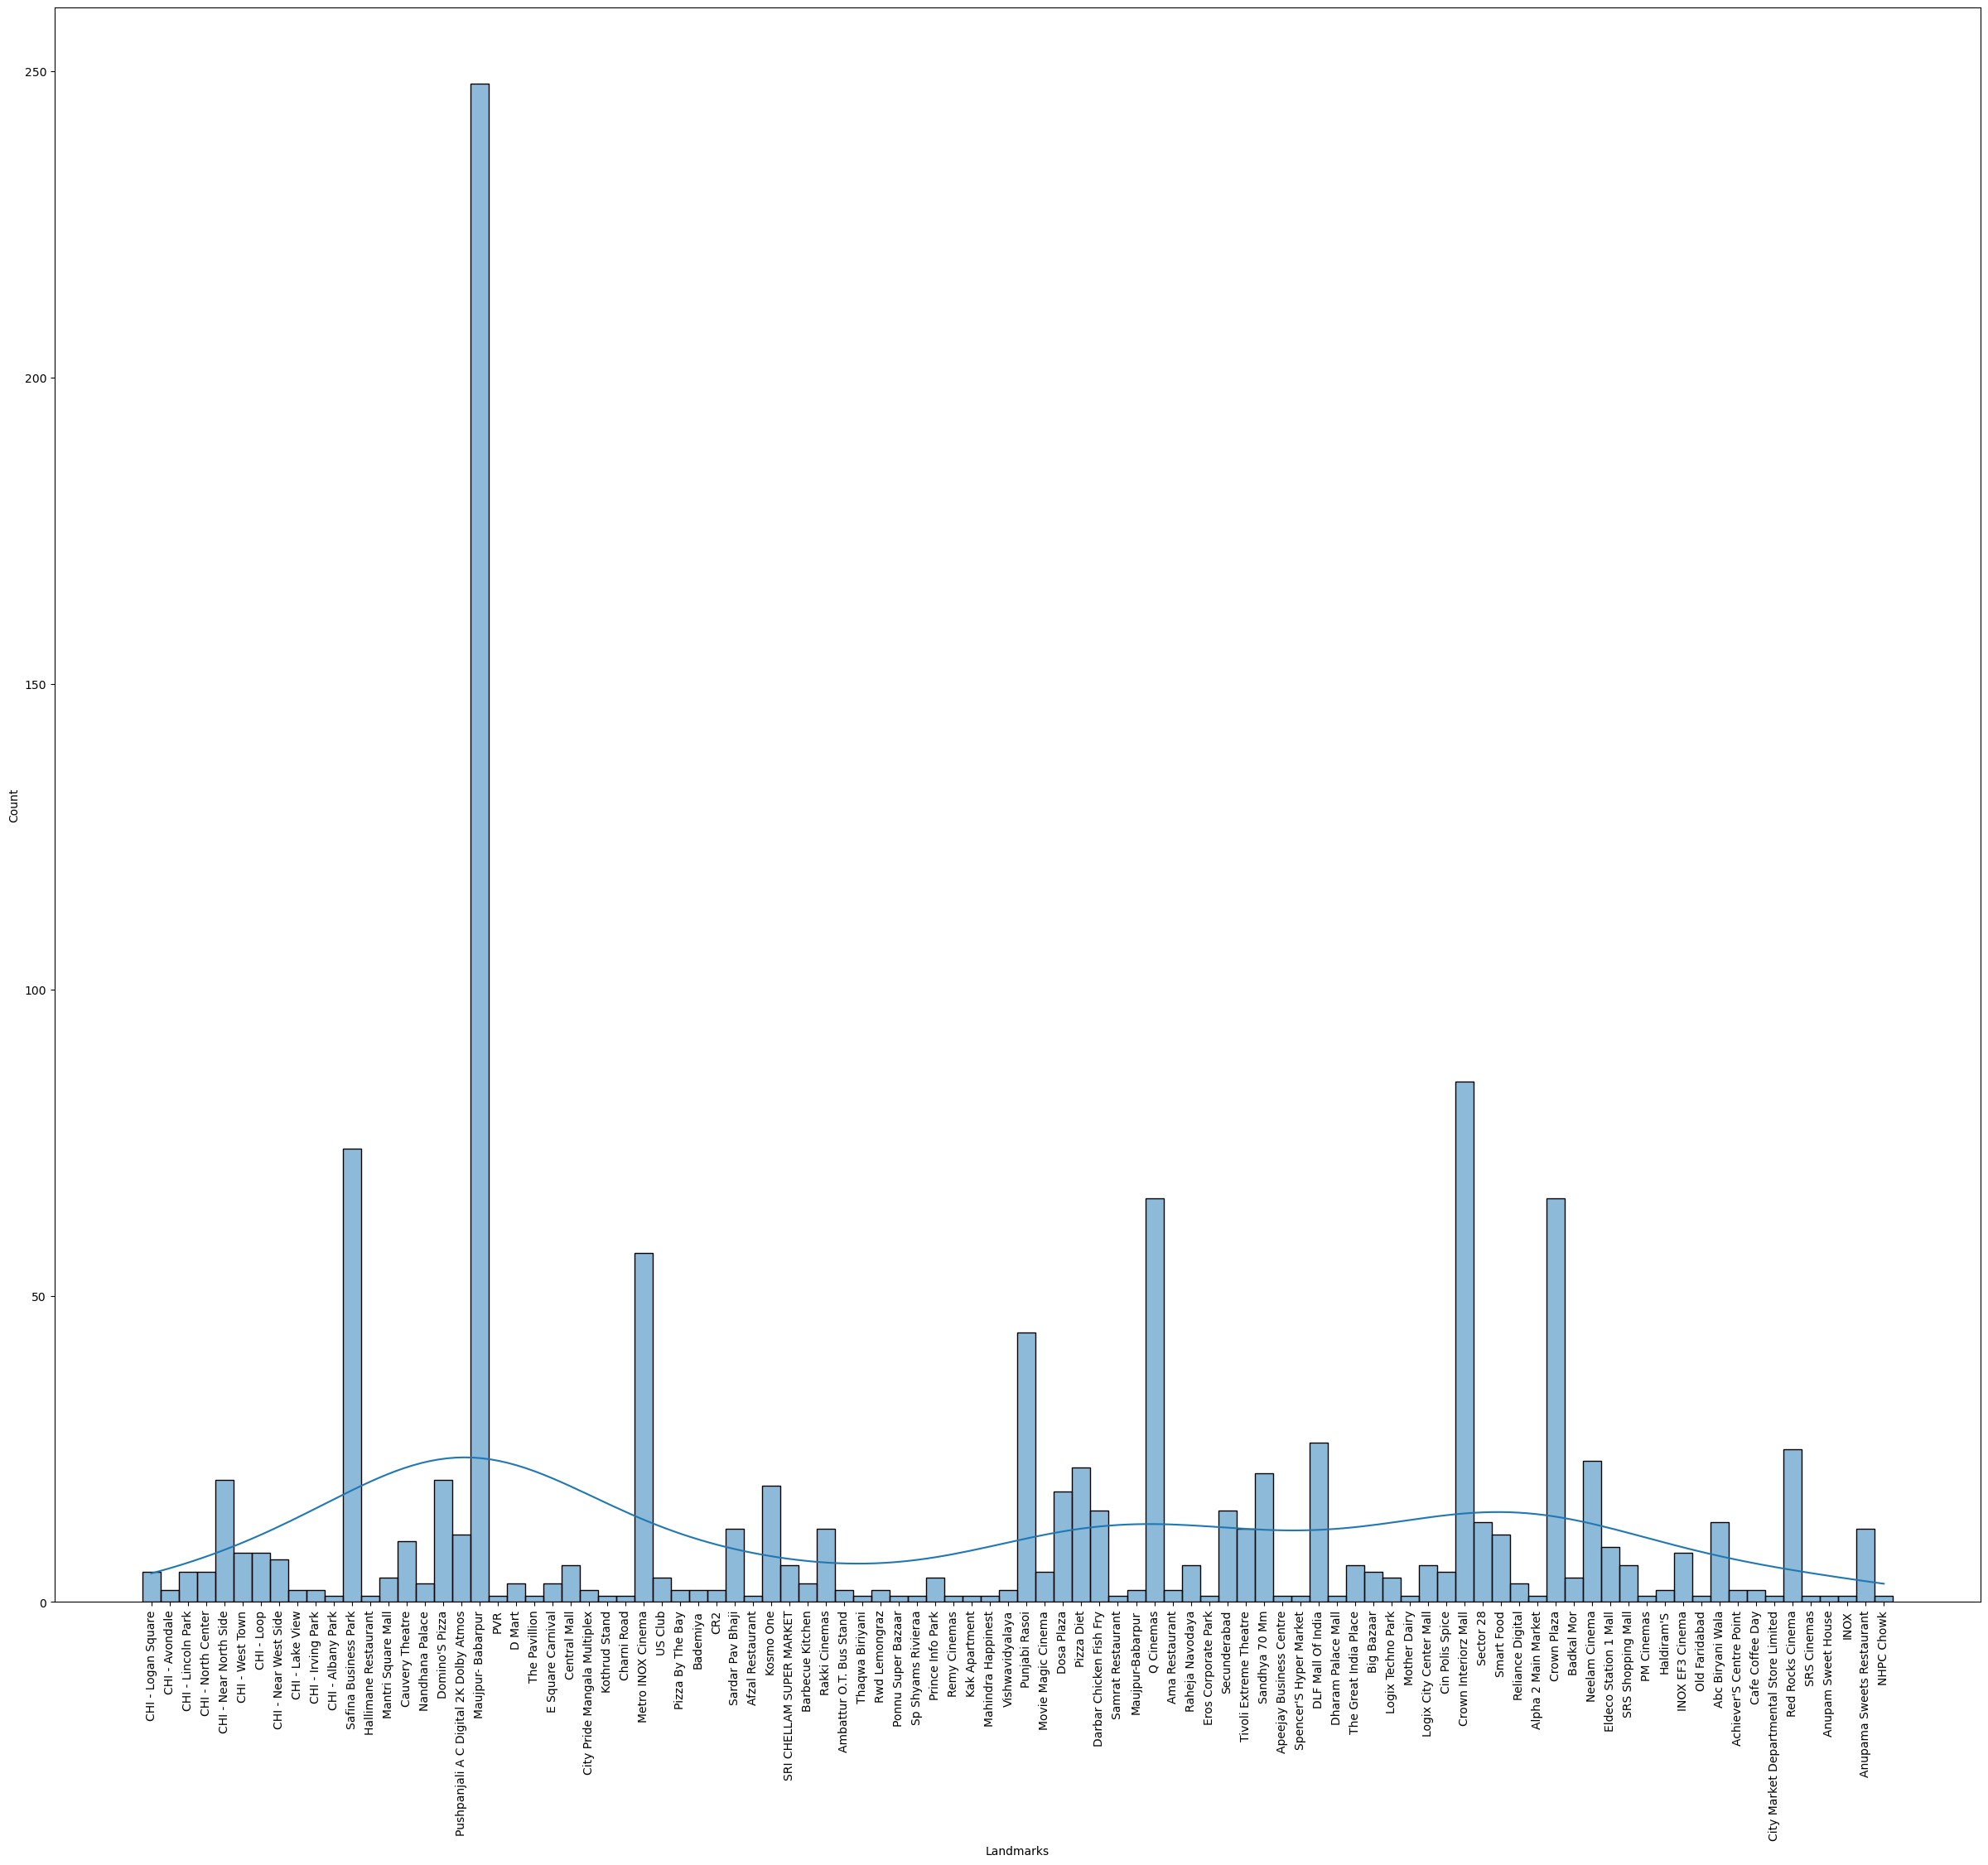

In [343]:
plt.figure(figsize=(30, 25))
sns.histplot(df['Landmarks'], kde=True)
plt.xticks(rotation=90)
plt.show()

Babarour has the highest number of landmarks.

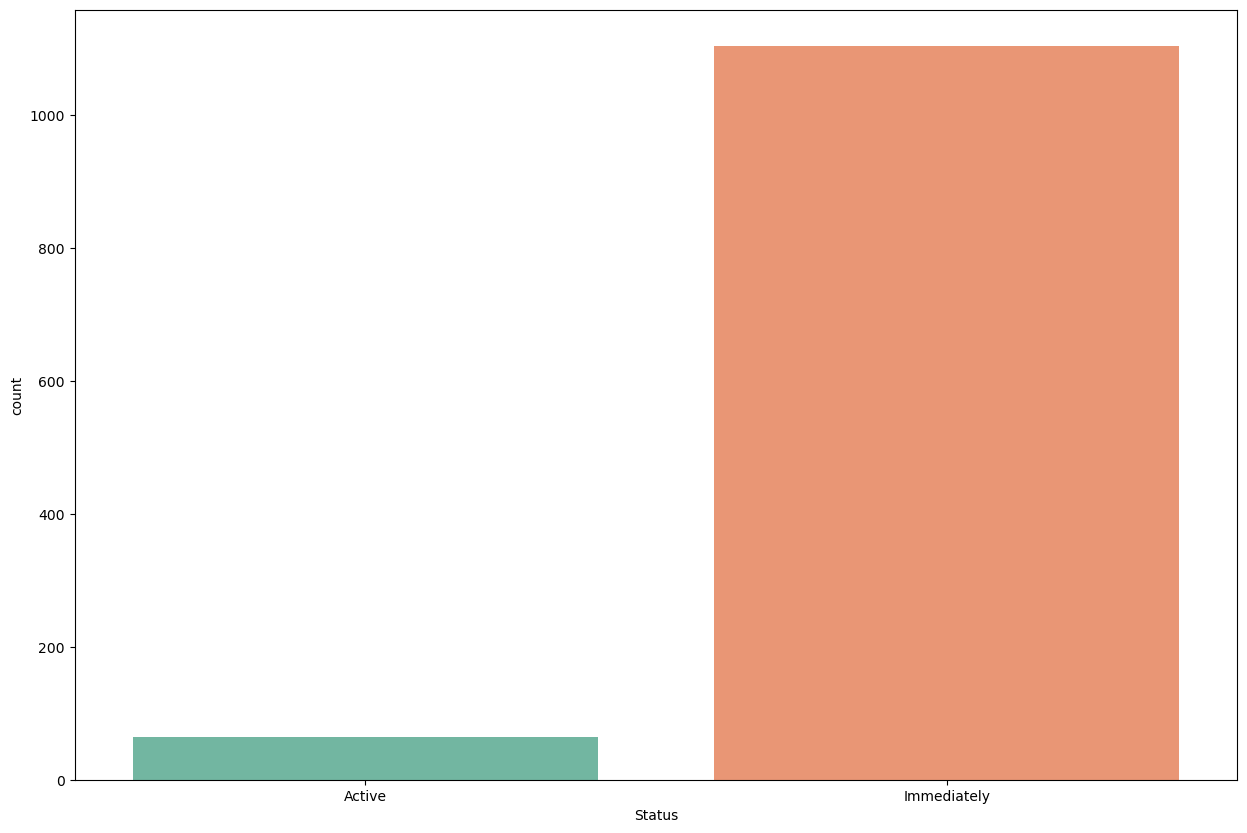

In [344]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Status', data=df, palette='Set2')
plt.show()

Imidiately has highest number of records.

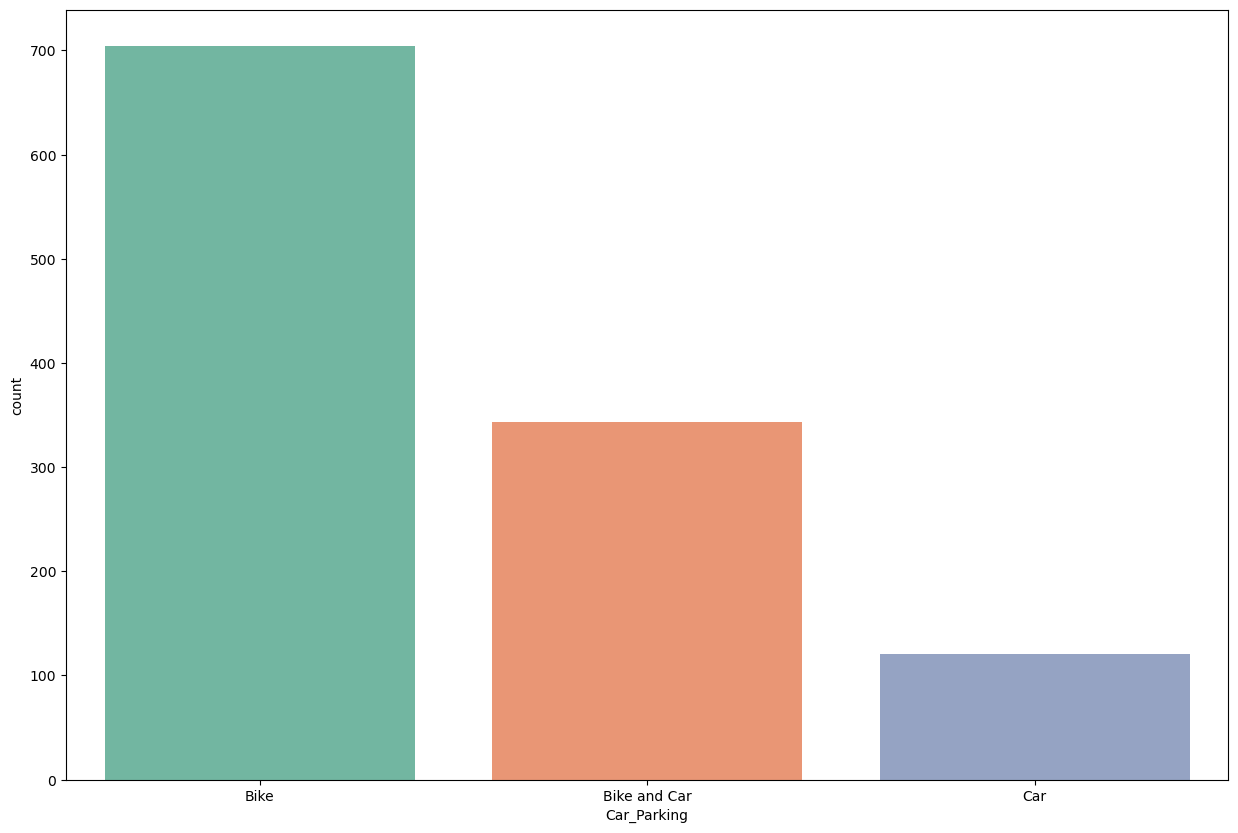

In [345]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Car_Parking', data=df, palette='Set2')
plt.show()

The 'Parking' column has the highest number of records for 'Bike'

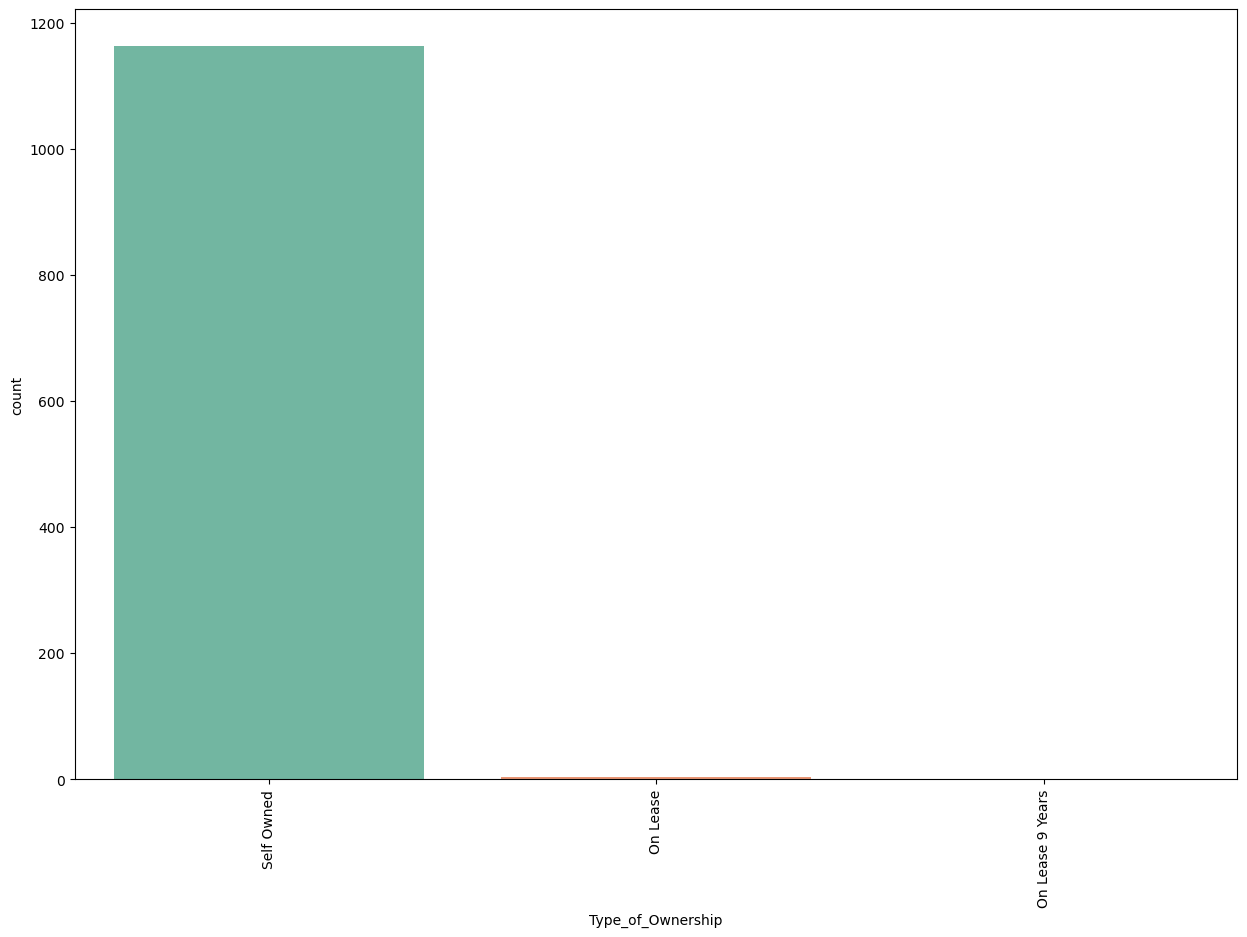

In [346]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Type_of_Ownership', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [347]:
df['Type_of_Ownership'].value_counts()

Type_of_Ownership
Self Owned          1163
On Lease               4
On Lease 9 Years       1
Name: count, dtype: int64

almost allrecords in the Type_of_Ownership column are Self Owned, so we will drop this column.

In [348]:
df.drop('Type_of_Ownership', axis=1, inplace=True)

# 2.Bivariate Analysis-

In [352]:
df.columns

Index(['BHK_type', 'Property_Type', 'Bathroom', 'City', 'State_Code',
       'Country', 'Landmarks', 'Status', 'Car_Parking', 'Buy_Total_Price'],
      dtype='object')

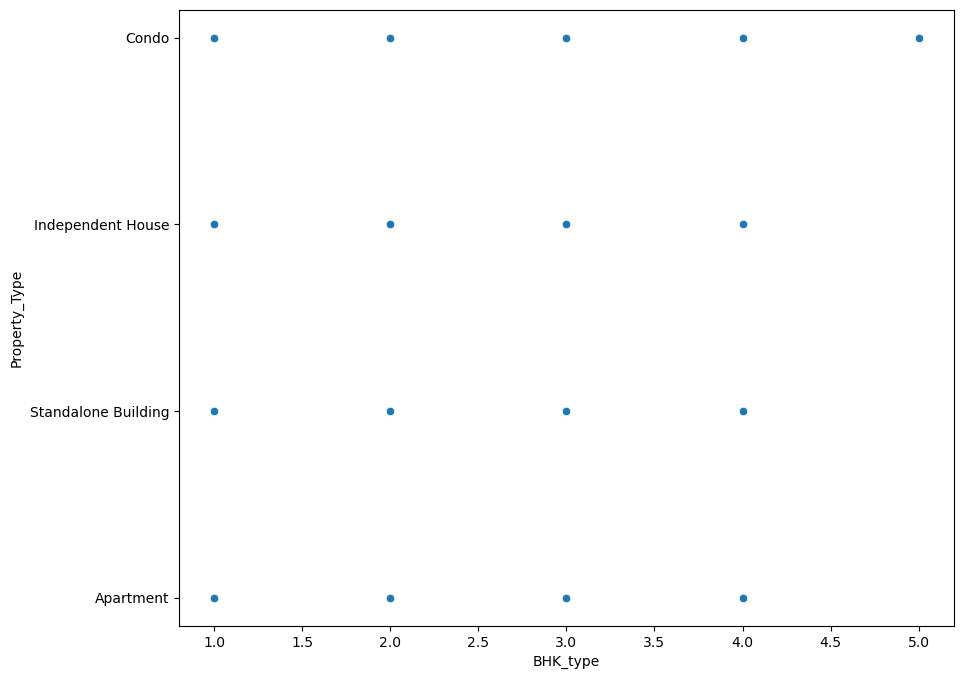

In [356]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='BHK_type', y='Property_Type', data=df)
plt.show()

Cando type properties have only 5 BHK.

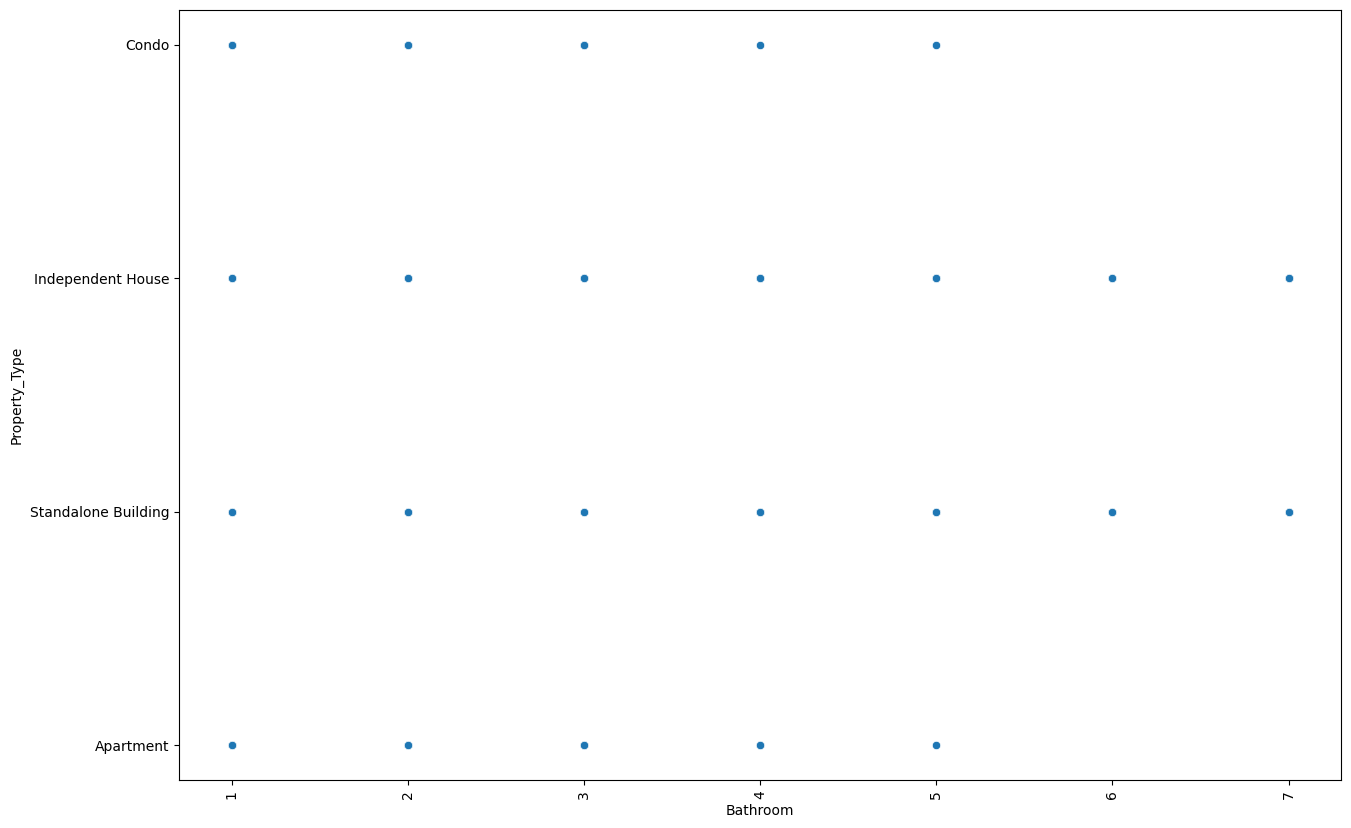

In [358]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Bathroom', y='Property_Type', data=df)
plt.xticks(rotation=90)
plt.show()

Only independent and standalone houses have 6 to 7 bathrooms.

<Axes: xlabel='City', ylabel='Property_Type'>

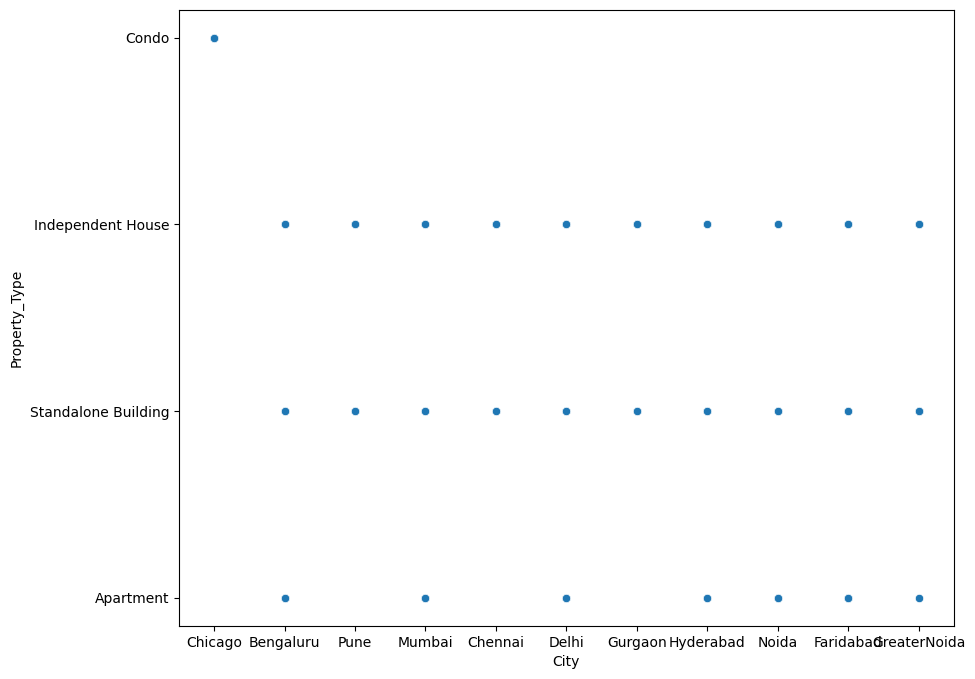

In [359]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='City', y='Property_Type', data=df)

Chicago only has condo type properties, while other locations do not.

<Axes: xlabel='State_Code', ylabel='Property_Type'>

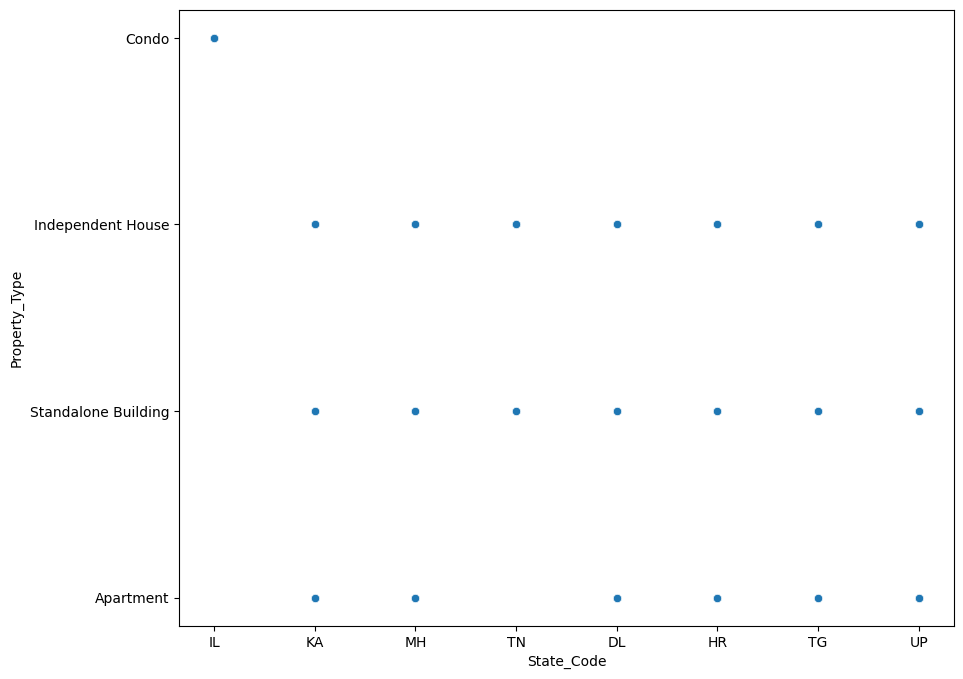

In [360]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='State_Code', y='Property_Type', data=df)

IL only has condo type properties, while other State do not.

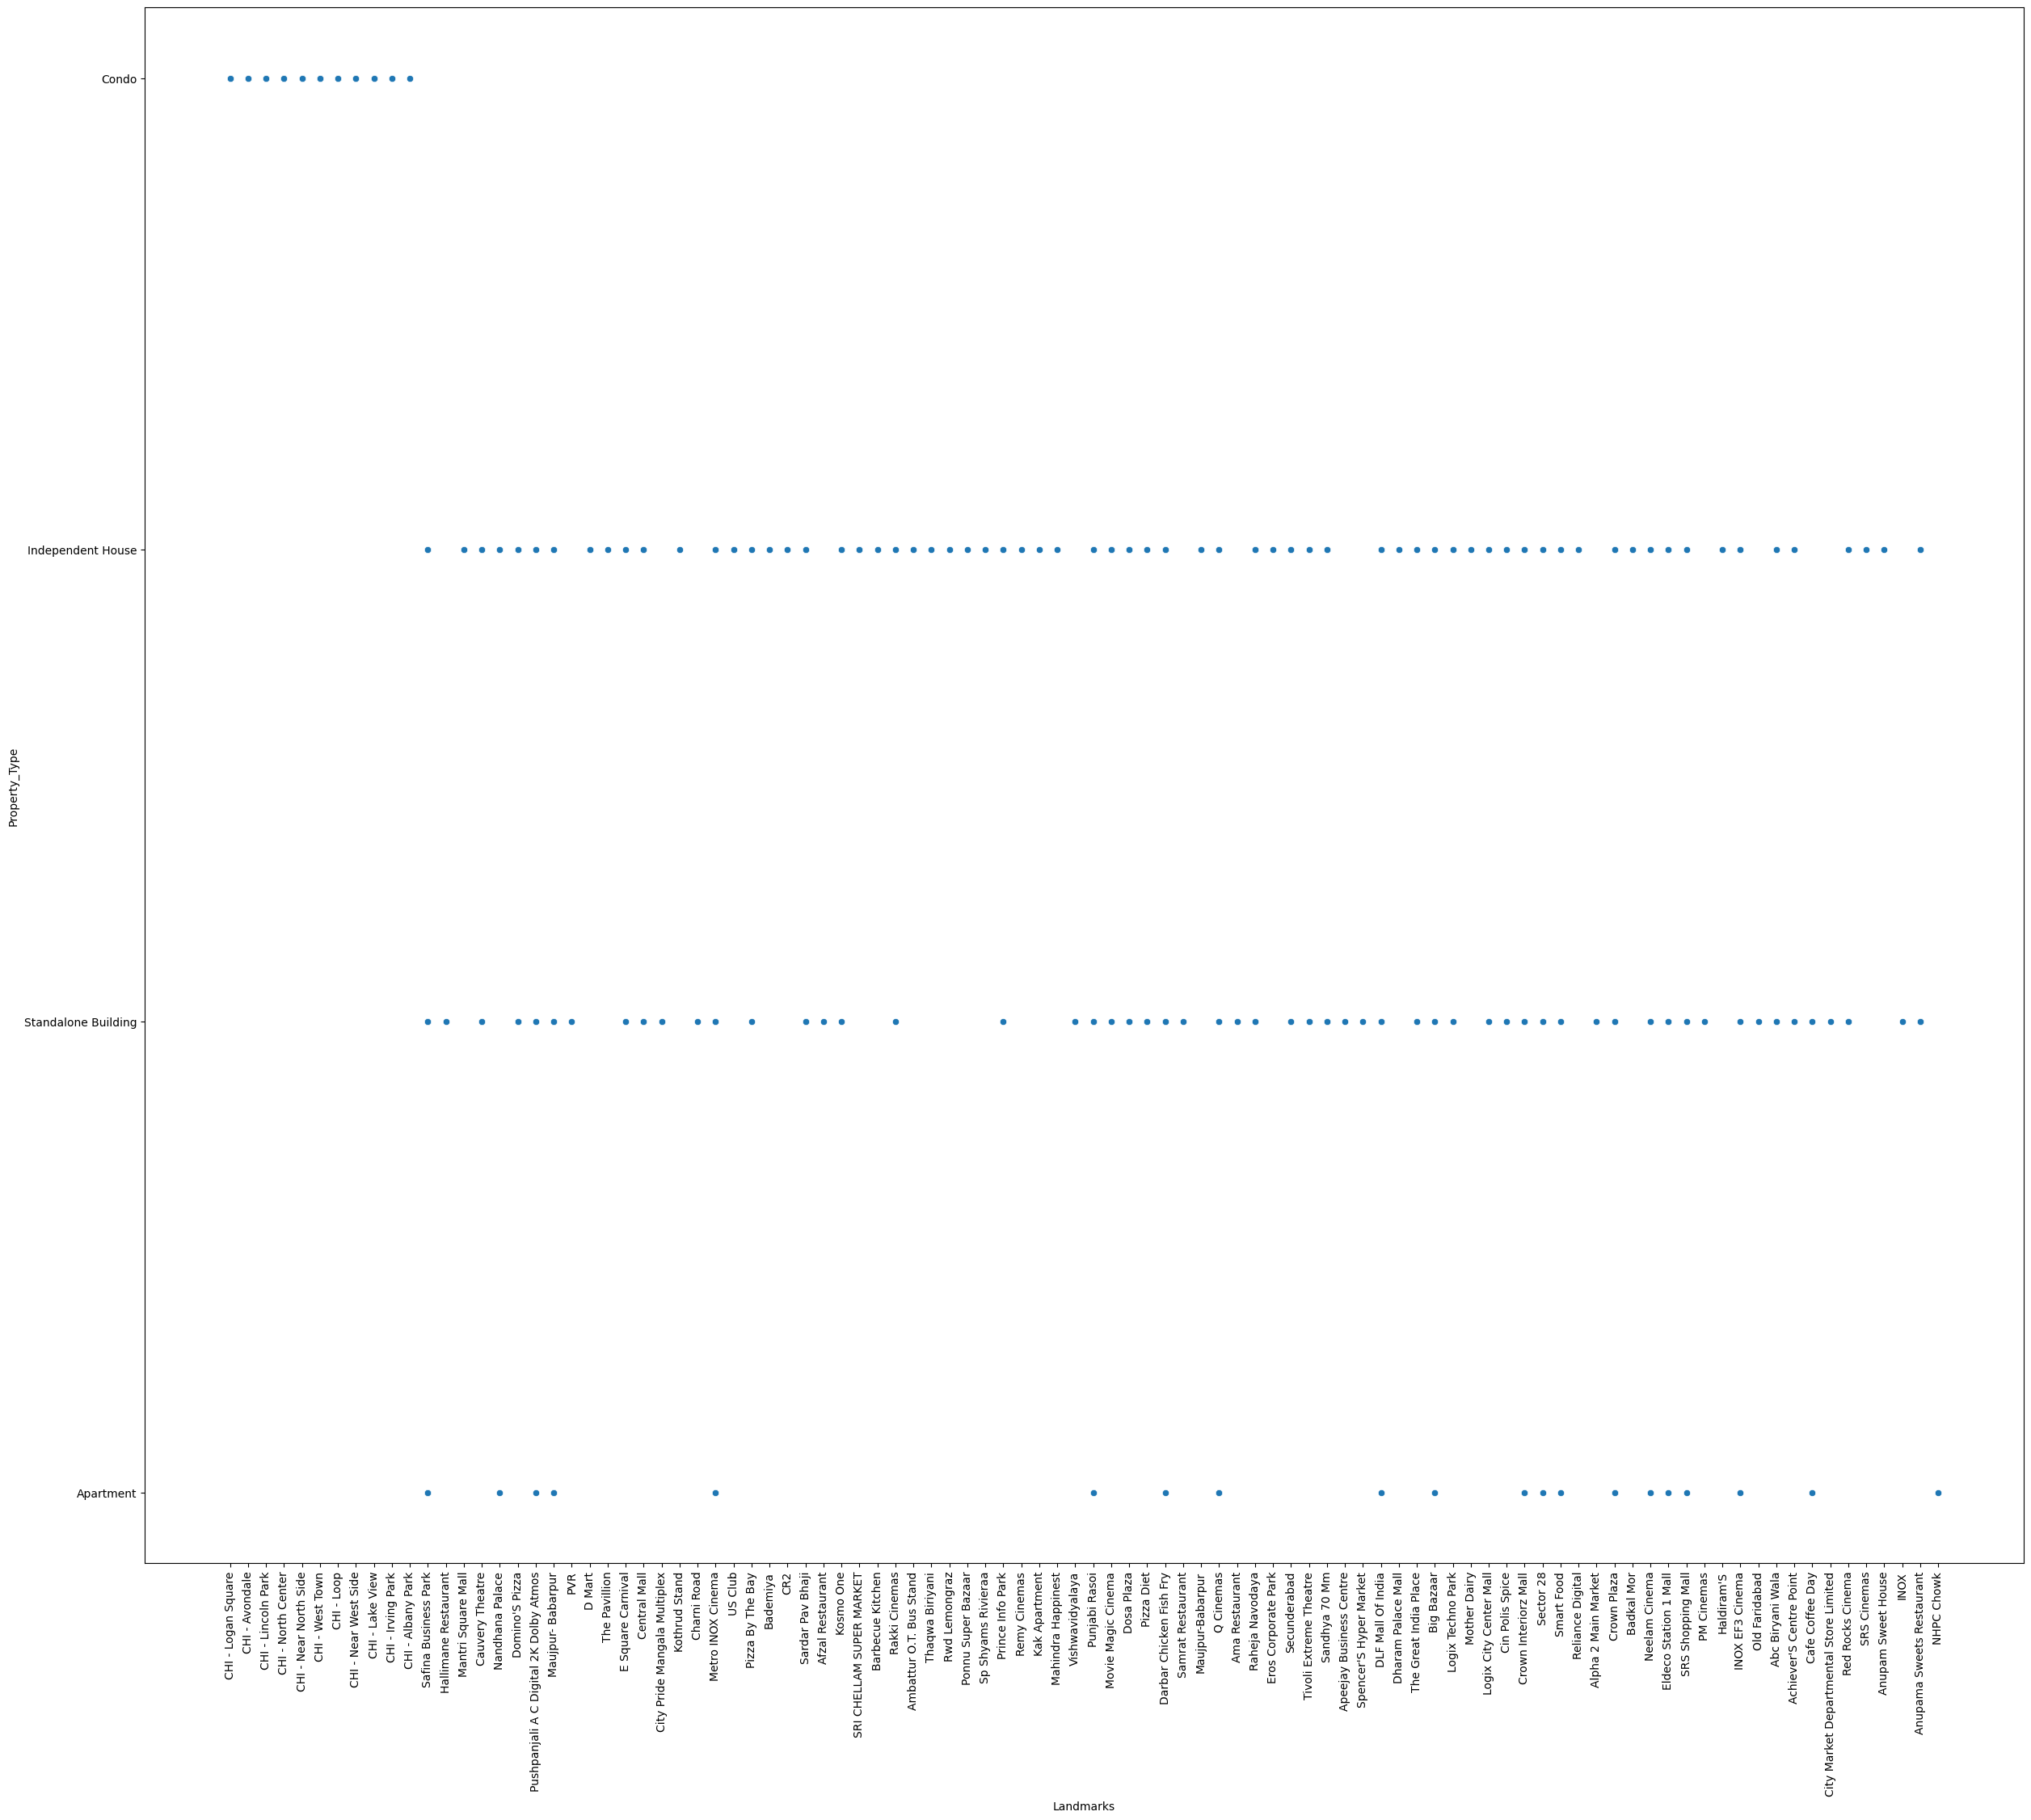

In [361]:
plt.figure(figsize=(30, 25))
sns.scatterplot(x='Landmarks', y='Property_Type', data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Car_Parking', ylabel='Property_Type'>

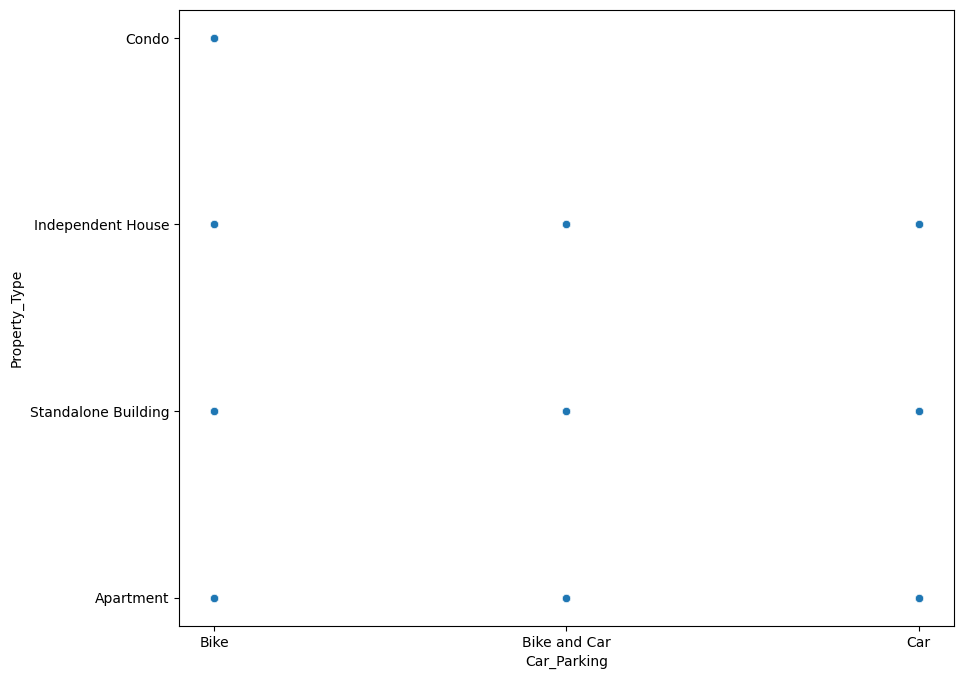

In [362]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Car_Parking', y='Property_Type', data=df)

Condos have only bike parking.

<Axes: xlabel='Country', ylabel='Property_Type'>

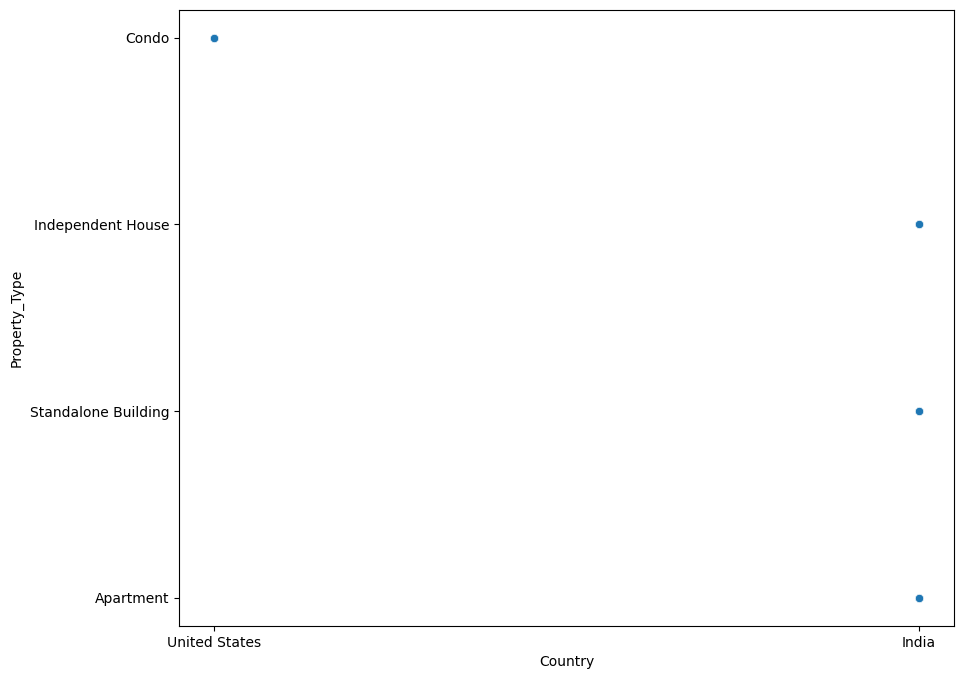

In [365]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Country', y='Property_Type', data=df)

Condo property type is only found in the United States, not in India.

<Axes: xlabel='Buy_Total_Price', ylabel='Property_Type'>

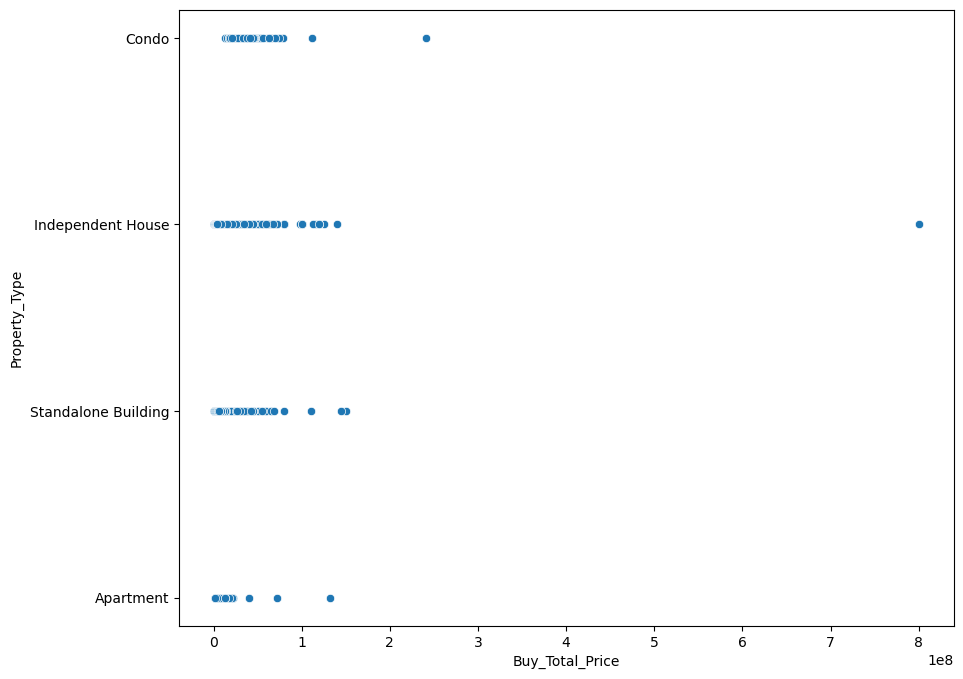

In [366]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Buy_Total_Price', y='Property_Type', data=df)

Independent house properties have a higher total buy price compared to others.

# 3.Multivariate analysis-

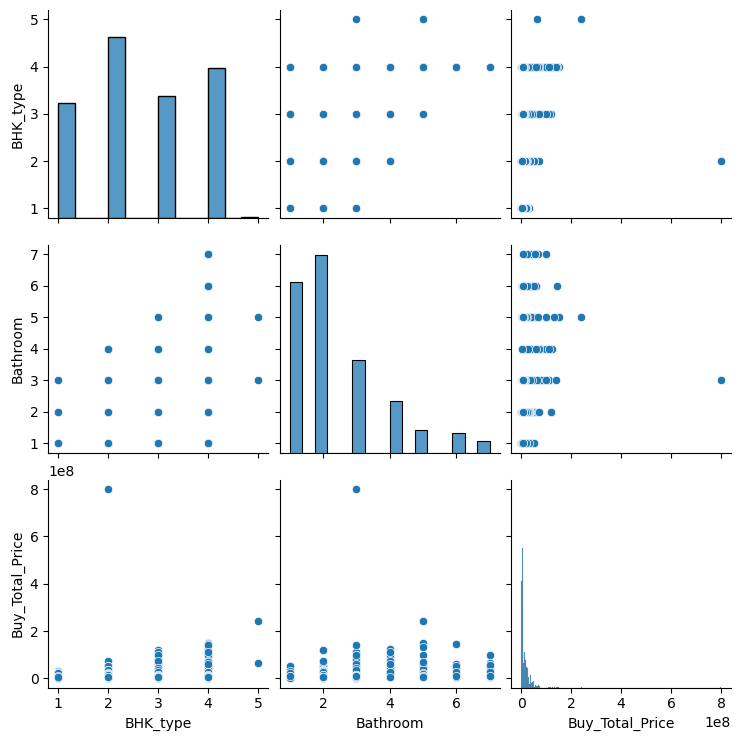

In [367]:
sns.pairplot(df)

In [368]:
num_col = []

for i in df.columns:
    if df[i].dtype == 'float64' or df[i].dtype == 'int64':
        num_col.append(i)

In [369]:
num_col


['BHK_type', 'Bathroom', 'Buy_Total_Price']

In [370]:
cat_col=[]

for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)

In [371]:
cat_col

['Property_Type',
 'City',
 'State_Code',
 'Country',
 'Landmarks',
 'Status',
 'Car_Parking']

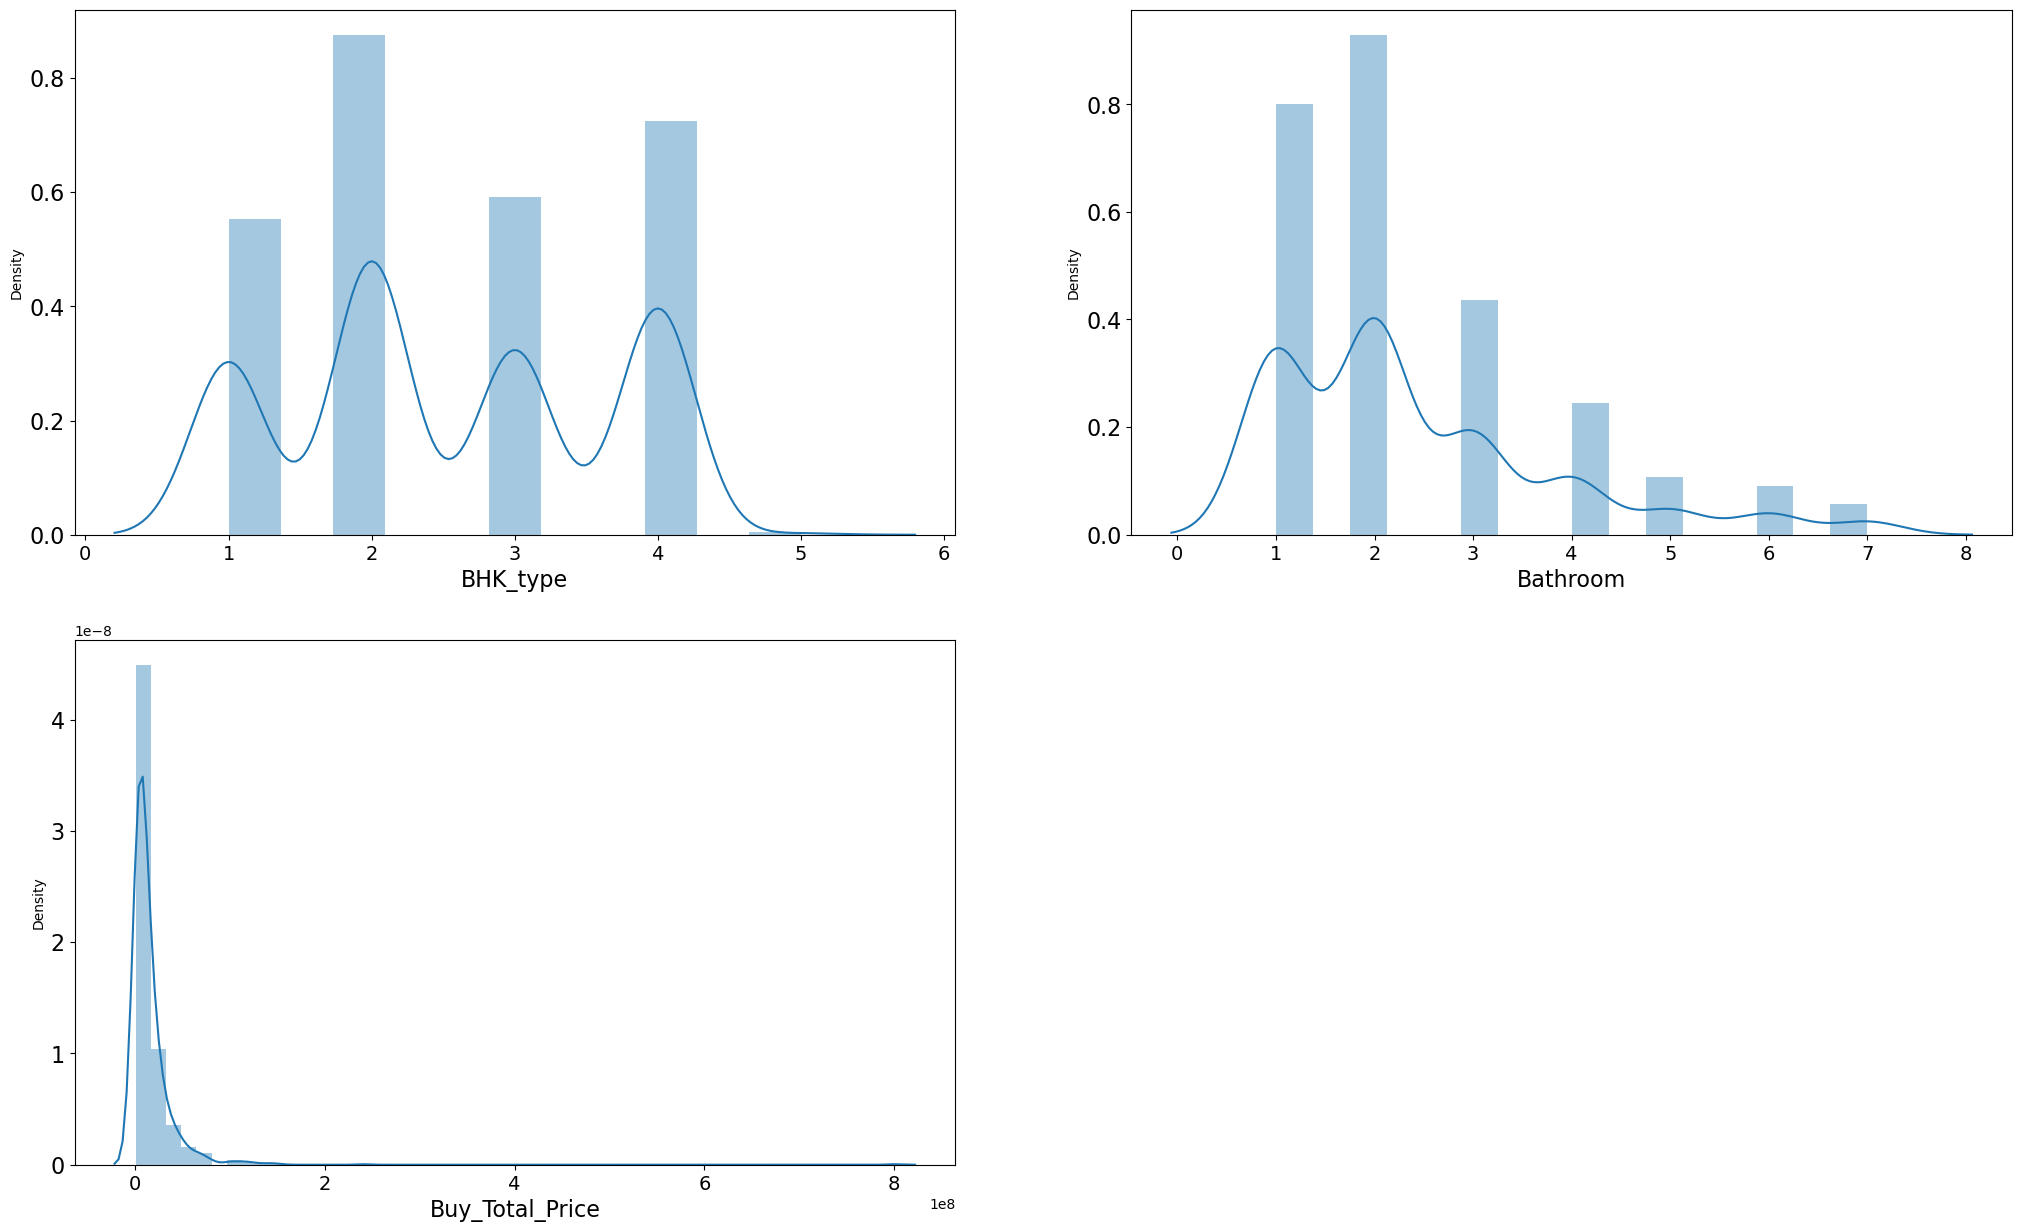

In [372]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<10:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()   

In [373]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numeric_columns].skew()
print(skewness)

BHK_type            0.046308
Bathroom            1.271371
Buy_Total_Price    15.736579
dtype: float64


We are only concerned with addressing skewness in the Buy_Total_Price column, as the other columns are categorical.

# Approach_SKEW-I:- Cube root method to remove skewness

In [375]:
columns_to_transform = ['Buy_Total_Price']
df[columns_to_transform] = df[columns_to_transform].apply(np.cbrt)

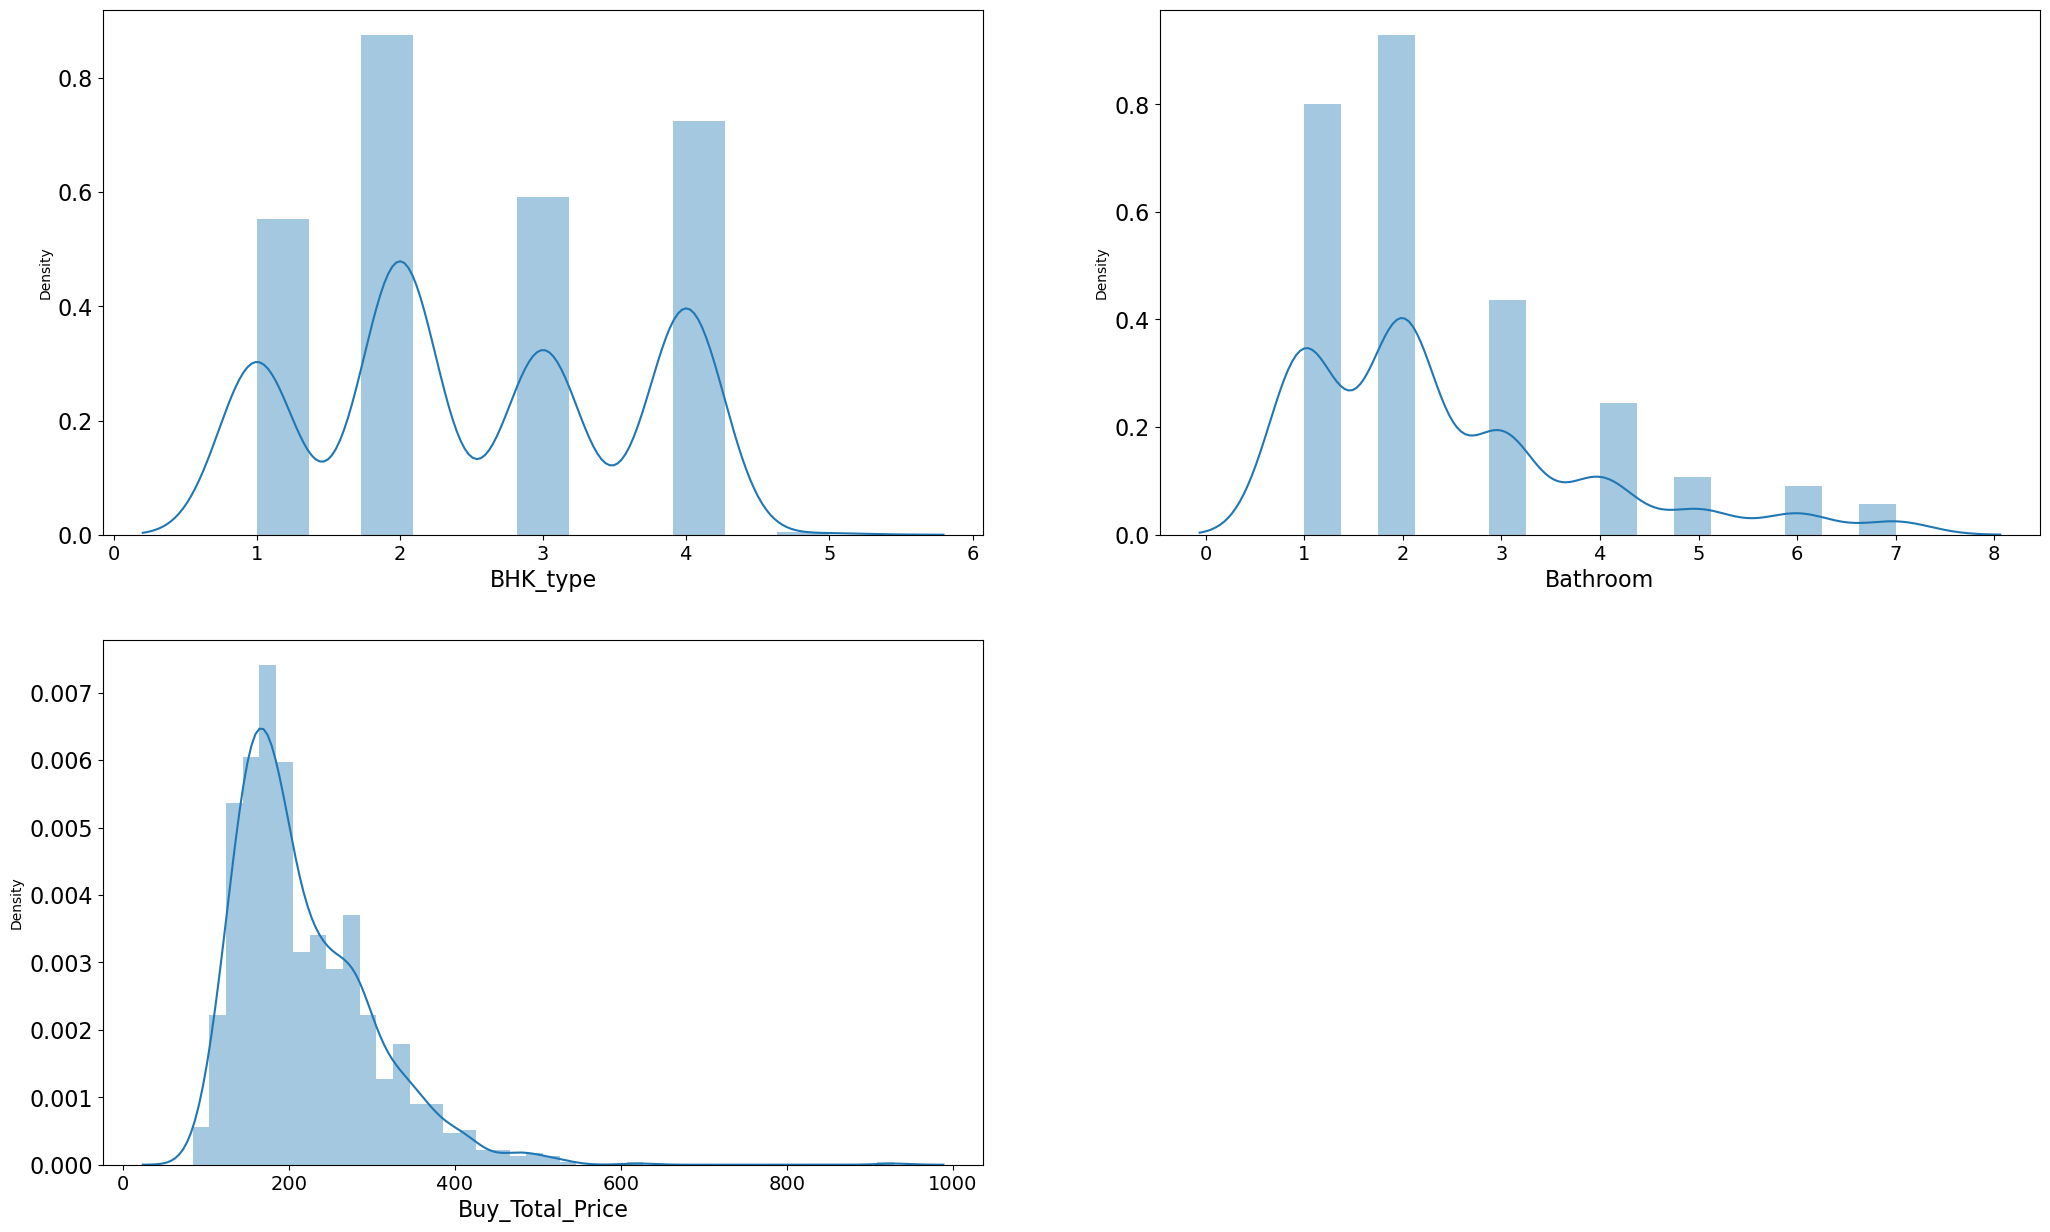

In [376]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<10:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show() 

# Approach_SKEW-II:-Skewness removal through Power transformer-

In [377]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

features = ['Buy_Total_Price']
x = PowerTransformer(method='yeo-johnson') 

df[features] = pd.DataFrame(x.fit_transform(df[features].values))

In [378]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numeric_columns].skew()
print(skewness)

BHK_type           0.046308
Bathroom           1.271371
Buy_Total_Price    0.021235
dtype: float64


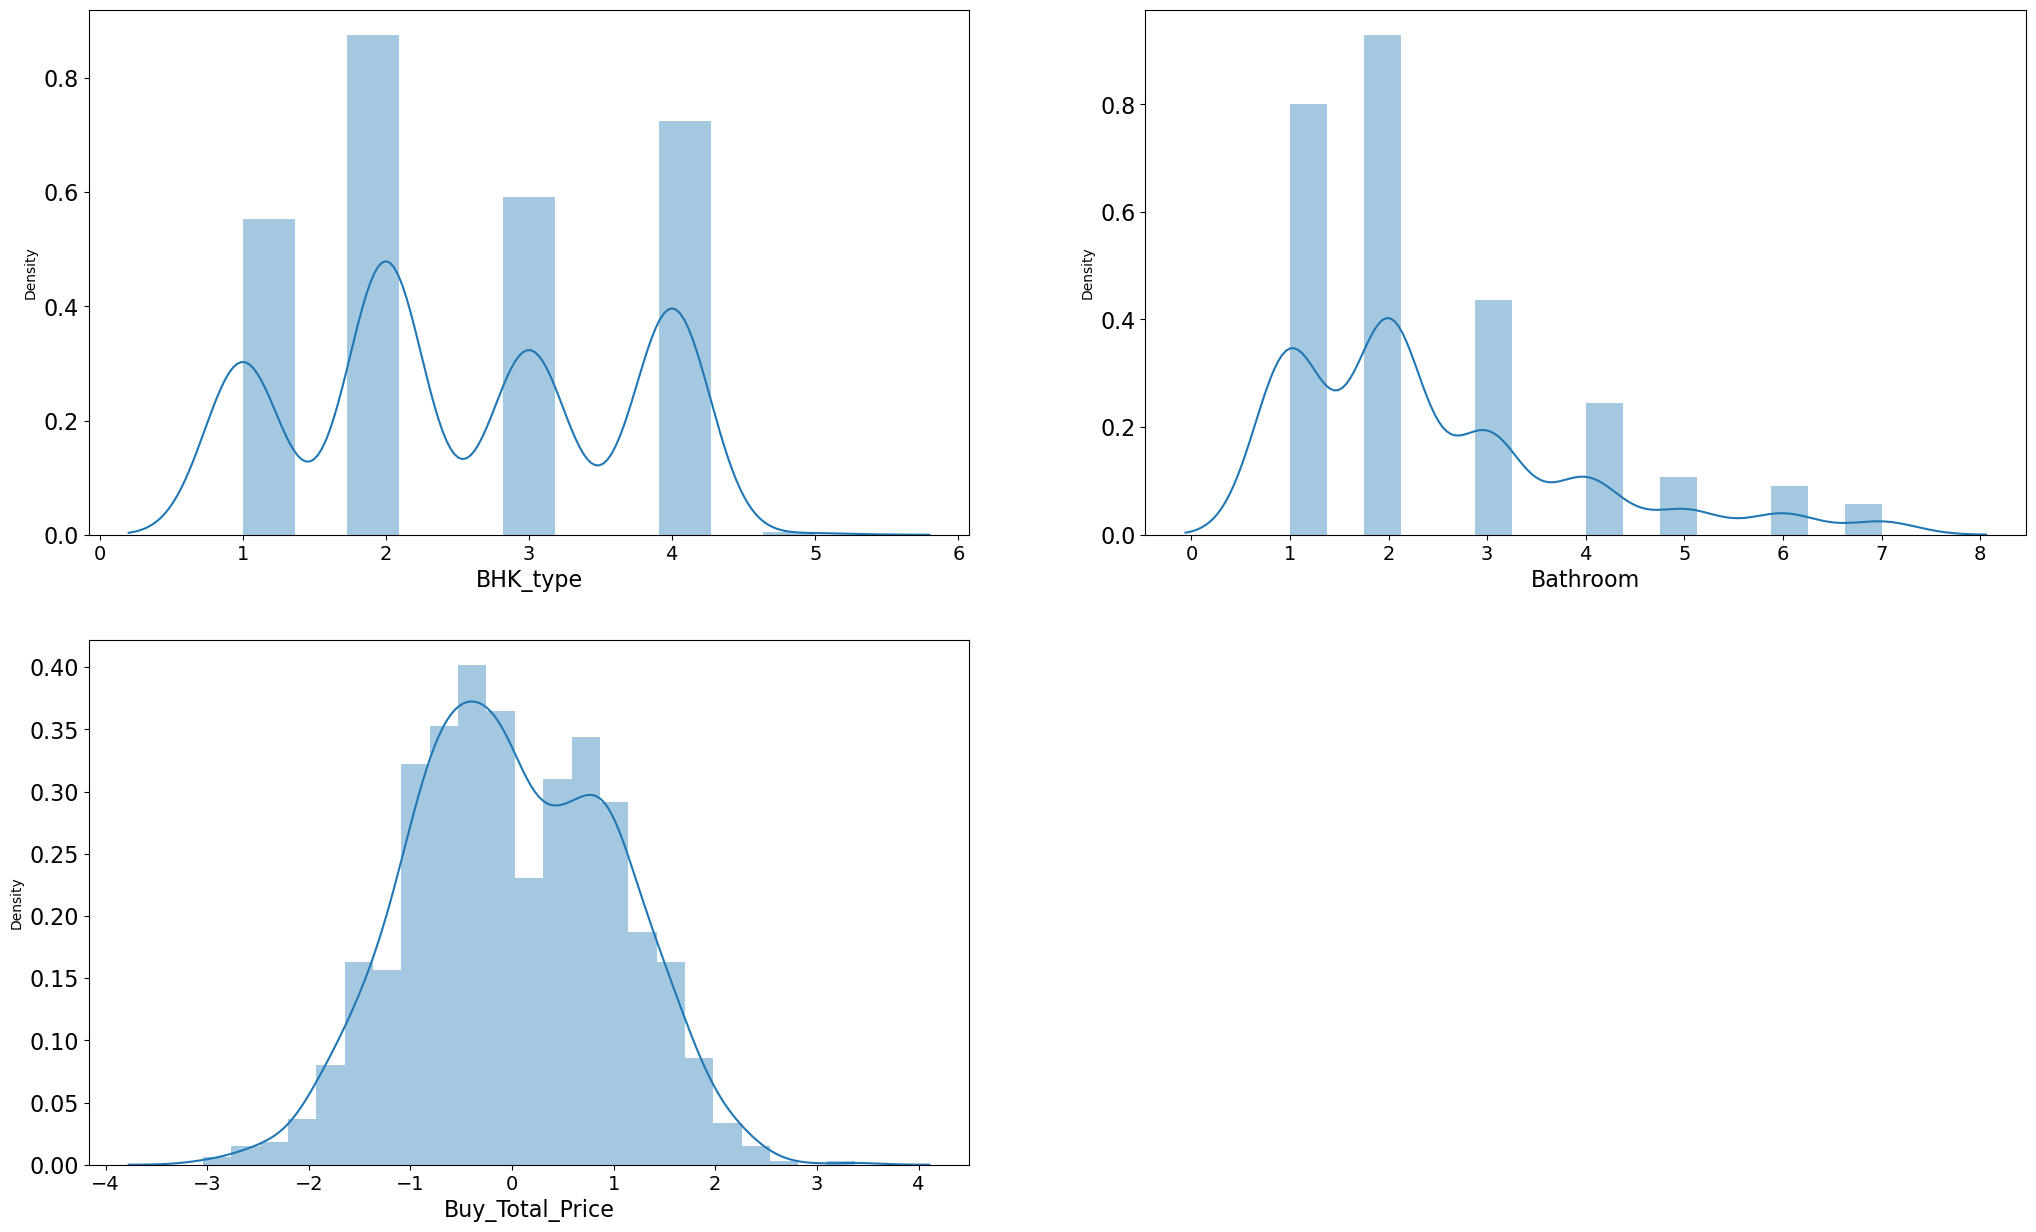

In [379]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<10:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show() 

With the implementation of the power transformer method, the skewness has been effectively eliminated.

# Outliers

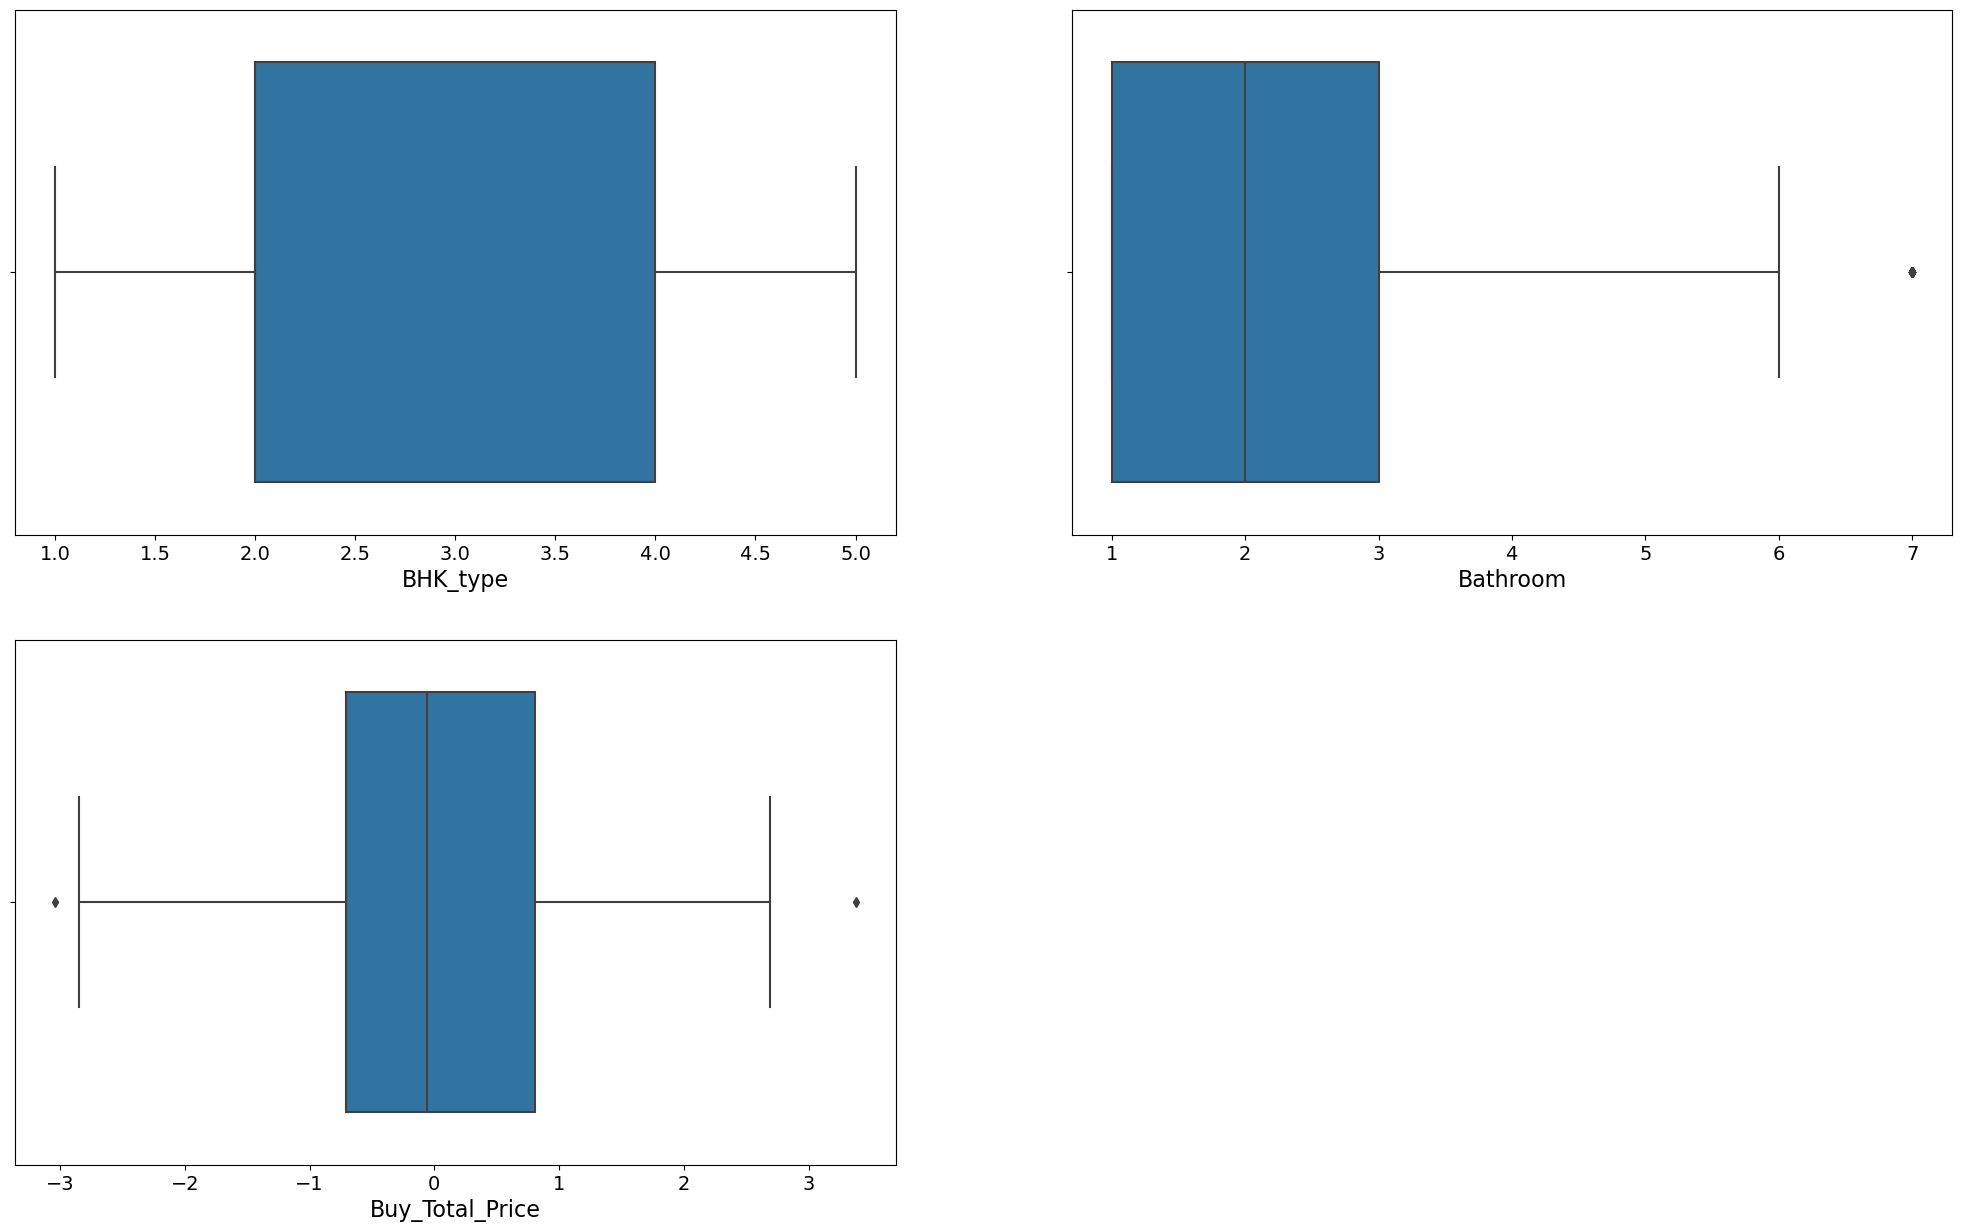

In [381]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<=10:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()  

# Removing outliers using the IQR method.

In [382]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate quartiles
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)

# Calculate interquartile range (IQR)
IQR = q3 - q1

# Calculate upper and lower bounds for outliers
# upper_bound = q3 + (1.5 * IQR)
# lower_bound = q1 - (1.5 * IQR)

In [383]:
Bathroom_high=(q3['Bathroom']+(1.5*IQR['Bathroom']))


index=np.where(df['Bathroom']> Bathroom_high)

df=df.drop(df.index[index])

In [384]:
high_Buy_Total_Price=(q3['Buy_Total_Price']+(1.5*IQR['Buy_Total_Price']))


index=np.where(df['Buy_Total_Price']> high_Buy_Total_Price)

df=df.drop(df.index[index])

In [385]:
Buy_Total_Price_low = q1['Buy_Total_Price'] - (1.5 * IQR['Buy_Total_Price'])

index = np.where(df['Buy_Total_Price'] < Buy_Total_Price_low)


df = df.drop(df.index[index])

In [386]:
df.reset_index()

index  BHK_type        Property_Type  Bathroom       City State_Code  \
0         0         3                Condo       2.0    Chicago         IL   
1         1         4                Condo       3.0    Chicago         IL   
2         2         2                Condo       2.0    Chicago         IL   
3         3         3                Condo       2.0    Chicago         IL   
4         4         3                Condo       1.0    Chicago         IL   
...     ...       ...                  ...       ...        ...        ...   
1136   1163         4  Standalone Building       5.0  Faridabad         HR   
1137   1164         3    Independent House       1.0  Faridabad         HR   
1138   1165         1    Independent House       2.0  Faridabad         HR   
1139   1166         3  Standalone Building       2.0  Faridabad         HR   
1140   1167         3  Standalone Building       2.0  Faridabad         HR   

            Country                  Landmarks       Status   Car_Parking  \
0     United States         CHI - Logan Square       Active          Bike   
1     United States             CHI - Avondale       Active          Bike   
2     United States         CHI - Lincoln Park       Active          Bike   
3     United States         CHI - Logan Square       Active          Bike   
4     United States         CHI - North Center       Active          Bike   
...             ...                        ...          ...           ...   
1136          India          Maujpur- Babarpur  Immediately          Bike   
1137          India       Crown Interiorz Mall  Immediately           Car   
1138          India       Crown Interiorz Mall  Immediately          Bike   
1139          India  Anupama Sweets Restaurant  Immediately  Bike and Car   
1140          India          Maujpur- Babarpur  Immediately  Bike and Car   

      Buy_Total_Price  
0            1.486139  
1            1.598553  
2            1.247291  
3            1.598681  
4            0.996811  
...               ...  
1136        -0.204004  
1137         0.003167  
1138        -0.857042  
1139        -0.374927  
1140        -0.204004  

[1141 rows x 11 columns]

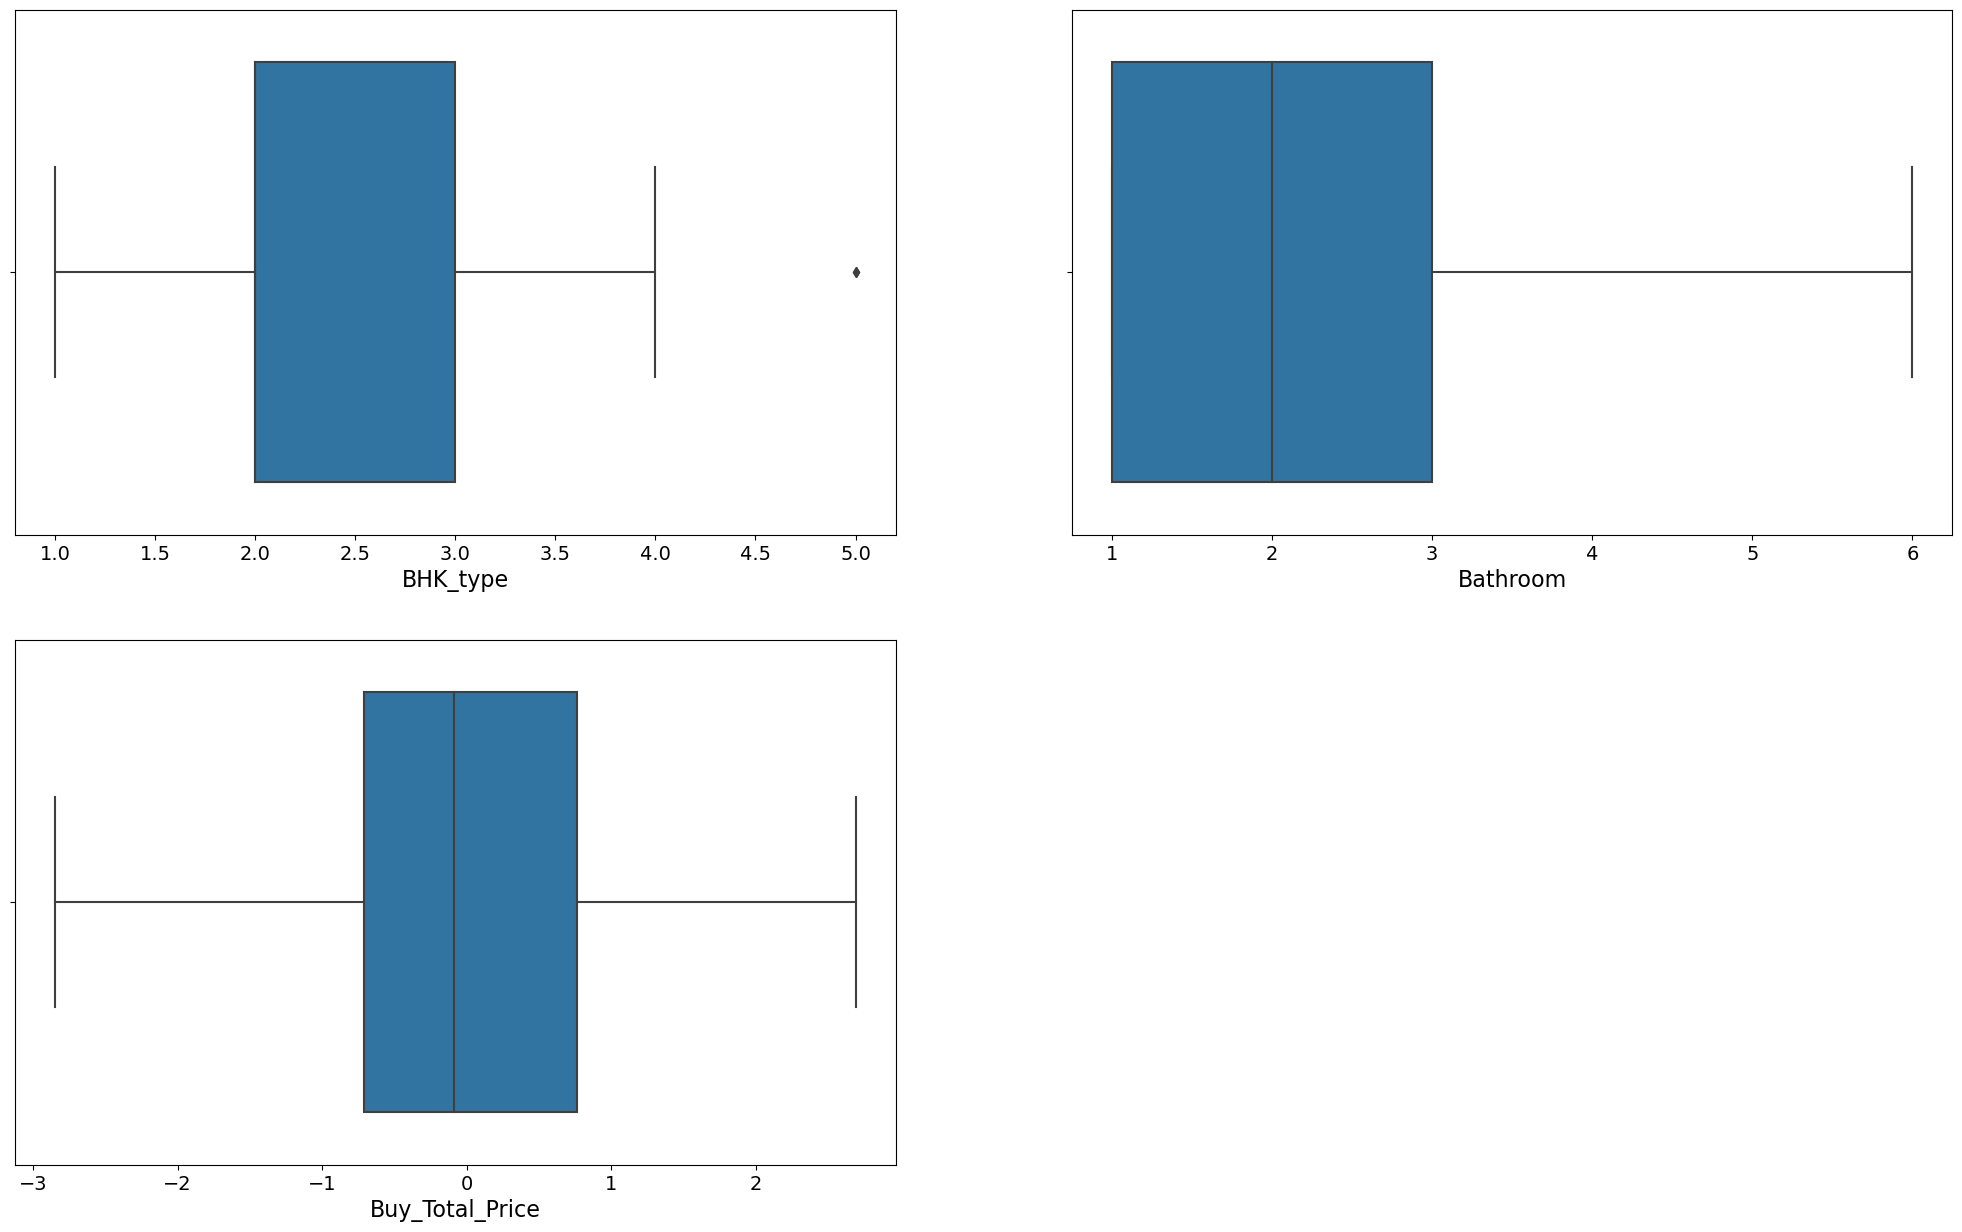

In [387]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<=10:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()   

We have successfully removed outliers using the Interquartile Range (IQR) method with minimal loss of data.

In [388]:
df

BHK_type        Property_Type  Bathroom       City State_Code  \
0            3                Condo       2.0    Chicago         IL   
1            4                Condo       3.0    Chicago         IL   
2            2                Condo       2.0    Chicago         IL   
3            3                Condo       2.0    Chicago         IL   
4            3                Condo       1.0    Chicago         IL   
...        ...                  ...       ...        ...        ...   
1163         4  Standalone Building       5.0  Faridabad         HR   
1164         3    Independent House       1.0  Faridabad         HR   
1165         1    Independent House       2.0  Faridabad         HR   
1166         3  Standalone Building       2.0  Faridabad         HR   
1167         3  Standalone Building       2.0  Faridabad         HR   

            Country                  Landmarks       Status   Car_Parking  \
0     United States         CHI - Logan Square       Active          Bike   
1     United States             CHI - Avondale       Active          Bike   
2     United States         CHI - Lincoln Park       Active          Bike   
3     United States         CHI - Logan Square       Active          Bike   
4     United States         CHI - North Center       Active          Bike   
...             ...                        ...          ...           ...   
1163          India          Maujpur- Babarpur  Immediately          Bike   
1164          India       Crown Interiorz Mall  Immediately           Car   
1165          India       Crown Interiorz Mall  Immediately          Bike   
1166          India  Anupama Sweets Restaurant  Immediately  Bike and Car   
1167          India          Maujpur- Babarpur  Immediately  Bike and Car   

      Buy_Total_Price  
0            1.486139  
1            1.598553  
2            1.247291  
3            1.598681  
4            0.996811  
...               ...  
1163        -0.204004  
1164         0.003167  
1165        -0.857042  
1166        -0.374927  
1167        -0.204004  

[1141 rows x 10 columns]

In [389]:
df.reset_index(drop=True, inplace=True)

In [390]:
df

BHK_type        Property_Type  Bathroom       City State_Code  \
0            3                Condo       2.0    Chicago         IL   
1            4                Condo       3.0    Chicago         IL   
2            2                Condo       2.0    Chicago         IL   
3            3                Condo       2.0    Chicago         IL   
4            3                Condo       1.0    Chicago         IL   
...        ...                  ...       ...        ...        ...   
1136         4  Standalone Building       5.0  Faridabad         HR   
1137         3    Independent House       1.0  Faridabad         HR   
1138         1    Independent House       2.0  Faridabad         HR   
1139         3  Standalone Building       2.0  Faridabad         HR   
1140         3  Standalone Building       2.0  Faridabad         HR   

            Country                  Landmarks       Status   Car_Parking  \
0     United States         CHI - Logan Square       Active          Bike   
1     United States             CHI - Avondale       Active          Bike   
2     United States         CHI - Lincoln Park       Active          Bike   
3     United States         CHI - Logan Square       Active          Bike   
4     United States         CHI - North Center       Active          Bike   
...             ...                        ...          ...           ...   
1136          India          Maujpur- Babarpur  Immediately          Bike   
1137          India       Crown Interiorz Mall  Immediately           Car   
1138          India       Crown Interiorz Mall  Immediately          Bike   
1139          India  Anupama Sweets Restaurant  Immediately  Bike and Car   
1140          India          Maujpur- Babarpur  Immediately  Bike and Car   

      Buy_Total_Price  
0            1.486139  
1            1.598553  
2            1.247291  
3            1.598681  
4            0.996811  
...               ...  
1136        -0.204004  
1137         0.003167  
1138        -0.857042  
1139        -0.374927  
1140        -0.204004  

[1141 rows x 10 columns]

In [391]:
df.isnull().sum()

BHK_type           0
Property_Type      0
Bathroom           0
City               0
State_Code         0
Country            0
Landmarks          0
Status             0
Car_Parking        0
Buy_Total_Price    0
dtype: int64

# Encoding of object data

In [393]:
cat_col

['Property_Type',
 'City',
 'State_Code',
 'Country',
 'Landmarks',
 'Status',
 'Car_Parking']

In [394]:
df['Property_Type'].value_counts()

Property_Type
Independent House      634
Standalone Building    385
Condo                   65
Apartment               57
Name: count, dtype: int64

We identified class imbalance; we will address it later.

In [399]:
df['City'].value_counts()

City
Delhi           322
Faridabad       308
Hyderabad       119
Bengaluru       102
Mumbai           82
Chicago          65
Chennai          53
Noida            52
GreaterNoida     15
Pune             13
Gurgaon          10
Name: count, dtype: int64

In [400]:
df['State_Code'].value_counts()

State_Code
DL    322
HR    318
TG    119
KA    102
MH     95
UP     67
IL     65
TN     53
Name: count, dtype: int64

In [401]:
df['Country'].value_counts()

Country
India            1076
United States      65
Name: count, dtype: int64

In [402]:
df['Landmarks'].value_counts()

Landmarks
Maujpur- Babarpur       244
Crown Interiorz Mall     83
Safina Business Park     68
Crown Plaza              66
Q Cinemas                65
                       ... 
Charni Road               1
Kothrud Stand             1
Remy Cinemas              1
The Pavillion             1
NHPC Chowk                1
Name: count, Length: 96, dtype: int64

In [403]:
df = df.drop(columns=['Landmarks'])

In [404]:
df['Status'].value_counts()

Status
Immediately    1076
Active           65
Name: count, dtype: int64

In [405]:
df['Car_Parking'].value_counts()

Car_Parking
Bike            693
Bike and Car    331
Car             117
Name: count, dtype: int64

# Encode the object using a label encoder.

In [412]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Property_Type']=le.fit_transform(df['Property_Type'])

In [ ]:
df['Car_Parking']=le.fit_transform(df['Car_Parking'])

In [407]:
df['Status']=le.fit_transform(df['Status'])

In [408]:
df['City']=le.fit_transform(df['City'])

In [409]:
df['State_Code']=le.fit_transform(df['State_Code'])

In [410]:
df['Country']=le.fit_transform(df['Country'])

In [413]:
df

BHK_type  Property_Type  Bathroom  City  State_Code  Country  Status  \
0            3              1       2.0     2           2        1       0   
1            4              1       3.0     2           2        1       0   
2            2              1       2.0     2           2        1       0   
3            3              1       2.0     2           2        1       0   
4            3              1       1.0     2           2        1       0   
...        ...            ...       ...   ...         ...      ...     ...   
1136         4              3       5.0     4           1        0       1   
1137         3              2       1.0     4           1        0       1   
1138         1              2       2.0     4           1        0       1   
1139         3              3       2.0     4           1        0       1   
1140         3              3       2.0     4           1        0       1   

      Car_Parking  Buy_Total_Price  
0               0         1.486139  
1               0         1.598553  
2               0         1.247291  
3               0         1.598681  
4               0         0.996811  
...           ...              ...  
1136            0        -0.204004  
1137            2         0.003167  
1138            0        -0.857042  
1139            1        -0.374927  
1140            1        -0.204004  

[1141 rows x 9 columns]

In [417]:
df.columns

Index(['BHK_type', 'Property_Type', 'Bathroom', 'City', 'State_Code',
       'Country', 'Status', 'Car_Parking', 'Buy_Total_Price'],
      dtype='object')

In [414]:
df.dtypes

BHK_type             int64
Property_Type        int32
Bathroom           float64
City                 int32
State_Code           int32
Country              int32
Status               int32
Car_Parking          int32
Buy_Total_Price    float64
dtype: object

The object data has been encoded successfully.

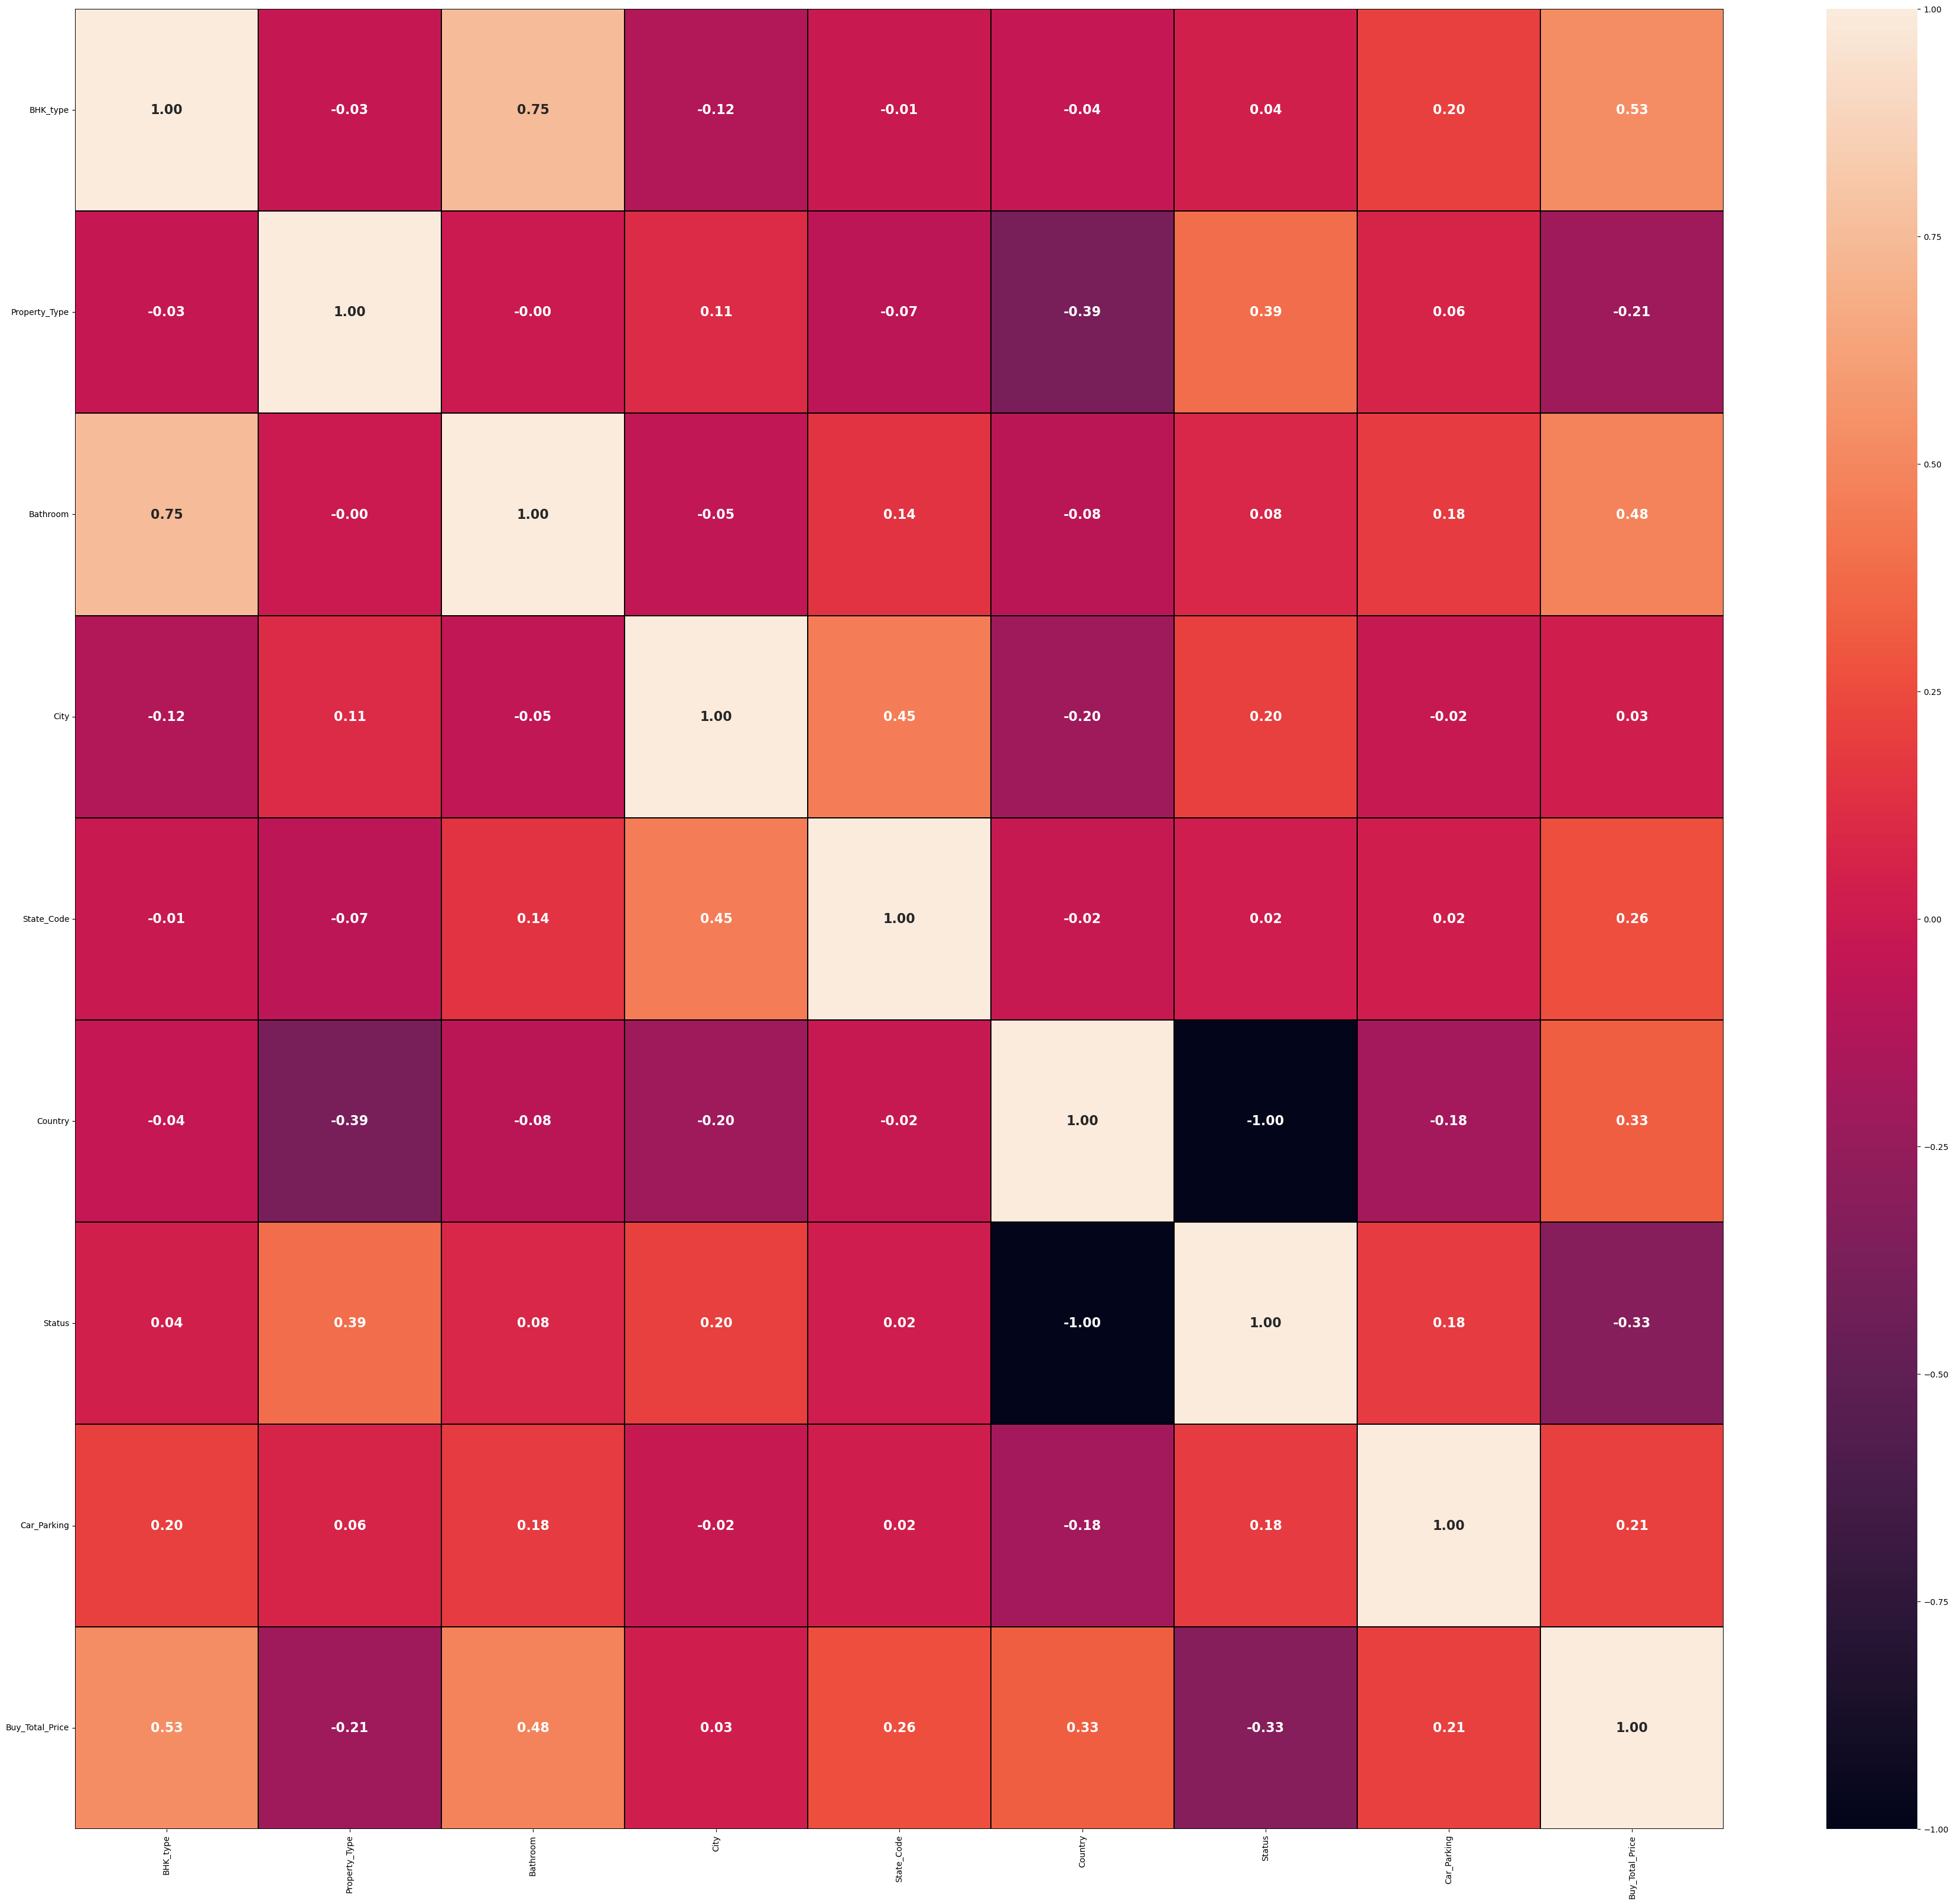

In [418]:
plt.figure(figsize=(45,40))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='black',linewidth=0.2,annot_kws={'fontsize': 16,'fontweight': 'bold'})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [419]:
df = df.drop(columns=['Status'])

In [420]:
df.corr()['Property_Type'].sort_values(ascending=False).to_frame()

Property_Type
Property_Type         1.000000
City                  0.107017
Car_Parking           0.064133
Bathroom             -0.000084
BHK_type             -0.026356
State_Code           -0.074864
Buy_Total_Price      -0.214892
Country              -0.387179

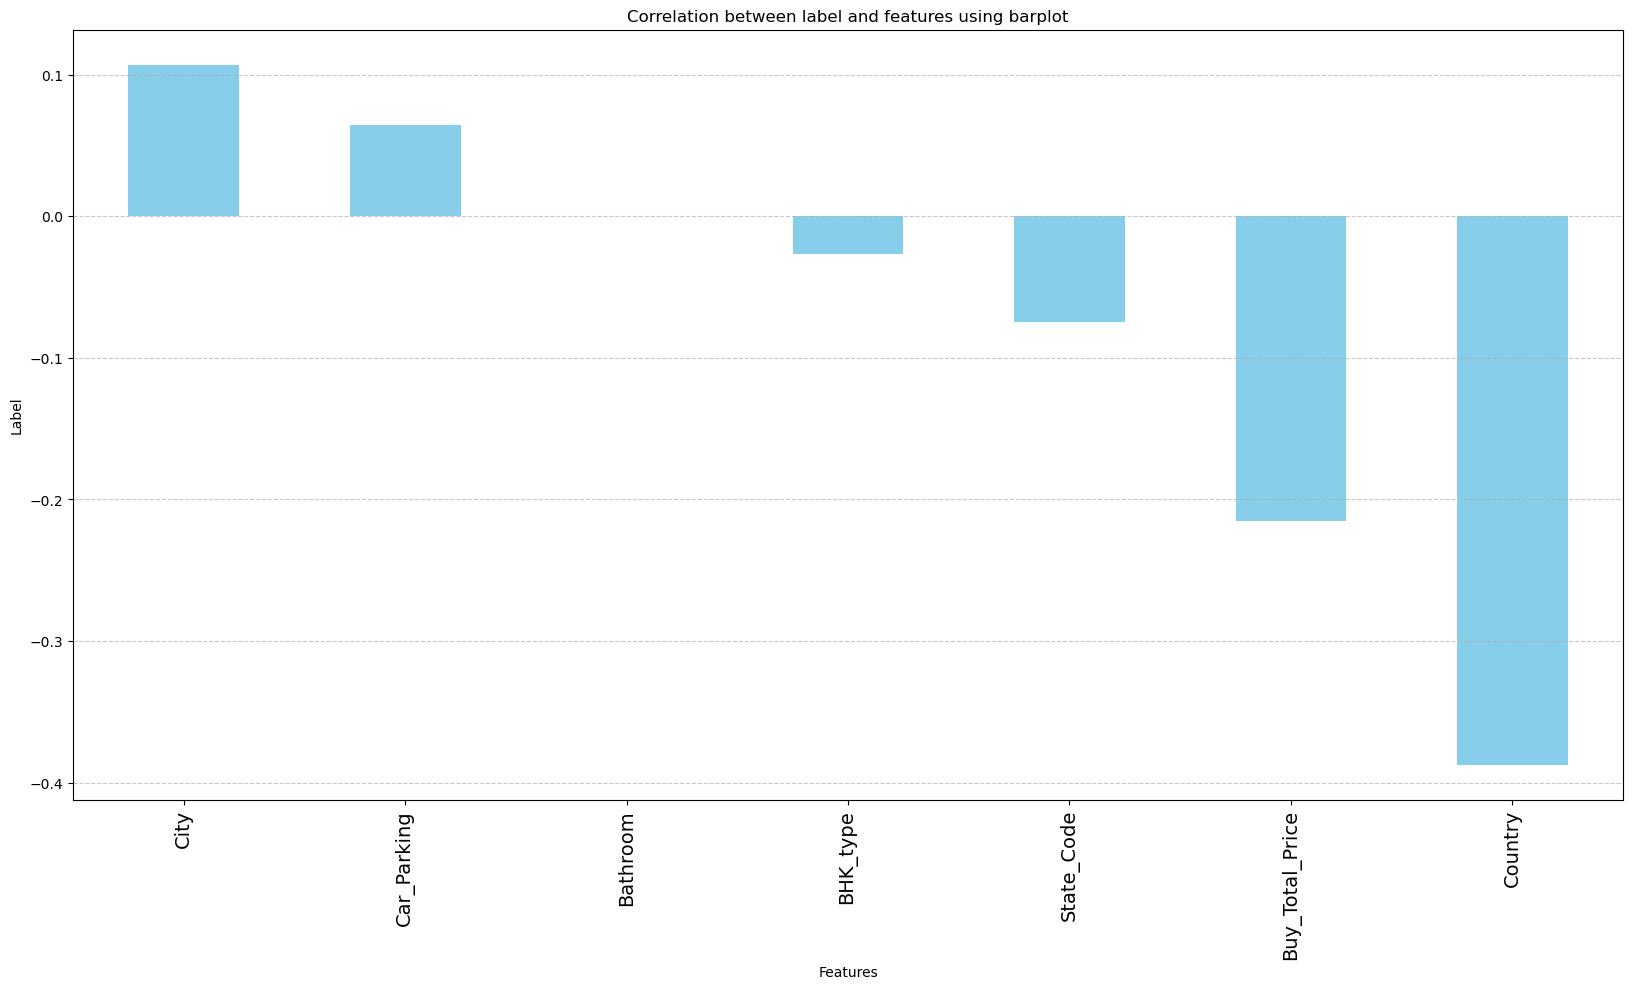

In [422]:
plt.figure(figsize=(20,10))
df.corr()['Property_Type'].sort_values(ascending=False).drop(['Property_Type']).plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Label')
plt.xticks(fontsize=14)
plt.title('Correlation between label and features using barplot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Model I: Including all features.

# Preparing Data for Machine Learning

# Splitting

Choose the dependent(label)and independent variables

In [423]:
X = df.drop('Property_Type', axis=1)
Y = df['Property_Type']

In [424]:
X

BHK_type  Bathroom  City  State_Code  Country  Car_Parking  \
0            3       2.0     2           2        1            0   
1            4       3.0     2           2        1            0   
2            2       2.0     2           2        1            0   
3            3       2.0     2           2        1            0   
4            3       1.0     2           2        1            0   
...        ...       ...   ...         ...      ...          ...   
1136         4       5.0     4           1        0            0   
1137         3       1.0     4           1        0            2   
1138         1       2.0     4           1        0            0   
1139         3       2.0     4           1        0            1   
1140         3       2.0     4           1        0            1   

      Buy_Total_Price  
0            1.486139  
1            1.598553  
2            1.247291  
3            1.598681  
4            0.996811  
...               ...  
1136        -0.204004  
1137         0.003167  
1138        -0.857042  
1139        -0.374927  
1140        -0.204004  

[1141 rows x 7 columns]

In [425]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
1136    3
1137    2
1138    2
1139    3
1140    3
Name: Property_Type, Length: 1141, dtype: int32

# Feature Scaling

In [427]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

BHK_type  Bathroom      City  State_Code   Country  Car_Parking  \
0     0.447935 -0.239813 -0.827455   -0.092292  4.068642    -0.734055   
1     1.373831  0.530966 -0.827455   -0.092292  4.068642    -0.734055   
2    -0.477960 -0.239813 -0.827455   -0.092292  4.068642    -0.734055   
3     0.447935 -0.239813 -0.827455   -0.092292  4.068642    -0.734055   
4     0.447935 -1.010593 -0.827455   -0.092292  4.068642    -0.734055   
...        ...       ...       ...         ...       ...          ...   
1136  1.373831  2.072525 -0.013904   -0.542314 -0.245782    -0.734055   
1137  0.447935 -1.010593 -0.013904   -0.542314 -0.245782     2.230747   
1138 -1.403855 -0.239813 -0.013904   -0.542314 -0.245782    -0.734055   
1139  0.447935 -0.239813 -0.013904   -0.542314 -0.245782     0.748346   
1140  0.447935 -0.239813 -0.013904   -0.542314 -0.245782     0.748346   

      Buy_Total_Price  
0            1.525759  
1            1.639514  
2            1.284061  
3            1.639643  
4            1.030592  
...               ...  
1136        -0.184549  
1137         0.025094  
1138        -0.845377  
1139        -0.357511  
1140        -0.184549  

[1141 rows x 7 columns]

# Assessing multicollinearity among features.

In [428]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [429]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

VIF Values         Features
0    2.783303         BHK_type
1    2.488986         Bathroom
2    1.367699             City
3    1.449834       State_Code
4    1.432742          Country
5    1.137548      Car_Parking
6    2.059862  Buy_Total_Price

In [431]:
Y.shape

(1141,)

In [432]:
Y.value_counts().sort_index()

Property_Type
0     57
1     65
2    634
3    385
Name: count, dtype: int64

We notice that the data is unbalanced, hence we will balance it using the oversampling method.

In [433]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [434]:
Y.value_counts()

Property_Type
1    634
2    634
3    634
0    634
Name: count, dtype: int64

In [435]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.12303659063231409 at random state 144


# Creating the training and testing data sets

In [436]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

# Machine Learning Model for Classification and Evaluation Metrics

In [438]:
# Classification Model Function
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    #Confusion Matrix
    confusion_matx=confusion_matrix(Y_test, pred)
    print("\nConfusion Matrix:\n",confusion_matx)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("\nCross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I've created a class to handle train-test splitting, model training, label prediction, accuracy score calculation, classification report generation, cross-validation scoring,Confusion Matrix, and comparison of accuracy and cross-validation scores for any machine learning model that utilizes this function.

In [439]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 65.5511811023622

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.57      0.54       125
           1       1.00      1.00      1.00       134
           2       0.57      0.56      0.56       124
           3       0.53      0.47      0.50       125

    accuracy                           0.66       508
   macro avg       0.65      0.65      0.65       508
weighted avg       0.66      0.66      0.66       508


Confusion Matrix:
 [[ 71   0  25  29]
 [  0 134   0   0]
 [ 31   0  69  24]
 [ 38   0  28  59]]

Cross Validation Score: 59.85828324713849

Accuracy Score - Cross Validation Score is 5.6928978552237055


In [440]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 78.74015748031496

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       125
           1       1.00      1.00      1.00       134
           2       0.68      0.69      0.69       124
           3       0.63      0.56      0.59       125

    accuracy                           0.79       508
   macro avg       0.78      0.78      0.78       508
weighted avg       0.78      0.79      0.78       508


Confusion Matrix:
 [[110   0   5  10]
 [  0 134   0   0]
 [  7   0  86  31]
 [ 19   0  36  70]]

Cross Validation Score: 71.89030735063443

Accuracy Score - Cross Validation Score is 6.849850129680533


In [441]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 78.1496062992126

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       125
           1       1.00      1.00      1.00       134
           2       0.68      0.70      0.69       124
           3       0.62      0.58      0.60       125

    accuracy                           0.78       508
   macro avg       0.78      0.78      0.78       508
weighted avg       0.78      0.78      0.78       508


Confusion Matrix:
 [[104   0   6  15]
 [  0 134   0   0]
 [  7   0  87  30]
 [ 18   0  35  72]]

Cross Validation Score: 72.24440510025005

Accuracy Score - Cross Validation Score is 5.905201198962558


In [442]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 72.44094488188976

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.87      0.69       125
           1       1.00      1.00      1.00       134
           2       0.75      0.56      0.64       124
           3       0.62      0.45      0.52       125

    accuracy                           0.72       508
   macro avg       0.73      0.72      0.71       508
weighted avg       0.74      0.72      0.72       508


Confusion Matrix:
 [[109   0   5  11]
 [  0 134   0   0]
 [ 31   0  69  24]
 [ 51   0  18  56]]

Cross Validation Score: 66.95786547391636

Accuracy Score - Cross Validation Score is 5.483079407973406


In [443]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 70.47244094488188

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.82      0.67       125
           1       1.00      1.00      1.00       134
           2       0.67      0.55      0.60       124
           3       0.57      0.43      0.49       125

    accuracy                           0.70       508
   macro avg       0.70      0.70      0.69       508
weighted avg       0.71      0.70      0.70       508


Confusion Matrix:
 [[102   0   7  16]
 [  0 134   0   0]
 [ 31   0  68  25]
 [ 45   0  26  54]]

Cross Validation Score: 62.02915094193108

Accuracy Score - Cross Validation Score is 8.443290002950803


In [444]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 74.40944881889764

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       125
           1       1.00      1.00      1.00       134
           2       0.63      0.64      0.63       124
           3       0.55      0.51      0.53       125

    accuracy                           0.74       508
   macro avg       0.74      0.74      0.74       508
weighted avg       0.74      0.74      0.74       508


Confusion Matrix:
 [[101   0   6  18]
 [  0 134   0   0]
 [ 10   0  79  35]
 [ 21   0  40  64]]

Cross Validation Score: 70.82335492087158

Accuracy Score - Cross Validation Score is 3.586093898026064


In [445]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 78.54330708661418

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       125
           1       1.00      1.00      1.00       134
           2       0.68      0.67      0.67       124
           3       0.62      0.57      0.59       125

    accuracy                           0.79       508
   macro avg       0.78      0.78      0.78       508
weighted avg       0.78      0.79      0.78       508


Confusion Matrix:
 [[111   0   6   8]
 [  0 134   0   0]
 [  5   0  83  36]
 [ 21   0  33  71]]

Cross Validation Score: 69.95752380064918

Accuracy Score - Cross Validation Score is 8.585783285964993


# The Extra Trees classifier is our best model because it has highest Accuracy Score and smallest difference between the accuracy score and the cross-validation score.

# Hyper parameter tuning on the best ML Model

In [446]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

param_grid ={'criterion':['gini','entropy'],
           'random_state':[10,50,1000],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}

In [447]:
ETC=ExtraTreesClassifier()

In [448]:
grid_search= GridSearchCV(estimator=ETC, param_grid=param_grid, cv=5)

In [449]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [450]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 10}

In [459]:
final_model_2=ExtraTreesClassifier(criterion='entropy',max_depth=20,n_estimators=300,n_jobs=-2,random_state=1000)

In [460]:
final_model_2.fit(X_train,Y_train)
pred=final_model_2.predict(X_test)
acc=accuracy_score(Y_test,pred)
print(acc*100)

79.7244094488189


# Saving the model

In [461]:
import joblib

filename = "Capstone_3.pkl"
joblib.dump(final_model_2, filename)

['Capstone_3.pkl']

In [462]:
model=joblib.load("Capstone_3.pkl")

prediction=model.predict(X_test)
prediction

array([1, 0, 2, 0, 3, 3, 2, 3, 1, 0, 0, 0, 0, 3, 3, 1, 1, 2, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 2, 2, 2, 3, 1, 1, 3, 3, 2, 2, 0, 0, 1, 0, 1, 1, 2,
       1, 2, 0, 2, 2, 1, 0, 3, 0, 3, 2, 0, 3, 3, 2, 1, 1, 1, 0, 2, 1, 0,
       0, 2, 3, 1, 0, 1, 3, 1, 3, 2, 2, 3, 0, 0, 2, 3, 1, 1, 2, 1, 3, 2,
       3, 2, 3, 2, 0, 3, 1, 1, 2, 0, 3, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1,
       0, 3, 2, 2, 3, 1, 0, 1, 1, 1, 3, 3, 2, 3, 2, 2, 3, 1, 2, 3, 1, 0,
       2, 3, 0, 0, 3, 1, 2, 1, 1, 0, 1, 3, 2, 1, 2, 0, 0, 0, 3, 2, 3, 1,
       0, 1, 3, 1, 0, 2, 0, 2, 0, 1, 2, 0, 2, 3, 0, 0, 0, 0, 2, 2, 2, 1,
       0, 3, 3, 2, 3, 1, 1, 2, 0, 2, 3, 0, 0, 1, 1, 3, 3, 1, 1, 1, 1, 3,
       0, 3, 1, 1, 3, 3, 1, 2, 3, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 2, 2, 1,
       3, 1, 2, 1, 2, 2, 0, 3, 3, 0, 2, 0, 3, 1, 1, 1, 3, 2, 0, 1, 3, 2,
       3, 2, 0, 3, 0, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0,
       2, 1, 3, 0, 2, 2, 2, 0, 1, 1, 2, 3, 2, 2, 3, 2, 3, 3, 1, 1, 2, 3,
       0, 3, 1, 2, 0, 1, 0, 3, 0, 3, 0, 1, 1, 2, 0,

In [463]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df.head()

Predicted  Original
0          1         1
1          0         0
2          2         2
3          0         0
4          3         0

# Conclusion:

# 1. Buy Total Price: Regression models to estimate the monetary value of properties.

**Model-I achieves an accuracy of 66% with Gradient Boosting Regressor.**

# 2.Carpet Area: Regression models to predict the size of the carpet area.

**Model-II achieves an accuracy of 74% with ExtraTrees Regressor.**

# 3.Property Type: Classification models to categorize properties into types (e.g., apartment, house, commercial).

**Model-III achieves an accuracy of 79% with ExtraTrees Classifier.**